In [1631]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
# Statistics functions
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [1632]:
data = pd.read_csv('Handling_Missing_Values_final.csv')
df = data.copy()

In [1633]:
df.T


0                1             2      \
make_model                   Renault Clio  Fiat 500 Abarth  Nissan Micra   
price                             16990.0          17995.0        3250.0   
body_type                           Sedan          Compact   Convertible   
type                                 Used             Used          Used   
doors                                 5.0              3.0           2.0   
warranty                               No               No            No   
mileage                           20926.0          59629.0      147985.0   
gearbox                            Manual           Manual        Manual   
fuel_type                             LPG          Benzine       Benzine   
colour                               Grey             Grey          Blue   
paint                        non_metallic     non_metallic  non_metallic   
seller                             Dealer           Dealer        Dealer   
seats                                 5.0              4.0           4.0   
engine_size                         999.0           1368.0        1598.0   
gears                                 5.0              5.0           5.0   
co2_emissions                       106.0            139.0         160.0   
drivetrain                          Front            Front         Front   
cylinders                             4.0              4.0           4.0   
empty_weight                       1128.0           1010.0        1125.0   
service_history                        No              Yes            No   
non_smoker                             No              Yes            No   
emission_sticker                    Green            Green         Green   
upholstery_color                    Black            Black         Black   
upholstery                          Cloth     Full leather  Full leather   
available                             yes              yes           yes   
taxi_rental                            No               No            No   
power_kW                        71.142857            107.0          81.0   
fuel_consumption_comb              6.2125              6.4      6.640678   
location_country                   France      Netherlands   Netherlands   
age                                -180.0             -3.0          -1.0   
inspection_status                      no               no            no   
energy_efficiency_class       Inefficient      Inefficient     Efficient   
safety_security_package          Advanced         Enhanced      Enhanced   
comfort_convenience_package      Enhanced         Enhanced      Enhanced   
ent_media_package                Advanced         Advanced      Advanced   
num_of_extras                           1                3             1   

                                       3                4               5      \
make_model                            Dacia            Dacia           Dacia    
price                                22299.0          22479.0         21799.0   
body_type                            Compact          Compact   Station wagon   
type                          Pre-registered   Pre-registered   Demonstration   
doors                                    5.0              5.0             5.0   
warranty                                  No               No              No   
mileage                                110.0            110.0          2000.0   
gearbox                            Automatic        Automatic          Manual   
fuel_type                           Electric         Electric         Benzine   
colour                                 Black            Black            Grey   
paint                               Metallic         Metallic        Metallic   
seller                                Dealer           Dealer          Dealer   
seats                                    5.0              5.0             7.0   
engine_size                              0.0              0.0           999.0   
gears   

In [1634]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26859 entries, 0 to 26858
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   26859 non-null  object 
 1   price                        26859 non-null  float64
 2   body_type                    26859 non-null  object 
 3   type                         26859 non-null  object 
 4   doors                        26859 non-null  float64
 5   warranty                     26859 non-null  object 
 6   mileage                      26859 non-null  float64
 7   gearbox                      26859 non-null  object 
 8   fuel_type                    26859 non-null  object 
 9   colour                       26859 non-null  object 
 10  paint                        26859 non-null  object 
 11  seller                       26859 non-null  object 
 12  seats                        26859 non-null  float64
 13  engine_size     

In [1635]:
df[df['age']< 0][['age']]

df[df['age']< 0][['age']].index

df = df.drop([0,1,2])

df.reset_index(drop=True, inplace = True)

In [1636]:
df.drop_duplicates(inplace=True)

In [1637]:
df.describe()

price         doors       mileage         seats   engine_size  \
count  2.582700e+04  25827.000000  2.582700e+04  25827.000000  25827.000000   
mean   2.361011e+04      4.134665  7.074945e+04      4.698145   1738.171177   
std    2.604732e+04      1.207498  6.713669e+04      0.790508   1076.231807   
min    4.900000e+02      1.000000  0.000000e+00      0.000000      0.000000   
25%    1.197000e+04      3.000000  1.947350e+04      4.000000   1248.000000   
50%    1.820000e+04      5.000000  5.500000e+04      5.000000   1595.000000   
75%    2.799000e+04      5.000000  1.038000e+05      5.000000   1984.000000   
max    1.346900e+06      6.000000  1.440000e+06     17.000000  99900.000000   

              gears  co2_emissions     cylinders  empty_weight      power_kW  \
count  25827.000000   25827.000000  25827.000000  25827.000000  25827.000000   
mean       5.840167     133.070314      4.022806   1409.461261    118.927495   
std        1.524932     127.690895      1.066509    314.006106     68.747941   
min        1.000000       0.000000      0.000000     75.000000      1.000000   
25%        5.000000     106.000000      4.000000   1205.000000     79.525000   
50%        6.000000     125.000000      4.000000   1373.000000    100.000000   
75%        6.000000     157.000000      4.000000   1580.000000    135.000000   
max       10.000000   15168.000000     26.000000  15590.000000    665.000000   

       fuel_consumption_comb           age  num_of_extras  
count           25827.000000  25827.000000   25827.000000  
mean                5.881759      6.802842       4.571108  
std                 2.453268      8.750392       3.639096  
min                 0.500000      0.000000       1.000000  
25%                 4.500000      2.000000       1.000000  
50%                 5.400000      4.000000       4.000000  
75%                 6.700000      8.000000       7.000000  
max                99.900000    122.000000      26.000000

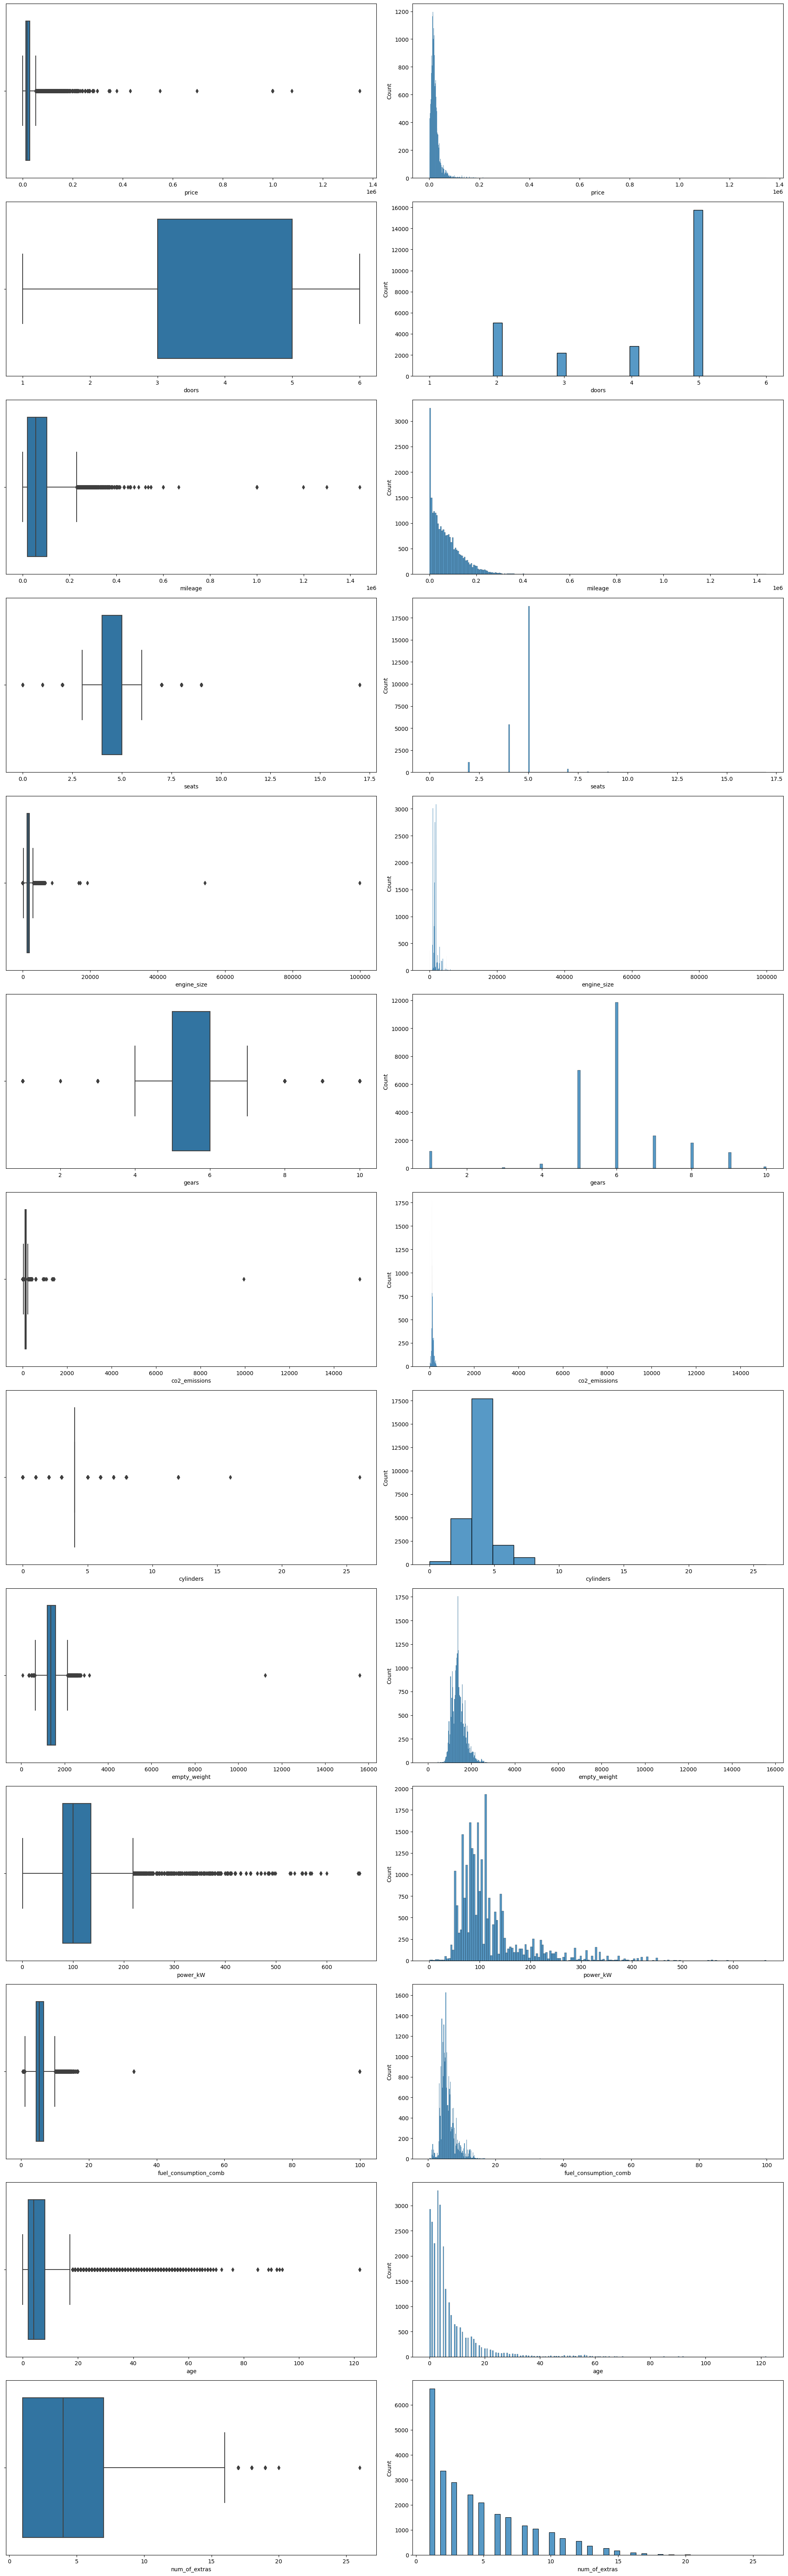

In [1638]:
num_features = len(df.select_dtypes('number').columns)
num_rows = (num_features * 2 + 1) // 2  # Her bir feature için iki subplot, çift sayıya yuvarlanmış hali
plt.figure(figsize=(20, num_rows * 5))
index = 0
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(num_rows, 2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(num_rows, 2, index)
    sns.histplot(x=feature, data=df)
plt.tight_layout()
plt.show()

In [1639]:
def box_plot_with_price(df, column):
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=column, y='price')
    plt.title(f'Box plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()    

In [1640]:
def barplot_column_by_price(df, column):

    # Ensure the DataFrame contains the necessary columns
    if 'price' not in df.columns or column not in df.columns:
        raise ValueError(f"The DataFrame must contain 'price' and '{column}' columns")

    # Group by the specified column and calculate the mean price for each group
    mean_prices = df.groupby(column)['price'].mean().sort_values(ascending=False)

    # Create the bar plot
    plt.figure(figsize=(7, 4))
    mean_prices.plot(kind='bar')
    plt.ylabel('Mean Price (€)')
    plt.title(f'Mean Price by {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [1641]:
# Function to create a histogram of the price column grouped by another column
def histogram_price_grouped_by_column(df, column):
    plt.figure(figsize=(7, 4))
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(df, x='price', hue=column, bins=10, kde=False, element="step", stat="density", common_norm=False)
    else:
        sns.histplot(df, x='price', hue=column, multiple="dodge", bins=10)
    plt.title(f'Histogram of Price grouped by {column}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()


In [1642]:
# Function to create a scatter plot with the price column
def scatter_plot_with_price(df, column):
    plt.figure(figsize=(7, 4))
    sns.scatterplot(data=df, x=column, y='price')
    plt.title(f'Scatter plot of Price vs {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.show()

In [1643]:
def correlation_with_price(df, column):
    if pd.api.types.is_numeric_dtype(df[column]):
        correlation = df['price'].corr(df[column])
        print(f'Correlation between Price and {column}: {correlation:.2f}')
    else:
        print(f'Column {column} is not numeric, correlation cannot be calculated.')

In [1644]:
def compare_with_price(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in the DataFrame.")
        return
    
    scatter_plot_with_price(df, column)
    box_plot_with_price(df, column)
    histogram_of_price(df)
    histogram_price_grouped_by_column(df, column)
    correlation_with_price(df, column)

In [1645]:
def barplot_column(df, x_col, y_col, hue_col=None, title='', xlabel='', ylabel='', figsize=(10, 6), xlim=None):

    plt.figure(figsize=figsize)
    if hue_col:
        sns.barplot(x=x_col, y=y_col, hue=hue_col, data=df, ci=None)
    else:
        sns.barplot(x=x_col, y=y_col, data=df, ci=None)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if xlim:
        plt.xlim(xlim)
    
    plt.show()

In [1646]:
def box_plot_column(df, column):
    
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df[column])
    # Calculate whisker bounds
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Annotate the plot with whisker bounds
    plt.text(0.5, lower_whisker, f'Lower Whisker: {lower_whisker:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=10, color='blue')
    plt.text(0.5, upper_whisker, f'Upper Whisker: {upper_whisker:.2f}', horizontalalignment='center', verticalalignment='top', fontsize=10, color='blue')
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

In [1647]:
def hist_plot_column(df, column, bins=50, kde=False):
    
    plt.figure(figsize=(7, 4))
    sns.histplot(df[column], bins=bins, kde=kde)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [1648]:
def kde_plot_column(df,column):
    # Your Code is Here

    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x=column ,fill=True);

In [1649]:
def kde_plot_with_price(df,column):
    plt.figure(figsize=(7,4))
    sns.kdeplot(data=df, x= column ,hue="price",fill=True);

In [1650]:
def count_plot_column(df,column):
    # Your Code is Here
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x=column, palette="Set2")
    plt.xticks(rotation=90);

In [1651]:
def count_plot_with_price(df, column):
    
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df, x=column, palette='viridis')

    # Calculate mean price for each category
    mean_prices = df.groupby(column)['price'].mean()

  

    plt.title(f'Count Plot of {column} with Mean Price')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Example usage:
# count_plot_with_price(df, 'type')

In [1652]:
def pie_chart_column(df,column):

    # Calculate value counts for the specified column
    value_counts = df[column].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(7, 4))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {column}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
    plt.show()

In [1653]:
def pie_chart_with_price(df, column):
  
    # Group by the specified column and sum the prices
    price_sum = df.groupby(column)['price'].sum()
    
    # Plot pie chart
    plt.figure(figsize=(7, 4))
    plt.pie(price_sum, labels=price_sum.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {column} weighted by Price')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
    plt.show()


In [1654]:

def grouped_column(df,grouped_column):
    return df.groupby(grouped_column)['price'].value_counts()

In [1655]:
def plot_column_by_price(df, column):

    # Ensure the DataFrame contains the necessary columns
    if 'price' not in df.columns or column not in df.columns:
        raise ValueError(f"The DataFrame must contain 'price' and '{column}' columns")

    # Group by the specified column and calculate the mean price for each group
    mean_prices = df.groupby(column)['price'].mean().sort_values(ascending=False)

    # Create the bar plot
    plt.figure(figsize=(7, 4))
    mean_prices.plot(kind='bar', color='skyblue')
    plt.ylabel('Mean Price (€)')
    plt.title(f'Mean Price by {column}')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [1656]:

def grouped_by_price(df,value_column):
    return df.groupby('price')[value_column].value_counts(ascending=True)

In [1657]:
def grouped_by_column(df,grouped_column, value_column):
    return df.groupby(grouped_column)[value_column].value_counts()

In [1658]:
def grouped_average(df,group_column, value_column):
    return df.groupby(group_column)[value_column].mean()

In [1659]:
def calculate_z_score(df,column):
# Step 1: Calculate Z-scores for the relevant columns
    df['z_score_fuel_cons'] =  stats.zscore(df[column])

    # Step 2: Filter out rows where the z-score is greater than 3 or less than -3
    df_no_outliers = df[(df['z_score_fuel_cons'].abs() <= 3) ]


    # Step 3: Drop the z-score column as it's no longer needed
    df_no_outliers = df_no_outliers.drop(columns=['z_score_fuel_cons'])
    return_df = df_no_outliers.sort_values(by=column)
    # Print the resulting DataFrame
    return return_df 

In [1660]:
# Calculate the 25th and 75th percentiles (Q1 and Q3)
def upper_lower_whisker(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    IQR
    upper_whisker=Q3 + (1.5 * IQR)
    lower_whisker=Q1 - (1.5 * IQR)
    return upper_whisker,lower_whisker

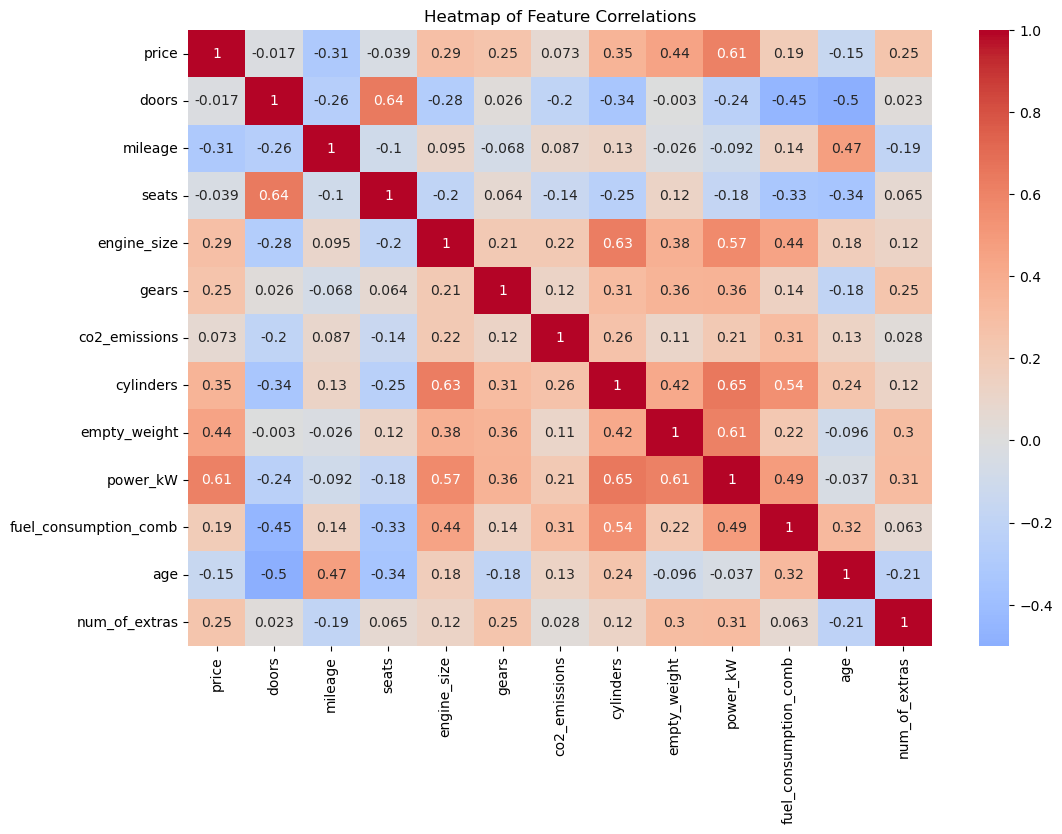

In [1661]:
# Ensure the DataFrame contains only numeric data for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap to understand correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Feature Correlations')
plt.show()

# 1: Price

** 1   price                       
 2   type                         
 3   doors                      
 4   mileage                      
 5   gearbox                    
 6  seats                        
 7  engine_size                  
 8  gears                        
 9  co2_emissions                
 10  cylinders                    
 11  empty_weight                 
 12  power_kW                     
 13  fuel_consumption_comb   
 14  age                          
 15  num_of_extras **               

# 2. Doors

# 6. Seats

In [1666]:
df['seats'].describe()

count    25827.000000
mean         4.698145
std          0.790508
min          0.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         17.000000
Name: seats, dtype: float64

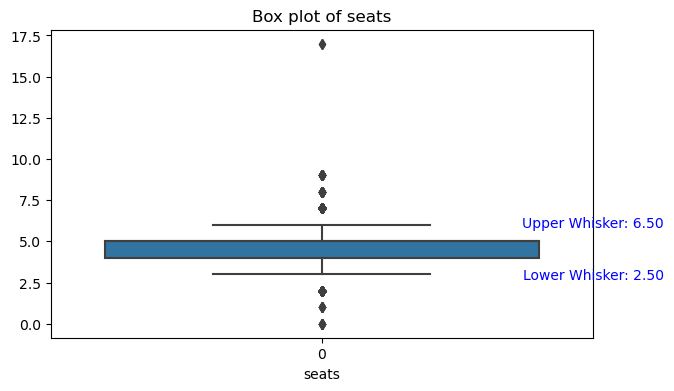

In [1667]:
box_plot_column(df,'seats')

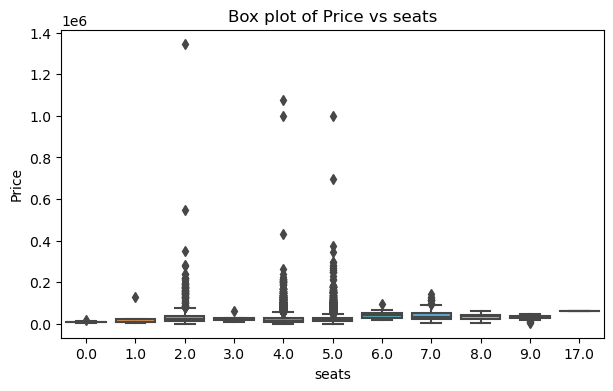

In [1668]:
box_plot_with_price(df, 'seats')

In [1669]:
upper_lower_whisker(df,'seats')

(6.5, 2.5)

In [1670]:
df.groupby('price')['seats'].value_counts().sort_values()

price    seats
490.0    4.0        1
32555.0  5.0        1
32544.0  5.0        1
32499.0  5.0        1
32498.0  5.0        1
                 ... 
12990.0  5.0      130
16990.0  5.0      135
19990.0  5.0      135
18990.0  5.0      136
14990.0  5.0      156
Name: count, Length: 7022, dtype: int64

In [1671]:
df.groupby('price')['seats'].value_counts().sort_values().head(20)

price    seats
490.0    4.0      1
32555.0  5.0      1
32544.0  5.0      1
32499.0  5.0      1
32498.0  5.0      1
32490.0  4.0      1
32488.0  5.0      1
32481.0  5.0      1
32480.0  4.0      1
32470.0  5.0      1
32449.0  2.0      1
32440.0  5.0      1
32400.0  4.0      1
32399.0  5.0      1
32390.0  5.0      1
         7.0      1
32360.0  4.0      1
32350.0  5.0      1
32580.0  5.0      1
32340.0  5.0      1
Name: count, dtype: int64

In [1672]:
df[(df['seats'] < upper_lower_whisker(df,'seats')[1]) | (df['seats'] > upper_lower_whisker(df,'seats')[0]) ][['make_model','seats']]

make_model  seats
2              Dacia     7.0
61       Dacia Jogger    7.0
63       Dacia Jogger    7.0
64       Dacia Jogger    7.0
71       Dacia Jogger    7.0
...               ...    ...
26847        Ford  V8    2.0
26848        Ford  V8    2.0
26850  Ford  Roadster    2.0
26851        Peugeot     2.0
26853           Ford     2.0

[1569 rows x 2 columns]

In [1673]:
df[(df['seats'] < upper_lower_whisker(df,'seats')[1])][['make_model','seats']]

make_model  seats
518                      Fiat Strada    2.0
1173            Mercedes-Benz AMG GT    2.0
1178   Mercedes-Benz AMG GT Roadster    2.0
1179   Mercedes-Benz AMG GT Roadster    2.0
1180   Mercedes-Benz AMG GT Roadster    2.0
...                              ...    ...
26847                       Ford  V8    2.0
26848                       Ford  V8    2.0
26850                 Ford  Roadster    2.0
26851                       Peugeot     2.0
26853                          Ford     2.0

[1124 rows x 2 columns]

In [1674]:
df[(df['seats'] > upper_lower_whisker(df,'seats')[0])][['make_model','seats']]

make_model  seats
2                   Dacia     7.0
61            Dacia Jogger    7.0
63            Dacia Jogger    7.0
64            Dacia Jogger    7.0
71            Dacia Jogger    7.0
...                    ...    ...
25844        Nissan Patrol    9.0
26057  Mercedes-Benz G 230    8.0
26107  Mercedes-Benz E 280    7.0
26110  Mercedes-Benz G 230    8.0
26125        Opel Monterey    7.0

[445 rows x 2 columns]

In [1675]:
df[(df['seats'] == 17) | (df['seats'] == 1) | (df['seats'] == 0)][['make_model','seats']]

make_model  seats
1804      Opel Movano   17.0
1805      Opel Movano   17.0
7560       SEAT Ibiza    0.0
13531        Renault     1.0
13837      SEAT Ibiza    0.0
18138   Renault Twizy    1.0
18175      SEAT Ibiza    0.0
19378  Renault Twingo    0.0
19386   Renault Twizy    1.0
19398      SEAT Ibiza    0.0
19835     Hyundai i30    0.0
20382     SEAT Toledo    0.0
22666     Peugeot 308    1.0
23220     Skoda Fabia    0.0
23576     Skoda Fabia    0.0
26339        Fiat 131    1.0
26469       Volvo 240    1.0

In [1676]:
df[df['seats'] == 0]

make_model    price       body_type   type  doors warranty  \
7560       SEAT Ibiza  18950.0           Sedan   Used    4.0      Yes   
13837      SEAT Ibiza  14700.0         Compact   Used    5.0       No   
18175      SEAT Ibiza  10900.0           Coupe   Used    2.0      Yes   
19378  Renault Twingo   7750.0         Compact   Used    5.0       No   
19398      SEAT Ibiza   9900.0         Compact   Used    5.0       No   
19835     Hyundai i30   8900.0   Station wagon   Used    5.0       No   
20382     SEAT Toledo   7650.0           Sedan   Used    5.0       No   
23220     Skoda Fabia   2900.0           Sedan   Used    5.0       No   
23576     Skoda Fabia   2950.0           Sedan   Used    5.0       No   

        mileage gearbox fuel_type  colour  ... power_kW fuel_consumption_comb  \
7560    11400.0  Manual   Benzine    Grey  ...     70.0              4.600000   
13837   66510.0  Manual   Benzine    Blue  ...     85.0              4.700000   
18175   43231.0  Manual   Benzine  Silver  ...     66.0              5.790769   
19378   53335.0  Manual   Benzine   Black  ...     52.0              4.700000   
19398  132390.0  Manual   Benzine   White  ...    103.0              4.700000   
19835  114730.0  Manual    Diesel   White  ...     66.0              4.400000   
20382  124800.0  Manual   Benzine  Silver  ...     63.0              5.100000   
23220  197000.0  Manual   Benzine    Grey  ...     77.0              6.900000   
23576  139877.0  Manual   Benzine     Red  ...     63.0              6.500000   

       location_country   age  inspection_status  energy_efficiency_class  \
7560            Germany   2.0                 no              Inefficient   
13837           Germany   4.0                 no                Efficient   
18175           Germany   6.0                 no                Efficient   
19378           Germany   7.0                 no              Inefficient   
19398           Germany   7.0                 no                Efficient   
19835           Germany   8.0                 no                Efficient   
20382           Germany   8.0                 no              Inefficient   
23220           Germany  13.0                 no              Inefficient   
23576           Germany  14.0                 no                Efficient   

      safety_security_package  comfort_convenience_package  ent_media_package  \
7560                 Advanced                     Advanced           Advanced   
13837                Advanced                     Enhanced           Advanced   
18175                Advanced                     Advanced           Advanced   
19378                Advanced                     Enhanced           Advanced   
19398                Enhanced                     Advanced           Advanced   
19835                Advanced                     Enhanced           Advanced   
20382                Advanced                     Enhanced           Advanced   
23220                Enhanced                        Basic           Advanced   
23576                Advanced                        Basic           Advanced   

      num_of_extras  
7560              6  
13837             3  
18175             3  
19378             1  
19398             5  
19835             2  
20382             4  
23220             2  
23576             2  

[9 rows x 36 columns]

In [1677]:
df[df['make_model'] == 'Renault Twizy']

make_model    price          body_type             type  doors  \
2229   Renault Twizy  14990.0            Compact             Used    2.0   
4897   Renault Twizy  10390.0            Compact   Pre-registered    5.0   
7431   Renault Twizy   8500.0              Coupe             Used    2.0   
10534  Renault Twizy  11999.0              Coupe             Used    2.0   
16531  Renault Twizy   5900.0        Convertible             Used    2.0   
18137  Renault Twizy   6490.0            Compact             Used    3.0   
18138  Renault Twizy   7950.0   Off-Road/Pick-up             Used    2.0   
19386  Renault Twizy   3999.0              Coupe             Used    2.0   
20302  Renault Twizy   5995.0              Coupe             Used    2.0   
21656  Renault Twizy   8990.0            Compact             Used    2.0   
21657  Renault Twizy   5500.0              Coupe             Used    2.0   
21658  Renault Twizy   7445.0   Off-Road/Pick-up             Used    2.0   

      warranty  mileage    gearbox fuel_type  colour  ...   power_kW  \
2229        No   4500.0  Automatic  Electric   Black  ...   9.000000   
4897       Yes     10.0  Automatic  Electric   Black  ...  13.000000   
7431        No  10300.0  Automatic  Electric    Blue  ...   4.000000   
10534      Yes  30254.0  Automatic  Electric   Black  ...  16.818182   
16531      Yes   7200.0  Automatic  Electric   White  ...   1.000000   
18137      Yes   1000.0  Automatic  Electric   White  ...  59.000000   
18138      Yes  35784.0  Automatic  Electric  Orange  ...  59.000000   
19386       No  91900.0  Automatic  Electric   White  ...   8.000000   
20302       No  15770.0  Automatic  Electric   White  ...   8.000000   
21656       No  25000.0  Automatic  Electric   White  ...  12.000000   
21657       No  30000.0  Automatic  Electric    Grey  ...   4.000000   
21658      Yes  23362.0  Automatic  Electric   Black  ...   8.000000   

      fuel_consumption_comb  location_country   age  inspection_status  \
2229               3.447727           Germany   0.0                 no   
4897               3.447727             Spain   1.0                 no   
7431               3.447727           Germany   2.0                 no   
10534              3.447727       Netherlands   3.0                yes   
16531              3.447727             Italy   5.0                 no   
18137              3.447727             Italy   6.0                 no   
18138              3.447727       Netherlands   6.0                 no   
19386              3.447727           Germany   7.0                 no   
20302              3.447727           Austria   8.0                 no   
21656              3.447727           Germany  10.0                yes   
21657              3.447727           Belgium  10.0                 no   
21658              3.447727       Netherlands  10.0                 no   

       energy_efficiency_class safety_security_package  \
2229                 Efficient                   Basic   
4897                 Efficient                   Basic   
7431                 Efficient                   Basic   
10534                Efficient                   Basic   
16531                Efficient                   Basic   
18137                Efficient                   Basic   
18138                Efficient                   Basic   
19386                Efficient                   Basic   
20302                Efficient                   Basic   
21656                Efficient                   Basic   
21657                Efficient                   Basic   
21658                Efficient                   Basic   

       comfort_convenience_package  ent_media_package num_of_extras  
2229                      Enhanced              Basic             1  
4897                      Advanced              Basic             1  
7431                      Advanced           Enhanced             4  
10534                     Advanced              Basic             1  
16531           

In [1678]:
mean_by_make_model = df.groupby(['make_model'])['seats'].mean()

# Fill the rows with values of 0 or 1 in the 'seats' column with the mean value
for index, row in data.iterrows():
    if row['seats'] == 0 or row['seats'] == 1:
        make_model = row['make_model']
        mean_seats = mean_by_make_model[make_model]
        data.at[index, 'seats'] = mean_seats

# 11. Empty Weight

In [1680]:
df['empty_weight'].describe()

count    25827.000000
mean      1409.461261
std        314.006106
min         75.000000
25%       1205.000000
50%       1373.000000
75%       1580.000000
max      15590.000000
Name: empty_weight, dtype: float64

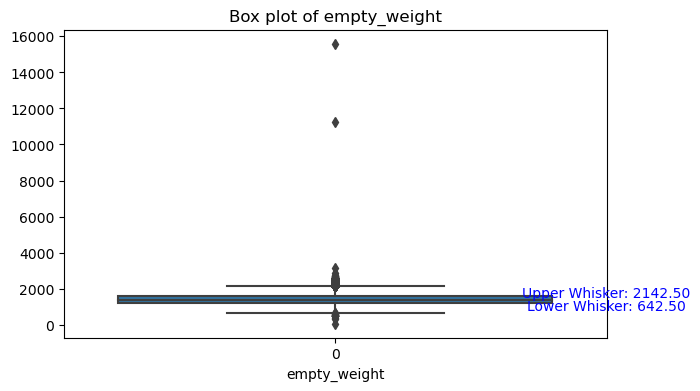

In [1681]:
box_plot_column(df,'empty_weight')

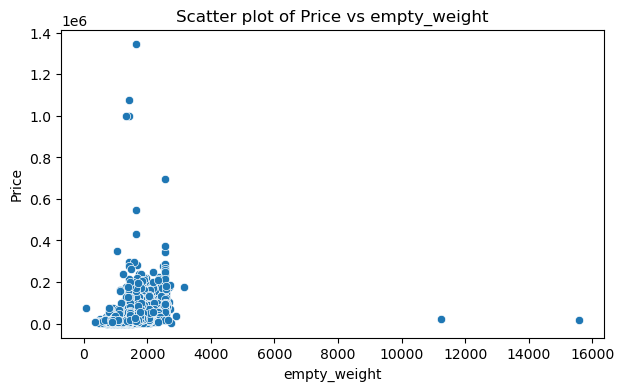

In [1682]:
scatter_plot_with_price(df,'empty_weight')

In [1683]:
upper_lower_whisker(df,'empty_weight')

(2142.5, 642.5)

In [1684]:
df['empty_weight'].value_counts().sort_values()

empty_weight
2152.0      1
2712.0      1
1776.0      1
2252.0      1
2066.0      1
         ... 
1374.0    288
1337.0    303
1054.0    308
1414.0    313
1365.0    319
Name: count, Length: 1283, dtype: int64

In [1685]:
df.groupby('empty_weight')[['price','empty_weight']].value_counts()

empty_weight  price   
75.0          74490.0     1
347.0         7445.0      1
375.0         7950.0      1
473.0         10390.0     1
474.0         11999.0     1
                         ..
2750.0        2450.0      1
2900.0        36990.0     1
3150.0        175870.0    1
11246.0       20980.0     1
15590.0       16590.0     1
Name: count, Length: 21745, dtype: int64

In [1686]:
df[df['empty_weight'] < upper_lower_whisker(df,'empty_weight')[1]][['make_model', 'empty_weight']]

make_model  empty_weight
2229   Renault Twizy         562.0
2432     Skoda Enyaq          75.0
4271      Opel Astra         525.0
4897   Renault Twizy         473.0
7431   Renault Twizy         562.0
10534  Renault Twizy         474.0
16531  Renault Twizy         479.0
18137  Renault Twizy         479.0
18138  Renault Twizy         375.0
19386  Renault Twizy         562.0
20302  Renault Twizy         479.0
21656  Renault Twizy         479.0
21657  Renault Twizy         479.0
21658  Renault Twizy         347.0
25596       Fiat 126         635.0
26369       Fiat 126         635.0
26394       Fiat 126         600.0
26755       SEAT Mii         600.0

In [1687]:
df[df['empty_weight'] > upper_lower_whisker(df,'empty_weight')[0]][['make_model', 'empty_weight']]

make_model  empty_weight
589             Ford Bronco        2173.0
590             Ford Bronco        2173.0
591             Ford Bronco        2200.0
592             Ford Bronco        2173.0
593             Ford Bronco        2146.0
...                     ...           ...
24530     Nissan Pathfinder        2144.0
24742  Mercedes-Benz ML 400        2335.0
25646   Mercedes-Benz G 500        2350.0
25697   Toyota Land Cruiser        2650.0
26854           Ford Bronco        2173.0

[557 rows x 2 columns]

In [1688]:
df[df['make_model'] == 'Renault Twizy'][['make_model', 'empty_weight']]

make_model  empty_weight
2229   Renault Twizy         562.0
4897   Renault Twizy         473.0
7431   Renault Twizy         562.0
10534  Renault Twizy         474.0
16531  Renault Twizy         479.0
18137  Renault Twizy         479.0
18138  Renault Twizy         375.0
19386  Renault Twizy         562.0
20302  Renault Twizy         479.0
21656  Renault Twizy         479.0
21657  Renault Twizy         479.0
21658  Renault Twizy         347.0

In [1689]:
df[df['make_model'] == 'Opel Astra'][['make_model', 'empty_weight']]

make_model  empty_weight
1579   Opel Astra        1365.0
1580   Opel Astra        1365.0
1581   Opel Astra        1355.0
1582   Opel Astra        1355.0
1583   Opel Astra        1355.0
...           ...           ...
25664  Opel Astra        1365.0
25848  Opel Astra        1365.0
25922  Opel Astra        1290.0
26067  Opel Astra        1150.0
26068  Opel Astra        1365.0

[665 rows x 2 columns]

In [1690]:
df[df['make_model'] == 'Skoda Enyaq'][['make_model', 'empty_weight']]

make_model  empty_weight
2431  Skoda Enyaq        1848.0
2432  Skoda Enyaq          75.0
2433  Skoda Enyaq        2107.0
2434  Skoda Enyaq        1848.0
2435  Skoda Enyaq        2107.0
2436  Skoda Enyaq        1992.0
2437  Skoda Enyaq        1992.0
2438  Skoda Enyaq        1992.0
2439  Skoda Enyaq        1848.0
2440  Skoda Enyaq        1965.0
2441  Skoda Enyaq        1965.0
2442  Skoda Enyaq        1940.0
2443  Skoda Enyaq        2107.0
5092  Skoda Enyaq        1848.0
5093  Skoda Enyaq        1848.0
5094  Skoda Enyaq        2090.0
5095  Skoda Enyaq        1848.0

In [1691]:
s_enyaq = df[df['make_model'] == 'Skoda Enyaq']
mean_empty_weight_excluding_2432 = s_enyaq[s_enyaq.index != 2432]['empty_weight'].mean()
df.at[2432, 'empty_weight'] = mean_empty_weight_excluding_2432

In [1692]:
empty_weight_outliers = df.drop(index=[4271])

In [1693]:
df[df['empty_weight'] > 3000][['make_model', 'empty_weight']]

make_model  empty_weight
3386           Ford Fiesta       11246.0
9468   Mercedes-Benz G 500        3150.0
10546          Renault ZOE       15590.0

In [1694]:
g500 = df[df['make_model'] == 'Mercedes-Benz G 500']
mean_empty_weight_excluding_9468 = g500[g500.index != 9468]['empty_weight'].mean()
df.at[9468, 'empty_weight'] = mean_empty_weight_excluding_9468

In [1695]:
df[df['make_model'] == 'Mercedes-Benz G 500'][['empty_weight']]

empty_weight
4099        2429.00
9468        2511.75
12751       2595.00
12752       2429.00
12753       2583.00
17666       2595.00
18931       2583.00
20751       2530.00
25646       2350.00

In [1696]:
zoe = df[df['make_model'] == 'Renault ZOE']
mean_empty_weight_excluding_10546= zoe[zoe.index != 10546]['empty_weight'].mean()
df.at[10546, 'empty_weight'] = mean_empty_weight_excluding_10546

In [1697]:
df[df['make_model'] == 'Renault ZOE'][['empty_weight']]

empty_weight
2230         1577.0
2231         1577.0
2232         1703.0
2233         1577.0
2234         1577.0
...             ...
20305        1555.0
21027        1403.0
21028        1403.0
21029        1403.0
21030        1502.0

[88 rows x 1 columns]

In [1698]:
df.loc[10546]['empty_weight']

1543.4942528735633

In [1699]:
f_fiesta = df[df['make_model'] == 'Ford Fiesta']
mean_empty_weight_excluding_3386 = f_fiesta[f_fiesta.index != 3386]['empty_weight'].mean()
df.at[3386, 'empty_weight'] = round(mean_empty_weight_excluding_3386)

In [1700]:
df.loc[3386]['empty_weight']

1142.0

Korelasyon katsayısı: 0.4733782724306411, P-değeri: 0.0


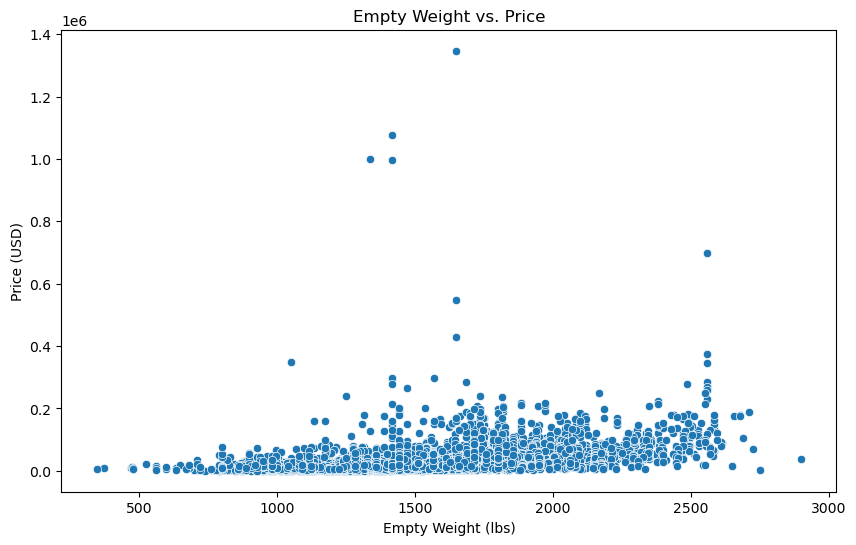

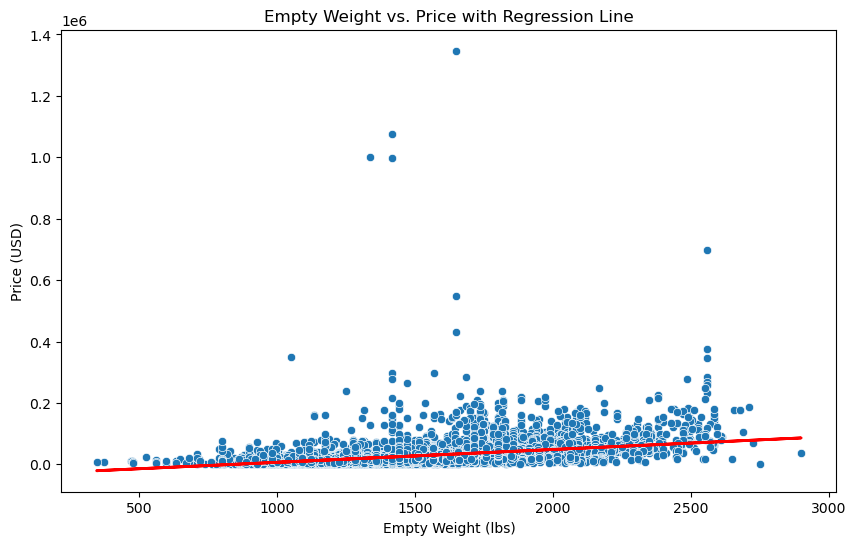

Regresyon katsayısı (slope): 41.81730125300501
Intercept: -35292.66930937629


In [1701]:
correlation, p_value = pearsonr(df['empty_weight'], df['price'])
print(f"Korelasyon katsayısı: {correlation}, P-değeri: {p_value}")

# Scatter plot ile görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='empty_weight', y='price', data=df)
plt.title('Empty Weight vs. Price')
plt.xlabel('Empty Weight (lbs)')
plt.ylabel('Price (USD)')
plt.show()

# Regresyon analizi
X = df[['empty_weight']].values
y = df['price'].values
reg = LinearRegression().fit(X, y)
predictions = reg.predict(X)

# Regresyon sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='empty_weight', y='price', data=df)
plt.plot(df['empty_weight'], predictions, color='red', linewidth=2)
plt.title('Empty Weight vs. Price with Regression Line')
plt.xlabel('Empty Weight (lbs)')
plt.ylabel('Price (USD)')
plt.show()

# Regresyon katsayısı ve intercept
print(f"Regresyon katsayısı (slope): {reg.coef_[0]}")
print(f"Intercept: {reg.intercept_}")

R^2 değeri: 0.22408698880942146


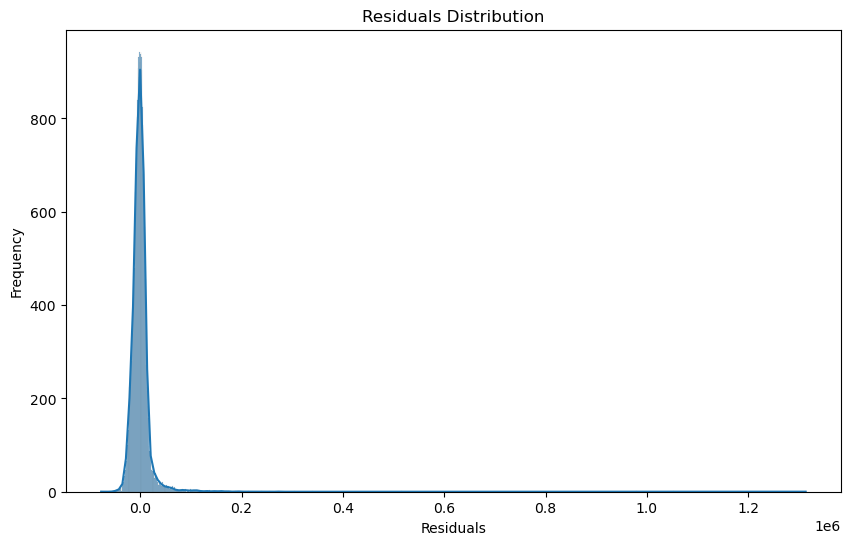

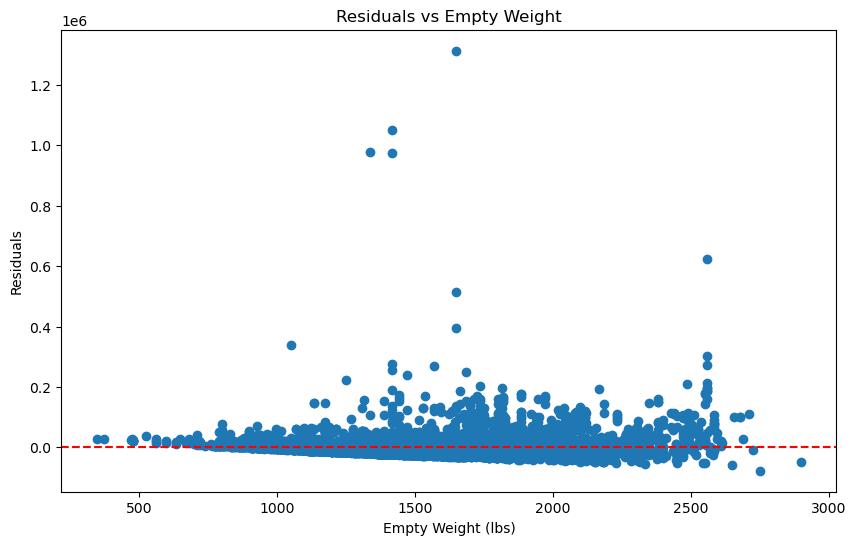

In [1702]:
r_squared = reg.score(X, y)
print(f"R^2 değeri: {r_squared}")

# Kalıntı analizi
residuals = y - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Kalıntıların scatter plot'u
plt.figure(figsize=(10, 6))
plt.scatter(df['empty_weight'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Empty Weight')
plt.xlabel('Empty Weight (lbs)')
plt.ylabel('Residuals')
plt.show()

**Zayıf İlişki: R² değeri 0.198, bağımsız değişken (boş ağırlık) ile bağımlı değişken (fiyat) arasındaki ilişkinin nispeten zayıf olduğunu gösterir. Bu, boş ağırlığın fiyatı belirlemede önemli bir faktör olduğunu, ancak tek başına yeterli olmadığını gösterir.**

R² değeri: 0.25221390621810813
Regresyon katsayıları: [  35.2867132     3.56855161 -411.48626268]
Intercept: -29497.32762200816


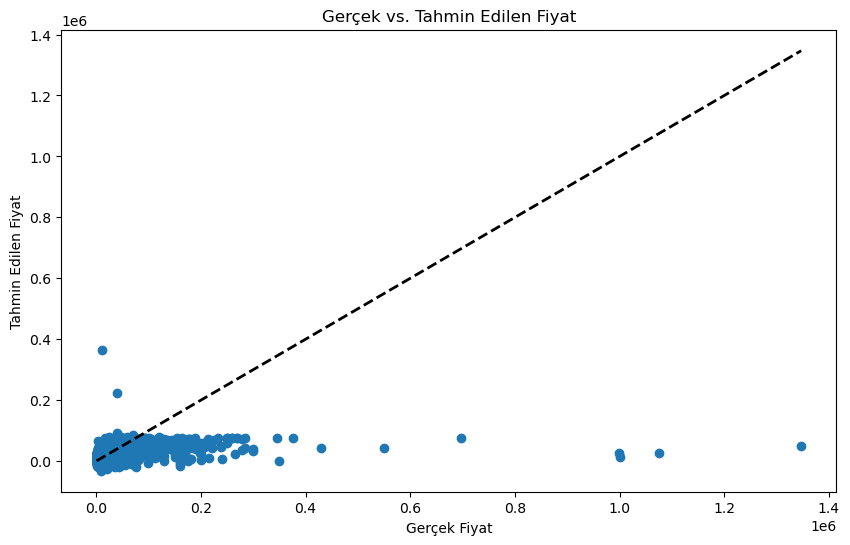

In [1704]:
X = df[['empty_weight', 'engine_size', 'age']]
y = df['price']
reg = LinearRegression().fit(X, y)
predictions = reg.predict(X)

# R² değeri
r_squared = reg.score(X, y)
print(f"R² değeri: {r_squared}")

# Regresyon katsayıları ve intercept
print(f"Regresyon katsayıları: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# Modelin tahminlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], predictions)
plt.plot([df['price'].min(), df['price'].max()], [df['price'].min(), df['price'].max()], 'k--', lw=2)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs. Tahmin Edilen Fiyat')
plt.show()

**Bu, bağımsız değişkenlerin (empty_weight, engine_power ve age) price (fiyat) değişkenindeki varyansın yaklaşık %23.3'ünü açıkladığını gösterir. Önceki modele göre daha yüksek bir R² değerine sahipsiniz, bu da modelin daha fazla varyansı açıklayabildiğini ve eklenen değişkenlerin faydalı olduğunu gösterir. Ancak, hala açıklanamayan %76.7'lik bir varyans bulunmakta, bu da fiyatı etkileyen başka önemli faktörlerin de olduğunu gösterir.**

R² değeri: 0.3992480334009729
Regresyon katsayıları: [  10.45430844  215.38479976   -1.68425678 -317.30746502]
Intercept: -11644.615795678277


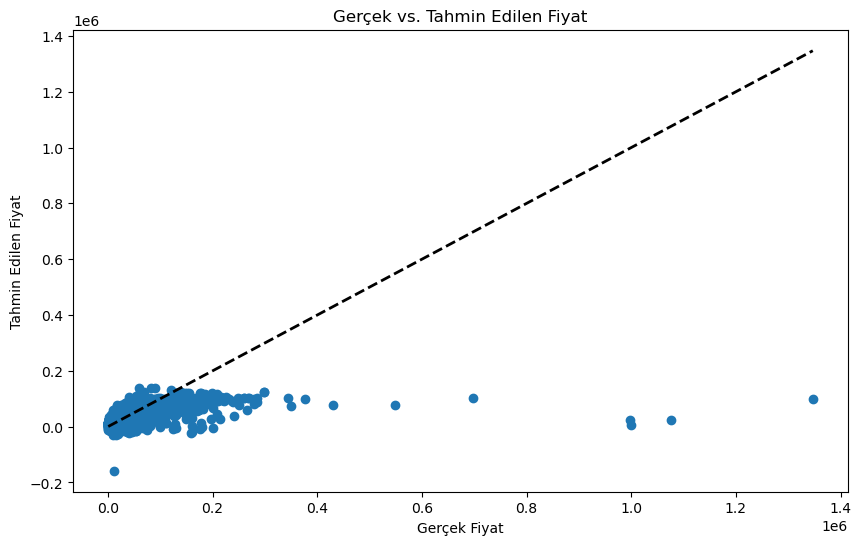

In [1706]:
X = df[['empty_weight', 'power_kW', 'engine_size', 'age']]
y = df['price']
reg = LinearRegression().fit(X, y)
predictions = reg.predict(X)

# R² değeri
r_squared = reg.score(X, y)
print(f"R² değeri: {r_squared}")

# Regresyon katsayıları ve intercept
print(f"Regresyon katsayıları: {reg.coef_}")
print(f"Intercept: {reg.intercept_}")

# Modelin tahminlerini görselleştirme
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], predictions)
plt.plot([df['price'].min(), df['price'].max()], [df['price'].min(), df['price'].max()], 'k--', lw=2)
plt.xlabel('Gerçek Fiyat')
plt.ylabel('Tahmin Edilen Fiyat')
plt.title('Gerçek vs. Tahmin Edilen Fiyat')
plt.show()

**Conclusion: With an R² value of approximately 40%, it would be appropriate to include the empty_weight column in our modeling study.**

# 6. Engine Size

In [1709]:
df['engine_size'].describe()

count    25827.000000
mean      1738.171177
std       1076.231807
min          0.000000
25%       1248.000000
50%       1595.000000
75%       1984.000000
max      99900.000000
Name: engine_size, dtype: float64

(0.0, 8000.0)

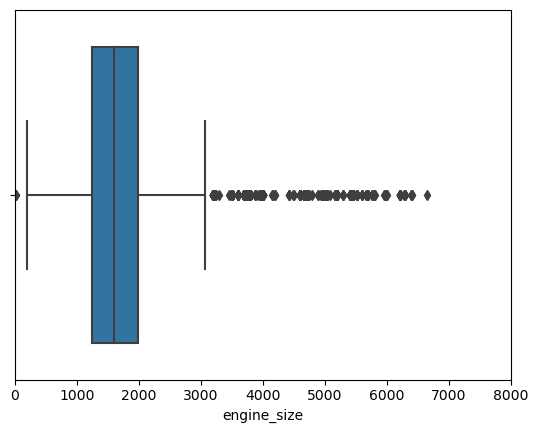

In [1710]:
sns.boxplot(x=df['engine_size'])
plt.xlim(0, 8000)  # x ekseni aralığını istediğiniz gibi ayarlayabilirsiniz

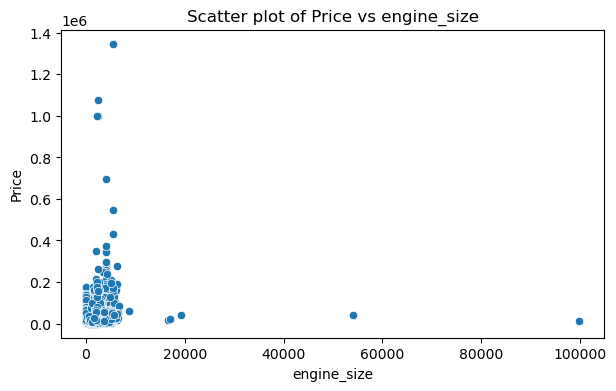

In [1711]:
scatter_plot_with_price(df,'engine_size')

In [1712]:
df['engine_size'].value_counts()

engine_size
1598.0    2088
999.0     2004
1969.0    1065
1461.0    1056
1998.0    1012
          ... 
3059.0       1
2969.0       1
1763.0       1
3595.0       1
1122.0       1
Name: count, Length: 473, dtype: int64

In [1713]:
df.groupby('price')['engine_size'].value_counts()

price      engine_size
490.0      1390.0         1
500.0      1598.0         1
           1597.0         1
590.0      1497.0         1
600.0      1598.0         2
                         ..
696900.0   3982.0         1
998000.0   2330.0         1
999999.0   2316.0         1
1075900.0  2330.0         1
1346900.0  5409.0         1
Name: count, Length: 17204, dtype: int64

In [1714]:
upper_lower_whisker(df,'engine_size')

(3088.0, 144.0)

In [1715]:
df[df['engine_size'] < upper_lower_whisker(df,'engine_size')[1]][['make_model', 'engine_size']]

make_model  engine_size
0             Dacia           0.0
1             Dacia           0.0
282     Dacia Spring          0.0
283     Dacia Spring          0.0
284     Dacia Spring          0.0
...              ...          ...
26461  Nissan 280 ZX          0.0
26470          Fiat           0.0
26674   Ford Mustang          0.0
26698          Ford           0.0
26702   Ford Mustang          0.0

[359 rows x 2 columns]

In [1716]:
df[df['engine_size'] > upper_lower_whisker(df,'engine_size')[0]][['make_model', 'engine_size']]

make_model  engine_size
4        Dacia Dokker      16597.0
607     Ford Explorer       3300.0
608        Ford F 150       3490.0
609     Ford F 150 V6       3496.0
610     Ford F 150 V6       3496.0
...               ...          ...
26847        Ford  V8       5300.0
26848        Ford  V8       5300.0
26849        Ford  V8       5300.0
26850  Ford  Roadster       5700.0
26853           Ford        3600.0

[1378 rows x 2 columns]

In [1717]:
df[df['engine_size'] == 0][['make_model', 'engine_size']]

make_model  engine_size
0             Dacia           0.0
1             Dacia           0.0
282     Dacia Spring          0.0
283     Dacia Spring          0.0
284     Dacia Spring          0.0
...              ...          ...
26461  Nissan 280 ZX          0.0
26470          Fiat           0.0
26674   Ford Mustang          0.0
26698          Ford           0.0
26702   Ford Mustang          0.0

[246 rows x 2 columns]

In [1718]:
df[df['engine_size'] == 0][['make_model', 'fuel_type']].values

array([['Dacia ', 'Electric'],
       ['Dacia ', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Dacia Spring', 'Electric'],
       ['Fiat 500', 'Electric'],
       ['Fiat 500', 'Electric'],
       ['Fiat 500', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
       ['Fiat 500e', 'Electric'],
  

In [1719]:
df[df['make_model'] == 'Nissan 280 ZX'][['engine_size']]

engine_size
26451       2800.0
26461          0.0

In [1720]:
n280 = df[df['make_model'] == 'Nissan 280 ZX']
max_engine_size_excluding_26461 = n280[n280.index != 26461]['engine_size'].max()
df.at[26461, 'engine_size'] = round(max_engine_size_excluding_26461)

In [1721]:
df[df['make_model'] == 'Dacia Spring'][['make_model', 'engine_size']]

make_model  engine_size
280   Dacia Spring       1693.0
281   Dacia Spring       1693.0
282   Dacia Spring          0.0
283   Dacia Spring          0.0
284   Dacia Spring          0.0
285   Dacia Spring          0.0
286   Dacia Spring          0.0
287   Dacia Spring          0.0
288   Dacia Spring          0.0
3122  Dacia Spring       1343.0
3123  Dacia Spring       1343.0
3124  Dacia Spring       1343.0
3125  Dacia Spring       1343.0
3126  Dacia Spring       1343.0
3127  Dacia Spring       1343.0
3128  Dacia Spring       1343.0
3129  Dacia Spring       1343.0
3130  Dacia Spring       1343.0
3131  Dacia Spring       1343.0
3132  Dacia Spring       1343.0
3133  Dacia Spring       1343.0
3134  Dacia Spring       1343.0
3135  Dacia Spring       1343.0
3136  Dacia Spring       1343.0
3137  Dacia Spring       1343.0
3138  Dacia Spring       1343.0
3139  Dacia Spring       1343.0
3140  Dacia Spring       1343.0
3141  Dacia Spring       1343.0
3142  Dacia Spring       1343.0
3143  Dacia Spring       1343.0
3144  Dacia Spring       1343.0
3145  Dacia Spring       1343.0
3146  Dacia Spring       1343.0
3147  Dacia Spring       1343.0
3148  Dacia Spring       1343.0
3149  Dacia Spring       1693.0
3150  Dacia Spring          0.0
3151  Dacia Spring          0.0

In [1722]:
df[df['make_model'] == 'Dacia Spring'][['engine_size', 'fuel_type']]

engine_size fuel_type
280        1693.0  Electric
281        1693.0  Electric
282           0.0  Electric
283           0.0  Electric
284           0.0  Electric
285           0.0  Electric
286           0.0  Electric
287           0.0  Electric
288           0.0  Electric
3122       1343.0  Electric
3123       1343.0  Electric
3124       1343.0  Electric
3125       1343.0  Electric
3126       1343.0  Electric
3127       1343.0  Electric
3128       1343.0  Electric
3129       1343.0  Electric
3130       1343.0  Electric
3131       1343.0  Electric
3132       1343.0  Electric
3133       1343.0  Electric
3134       1343.0  Electric
3135       1343.0  Electric
3136       1343.0  Electric
3137       1343.0  Electric
3138       1343.0  Electric
3139       1343.0  Electric
3140       1343.0  Electric
3141       1343.0  Electric
3142       1343.0  Electric
3143       1343.0  Electric
3144       1343.0  Electric
3145       1343.0  Electric
3146       1343.0  Electric
3147       1343.0  Electric
3148       1343.0  Electric
3149       1693.0  Electric
3150          0.0  Electric
3151          0.0  Electric

In [1723]:
df.loc[df['make_model'] == 'Dacia Spring', 'engine_size'] = 0

In [1724]:
df[df['make_model'] == 'Volvo C70'][['engine_size', 'fuel_type']]

engine_size fuel_type
21151       2521.0   Benzine
21152       1984.0    Diesel
21153       1984.0    Diesel
21154       1984.0    Diesel
21155       1984.0    Diesel
...            ...       ...
25795       2435.0   Benzine
25796       2319.0   Benzine
25797       2319.0   Benzine
25798       1984.0   Benzine
25799       2435.0   Benzine

[346 rows x 2 columns]

In [1725]:
df[(df['make_model'] == 'Volvo C70') & (df['engine_size'] == 0)]

make_model   price     body_type   type  doors warranty   mileage  \
25270  Volvo C70  6000.0   Convertible   Used    2.0       No  267733.0   

         gearbox fuel_type colour  ...    power_kW fuel_consumption_comb  \
25270  Automatic   Benzine   Grey  ...  134.684211               9.71612   

       location_country   age  inspection_status  energy_efficiency_class  \
25270       Netherlands  20.0                 no              Inefficient   

      safety_security_package  comfort_convenience_package  ent_media_package  \
25270                Enhanced                     Advanced              Basic   

      num_of_extras  
25270             1  

[1 rows x 36 columns]

In [1726]:
df[(df['make_model'] == 'Opel Corsa') & (df['engine_size'] == 0)]

make_model    price body_type            type  doors warranty  \
1642   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1645   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1647   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1655   Opel Corsa  25488.0   Compact   Demonstration    5.0       No   
1656   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1658   Opel Corsa  25488.0   Compact   Demonstration    5.0       No   
1659   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1664   Opel Corsa  27588.0   Compact   Demonstration    5.0       No   
1667   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1668   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1677   Opel Corsa  27988.0   Compact   Demonstration    5.0       No   
1678   Opel Corsa  26888.0   Compact   Demonstration    5.0       No   
4370   Opel Corsa  32850.0     Sedan            Used    5.0       No   
9897   Opel Corsa  16490.0   Compact            Used    5.0      Yes   
17880  Opel Corsa  10750.0   Compact            Used    3.0       No   

        mileage    gearbox fuel_type  colour  ...    power_kW  \
1642       35.0  Automatic  Electric   Black  ...  100.000000   
1645       35.0  Automatic  Electric   Black  ...  100.000000   
1647       35.0  Automatic  Electric    Grey  ...  100.000000   
1655       45.0  Automatic  Electric   White  ...  100.000000   
1656       35.0  Automatic  Electric   Black  ...  100.000000   
1658       45.0  Automatic  Electric   White  ...  100.000000   
1659       35.0  Automatic  Electric    Grey  ...  100.000000   
1664       45.0  Automatic  Electric  Orange  ...  100.000000   
1667       35.0  Automatic  Electric    Grey  ...  100.000000   
1668       35.0  Automatic  Electric    Grey  ...  100.000000   
1677       35.0  Automatic  Electric    Grey  ...  100.000000   
1678       35.0  Automatic  Electric   White  ...  100.000000   
4370    12335.0  Automatic  Electric   Black  ...  100.000000   
9897    34800.0     Manual   Benzine   Black  ...  110.000000   
17880  100946.0     Manual   Benzine   White  ...   90.642857   

      fuel_consumption_comb  location_country  age  inspection_status  \
1642               3.447727           Germany  0.0                 no   
1645               3.447727           Germany  0.0                 no   
1647               3.447727           Germany  0.0                 no   
1655               3.447727           Germany  0.0                 no   
1656               3.447727           Germany  0.0                 no   
1658               3.447727           Germany  0.0                 no   
1659               3.447727           Germany  0.0                 no   
1664               3.447727           Germany  0.0                 no   
1667               3.447727           Germany  0.0                 no   
1668               3.447727           Germany  0.0                 no   
1677               3.447727           Germany  0.0                 no   
1678               3.447727           Germany  0.0                 no   
4370               3.447727           Germany  1.0                 no   
9897               5.062921           Germany  3.0                 no   
17880              5.062921       Netherlands  6.0                 no   

       energy_efficiency_class safety_security_package  \
1642                 Efficient                Advanced   
1645                 Efficient                Advanced   
1647                 Efficient                Advanced   
1655                 Efficient                Advanced   
1656                 Efficient                Advanced   
1658                 Efficient                Advanced   
1659                 Efficient                Advanced   
1664                 Efficient                Advanced   
1667                 Efficient                Advanced   
1668                 Efficient                Advanced   
1677  

In [1727]:
df[(df['make_model'] == 'Ford Mustang') & (df['engine_size'] == 0)]

make_model    price     body_type   type  doors warranty  mileage  \
26674  Ford Mustang  49950.0   Convertible   Used    2.0       No  12875.0   
26702  Ford Mustang  18900.0   Convertible   Used    2.0       No  58608.0   

      gearbox fuel_type  colour  ... power_kW fuel_consumption_comb  \
26674  Manual   Benzine  Silver  ...   211.00                 10.83   
26702  Manual   Benzine    Blue  ...   182.75                 10.83   

       location_country   age  inspection_status  energy_efficiency_class  \
26674       Netherlands  54.0                 no              Inefficient   
26702       Netherlands  55.0                 no              Inefficient   

      safety_security_package  comfort_convenience_package  ent_media_package  \
26674                Enhanced                        Basic           Advanced   
26702                   Basic                        Basic           Advanced   

      num_of_extras  
26674             1  
26702             1  

[2 rows x 36 columns]

[engine_size outliers]

{'https://www.webuyanycar.com/guides/car-ownership/car-engine-sizes/',

https://www.cjponyparts.com/resources/engine-size-chart,

https://www.btgmaslak.com/motor-hacmi-silindir-hacmi-nedir-nasil-hesaplanir/#:~:text=Bir%20ara%C3%A7taki%20motor%20hacmi%20ne,aras%C4%B1ndaki%20motorlar%20ihtiyac%C4%B1n%C4%B1z%C4%B1%20kar%C5%9F%C4%B1lamaya%20yetecektir.}

In [1729]:
df[df['engine_size'] > 6000][['make_model', 'age', 'fuel_type', 'engine_size']]

make_model   age fuel_type  engine_size
4                    Dacia Dokker   0.0       LPG      16597.0
8318                Dacia Sandero   3.0   Benzine      99900.0
19356              Renault Megane   7.0   Benzine      16998.0
19922      Mercedes-Benz C 63 AMG   8.0   Benzine       6208.0
21389  Mercedes-Benz SLS Roadster  10.0   Benzine       6208.0
21945     Mercedes-Benz SL 63 AMG  11.0   Benzine       6209.0
21949  Mercedes-Benz SLR Roadster  11.0   Benzine       6208.0
22529      Mercedes-Benz E 63 AMG  12.0   Benzine       6208.0
22530      Mercedes-Benz E 63 AMG  12.0   Benzine       6208.0
22536     Mercedes-Benz ML 63 AMG  12.0   Benzine       6208.0
22541           Mercedes-Benz SLS  12.0   Benzine       6208.0
22986     Mercedes-Benz CL 63 AMG  13.0   Benzine       6208.0
22994     Mercedes-Benz SL 63 AMG  13.0   Benzine       6300.0
22995     Mercedes-Benz SL 63 AMG  13.0   Benzine       6300.0
23332                Ford Mustang  14.0   Benzine      54009.0
23367    Mercedes-Benz CLK 63 AMG  14.0   Benzine       6208.0
23371      Mercedes-Benz E 63 AMG  14.0   Benzine       6208.0
23383     Mercedes-Benz SL 63 AMG  14.0   Benzine       6208.0
23733     Mercedes-Benz ML 63 AMG  15.0   Benzine       6208.0
25310        Mercedes-Benz SL 320  21.0   Benzine      19194.0
26653                Ford Mustang  53.0   Benzine       8660.0
26675                Ford Mustang  54.0   Benzine       6400.0
26764                 Ford Galaxy  57.0   Benzine       6294.0
26778                Ford Mustang  57.0   Benzine       6653.0
26803            Ford Thunderbird  59.0   Benzine       6400.0
26807                Ford  XL 500  60.0   Benzine       6387.0
26837                    Ford  V8  68.0   Benzine       6276.0

In [1730]:
indices_to_zero = df[(df['cylinders'] == 1) & (df['fuel_type'] != 'Electric')].index

# Bu indeksleri sıfıra çevirme
df.loc[indices_to_zero, 'index'] = 0

In [1731]:
df[df['make_model'] == 'Dacia Dokker'][['engine_size']]

engine_size
4          16597.0
3034        1500.0
5764        1598.0
5765        1332.0
8118        1598.0
8119        1598.0
8120        1598.0
8121        1333.0
8122        1598.0
8123        1461.0
8124        1598.0
8125        1598.0
8126        1332.0
11550       1461.0
11551       1598.0
11552       1598.0
11553       1598.0
11554       1598.0
11555       1500.0
11556       1500.0
11557       1598.0
11558       1598.0
11559       1598.0
11560        999.0
11561       1598.0
11563       1197.0
11564        999.0
11565       1598.0
11566       1500.0
11568       1461.0
11569       1598.0
11570       1598.0
11571       1197.0
11572       1598.0
14778       1461.0
14779       1461.0
14780       1500.0
14782       1461.0
14783       1500.0
14784       1197.0
14785       1461.0
14786       1197.0
14787       1502.0
17082       1461.0
17083       1461.0
18494       1461.0
18495       1598.0
18496       1197.0
18497       1461.0
19663       1500.0
19665       1461.0
20544       1598.0

In [1732]:
d_dokker = df[df['make_model'] == 'Dacia Dokker']
mean_engine_size_excluding_4 = d_dokker[d_dokker.index != 4]['engine_size'].mean()
df.at[4, 'engine_size'] = round(mean_engine_size_excluding_4)

In [1733]:
df[df['make_model'] == 'Renault Megane'][['engine_size']]

engine_size
2195        1598.0
2196        1332.0
2197        1332.0
2198        1332.0
2199        1332.0
...            ...
25775       1998.0
25861       1599.0
25862       1998.0
25863       1598.0
25932       1998.0

[848 rows x 1 columns]

In [1734]:
df[df['make_model'] == 'Dacia Sandero'][['engine_size']]

engine_size
153          999.0
154          999.0
155          999.0
156          999.0
157          999.0
...            ...
22928       1149.0
22929       1390.0
22930       1390.0
23303       1390.0
23304       1390.0

[612 rows x 1 columns]

In [1735]:
df[df['make_model'] == 'Mercedes-Benz SL 320'][['engine_size']]

engine_size
25310      19194.0
26112       3200.0
26113       3199.0

In [1736]:
m320 = df[df['make_model'] == 'Mercedes-Benz SL 320']
mean_engine_size_excluding_25310 = m320[m320.index != 25310]['engine_size'].mode()[1]
df.at[25310, 'engine_size'] = round(mean_engine_size_excluding_25310)

In [1737]:
df[df['make_model'] == 'Ford Mustang'][['engine_size']]

engine_size
741         5038.0
742         5038.0
743         5162.0
744         5038.0
745         5038.0
...            ...
26775       5038.0
26776       5038.0
26777       5038.0
26778       6653.0
26791       4700.0

[360 rows x 1 columns]

In [1738]:
df[df['engine_size'] < upper_lower_whisker(df, 'engine_size')[1]][['engine_size']].value_counts()

engine_size
0.0            275
1.0             99
2.0              9
4.0              2
5.0              2
20.0             1
Name: count, dtype: int64

In [1739]:
df.loc[(df['engine_size'] <= 20), 'engine_size'] = 1000

In [1740]:
df.drop(index=[0, 1,316, 341, 360, 3033, 907,910, 911, 912, 1306, 1599, 1864, 3723, 3724, 3734,
                                      3741, 3742, 8318, 1642,  1645,  1647,  1655,  1656,  1658,  1659,  1664,  1667,  1668,
                                      1677,  1678,  4370, 5451, 5549, 5698, 9897, 17880, 19356, 19922, 21389, 21945,
                                      21949, 22529, 22530, 22536, 22541, 22986, 22994, 22995, 23332, 23367, 23371, 23383,
                                      23733, 26653, 26675, 26764, 26778, 26803, 26807, 26837, 26674, 26702, 4757, 9897,
                                      7166, 7709, 7713, 11225, 11226, 12372, 13524, 14401, 14402, 15992, 16324, 16884,
                                      17880, 19568, 23864, 25270, 26470, 26674, 26698, 26702], inplace=True)


In [1741]:
df[df['engine_size'] == 0][['make_model', 'fuel_type']]

Empty DataFrame
Columns: [make_model, fuel_type]
Index: []

In [1742]:
a = df.engine_size.value_counts()
a.sort_index()

engine_size
200.0     1
289.0     1
300.0     1
332.0     1
498.0     1
         ..
5950.0    1
5980.0    4
5981.0    1
5987.0    2
6000.0    1
Name: count, Length: 454, dtype: int64

# 15. Num of Extras

In [1744]:
df['num_of_extras'].describe()

count    25746.000000
mean         4.572167
std          3.639816
min          1.000000
25%          1.000000
50%          4.000000
75%          7.000000
max         26.000000
Name: num_of_extras, dtype: float64

In [1745]:
df['num_of_extras'].value_counts()

num_of_extras
1     6625
2     3349
3     2882
4     2399
5     2089
6     1627
7     1491
8     1163
9     1043
10     896
11     652
12     542
13     358
14     266
15     175
16      96
17      56
18      24
19      10
20       2
26       1
Name: count, dtype: int64

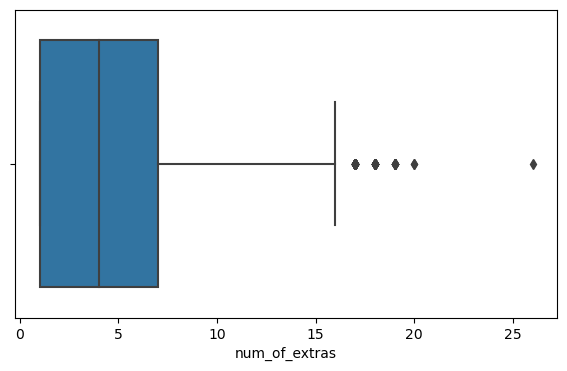

In [1746]:
def box_plot_column_(df, column):
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=column, data=df)
    plt.xlabel(column)
    plt.show()

# Call the function with your DataFrame and column name
box_plot_column_(df, 'num_of_extras')

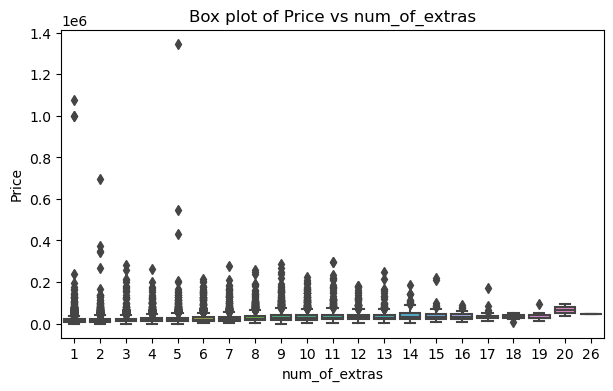

In [1747]:
box_plot_with_price(df,'num_of_extras')

In [1748]:
upper_lower_whisker(df,'num_of_extras')

(16.0, -8.0)

In [1749]:
df[df['num_of_extras'] > upper_lower_whisker(df,'num_of_extras')[0]][['make_model','num_of_extras']]

make_model  num_of_extras
650                    Ford Focus             17
652                    Ford Focus             17
655                    Ford Focus             17
657                    Ford Focus             17
660                    Ford Focus             17
...                           ...            ...
19954     Mercedes-Benz GL 63 AMG             19
20367                   SEAT Leon             19
21383  Mercedes-Benz ML 63 AMG V8             17
21977               Nissan Navara             17
23948              Renault Megane             18

[93 rows x 2 columns]

In [1750]:
df[df['num_of_extras'] < upper_lower_whisker(df,'num_of_extras')[1]]

Empty DataFrame
Columns: [make_model, price, body_type, type, doors, warranty, mileage, gearbox, fuel_type, colour, paint, seller, seats, engine_size, gears, co2_emissions, drivetrain, cylinders, empty_weight, service_history, non_smoker, emission_sticker, upholstery_color, upholstery, available, taxi_rental, power_kW, fuel_consumption_comb, location_country, age, inspection_status, energy_efficiency_class, safety_security_package, comfort_convenience_package, ent_media_package, num_of_extras, index]
Index: []

[0 rows x 37 columns]

In [1751]:
df[df['num_of_extras'] > 17]

make_model    price          body_type            type  \
3456                 Ford Focus  28950.0      Station wagon   Demonstration   
3508                  Ford Kuga  38490.0   Off-Road/Pick-up            Used   
3511                  Ford Kuga  38290.0   Off-Road/Pick-up            Used   
3525                  Ford Kuga  28990.0   Off-Road/Pick-up            Used   
3530                  Ford Kuga  28460.0   Off-Road/Pick-up            Used   
3533                  Ford Kuga  28250.0   Off-Road/Pick-up            Used   
3534                  Ford Kuga  37950.0   Off-Road/Pick-up            Used   
3536                  Ford Kuga  28250.0   Off-Road/Pick-up            Used   
3539                  Ford Kuga  38450.0   Off-Road/Pick-up            Used   
3557                Ford Mondeo  42980.0      Station wagon            Used   
5194               Skoda Kodiaq  44800.0   Off-Road/Pick-up            Used   
5199               Skoda Kodiaq  30500.0   Off-Road/Pick-up            Used   
5657                  Volvo V60  46490.0      Station wagon   Demonstration   
5699                 Volvo XC40  51499.0   Off-Road/Pick-up            Used   
6085                  Ford Edge  38880.0   Off-Road/Pick-up            Used   
6216                 Ford Focus  25940.0      Station wagon            Used   
6296                Ford Mondeo  38970.0      Station wagon            Used   
6304                Ford Mondeo  36960.0      Station wagon            Used   
7604                  SEAT Leon  24980.0      Station wagon            Used   
7610                  SEAT Leon  28500.0      Station wagon            Used   
7625                  SEAT Leon  20950.0      Station wagon            Used   
7774               Skoda Kodiaq  43900.0   Off-Road/Pick-up            Used   
8044                  Volvo V60  34990.0      Station wagon            Used   
9295       Mercedes-Benz AMG GT  92990.0              Coupe   Demonstration   
11365                 Volvo V60  35940.0      Station wagon            Used   
11510                Volvo XC60  48800.0   Off-Road/Pick-up            Used   
11516                Volvo XC60  40950.0   Off-Road/Pick-up            Used   
13941                 SEAT Leon  25400.0              Sedan            Used   
14146             Skoda Octavia  28899.0      Station wagon            Used   
14763                Volvo XC90  45995.0   Off-Road/Pick-up            Used   
15716       Mercedes-Benz G 350  93490.0   Off-Road/Pick-up            Used   
16606                 SEAT Leon  26900.0              Coupe            Used   
18941  Mercedes-Benz GLA 45 AMG  33490.0   Off-Road/Pick-up            Used   
18942  Mercedes-Benz GLA 45 AMG  33490.0   Off-Road/Pick-up            Used   
19954   Mercedes-Benz GL 63 AMG  49499.0   Off-Road/Pick-up            Used   
20367                 SEAT Leon  11500.0      Station wagon            Used   
23948            Renault Megane   5990.0        Convertible            Used   

       doors warranty   mileage    gearbox fuel_type  colour  ...  \
3456     5.0       No    7500.0  Automatic   Benzine    Grey  ...   
3508     5.0      Yes    7232.0  Automatic  Electric   Black  ...   
3511     5.0      Yes   20278.0  Automatic  Electric   Black  ...   
3525     5.0      Yes   17806.0     Manual   Benzine    Blue  ...   
3530     5.0      Yes   11235.0     Manual   Benzine    Grey  ...   
3533     5.0      Yes   15699.0     Manual   Benzine    Grey  ...   
3534     5.0      Yes   28180.0  Automatic  Electric   Black  ...   
3536     5.0      Yes   12326.0     Manual   Benzine    Grey  ...   
3539     5.0      Yes   21728.0  Automatic  Electric   Black  ...   
3557     5.0       No   12790.0  Automatic    Diesel    Grey  ...   
5194     4.0      Yes    9800.0  Automatic   Benzine    Grey  ...   
5199     5.0       No   33749.0  Automatic    Diesel   Black  ...   
5657     5.0      Yes   12365.0  Automatic    Diesel   White  ...   
5699     5.0      Yes    5824.0  Automatic  Electric

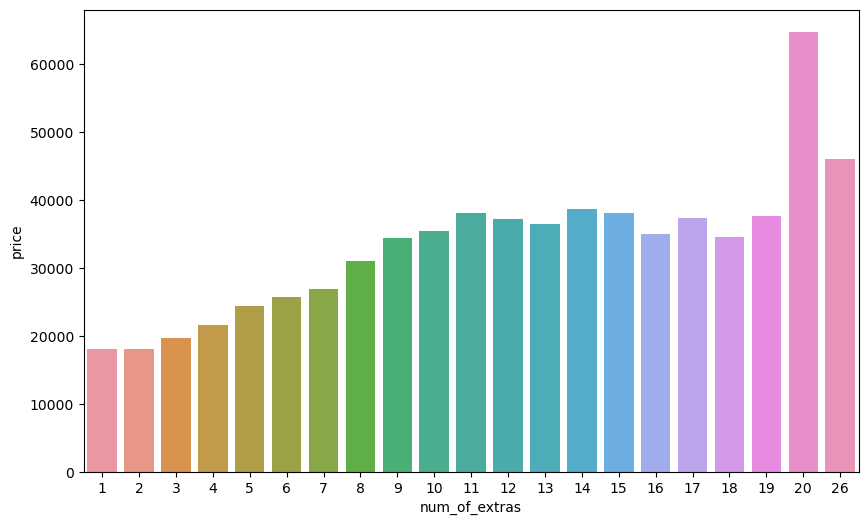

In [1752]:
mean_prices = df.groupby('num_of_extras')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='num_of_extras', y='price', data=mean_prices)
#plt.title('Ortalama Fiyatın Ekstra Özellik Sayısına Göre Değişimi')
#plt.xlabel('Ekstra Özellik Sayısı')
#plt.ylabel('Ortalama Fiyat')
plt.show()

In [1753]:
correlation = df['num_of_extras'].corr(df['price'])

print("Pearson Korelasyon Katsayısı:", correlation)

Pearson Korelasyon Katsayısı: 0.24669979139301887


**The fact that the Pearson correlation coefficient is 25% indicates that there is a weak positive linear relationship between these two variables. This shows that there is a direct relationship between the number of extra features and price, but the relationship is not very strong. This means that the price tends to increase as the number of extra features increases, but this increase is not significant or high.**

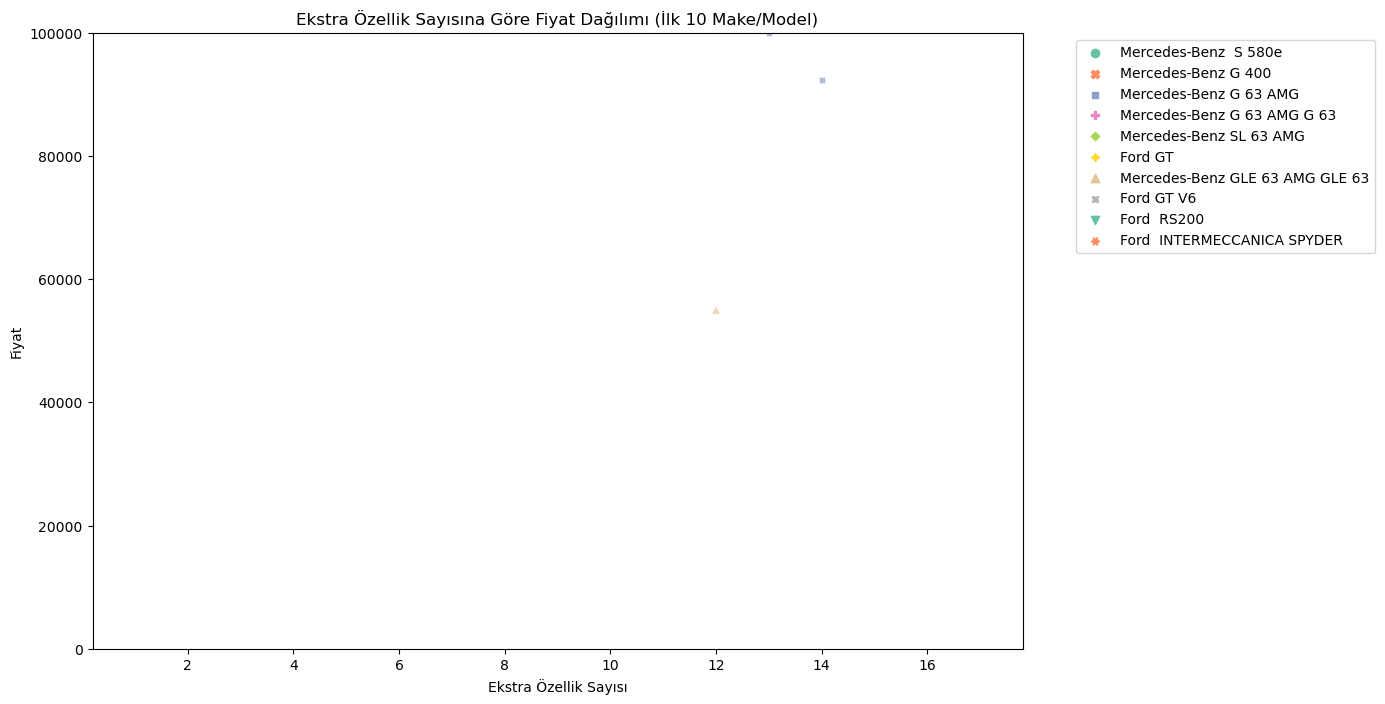

In [1755]:
top_make_models = df.groupby('make_model').agg({'price': 'mean'}).reset_index().sort_values(by='price', ascending=False).head(10)

# İlk 10 make_model için filtreleme
filtered_df = df[df['make_model'].isin(top_make_models['make_model'])]

# Scatter plot oluşturma
plt.figure(figsize=(12, 8))
size = 100
sns.scatterplot(x='num_of_extras', y='price', hue='make_model', style='make_model', palette='Set2', data=filtered_df, alpha=0.7)
plt.title('Ekstra Özellik Sayısına Göre Fiyat Dağılımı (İlk 10 Make/Model)')
plt.xlabel('Ekstra Özellik Sayısı')
plt.ylabel('Fiyat')
plt.ylim(0, 100000)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [1756]:
result = df.groupby('age').agg(
    mean_num=('num_of_extras', 'mean'),
    max_num=('num_of_extras', 'max')
    
).reset_index()

sorted_result = result.sort_values(by='max_num', ascending=False)
sorted_result.sort_values(by='max_num').head(100)

age  mean_num  max_num
63  63.0  1.000000        1
66  66.0  1.000000        1
64  64.0  1.000000        1
62  62.0  1.000000        1
77  93.0  1.000000        1
..   ...       ...      ...
8    8.0  4.271515       19
2    2.0  5.616036       19
5    5.0  4.041284       20
3    3.0  4.972028       20
4    4.0  4.296247       26

[80 rows x 3 columns]

In [1757]:
# Replace 1 with np.nan in the num_of_extras column
df.loc[df['num_of_extras'] == 1, 'num_of_extras'] = np.nan

In [1758]:
df['num_of_extras'].isna().sum()

6625

In [1759]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

In [1760]:
# Define a function to compute the mode, handling cases where mode might be empty
def mode_or_none(series):
    mode_series = series.mode()
    return mode_series.iloc[0] if not mode_series.empty else None

# Calculate the mode of num_of_extras for each age group
mode_num_by_age = df.groupby('age')['num_of_extras'].transform(mode_or_none)

# Fill NaN values in num_of_extras with the mode values
df['num_of_extras'] = df['num_of_extras'].fillna(mode_num_by_age)                                            

In [1761]:
df['num_of_extras'].isna().sum()

18

In [1762]:
def fill_na(df, column, method='ffill'):

    if method not in ['ffill', 'bfill']:
        raise ValueError("Method must be either 'ffill' or 'bfill'.")

    df[column] = df[column].fillna(method=method)
    return df

In [1763]:
# Fill NaN values using forward fill
df_filled = fill_na(df, 'num_of_extras', method='ffill')

# Fill NaN values using backward fill (for demonstration)
df_filled_bfill = fill_na(df, 'num_of_extras', method='bfill')

In [1764]:
df['num_of_extras'].isna().sum()

0

In [1765]:
df[['num_of_extras','age']]

num_of_extras    age
2                2.0    0.0
3                3.0    0.0
4                9.0    0.0
5                2.0    0.0
6                2.0    0.0
...              ...    ...
26851            3.0   92.0
26852            3.0   93.0
26853            5.0   94.0
26854            3.0  122.0
26855            3.0  122.0

[25746 rows x 2 columns]

In [1766]:
# Replace 1 with np.nan in the num_of_extras column
df[df['age'] == 0][['age','num_of_extras']]

age  num_of_extras
2     0.0            2.0
3     0.0            3.0
4     0.0            9.0
5     0.0            2.0
6     0.0            2.0
...   ...            ...
3028  0.0            6.0
3029  0.0           13.0
3030  0.0           14.0
3031  0.0           14.0
3032  0.0            5.0

[2904 rows x 2 columns]

In [1767]:
# Replace 1 with np.nan in the num_of_extras column
df[df['age'] == 0][['age','num_of_extras']].mean()

age              0.000000
num_of_extras    5.874656
dtype: float64

In [1768]:
df[(df['age'] == 0) &(df['num_of_extras'] < 6) ][['make_model','age','num_of_extras']]

make_model  age  num_of_extras
2           Dacia   0.0            2.0
3      Dacia Break  0.0            3.0
5     Dacia Duster  0.0            2.0
6     Dacia Duster  0.0            2.0
9     Dacia Duster  0.0            3.0
...            ...  ...            ...
2995     Volvo S90  0.0            2.0
3003     Volvo V90  0.0            4.0
3004     Volvo V90  0.0            2.0
3012    Volvo XC40  0.0            2.0
3032    Volvo XC90  0.0            5.0

[1574 rows x 3 columns]

In [1769]:
# Function to get the mode
def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else np.nan

# Filter data for age == 0 and group by 'age'
result = df.groupby('age').agg(
    mean_num=('num_of_extras', 'mean'),
    max_num=('num_of_extras', 'max'),
    median_num=('num_of_extras', 'median'),
    mode_num=('num_of_extras', get_mode)
).reset_index()

sorted_result = result.sort_values(by='max_num', ascending=False)
sorted_result.sort_values(by='max_num').head(100)

age  mean_num  max_num  median_num  mode_num
66  66.0  2.000000      2.0         2.0       2.0
74  89.0  3.000000      3.0         3.0       3.0
75  90.0  3.000000      3.0         3.0       3.0
76  92.0  3.000000      3.0         3.0       3.0
77  93.0  3.000000      3.0         3.0       3.0
..   ...       ...      ...         ...       ...
8    8.0  4.523636     19.0         3.0       2.0
2    2.0  6.051670     19.0         5.0       3.0
5    5.0  4.372018     20.0         3.0       2.0
3    3.0  5.219520     20.0         4.0       2.0
4    4.0  5.009631     26.0         3.0       3.0

[80 rows x 5 columns]

In [1770]:
# Replace 1 with np.nan in the num_of_extras column
df.loc[df['age'] == 0, 'num_of_extras'] = np.nan

In [1771]:
df['num_of_extras'].isna().sum()

2904

In [1772]:
# Calculate median of 'score' values for age = 1
median_score_age_1 = df.loc[df['age'] == 1, 'num_of_extras'].median()

# Fill NaN values in 'score' column with the median of age=1 values
df['num_of_extras'] = df['num_of_extras'].fillna(median_score_age_1)

In [1773]:
df['num_of_extras'].isna().sum()

0

# Color

In [1775]:
df.groupby('colour')['price'].describe()

count          mean           std     min       25%      50%  \
colour                                                                  
Beige    253.0  15579.711462  10514.616072  1100.0   8950.00  14900.0   
Black   6214.0  26315.823624  29243.896985   500.0  12495.00  19990.0   
Blu        3.0  12583.333333   2453.738644  9750.0  11875.00  14000.0   
Blue    3216.0  23321.017102  31556.324212   490.0  11750.00  17744.5   
Bronze    66.0  16940.772727  11821.200932  1250.0   9172.50  15890.0   
Brown    454.0  18874.698238  13538.080456  1900.0  12214.25  15900.0   
Gold      68.0  23933.000000  13913.868909  2100.0  13849.00  20490.0   
Green    428.0  24620.841121  27530.910846   800.0   9150.00  17900.0   
Grey    5663.0  24551.066043  22913.036641   600.0  12499.50  19499.0   
Orange   282.0  22840.067376  17368.911898  1500.0  13990.00  19299.0   
Red     2127.0  20447.194170  17856.324683   500.0  11490.00  16990.0   
Silver  1486.0  21496.866083  19880.764481   750.0   9912.50  17190.0   
Violet    95.0  12409.757895   8864.654827   799.0   5400.00  10890.0   
Weiß       3.0  14958.333333   6133.270607  8490.0  12092.50  15695.0   
White   5160.0  21996.159302  23822.449088   790.0  11990.00  16950.0   
Yellow   228.0  28514.785088  67076.655464   888.0  10990.00  18875.0   

             75%        max  
colour                       
Beige   18990.00    69930.0  
Black   31900.00  1075900.0  
Blu     14000.00    14000.0  
Blue    27449.25  1346900.0  
Bronze  23618.25    82750.0  
Brown   22497.50   159999.0  
Gold    31992.00    59900.0  
Green   30622.50   259880.0  
Grey    29320.00   549000.0  
Orange  25923.25   125000.0  
Red     24990.00   430000.0  
Silver  25860.00   188008.0  
Violet  17915.00    47990.0  
Weiß    18192.50    20690.0  
White   24942.50   999999.0  
Yellow  31925.00   998000.0

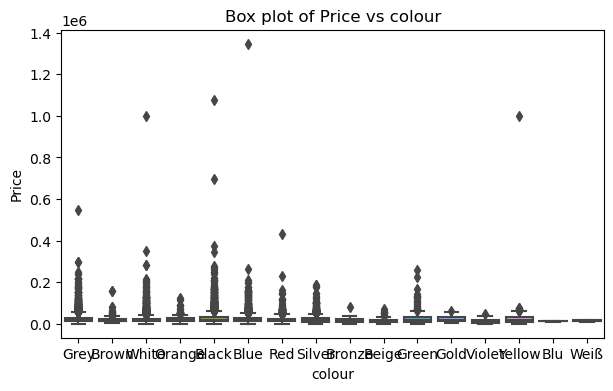

In [1776]:
box_plot_with_price(df,'colour')

In [1777]:
df[df['price'] > 200000 ][['make_model','colour', 'price', 'location_country', 'age', 'mileage']]

make_model  colour      price location_country  \
1151                    Mercedes-Benz     Grey   214885.0          Germany   
1172              Mercedes-Benz AMG GT   Green   224885.0          Germany   
1175              Mercedes-Benz AMG GT    Grey   215550.0          Germany   
1178     Mercedes-Benz AMG GT Roadster    Grey   239000.0          Germany   
1181     Mercedes-Benz AMG GT Roadster   White   283900.0          Austria   
1353            Mercedes-Benz G 63 AMG   Black   696900.0            Spain   
1354            Mercedes-Benz G 63 AMG   Black   344900.0            Spain   
1355            Mercedes-Benz G 63 AMG   Black   268900.0            Spain   
1356            Mercedes-Benz G 63 AMG   Black   248800.0          Germany   
1357            Mercedes-Benz G 63 AMG   Green   259880.0          Germany   
1358            Mercedes-Benz G 63 AMG   Black   279063.0          Germany   
1359            Mercedes-Benz G 63 AMG   White   284780.0          Germany   
1360       Mercedes-Benz G 63 AMG G 63   Black   267810.0          Germany   
1361       Mercedes-Benz G 63 AMG G 63   Black   259000.0          Germany   
1435           Mercedes-Benz SL 63 AMG   White   207113.0          Germany   
1436           Mercedes-Benz SL 63 AMG    Blue   209850.0          Germany   
1437           Mercedes-Benz SL 63 AMG    Grey   217900.0          Germany   
3491                           Ford GT    Blue  1346900.0            Spain   
3629                   Ford Mustang V8   Black   208101.0          Austria   
3962              Mercedes-Benz AMG GT   Black   219000.0          Germany   
3963              Mercedes-Benz AMG GT   Black   219000.0          Germany   
4100            Mercedes-Benz G 63 AMG   Black   375900.0            Spain   
4101            Mercedes-Benz G 63 AMG     Red   232000.0          Germany   
4143   Mercedes-Benz GLE 63 AMG GLE 63    Grey   299000.0          Germany   
4144   Mercedes-Benz GLE 63 AMG GLE 63    Grey   299000.0          Germany   
4157                       Nissan GT-R    Grey   237500.0          Germany   
4158                       Nissan GT-R   White   209000.0          Germany   
6615              Mercedes-Benz AMG GT    Grey   221500.0          Germany   
6616              Mercedes-Benz AMG GT   Black   209900.0          Germany   
6724            Mercedes-Benz G 63 AMG    Grey   249890.0          Germany   
8949                       Ford Ranger   Black   250000.0          Germany   
9469            Mercedes-Benz G 63 AMG    Grey   213900.0          Germany   
9548                       Nissan GT-R   Black   205000.0          Germany   
12176                       Ford GT V6   Black  1075900.0            Spain   
12177                       Ford GT V6  Yellow   998000.0            Spain   
24438                          Ford GT    Grey   549000.0          Germany   
24439                          Ford GT     Red   430000.0            Spain   
25490                   Nissan Skyline    Blue   264900.0            Spain   
25646              Mercedes-Benz G 500   Black   209000.0          Germany   
26265                        Volvo 240   White   999999.0      Netherlands   
26395                      Ford  RS200   White   349000.0          Germany   
26484                         Fiat 131   White   214900.0          Germany   
26670      Ford  INTERMECCANICA SPYDER   Black   240000.0            Italy   

        age   mileage  
1151    0.0    6900.0  
1172    0.0    9900.0  
1175    0.0    3001.0  
1178    0.0     100.0  
1181    0.0    3569.0  
1353    0.0     100.0  
1354    0.0     100.0  
1355    0.0    1800.0  
1356    0.0    8800.0  
1357    0.0    9900.0  
1358    0.0    9900.0  
1359    0.0    9900.0  
1360    0.0    3003.0  
1361    0.0    4003.0  
1435    0.0   10000.0  
1436    0.0    6536.0  
1437    0.0      10.0  
3491    1.0    3500.0  
3629    1.0    1392.0  
3962    1.0    3800.0  
3963    1.0    3800.0  
4100    1.0     100.0  
4101    1.0   16000.0  
4143    1.0    8000

In [1778]:
df.colour = df.colour.str.replace('Blu', 'Blue')

In [1779]:
df.colour = df.colour.str.replace('Bluee', 'Blue')

In [1780]:
df.colour = df.colour.str.replace('Weiß', 'White')

In [1781]:
df.groupby('colour')['colour'].count().sort_values()

colour
Bronze      66
Gold        68
Violet      95
Yellow     228
Beige      253
Orange     282
Green      428
Brown      454
Silver    1486
Red       2127
Blue      3219
White     5163
Grey      5663
Black     6214
Name: colour, dtype: int64

In [1782]:
df[(df['price'] > 200000)  & (df['colour'] == 'Yellow') ].groupby('colour')[['make_model','price', 'age']].value_counts()


colour  make_model  price     age
Yellow  Ford GT V6  998000.0  4.0    1
Name: count, dtype: int64

K2 test istatistiğini (chi2), p değerini, dereceyi (dof) ve beklenen değerleri (expected) hesaplayacaktır. P değeri, kategorik özelliğinizin fiyata anlamlı bir etkisi olup olmadığını belirlemek için kullanılabilir. Genellikle, p değeri 0.05'ten küçükse (p < 0.05), kategorik özelliğinizin fiyata anlamlı bir etkisi olduğu söylenir.

Dikkat edilmesi gereken bir diğer nokta da, K2 testi sadece kategorik özelliğiniz en az iki kategoriye sahipse ve fiyat değişkeniniz sürekli bir değişken ise uygulanabilir.

In [1784]:
from scipy.stats import chi2_contingency

In [1785]:
ct = pd.crosstab(df['colour'], df['price'])
chi2, p_value, dof, expected = chi2_contingency(ct)
print(chi2, p_value, dof, expected)

67164.46031474078 1.1471507717464275e-09 64987 [[0.00982677 0.01965354 0.00982677 ... 0.00982677 0.00982677 0.00982677]
 [0.24135788 0.48271576 0.24135788 ... 0.24135788 0.24135788 0.24135788]
 [0.12502913 0.25005826 0.12502913 ... 0.12502913 0.12502913 0.12502913]
 ...
 [0.00368989 0.00737979 0.00368989 ... 0.00368989 0.00368989 0.00368989]
 [0.20053601 0.40107201 0.20053601 ... 0.20053601 0.20053601 0.20053601]
 [0.00885574 0.01771149 0.00885574 ... 0.00885574 0.00885574 0.00885574]]


In [1786]:
ct = pd.crosstab(df['make_model'], df['price'])
chi2, p_value, dof, expected = chi2_contingency(ct)
print(chi2, p_value, dof, expected)

4762612.747454853 0.0 3714257 [[7.76819700e-05 1.55363940e-04 7.76819700e-05 ... 7.76819700e-05
  7.76819700e-05 7.76819700e-05]
 [3.88409850e-05 7.76819700e-05 3.88409850e-05 ... 3.88409850e-05
  3.88409850e-05 3.88409850e-05]
 [2.01973122e-03 4.03946244e-03 2.01973122e-03 ... 2.01973122e-03
  2.01973122e-03 2.01973122e-03]
 ...
 [7.37978715e-03 1.47595743e-02 7.37978715e-03 ... 7.37978715e-03
  7.37978715e-03 7.37978715e-03]
 [5.82614775e-04 1.16522955e-03 5.82614775e-04 ... 5.82614775e-04
  5.82614775e-04 5.82614775e-04]
 [4.15598540e-03 8.31197079e-03 4.15598540e-03 ... 4.15598540e-03
  4.15598540e-03 4.15598540e-03]]


# SEATS

In [1788]:
df.seats.unique()

array([ 7.,  5.,  4.,  2.,  8.,  3.,  6.,  9., 17.,  0.,  1.])

In [1789]:
df.groupby('seats')['price'].sum()

seats
0.0         84600.0
1.0        180649.0
2.0      38156805.0
3.0        530344.0
4.0     123482830.0
5.0     427165216.0
6.0        534729.0
7.0      13637469.0
8.0       1466574.0
9.0       1133974.0
17.0       119980.0
Name: price, dtype: float64

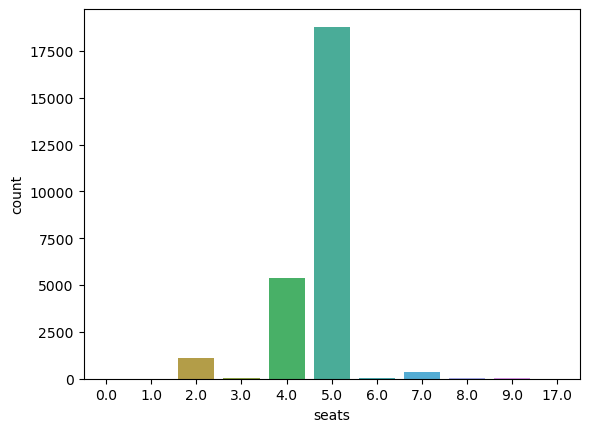

In [1790]:
sns.countplot(data = df, x = 'seats')
plt.show;

In [1791]:
df[df['seats'] == 0.0][['make_model', 'price', 'age']]

make_model    price   age
7560       SEAT Ibiza  18950.0   2.0
13837      SEAT Ibiza  14700.0   4.0
18175      SEAT Ibiza  10900.0   6.0
19378  Renault Twingo   7750.0   7.0
19398      SEAT Ibiza   9900.0   7.0
19835     Hyundai i30   8900.0   8.0
20382     SEAT Toledo   7650.0   8.0
23220     Skoda Fabia   2900.0  13.0
23576     Skoda Fabia   2950.0  14.0

In [1792]:
indices = df[df['seats'] == 0.0][['make_model', 'price', 'age']].index

# Bu indekslerdeki 'capis' değerlerini 5 olarak güncelleyin
df.loc[indices, 'seats'] = 5

In [1793]:
n = [7563, 13840, 18178, 19381, 19401, 20385, 23223, 23579]
df.loc[n]

make_model    price       body_type   type  doors warranty  \
7563       SEAT Ibiza  18980.0           Sedan   Used    4.0      Yes   
13840      SEAT Ibiza  13995.0         Compact   Used    5.0      Yes   
18178      SEAT Ibiza  11500.0   Station wagon   Used    5.0      Yes   
19381  Renault Twingo   9250.0         Compact   Used    5.0      Yes   
19401      SEAT Ibiza  10990.0           Coupe   Used    3.0       No   
20385     Skoda Fabia   6500.0         Compact   Used    5.0      Yes   
23223    Skoda Superb   5980.0           Sedan   Used    4.0      Yes   
23579    Skoda Superb   5500.0           Sedan   Used    5.0       No   

        mileage    gearbox fuel_type colour  ... fuel_consumption_comb  \
7563    29980.0  Automatic   Benzine    Red  ...              4.900000   
13840   92771.0     Manual   Benzine  White  ...              4.500000   
18178   96000.0     Manual   Benzine    Red  ...              4.900000   
19381   20041.0     Manual   Benzine  White  ...              4.200000   
19401      10.0     Manual   Benzine  White  ...              5.790769   
20385  170000.0     Manual   Benzine   Grey  ...              5.500000   
23223  201700.0     Manual   Benzine   Grey  ...              7.600000   
23579  246600.0  Automatic    Diesel    Red  ...              6.350000   

      location_country   age  inspection_status  energy_efficiency_class  \
7563           Germany   2.0                yes                Efficient   
13840            Spain   4.0                 no                Efficient   
18178            Spain   6.0                 no              Inefficient   
19381      Netherlands   7.0                yes              Inefficient   
19401           France   7.0                 no                Efficient   
20385            Spain   8.0                 no                Efficient   
23223          Germany  13.0                 no                Efficient   
23579          Germany  14.0                yes                Efficient   

       safety_security_package comfort_convenience_package  ent_media_package  \
7563                  Advanced                    Enhanced           Enhanced   
13840                 Enhanced                    Enhanced           Enhanced   
18178                 Enhanced                    Enhanced           Enhanced   
19381                 Enhanced                    Enhanced           Advanced   
19401                 Advanced                    Advanced           Advanced   
20385                 Enhanced                       Basic           Advanced   
23223                 Advanced                    Advanced           Advanced   
23579                 Advanced                    Advanced           Advanced   

       num_of_extras index  
7563             3.0   NaN  
13840            3.0   NaN  
18178            2.0   NaN  
19381            2.0   NaN  
19401            2.0   NaN  
20385            2.0   NaN  
23223           11.0   NaN  
23579           12.0   NaN  

[8 rows x 37 columns]

In [1794]:
df[df['make_model'] == 'Skoda Fabia'][['make_model', 'age', 'seats']]

make_model   age  seats
2444   Skoda Fabia   0.0    5.0
2445   Skoda Fabia   0.0    5.0
2446   Skoda Fabia   0.0    5.0
2447   Skoda Fabia   0.0    5.0
2448   Skoda Fabia   0.0    5.0
...            ...   ...    ...
23576  Skoda Fabia  14.0    5.0
23966  Skoda Fabia  15.0    5.0
23967  Skoda Fabia  15.0    5.0
24672  Skoda Fabia  17.0    5.0
25241  Skoda Fabia  20.0    5.0

[242 rows x 3 columns]

In [1795]:
df[df['make_model'] == 'SEAT Ibiza'][['make_model', 'age', 'seats']]

make_model   age  seats
2316   SEAT Ibiza   0.0    5.0
2317   SEAT Ibiza   0.0    5.0
2318   SEAT Ibiza   0.0    5.0
2319   SEAT Ibiza   0.0    5.0
2320   SEAT Ibiza   0.0    5.0
...           ...   ...    ...
25237  SEAT Ibiza  20.0    5.0
25238  SEAT Ibiza  20.0    5.0
25540  SEAT Ibiza  22.0    5.0
25541  SEAT Ibiza  22.0    5.0
25687  SEAT Ibiza  23.0    5.0

[435 rows x 3 columns]

In [1796]:
df[df['make_model'] == 'Renault Twingo'][['make_model', 'age', 'seats']]

make_model   age  seats
2226   Renault Twingo   0.0    5.0
2227   Renault Twingo   0.0    5.0
2228   Renault Twingo   0.0    5.0
4884   Renault Twingo   1.0    5.0
4885   Renault Twingo   1.0    5.0
...               ...   ...    ...
24370  Renault Twingo  16.0    4.0
24661  Renault Twingo  17.0    4.0
25072  Renault Twingo  19.0    4.0
25073  Renault Twingo  19.0    4.0
25865  Renault Twingo  25.0    4.0

[92 rows x 3 columns]

In [1797]:
df[df['seats'] == 1.0][['make_model', 'price', 'age', 'power_kW', 'fuel_type']]

make_model     price   age  power_kW fuel_type
13531       Renault     6500.0   4.0       1.0  Electric
18138  Renault Twizy    7950.0   6.0      59.0  Electric
19386  Renault Twizy    3999.0   7.0       8.0  Electric
22666    Peugeot 308   10750.0  12.0     100.0    Diesel
26339       Fiat 131   24500.0  34.0     109.0   Benzine
26469      Volvo 240  126950.0  40.0     246.0   Benzine

In [1798]:
df.duplicated().sum()

4

In [1799]:
df.drop_duplicates(inplace = True)

In [1800]:
df.duplicated().sum()

0

In [1801]:
df[df['seats'] == 2.0][['make_model', 'price', 'age']].value_counts()

make_model            price    age 
Toyota MR 2           12800.0  19.0    10
Nissan 370Z           30864.0  4.0      7
Nissan 350Z Roadster  15900.0  15.0     6
Nissan 370Z           30818.0  4.0      6
Fiat 124 Spider       21399.0  3.0      6
                                       ..
Nissan 350Z           18100.0  19.0     1
                      18500.0  17.0     1
                               18.0     1
                      18900.0  18.0     1
Dacia Dokker          8900.0   5.0      1
Name: count, Length: 1009, dtype: int64

In [1802]:
df[df['seats'] == 3.0][['make_model', 'price', 'age', 'power_kW', 'fuel_type']]

make_model    price   age  power_kW fuel_type
838      Ford Transit Connect  24350.0   0.0      74.0    Diesel
839      Ford Transit Connect  19290.0   0.0      74.0   Benzine
840      Ford Transit Connect  25950.0   0.0      74.0   Benzine
841      Ford Transit Connect  22580.0   0.0      74.0   Benzine
842      Ford Transit Connect  22950.0   0.0      74.0   Benzine
843      Ford Transit Connect  25950.0   0.0      74.0   Benzine
844      Ford Transit Connect  21650.0   0.0      74.0   Benzine
845      Ford Transit Connect  19290.0   0.0      74.0   Benzine
1684               Opel Corsa  14990.0   0.0      55.0   Benzine
2843   Toyota Land Cruiser V6  60950.0   0.0     167.0   Benzine
3213          Fiat 500 Abarth  28500.0   1.0     132.0   Benzine
4667           Peugeot Expert  27399.0   1.0      88.0    Diesel
7105              Opel Vivaro  23980.0   2.0     110.0    Diesel
7282            Peugeot Boxer  28990.0   2.0     121.0    Diesel
8974      Ford Transit Custom  27650.0   3.0      96.0    Diesel
9879             Opel Cascada  26990.0   3.0     100.0   Benzine
15399           Hyundai H 350  15000.0   5.0     110.0    Diesel
15871            Nissan NV400  19445.0   5.0     125.0    Diesel
19150              Opel Astra  19990.0   7.0     121.0    Diesel
19261          Peugeot Expert  17500.0   7.0      94.0    Diesel
20685             Hyundai i30   7450.0   9.0      73.0   Benzine
22147             Peugeot RCZ  10500.0  11.0     115.0   Benzine
25735              Fiat Coupe  11500.0  24.0     162.0   Benzine
26267               Volvo 480   7500.0  31.0      88.0   Benzine

In [1803]:
df[df['make_model'] == 'Volvo 480'][['make_model', 'age', 'seats']]

make_model   age  seats
26021  Volvo 480  27.0    4.0
26022  Volvo 480  27.0    4.0
26103  Volvo 480  28.0    4.0
26154  Volvo 480  29.0    4.0
26155  Volvo 480  29.0    4.0
26211  Volvo 480  30.0    4.0
26212  Volvo 480  30.0    4.0
26267  Volvo 480  31.0    3.0
26268  Volvo 480  31.0    4.0
26316  Volvo 480  32.0    4.0
26317  Volvo 480  32.0    4.0
26318  Volvo 480  32.0    4.0
26338  Volvo 480  33.0    4.0
26366  Volvo 480  34.0    4.0
26367  Volvo 480  34.0    4.0
26393  Volvo 480  35.0    4.0

In [1804]:
df.seats.replace([25202,25203], method='bfill', inplace = True)

In [1805]:
df[df['make_model'] == 'Volvo 480'][['make_model', 'age', 'seats']]

make_model   age  seats
26021  Volvo 480  27.0    4.0
26022  Volvo 480  27.0    4.0
26103  Volvo 480  28.0    4.0
26154  Volvo 480  29.0    4.0
26155  Volvo 480  29.0    4.0
26211  Volvo 480  30.0    4.0
26212  Volvo 480  30.0    4.0
26267  Volvo 480  31.0    3.0
26268  Volvo 480  31.0    4.0
26316  Volvo 480  32.0    4.0
26317  Volvo 480  32.0    4.0
26318  Volvo 480  32.0    4.0
26338  Volvo 480  33.0    4.0
26366  Volvo 480  34.0    4.0
26367  Volvo 480  34.0    4.0
26393  Volvo 480  35.0    4.0

In [1806]:
df[df['seats'] == 17.0][['make_model', 'price', 'age', 'power_kW', 'fuel_type']]

make_model    price  age  power_kW fuel_type
1804  Opel Movano  59990.0  0.0     120.0    Diesel
1805  Opel Movano  59990.0  0.0     120.0    Diesel

In [1807]:
df[df['seats'] == 17.0]


make_model    price       body_type   type  doors warranty  mileage  \
1804  Opel Movano  59990.0   Station wagon   Used    5.0       No    290.0   
1805  Opel Movano  59990.0   Station wagon   Used    5.0       No    300.0   

     gearbox fuel_type colour  ... fuel_consumption_comb location_country  \
1804  Manual    Diesel   Blue  ...              4.832077          Germany   
1805  Manual    Diesel   Blue  ...              4.832077          Germany   

      age  inspection_status  energy_efficiency_class  \
1804  0.0                 no                Efficient   
1805  0.0                 no                Efficient   

      safety_security_package comfort_convenience_package  ent_media_package  \
1804                 Advanced                    Advanced           Advanced   
1805                 Advanced                    Advanced           Advanced   

      num_of_extras index  
1804            5.0   NaN  
1805            5.0   NaN  

[2 rows x 37 columns]

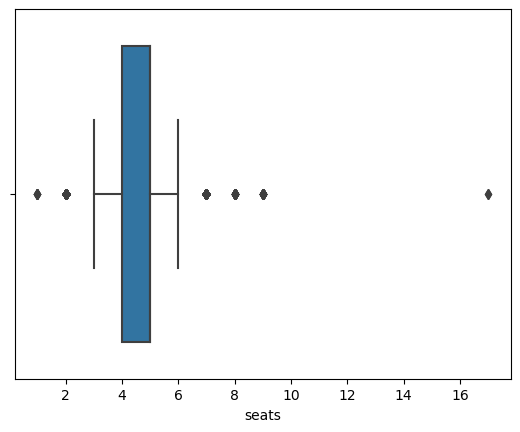

In [1808]:
sns.boxplot(data=df, x = 'seats');

# GEARS

In [1810]:
df.gears.value_counts()

gears
6.0     11843
5.0      6997
7.0      2320
8.0      1813
1.0      1191
9.0      1116
4.0       306
10.0      111
3.0        42
2.0         3
Name: count, dtype: int64

In [1811]:
df[df['gears'] == 2].T

21825         26638           26826
make_model                       Fiat 500  Ford Mercury    Ford Mercury
price                             10950.0       38990.0         26750.0
body_type                         Compact         Coupe           Coupe
type                                 Used          Used            Used
doors                                 3.0           2.0             3.0
warranty                               No            No              No
mileage                           13500.0       93522.0        124000.0
gearbox                            Manual     Automatic       Automatic
fuel_type                        Electric       Benzine         Benzine
colour                              White         White           White
paint                        non_metallic  non_metallic    non_metallic
seller                             Dealer        Dealer  Private seller
seats                                 4.0           4.0             6.0
engine_size                        1242.0        5689.0          6000.0
gears                                 2.0           2.0             2.0
co2_emissions                         0.0         148.0           148.0
drivetrain                          Front          Rear            Rear
cylinders                             3.0           8.0             8.0
empty_weight                        983.0        1850.0          1850.0
service_history                       Yes            No              No
non_smoker                             No            No              No
emission_sticker                    Green         Green           Green
upholstery_color                    Black         Other           Black
upholstery                   Full leather         Cloth           Cloth
available                             yes           yes             yes
taxi_rental                            No            No              No
power_kW                             17.0         187.0           218.0
fuel_consumption_comb               4.068      6.698559        6.698559
location_country                  Germany       Germany         Germany
age                                  11.0          52.0            65.0
inspection_status                     yes           yes             yes
energy_efficiency_class         Efficient     Efficient       Efficient
safety_security_package             Basic      Enhanced           Basic
comfort_convenience_package         Basic      Advanced        Advanced
ent_media_package                Advanced      Enhanced        Advanced
num_of_extras                         2.0           2.0             2.0
index                                 NaN           NaN             NaN

In [1812]:
df[df['gears'] == 10].T

589                607    \
make_model                       Ford Bronco      Ford Explorer   
price                                89000.0            54500.0   
body_type                            Compact   Off-Road/Pick-up   
type                          Pre-registered               Used   
doors                                    5.0                5.0   
warranty                                  No                 No   
mileage                                  2.0             4200.0   
gearbox                            Automatic          Automatic   
fuel_type                            Benzine            Benzine   
colour                                Orange               Blue   
paint                               Metallic           Metallic   
seller                                Dealer             Dealer   
seats                                    5.0                7.0   
engine_size                           2300.0             3300.0   
gears                                   10.0               10.0   
co2_emissions                          203.0              200.0   
drivetrain                               4WD                4WD   
cylinders                                4.0                6.0   
empty_weight                          2173.0             2466.0   
service_history                           No                Yes   
non_smoker                                No                 No   
emission_sticker                       Green              Green   
upholstery_color                       Black              Black   
upholstery                             Cloth       Full leather   
available                                yes                yes   
taxi_rental                               No                 No   
power_kW                               199.0              234.0   
fuel_consumption_comb                   10.6               10.5   
location_country                       Italy            Germany   
age                                      0.0                0.0   
inspection_status                         no                 no   
energy_efficiency_class          Inefficient        Inefficient   
safety_security_package             Advanced           Advanced   
comfort_convenience_package         Advanced           Advanced   
ent_media_package                   Advanced           Advanced   
num_of_extras                            5.0                5.0   
index                                    NaN                NaN   

                                         608                609    \
make_model                          Ford F 150      Ford F 150 V6   
price                                  79990.0            84950.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                                      Used               Used   
doors                                      4.0                4.0   
warranty                                    No                 No   
mileage                                 3500.0              200.0   
gearbox                              Automatic          Automatic   
fuel_type                              Benzine            Benzine   
colour                                  Silver               Grey   
paint                                 Metallic           Metallic   
seller                                  Dealer             Dealer   
seats                                      5.0                5.0   
engine_size                             3490.0             3496.0   
gears                                     10.0               10.0   
co2_emissions                            340.0              282.0   
drivetrain                                 4WD                4WD   
cylinders                                  6.0                6.0   
empty_weight                            2530.0             1570.0   
service_history                             No                Yes   
non_smoker                                 

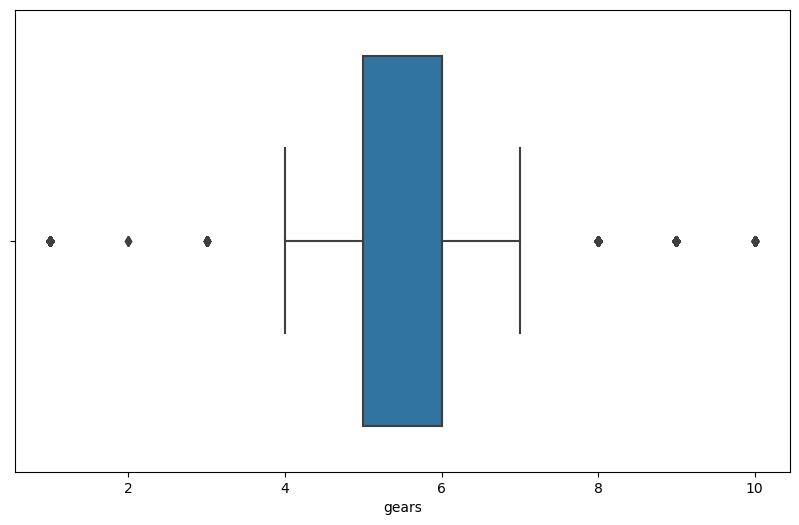

In [1813]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gears'])
plt.xlabel('gears')
plt.show()

In [1814]:
df.gears.min()

1.0

In [1815]:
df[df['gears'] == 1].T

2               157              194    \
make_model                           Dacia    Dacia Sandero    Dacia Sandero   
price                               21799.0         17080.0          18990.0   
body_type                     Station wagon         Compact          Compact   
type                          Demonstration   Demonstration   Pre-registered   
doors                                   5.0             5.0              5.0   
warranty                                 No              No              Yes   
mileage                              2000.0          1990.0             20.0   
gearbox                              Manual       Automatic        Automatic   
fuel_type                           Benzine         Benzine          Benzine   
colour                                 Grey           Black             Grey   
paint                              Metallic        Metallic         Metallic   
seller                               Dealer          Dealer           Dealer   
seats                                   7.0             5.0              5.0   
engine_size                           999.0           999.0            999.0   
gears                                   1.0             1.0              1.0   
co2_emissions                         130.0           119.0            117.0   
drivetrain                            Front           Front            Front   
cylinders                               4.0             3.0              3.0   
empty_weight                          990.0          1127.0           1157.0   
service_history                          No             Yes               No   
non_smoker                              Yes             Yes               No   
emission_sticker                      Green           Green            Green   
upholstery_color                      Black           Black            Black   
upholstery                            Cloth    Part leather            Cloth   
available                                no              no               no   
taxi_rental                              No              No               No   
power_kW                               81.0            67.0             67.0   
fuel_consumption_comb                   5.6             5.2              5.1   
location_country                    Germany         Germany          Germany   
age                                     0.0             0.0              0.0   
inspection_status                        no              no               no   
energy_efficiency_class         Inefficient     Inefficient      Inefficient   
safety_security_package            Enhanced        Advanced         Advanced   
comfort_convenience_package        Advanced        Advanced         Advanced   
ent_media_package                  Advanced        Advanced         Advanced   
num_of_extras                           5.0             5.0              5.0   
index                                   NaN             NaN              NaN   

                                       275                280    \
make_model                     Dacia Sandero       Dacia Spring   
price                                19990.0            18490.0   
body_type                              Sedan   Off-Road/Pick-up   
type                          Pre-registered               Used   
doors                                    5.0                5.0   
warranty                                  No                 No   
mileage                                 10.0             5800.0   
gearbox                            Automatic          Automatic   
fuel_type                            Benzine           Electric   
colour                                Orange             Silver   
paint                               Metallic           Metallic   
seller                                Dealer             Dealer   
seats                                    5.0                4.0   
engine_size                            999.0             10

In [1816]:
df[df['gears'] == 1]['gears']

2        1.0
157      1.0
194      1.0
275      1.0
280      1.0
        ... 
26415    1.0
26440    1.0
26469    1.0
26511    1.0
26791    1.0
Name: gears, Length: 1191, dtype: float64

In [1817]:
from scipy import stats

In [1818]:
# Step 1: Calculate Z-scores for the relevant columns
df['z_score_gears'] =  stats.zscore(df['gears'])

# Step 2: Filter out rows where the z-score is greater than 3 or less than -3
df_no_outliers = df[(df['z_score_gears'].abs() <= 3)]


# Step 3: Drop the z-score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['z_score_gears'])

# Print the resulting DataFrame
df_no_outliers.sort_values(by='gears')

make_model     price     body_type   type  doors warranty  \
26638      Ford Mercury   38990.0         Coupe   Used    2.0       No   
26826      Ford Mercury   26750.0         Coupe   Used    3.0       No   
21825          Fiat 500   10950.0       Compact   Used    3.0       No   
26701      Ford Mustang   33500.0   Convertible   Used    3.0       No   
26827  Ford Thunderbird   28900.0   Convertible   Used    3.0       No   
...                 ...       ...           ...    ...    ...      ...   
6352    Ford Mustang V8   55000.0   Convertible   Used    3.0       No   
6351    Ford Mustang V8   51980.0   Convertible   Used    2.0      Yes   
3629    Ford Mustang V8  208101.0         Coupe   Used    2.0       No   
6350    Ford Mustang V8   51980.0   Convertible   Used    2.0      Yes   
12308   Ford Mustang V8   48500.0         Coupe   Used    2.0       No   

        mileage    gearbox fuel_type colour  ... fuel_consumption_comb  \
26638   93522.0  Automatic   Benzine  White  ...              6.698559   
26826  124000.0  Automatic   Benzine  White  ...              6.698559   
21825   13500.0     Manual  Electric  White  ...              4.068000   
26701  166221.0  Automatic   Benzine    Red  ...             10.830000   
26827   30000.0  Automatic   Benzine    Red  ...              9.400000   
...         ...        ...       ...    ...  ...                   ...   
6352    11300.0  Automatic   Benzine  Green  ...             12.500000   
6351    19750.0  Automatic   Benzine  White  ...             12.500000   
3629     1392.0  Automatic   Benzine  Black  ...             12.179012   
6350    19750.0  Automatic   Benzine   Blue  ...             12.500000   
12308   46400.0  Automatic   Benzine   Blue  ...             12.100000   

      location_country   age  inspection_status  energy_efficiency_class  \
26638          Germany  52.0                yes                Efficient   
26826          Germany  65.0                yes                Efficient   
21825          Germany  11.0                yes                Efficient   
26701           France  55.0                 no              Inefficient   
26827          Germany  65.0                 no                Efficient   
...                ...   ...                ...                      ...   
6352           Germany   2.0                yes              Inefficient   
6351           Germany   2.0                 no              Inefficient   
3629           Austria   1.0                yes              Inefficient   
6350           Germany   2.0                 no              Inefficient   
12308           France   4.0                 no              Inefficient   

       safety_security_package comfort_convenience_package  ent_media_package  \
26638                 Enhanced                    Advanced           Enhanced   
26826                    Basic                    Advanced           Advanced   
21825                    Basic                       Basic           Advanced   
26701                    Basic                       Basic           Advanced   
26827                    Basic                    Enhanced           Advanced   
...                        ...                         ...                ...   
6352                  Advanced                    Advanced           Advanced   
6351                  Advanced                    Advanced           Advanced   
3629                  Advanced                    Advanced           Advanced   
6350                  Advanced                    Advanced           Advanced   
12308                 Advanced                    Advanced           Advanced   

       num_of_extras index  
26638            2.0   NaN  
26826            2.0   NaN  
21825            2.0   NaN  
26701            3.0   NaN  
26827            4.0   NaN  
...              ...   ...  
6352             5.0   NaN  
6351            14.0   NaN  
3629             7.0   NaN  
6350            14.0   NaN  
12308            5.0   NaN  



In [1819]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25742 entries, 2 to 26855
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   25742 non-null  object 
 1   price                        25742 non-null  float64
 2   body_type                    25742 non-null  object 
 3   type                         25742 non-null  object 
 4   doors                        25742 non-null  float64
 5   warranty                     25742 non-null  object 
 6   mileage                      25742 non-null  float64
 7   gearbox                      25742 non-null  object 
 8   fuel_type                    25742 non-null  object 
 9   colour                       25742 non-null  object 
 10  paint                        25742 non-null  object 
 11  seller                       25742 non-null  object 
 12  seats                        25742 non-null  float64
 13  engine_size          

In [1820]:
df[df['gears'] == 1].groupby('gears')['fuel_type'].value_counts()

gears  fuel_type
1.0    Electric     952
       Benzine      195
       Diesel        43
       LPG            1
Name: count, dtype: int64

In [1821]:
df[(df['gears'] == 1) & (df['fuel_type'] == 'Electric')]

make_model    price          body_type             type  doors  \
280    Dacia Spring  18490.0   Off-Road/Pick-up             Used    5.0   
281    Dacia Spring  22980.0   Off-Road/Pick-up    Demonstration    5.0   
282    Dacia Spring  21599.0              Sedan   Employee's car    5.0   
283    Dacia Spring  21599.0              Sedan   Employee's car    5.0   
284    Dacia Spring  21599.0              Sedan   Employee's car    5.0   
...             ...      ...                ...              ...    ...   
22851  Toyota Prius  10490.0            Compact             Used    5.0   
22853  Toyota Prius  13500.0              Sedan             Used    4.0   
23233  Toyota Prius  11400.0            Compact             Used    5.0   
23234  Toyota Prius  11950.0            Compact             Used    5.0   
23235  Toyota Prius  14690.0              Sedan             Used    5.0   

      warranty   mileage    gearbox fuel_type  colour  ... location_country  \
280         No    5800.0  Automatic  Electric  Silver  ...          Austria   
281         No    5000.0  Automatic  Electric   White  ...          Germany   
282         No     500.0  Automatic  Electric     Red  ...          Germany   
283         No     500.0  Automatic  Electric    Blue  ...          Germany   
284         No     500.0  Automatic  Electric    Blue  ...          Germany   
...        ...       ...        ...       ...     ...  ...              ...   
22851      Yes  102570.0  Automatic  Electric   Black  ...            Spain   
22853      Yes   90677.0  Automatic  Electric    Grey  ...          Germany   
23233       No  124987.0  Automatic  Electric  Silver  ...      Netherlands   
23234       No   87775.0  Automatic  Electric   Black  ...      Netherlands   
23235      Yes   81700.0  Automatic  Electric   Black  ...          Germany   

        age  inspection_status  energy_efficiency_class  \
280     0.0                 no                Efficient   
281     0.0                 no                Efficient   
282     0.0                 no                Efficient   
283     0.0                 no                Efficient   
284     0.0                 no                Efficient   
...     ...                ...                      ...   
22851  12.0                 no                Efficient   
22853  12.0                yes                Efficient   
23233  13.0                 no                Efficient   
23234  13.0                 no                Efficient   
23235  13.0                yes                Efficient   

       safety_security_package  comfort_convenience_package ent_media_package  \
280                   Advanced                     Advanced          Advanced   
281                   Enhanced                     Enhanced          Advanced   
282                   Advanced                     Enhanced          Advanced   
283                   Advanced                     Enhanced          Advanced   
284                   Advanced                     Enhanced          Advanced   
...                        ...                          ...               ...   
22851                 Advanced                     Advanced          Advanced   
22853                 Enhanced                     Advanced          Advanced   
23233                 Enhanced                     Advanced          Advanced   
23234                 Advanced                     Advanced          Enhanced   
23235                 Advanced                     Advanced          Advanced   

       num_of_extras  index z_score_gears  
280              5.0    NaN     -3.195446  
281              5.0    NaN     -3.195446  
282              5.0    NaN     -3.195446  
283              5.0    NaN     -3.195446  
284              5.0    NaN     -3.195446  
...              ...    ...           ...  
22851            2.0    NaN     -3.195446  
22853            4.0    NaN     -3.195446  
23233            2.0    NaN     -3.195446  
23234            2.0    NaN     -3.19

In [1822]:
df[(df['gears'] == 1) & (df['fuel_type'] == 'Benzine')]

make_model     price       body_type             type  doors  \
2              Dacia    21799.0   Station wagon    Demonstration    5.0   
157     Dacia Sandero   17080.0         Compact    Demonstration    5.0   
194     Dacia Sandero   18990.0         Compact   Pre-registered    5.0   
275     Dacia Sandero   19990.0           Sedan   Pre-registered    5.0   
1458     Nissan Micra   19690.0         Compact   Pre-registered    5.0   
...               ...       ...             ...              ...    ...   
26415       Volvo 240    9850.0           Sedan             Used    4.0   
26440     Opel Ascona    4750.0           Coupe             Used    3.0   
26469       Volvo 240  126950.0           Coupe             Used    2.0   
26511  Toyota Corolla   12900.0           Coupe             Used    2.0   
26791    Ford Mustang   45000.0     Convertible             Used    2.0   

      warranty   mileage    gearbox fuel_type  colour  ... location_country  \
2           No    2000.0     Manual   Benzine    Grey  ...          Germany   
157         No    1990.0  Automatic   Benzine   Black  ...          Germany   
194        Yes      20.0  Automatic   Benzine    Grey  ...          Germany   
275         No      10.0  Automatic   Benzine  Orange  ...          Germany   
1458        No      15.0  Automatic   Benzine  Silver  ...          Germany   
...        ...       ...        ...       ...     ...  ...              ...   
26415       No  116569.0  Automatic   Benzine     Red  ...          Germany   
26440       No   28900.0  Automatic   Benzine    Grey  ...          Germany   
26469       No       1.0     Manual   Benzine   White  ...          Belgium   
26511       No   73000.0     Manual   Benzine   Green  ...          Germany   
26791       No  100000.0  Automatic   Benzine   Black  ...          Belgium   

        age  inspection_status  energy_efficiency_class  \
2       0.0                 no              Inefficient   
157     0.0                 no              Inefficient   
194     0.0                 no              Inefficient   
275     0.0                 no              Inefficient   
1458    0.0                yes              Inefficient   
...     ...                ...                      ...   
26415  36.0                 no                Efficient   
26440  38.0                 no                Efficient   
26469  40.0                 no                Efficient   
26511  44.0                 no                Efficient   
26791  58.0                 no              Inefficient   

       safety_security_package  comfort_convenience_package ent_media_package  \
2                     Enhanced                     Advanced          Advanced   
157                   Advanced                     Advanced          Advanced   
194                   Advanced                     Advanced          Advanced   
275                   Advanced                     Advanced          Advanced   
1458                  Advanced                     Advanced          Advanced   
...                        ...                          ...               ...   
26415                    Basic                        Basic          Advanced   
26440                 Enhanced                     Enhanced          Advanced   
26469                 Enhanced                     Enhanced          Advanced   
26511                 Enhanced                     Advanced          Advanced   
26791                    Basic                        Basic          Advanced   

       num_of_extras  index z_score_gears  
2                5.0    NaN     -3.195446  
157              5.0    NaN     -3.195446  
194              5.0    NaN     -3.195446  
275              5.0    NaN     -3.195446  
1458             5.0    NaN     -3.195446  
...              ...    ...           ...  
26415            4.0    NaN     -3.195446  
26440            3.0    NaN     -3.195446  
26469            6.0    NaN     -3.195446  
26511            2.0    NaN     -3.1954

In [1823]:
df[(df['make_model'] == 'Dacia Sandero') & (df['fuel_type'] == 'Benzine')]

make_model    price body_type            type  doors warranty  \
154    Dacia Sandero  14780.0   Compact   Demonstration    5.0       No   
157    Dacia Sandero  17080.0   Compact   Demonstration    5.0       No   
158    Dacia Sandero  14100.0   Compact            Used    5.0      Yes   
159    Dacia Sandero  19140.0   Compact   Demonstration    5.0       No   
160    Dacia Sandero  15080.0   Compact   Demonstration    5.0       No   
...              ...      ...       ...             ...    ...      ...   
22441  Dacia Sandero   2999.0     Sedan            Used    4.0      Yes   
22443  Dacia Sandero   5150.0     Sedan            Used    5.0       No   
22926  Dacia Sandero   2945.0   Compact            Used    5.0       No   
22927  Dacia Sandero   2400.0   Compact            Used    5.0       No   
23304  Dacia Sandero   2900.0     Sedan            Used    4.0       No   

        mileage    gearbox fuel_type  colour  ... location_country   age  \
154      1879.0     Manual   Benzine  Orange  ...          Germany   0.0   
157      1990.0  Automatic   Benzine   Black  ...          Germany   0.0   
158       308.0     Manual   Benzine   White  ...          Belgium   0.0   
159      1999.0  Automatic   Benzine     Red  ...          Germany   0.0   
160      2212.0     Manual   Benzine    Grey  ...          Germany   0.0   
...         ...        ...       ...     ...  ...              ...   ...   
22441  166000.0     Manual   Benzine    Blue  ...          Germany  12.0   
22443   89123.0     Manual   Benzine     Red  ...          Germany  12.0   
22926   96458.0     Manual   Benzine     Red  ...      Netherlands  13.0   
22927  147217.0     Manual   Benzine    Blue  ...      Netherlands  13.0   
23304  103500.0     Manual   Benzine   Beige  ...          Germany  14.0   

       inspection_status  energy_efficiency_class  safety_security_package  \
154                   no              Inefficient                 Advanced   
157                   no              Inefficient                 Advanced   
158                   no              Inefficient                 Advanced   
159                   no              Inefficient                 Advanced   
160                   no                Efficient                 Advanced   
...                  ...                      ...                      ...   
22441                yes              Inefficient                 Enhanced   
22443                 no              Inefficient                 Advanced   
22926                 no              Inefficient                 Advanced   
22927                 no              Inefficient                    Basic   
23304                yes              Inefficient                 Enhanced   

       comfort_convenience_package ent_media_package  num_of_extras  index  \
154                       Advanced             Basic            5.0    NaN   
157                       Advanced          Advanced            5.0    NaN   
158                       Enhanced          Advanced            5.0    NaN   
159                       Advanced          Advanced            5.0    NaN   
160                       Advanced          Advanced            5.0    NaN   
...                            ...               ...            ...    ...   
22441                        Basic          Advanced            2.0    NaN   
22443                        Basic             Basic            3.0    NaN   
22926                        Basic          Advanced            2.0    NaN   
22927                     Advanced          Advanced            2.0    NaN   
23304                        Basic          Advanced            2.0    NaN   

      z_score_gears  
154        0.101540  
157       -3.195446  
158       -0.557857  
159        0.101540  
160       -0.557857  
...             ...  
22441     -0.557857  
22443     -0.557857  
22926     -0.557857  
22927     -0.557857  
23304     -0.557857  

[463 rows x 38 columns]

In [1824]:
df['gears'].describe()

count    25742.000000
mean         5.846010
std          1.516566
min          1.000000
25%          5.000000
50%          6.000000
75%          6.000000
max         10.000000
Name: gears, dtype: float64

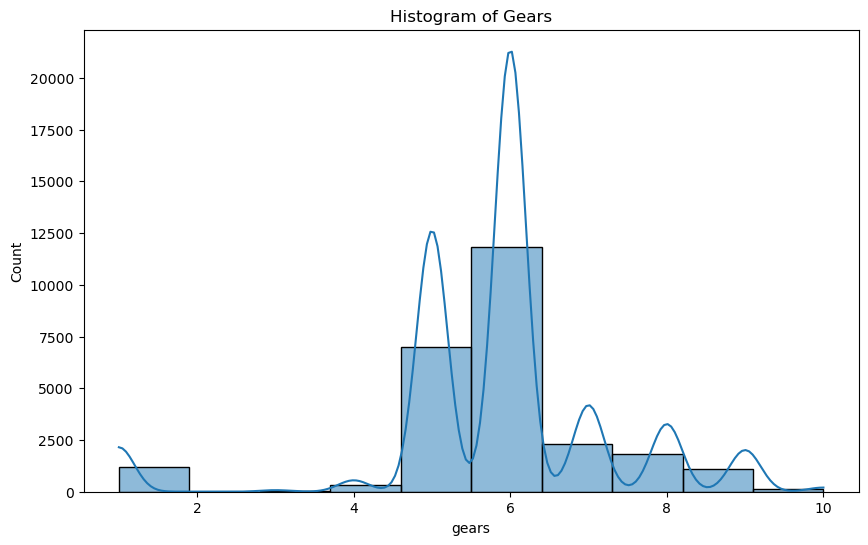

In [1825]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gears'], bins=10, kde=True)
plt.title('Histogram of Gears')
plt.show()

In [1826]:
# IQR hesaplama
Q1 = df['gears'].quantile(0.25)
Q3 = df['gears'].quantile(0.75)
IQR = Q3 - Q1

# Alt ve üst sınırların belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Outlier'ların tespiti
outliers = df[(df['gears'] < lower_bound) | (df['gears'] > upper_bound)]
print("Outliers:\n", outliers)

# Outlier'ları içermeyen veri çerçevesi
df_no_outliers = df[(df['gears'] >= lower_bound) & (df['gears'] <= upper_bound)]
df_no_outliers

Outliers:
            make_model    price          body_type             type  doors  \
2              Dacia   21799.0      Station wagon    Demonstration    5.0   
157     Dacia Sandero  17080.0            Compact    Demonstration    5.0   
194     Dacia Sandero  18990.0            Compact   Pre-registered    5.0   
275     Dacia Sandero  19990.0              Sedan   Pre-registered    5.0   
280      Dacia Spring  18490.0   Off-Road/Pick-up             Used    5.0   
...               ...      ...                ...              ...    ...   
26848        Ford  V8  54990.0        Convertible             Used    2.0   
26849        Ford  V8  49900.0        Convertible             Used    2.0   
26850  Ford  Roadster  40000.0        Convertible             Used    2.0   
26851        Peugeot    8950.0              Coupe             Used    2.0   
26854     Ford Bronco  57480.0   Off-Road/Pick-up             Used    5.0   

      warranty  mileage    gearbox fuel_type  colour  ... locati

make_model     price          body_type             type  doors  \
3        Dacia Break   20500.0      Station wagon    Demonstration    4.0   
4       Dacia Dokker   16900.0      Station wagon             Used    6.0   
5       Dacia Duster   21000.0   Off-Road/Pick-up   Pre-registered    5.0   
6       Dacia Duster   21000.0   Off-Road/Pick-up   Pre-registered    5.0   
7       Dacia Duster   21150.0   Off-Road/Pick-up    Demonstration    5.0   
...              ...       ...                ...              ...    ...   
26845          Ford    54000.0        Convertible             Used    4.0   
26846          Fiat   159000.0        Convertible             Used    4.0   
26852         Ford M   20000.0        Convertible             Used    4.0   
26853          Ford    14490.0        Convertible             Used    2.0   
26855  Hyundai IONIQ   26991.0              Sedan             Used    5.0   

      warranty   mileage    gearbox fuel_type  colour  ... location_country  \
3          Yes     999.0     Manual   Benzine   Brown  ...          Belgium   
4          Yes      90.0     Manual       LPG   White  ...          Belgium   
5          Yes    1000.0     Manual    Diesel  Orange  ...            Spain   
6          Yes    1000.0     Manual    Diesel  Orange  ...            Spain   
7          Yes    4500.0     Manual   Benzine   Black  ...          Germany   
...        ...       ...        ...       ...     ...  ...              ...   
26845       No   28000.0  Automatic   Benzine   Beige  ...          Austria   
26846       No  999999.0     Manual   Benzine   Brown  ...          Germany   
26852       No   65515.0     Manual   Benzine   Green  ...          Belgium   
26853       No    5000.0  Automatic   Benzine     Red  ...          Belgium   
26855       No   29961.0  Automatic  Electric    Grey  ...          Germany   

         age  inspection_status  energy_efficiency_class  \
3        0.0                 no                Efficient   
4        0.0                 no              Inefficient   
5        0.0                 no              Inefficient   
6        0.0                 no              Inefficient   
7        0.0                 no              Inefficient   
...      ...                ...                      ...   
26845   85.0                yes                Efficient   
26846   89.0                 no                Efficient   
26852   93.0                 no                Efficient   
26853   94.0                 no                Efficient   
26855  122.0                 no                Efficient   

       safety_security_package  comfort_convenience_package ent_media_package  \
3                     Advanced                     Advanced          Enhanced   
4                        Basic                        Basic          Advanced   
5                     Advanced                     Advanced          Advanced   
6                     Advanced                     Advanced          Advanced   
7                     Advanced                     Advanced          Advanced   
...                        ...                          ...               ...   
26845                 Advanced                     Advanced          Advanced   
26846                 Advanced                     Advanced          Advanced   
26852                 Enhanced                        Basic          Enhanced   
26853                 Advanced                     Advanced          Advanced   
26855                 Advanced                     Advanced          Advanced   

       num_of_extras  index z_score_gears  
3                5.0    NaN      0.101540  
4                5.0    NaN     -0.557857  
5                5.0    NaN      0.101540  
6                5.0    NaN      0.101540  
7                5.0    NaN      0.101540  
...              ...    ...           ...  
26845            5.0    NaN     -1.217254  
26846            3.0    NaN     -1.217254  
26852            3.0    NaN      0.101540  
26

In [1827]:
outliers = df[(df['z_score_gears'] > 3) | (df['z_score_gears'] < -3 )]

outlier_counts = outliers['gears'].value_counts()

outlier_counts

gears
1.0    1191
Name: count, dtype: int64

In [1828]:
df.groupby(['make_model', 'gearbox'])['gears'].value_counts()

make_model    gearbox         gears
Dacia         Manual          1.0       1
                              4.0       1
Dacia Break   Manual          6.0       1
Dacia Dokker  Manual          5.0      50
                              6.0       2
                                       ..
Volvo XC90    Automatic       8.0      99
                              6.0       5
              Manual          8.0       1
                              6.0       1
              Semi-automatic  8.0       1
Name: count, Length: 1604, dtype: int64

In [1829]:
drop_gears_benzine = df[(df['gears'] == 1) & (df['fuel_type'] == 'Benzine')].index
drop_gears_benzine

Index([    2,   157,   194,   275,  1458,  1526,  1527,  2668,  2670,  2689,
       ...
       26307, 26341, 26342, 26371, 26387, 26415, 26440, 26469, 26511, 26791],
      dtype='int64', length=195)

In [1830]:

drop_gears_diesel = df[(df['gears'] == 1) & (df['fuel_type'] == 'Diesel')].index
drop_gears_diesel

Index([ 2776,  2871,  2872,  2873,  4318,  5420,  6558,  7365,  9888, 10538,
       12565, 13018, 13066, 13180, 13647, 13724, 15987, 16802, 16824, 17760,
       17792, 18337, 18340, 18383, 18388, 18392, 18393, 18985, 19056, 19518,
       19520, 19570, 20009, 20044, 20424, 20425, 20426, 20445, 21356, 21715,
       22357, 22854, 25114],
      dtype='int64')

In [1831]:
df[(df['gears'] == 1) & (df['fuel_type'] == 'Diesel')]

make_model    price          body_type   type  doors  \
2776             Toyota C-HR  32490.0              Sedan   Used    5.0   
2871            Toyota RAV 4  41999.0      Station wagon   Used    5.0   
2872            Toyota RAV 4  53500.0      Station wagon   Used    5.0   
2873            Toyota RAV 4  52450.0      Station wagon   Used    5.0   
4318              Opel Combo  23481.0      Station wagon   Used    5.0   
5420          Toyota Corolla  26499.0      Station wagon   Used    5.0   
6558     Mercedes-Benz A 180  26390.0            Compact   Used    5.0   
7365          Renault Megane  17490.0            Compact   Used    5.0   
9888              Opel Combo  18300.0      Station wagon   Used    5.0   
10538            Renault ZOE  15200.0      Station wagon   Used    5.0   
12565    Mercedes-Benz A 200  23900.0            Compact   Used    5.0   
13018         Nissan Qashqai  29980.0   Off-Road/Pick-up   Used    5.0   
13066         Nissan X-Trail  21900.0   Off-Road/Pick-up   Used    5.0   
13180             Opel Combo  21117.0      Station wagon   Used    5.0   
13647         Renault Koleos  21900.0   Off-Road/Pick-up   Used    5.0   
13724  Renault Megane E-Tech  14990.0      Station wagon   Used    5.0   
15987         Nissan X-Trail  22440.0   Off-Road/Pick-up   Used    5.0   
16802           Toyota Auris  14900.0            Compact   Used    5.0   
16824           Toyota Auris  14250.0      Station wagon   Used    5.0   
17760         Nissan Qashqai  18988.0   Off-Road/Pick-up   Used    5.0   
17792         Nissan X-Trail  19490.0   Off-Road/Pick-up   Used    5.0   
18337           Toyota Auris   9890.0      Station wagon   Used    5.0   
18340           Toyota Auris   9890.0      Station wagon   Used    5.0   
18383           Toyota RAV 4  19900.0   Off-Road/Pick-up   Used    5.0   
18388           Toyota RAV 4  18990.0   Off-Road/Pick-up   Used    5.0   
18392           Toyota RAV 4  18480.0   Off-Road/Pick-up   Used    5.0   
18393           Toyota RAV 4  14990.0      Station wagon   Used    5.0   
18985            Nissan Juke  18580.0      Station wagon   Used    5.0   
19056         Nissan Qashqai  15990.0   Off-Road/Pick-up   Used    5.0   
19518           Toyota Auris  12490.0      Station wagon   Used    5.0   
19520           Toyota Auris  12490.0      Station wagon   Used    5.0   
19570           Toyota RAV 4  17000.0              Sedan   Used    5.0   
20009            Nissan Juke  18980.0      Station wagon   Used    5.0   
20044         Nissan Qashqai  14990.0   Off-Road/Pick-up   Used    5.0   
20424           Toyota Auris   8890.0      Station wagon   Used    5.0   
20425           Toyota Auris   8890.0      Station wagon   Used    5.0   
20426           Toyota Auris   8890.0      Station wagon   Used    5.0   
20445           Toyota Auris  11499.0              Sedan   Used    5.0   
21356    Mercedes-Benz A 180   8950.0            Compact   Used    5.0   
21715           Toyota Auris   9500.0      Station wagon   Used    5.0   
22357           Toyota RAV 4  11999.0   Off-Road/Pick-up   Used    4.0   
22854           Toyota RAV 4   8800.0   Off-Road/Pick-up   Used    5.0   
25114           Toyota RAV 4   4999.0   Off-Road/Pick-up   Used    5.0   

      warranty   mileage    gearbox fuel_type  colour  ... location_country  \
2776       Yes    4999.0  Automatic    Diesel    Grey  ...           France   
2871       Yes    8500.0  Automatic    Diesel   White  ...           France   
2872       Yes   10100.0  Automatic    Diesel   White  ...           France   
2873       Yes    8000.0  Automatic    Diesel  Silver  ...           France   
4318       Yes   32798.0     Manual    Diesel    Blue  ...            Spain   
5420       Yes   37391.0  Automatic    Diesel    Blue  ...           France   
6558       Yes   94467.0  Automatic    Diesel    Grey  ...            Spain   
7365        No   19977.0     Manual    Diesel    Grey  ...           France   
9888       Yes   99738.0     Manual    Diesel    G

In [1832]:
df[(df['gears'] == 1) & (df['fuel_type'] == 'LPG')]

make_model   price       body_type   type  doors warranty   mileage  \
26153  Volvo 240  7950.0   Station wagon   Used    5.0       No  231225.0   

      gearbox fuel_type colour  ... location_country   age  inspection_status  \
26153  Manual       LPG  Green  ...      Netherlands  29.0                yes   

       energy_efficiency_class  safety_security_package  \
26153                Efficient                    Basic   

       comfort_convenience_package ent_media_package  num_of_extras  index  \
26153                     Advanced          Advanced            2.0    NaN   

      z_score_gears  
26153     -3.195446  

[1 rows x 38 columns]

In [1833]:
drop_gears_lpg = df[(df['gears'] == 1) & (df['fuel_type'] == 'LPG')].index
drop_gears_lpg

Index([26153], dtype='int64')

In [1834]:
drop_gears_lpg = df[(df['gears'] == 1) & (df['fuel_type'] == 'LPG')].index
df = df.drop(drop_gears_lpg)

In [1835]:
drop_gears_diesel = df[(df['gears'] == 1) & (df['fuel_type'] == 'Diesel')].index
df = df.drop(drop_gears_diesel)

In [1836]:
drop_gears_benzine = df[(df['gears'] == 1) & (df['fuel_type'] == 'Benzine')].index
df = df.drop(drop_gears_benzine)

# CO2 EMISSION

In [1838]:
df.co2_emissions.describe()

count    25503.000000
mean       133.180724
std        128.013710
min          0.000000
25%        106.000000
50%        125.000000
75%        157.000000
max      15168.000000
Name: co2_emissions, dtype: float64

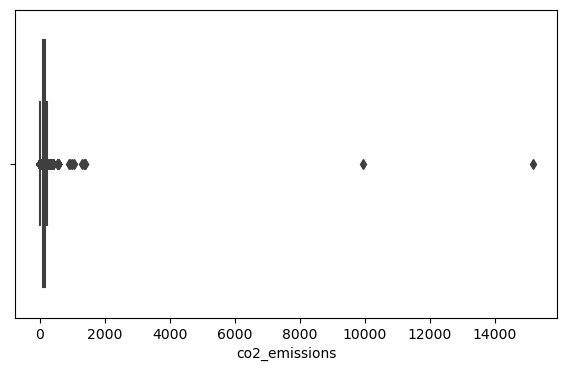

In [1839]:
box_plot_column_(df,'co2_emissions')

In [1840]:
threshold = 3
z_scores = (df['co2_emissions'] - df['co2_emissions'].mean()) / df['co2_emissions'].std()
outliers_z_score = df[abs(z_scores) > threshold]
outliers_z_score.index

Index([ 3366,  6084,  6156,  7244,  9831, 11775, 13708, 13713, 13714, 15007,
       17351, 21720, 22348, 23041, 23255, 25249, 25400, 25546, 25737, 25776,
       26192, 26276, 26322, 26421, 26541, 26561, 26589, 26590, 26591, 26647,
       26648, 26663, 26688, 26756, 26816],
      dtype='int64')

In [1841]:
indices = [ 3366,  6084,  6156,  7244,  9831, 11775, 13708, 13713, 13714, 15007,
       17351, 21720, 22348, 23041, 23255, 25249, 25400, 25546, 25737, 25776,
       26192, 26276, 26322, 26421, 26541, 26561, 26589, 26590, 26591, 26647,
       26648, 26663, 26688, 26756, 26816]

# İndeksleri df.loc ile seçmek
df.loc[indices].T

3366               6084        6156   \
make_model                      Ford Fiesta          Ford Edge  Ford Focus   
price                               29440.0            40650.0     25988.0   
body_type                           Compact   Off-Road/Pick-up     Compact   
type                          Demonstration               Used        Used   
doors                                   3.0                5.0         5.0   
warranty                                Yes                 No          No   
mileage                             12500.0            27214.0     16397.0   
gearbox                              Manual          Automatic   Automatic   
fuel_type                           Benzine             Diesel     Benzine   
colour                                 Blue              Black       Black   
paint                              Metallic           Metallic    Metallic   
seller                               Dealer             Dealer      Dealer   
seats                                   5.0                5.0         5.0   
engine_size                          1496.0             1995.0       998.0   
gears                                   6.0                8.0         8.0   
co2_emissions                         910.0              940.0      9954.0   
drivetrain                            Front                4WD       Front   
cylinders                               3.0                4.0         3.0   
empty_weight                         1242.0             2116.0      1371.0   
service_history                         Yes                Yes          No   
non_smoker                              Yes                Yes          No   
emission_sticker                      Green              Green       Green   
upholstery_color                      Black              Black       Black   
upholstery                            Cloth              Cloth       Other   
available                               yes                yes         yes   
taxi_rental                              No                 No          No   
power_kW                              147.0              175.0        92.0   
fuel_consumption_comb                   6.8                6.6         4.2   
location_country                    Germany            Germany     Germany   
age                                     1.0                2.0         2.0   
inspection_status                        no                yes          no   
energy_efficiency_class         Inefficient          Efficient   Efficient   
safety_security_package            Advanced           Advanced    Advanced   
comfort_convenience_package        Advanced           Advanced    Advanced   
ent_media_package                  Advanced           Advanced    Advanced   
num_of_extras                           6.0                7.0         6.0   
index                                   NaN                NaN         NaN   
z_score_gears                       0.10154           1.420335    1.420335   

                                    7244        9831             11775  \
make_model                    Peugeot 308  Opel Astra  Fiat 124 Spider   
price                             17900.0     17880.0          18488.0   
body_type                           Sedan       Sedan      Convertible   
type                                 Used        Used             Used   
doors                                 5.0         5.0              2.0   
warranty                               No          No               No   
mileage                           42743.0     38455.0          69347.0   
gearbox                         Automatic   Automatic           Manual   
fuel_type                          Diesel     Benzine          Benzine   
colour                               Grey       Black            Black   
paint                        non_metallic    Metallic         Metallic   
seller                             Dealer      Dealer           Dealer   
seats                            

In [1842]:
drop_indices_co2_emission = [3369, 6087, 6159, 7247, 9834, 11778, 13711, 13716, 13717, 15010,
           17354, 21723, 22351, 23044, 23258,  25403,  25740, 25779,
           26195, 26279, 26325, 26424, 26544, 26564, 26592, 26594, 26691, 26759,
           26819]
df.drop(index=drop_indices_co2_emission,inplace=True)

In [1843]:
df.columns


Index(['make_model', 'price', 'body_type', 'type', 'doors', 'warranty',
       'mileage', 'gearbox', 'fuel_type', 'colour', 'paint', 'seller', 'seats',
       'engine_size', 'gears', 'co2_emissions', 'drivetrain', 'cylinders',
       'empty_weight', 'service_history', 'non_smoker', 'emission_sticker',
       'upholstery_color', 'upholstery', 'available', 'taxi_rental',
       'power_kW', 'fuel_consumption_comb', 'location_country', 'age',
       'inspection_status', 'energy_efficiency_class',
       'safety_security_package', 'comfort_convenience_package',
       'ent_media_package', 'num_of_extras', 'index', 'z_score_gears'],
      dtype='object')

In [1844]:
df[df['make_model'] == 'Dacia Spring'].T

280                281   \
make_model                        Dacia Spring       Dacia Spring   
price                                  18490.0            22980.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                                      Used      Demonstration   
doors                                      5.0                5.0   
warranty                                    No                 No   
mileage                                 5800.0             5000.0   
gearbox                              Automatic          Automatic   
fuel_type                             Electric           Electric   
colour                                  Silver              White   
paint                                 Metallic       non_metallic   
seller                                  Dealer             Dealer   
seats                                      4.0                4.0   
engine_size                             1000.0             1000.0   
gears                                      1.0                1.0   
co2_emissions                              0.0                0.0   
drivetrain                               Front              Front   
cylinders                                  1.0                1.0   
empty_weight                            1037.0             1045.0   
service_history                            Yes                 No   
non_smoker                                  No                Yes   
emission_sticker                    No sticker              Green   
upholstery_color                         Black              Black   
upholstery                               Cloth       Part leather   
available                                  yes                yes   
taxi_rental                                 No                 No   
power_kW                                  32.0               33.0   
fuel_consumption_comb                 3.447727           3.447727   
location_country                       Austria            Germany   
age                                        0.0                0.0   
inspection_status                           no                 no   
energy_efficiency_class              Efficient          Efficient   
safety_security_package               Advanced           Enhanced   
comfort_convenience_package           Advanced           Enhanced   
ent_media_package                     Advanced           Advanced   
num_of_extras                              5.0                5.0   
index                                      NaN                NaN   
z_score_gears                        -3.195446          -3.195446   

                                        282              283   \
make_model                      Dacia Spring     Dacia Spring   
price                                21599.0          21599.0   
body_type                              Sedan            Sedan   
type                          Employee's car   Employee's car   
doors                                    5.0              5.0   
warranty                                  No               No   
mileage                                500.0            500.0   
gearbox                            Automatic        Automatic   
fuel_type                           Electric         Electric   
colour                                   Red             Blue   
paint                           non_metallic         Metallic   
seller                                Dealer           Dealer   
seats                                    4.0              4.0   
engine_size                           1000.0           1000.0   
gears                                    1.0              1.0   
co2_emissions                            0.0              0.0   
drivetrain                             Front            Front   
cylinders                                1.0              1.0   
empty_weight                          1037.0           1037.0   
service_history                          Yes      

## 1. Price Analysis

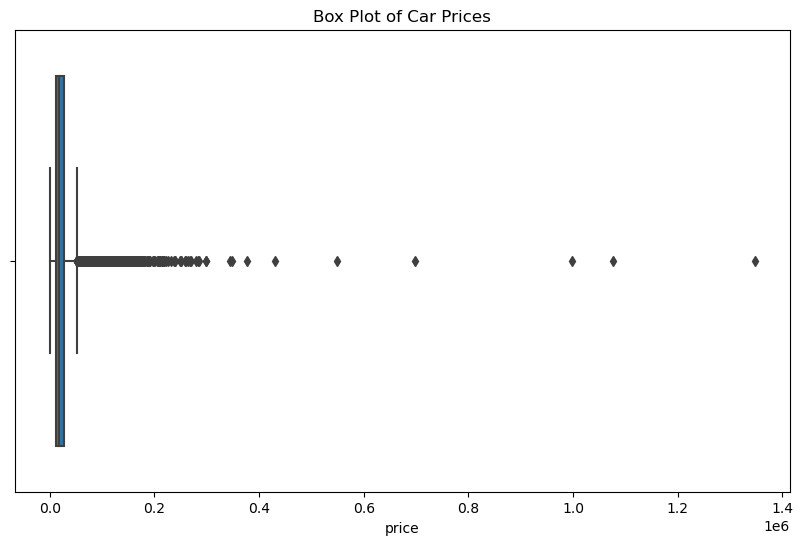

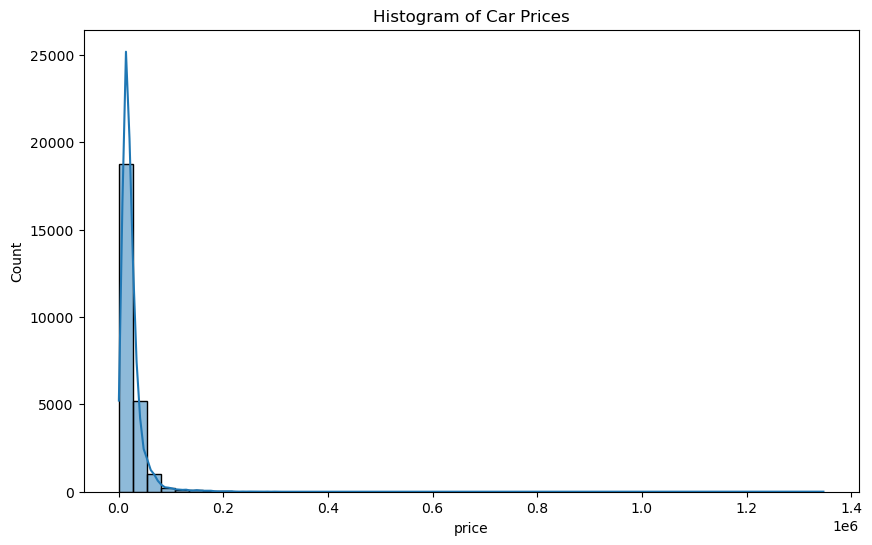

In [1846]:
# Box plot for car prices
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.show()

# Histogram for car prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.show()

In [1847]:
from scipy import stats
import numpy as np

# Calculate Z-scores
df['price_zscore'] = stats.zscore(df['price'])

# Identify outliers
outliers = df[np.abs(df['price_zscore']) > 3]
print("Number of outliers detected:", len(outliers))

Number of outliers detected: 337


## 2. Mileage Analysis

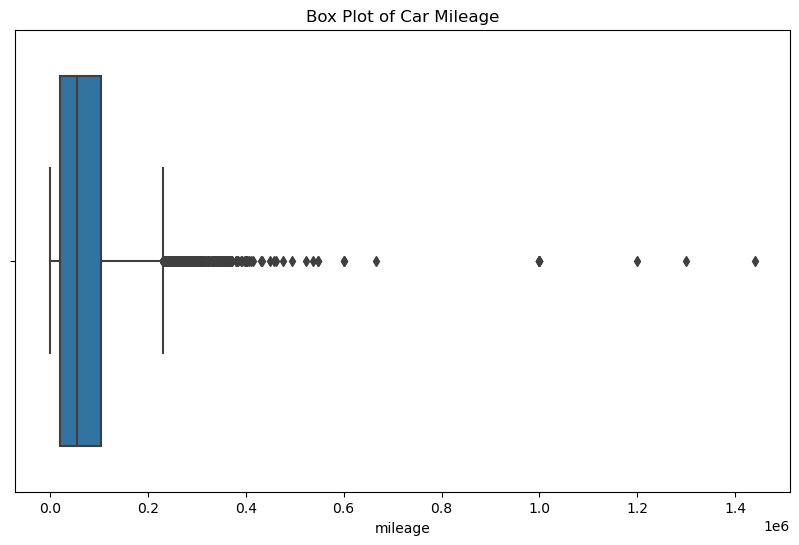

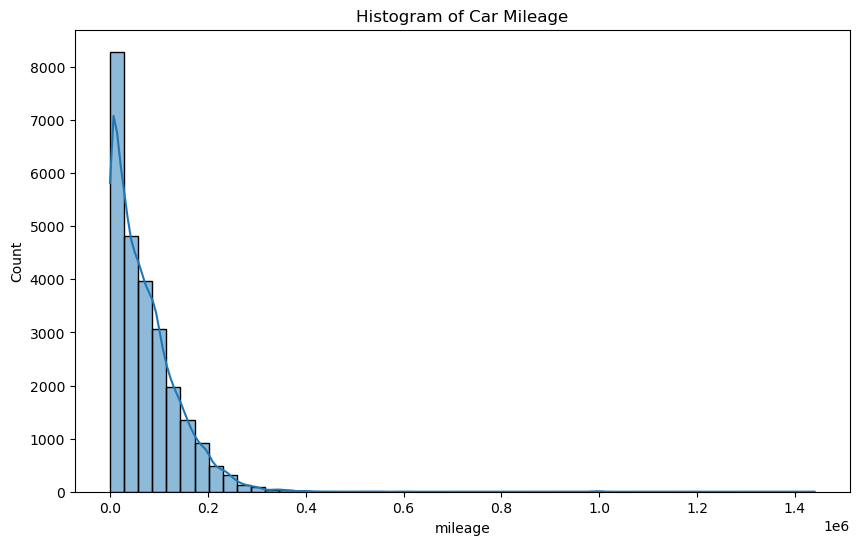

In [1849]:
# Box plot for mileage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mileage'])
plt.title('Box Plot of Car Mileage')
plt.show()

# Histogram for mileage
plt.figure(figsize=(10, 6))
sns.histplot(df['mileage'], bins=50, kde=True)
plt.title('Histogram of Car Mileage')
plt.show()

In [1850]:
df.mileage.describe()

count    2.547400e+04
mean     7.087107e+04
std      6.712713e+04
min      0.000000e+00
25%      1.960000e+04
50%      5.512600e+04
75%      1.039382e+05
max      1.440000e+06
Name: mileage, dtype: float64

In [1851]:
# Find the row with the minimum mileage
min_mileage = df[df['mileage'] == df['mileage'].min()]
min_mileage

make_model    price          body_type             type  doors  \
148         Dacia Lodgy  19500.0      Station wagon   Pre-registered    5.0   
260       Dacia Sandero  16490.0              Sedan   Pre-registered    5.0   
339            Fiat 500  27000.0        Convertible   Pre-registered    2.0   
448           Fiat 500X  21300.0   Off-Road/Pick-up   Pre-registered    5.0   
457           Fiat 500X  28690.0   Off-Road/Pick-up   Pre-registered    5.0   
543           Fiat Tipo  20700.0      Station wagon   Pre-registered    5.0   
553           Fiat Tipo  22250.0      Station wagon             Used    5.0   
699          Ford Focus  29970.0              Sedan   Pre-registered    5.0   
720           Ford Kuga  32200.0   Off-Road/Pick-up   Pre-registered    5.0   
970         Hyundai i10  14590.0      Station wagon    Demonstration    5.0   
1690         Opel Corsa  26980.0              Sedan    Demonstration    5.0   
1714   Opel Crossland X  23650.0   Off-Road/Pick-up    Demonstration    5.0   
1772      Opel Insignia  57590.0      Station wagon    Demonstration    5.0   
2509        Skoda Kamiq  22790.0              Sedan   Pre-registered    5.0   
2600        Skoda Scala  33117.0              Sedan    Demonstration    5.0   
2777       Toyota Camry  45950.0              Sedan             Used    4.0   
2844       Toyota Mirai  75990.0              Sedan    Demonstration    4.0   
3321          Fiat Tipo  24500.0      Station wagon   Pre-registered    4.0   
3476         Ford Focus  20790.0              Sedan   Pre-registered    5.0   
4389     Opel Crossland  24990.0   Off-Road/Pick-up             Used    5.0   
4471      Opel Insignia  48890.0              Sedan    Demonstration    5.0   
4799     Renault Espace  45490.0      Station wagon   Pre-registered    5.0   
15361      Ford Mustang  45995.0              Coupe             Used    2.0   

      warranty  mileage    gearbox fuel_type colour  ...  age  \
148         No      0.0     Manual   Benzine  Beige  ...  0.0   
260        Yes      0.0     Manual   Benzine  White  ...  0.0   
339        Yes      0.0  Automatic  Electric    Red  ...  0.0   
448        Yes      0.0     Manual   Benzine   Grey  ...  0.0   
457        Yes      0.0     Manual   Benzine  White  ...  0.0   
543        Yes      0.0     Manual   Benzine  White  ...  0.0   
553        Yes      0.0     Manual   Benzine  Brown  ...  0.0   
699         No      0.0     Manual   Benzine   Blue  ...  0.0   
720        Yes      0.0     Manual   Benzine   Grey  ...  0.0   
970         No      0.0  Automatic   Benzine  Black  ...  0.0   
1690        No      0.0  Automatic   Benzine    Red  ...  0.0   
1714       Yes      0.0     Manual   Benzine  Black  ...  0.0   
1772       Yes      0.0  Automatic   Benzine   Grey  ...  0.0   
2509       Yes      0.0  Automatic   Benzine    Red  ...  0.0   
2600        No      0.0     Manual   Benzine   Grey  ...  0.0   
2777        No      0.0  Automatic  Electric  White  ...  0.0   
2844       Yes      0.0  Automatic  Electric  White  ...  0.0   
3321        No      0.0     Manual    Diesel  Black  ...  1.0   
3476       Yes      0.0     Manual   Benzine   Grey  ...  1.0   
4389        No      0.0  Automatic   Benzine   Grey  ...  1.0   
4471       Yes      0.0  Automatic   Benzine  White  ...  1.0   
4799        No      0.0  Automatic    Diesel    Red  ...  1.0   
15361      Yes      0.0     Manual   Benzine    Red  ...  5.0   

      inspection_status  energy_efficiency_class  safety_security_package  \
148                  no              Inefficient                 Advanced   
260                  no                Efficient                 Advanced   
339                  no                Efficient                 Advanced   
448                  no              Inefficient                 Enhanced   
457                  no              Inefficient                 Enhanced   
543                  no                Efficient                 Advanced   
553             

In [1852]:
min_mileage[['mileage', 'age', 'make_model', 'price']]

mileage  age        make_model    price
148        0.0  0.0       Dacia Lodgy  19500.0
260        0.0  0.0     Dacia Sandero  16490.0
339        0.0  0.0          Fiat 500  27000.0
448        0.0  0.0         Fiat 500X  21300.0
457        0.0  0.0         Fiat 500X  28690.0
543        0.0  0.0         Fiat Tipo  20700.0
553        0.0  0.0         Fiat Tipo  22250.0
699        0.0  0.0        Ford Focus  29970.0
720        0.0  0.0         Ford Kuga  32200.0
970        0.0  0.0       Hyundai i10  14590.0
1690       0.0  0.0        Opel Corsa  26980.0
1714       0.0  0.0  Opel Crossland X  23650.0
1772       0.0  0.0     Opel Insignia  57590.0
2509       0.0  0.0       Skoda Kamiq  22790.0
2600       0.0  0.0       Skoda Scala  33117.0
2777       0.0  0.0      Toyota Camry  45950.0
2844       0.0  0.0      Toyota Mirai  75990.0
3321       0.0  1.0         Fiat Tipo  24500.0
3476       0.0  1.0        Ford Focus  20790.0
4389       0.0  1.0    Opel Crossland  24990.0
4471       0.0  1.0     Opel Insignia  48890.0
4799       0.0  1.0    Renault Espace  45490.0
15361      0.0  5.0      Ford Mustang  45995.0

In [1853]:
# Filter the rows where the 'age' is greater than 1
outliers_mileage = min_mileage[min_mileage['age'] > 1].index
outliers_mileage

Index([15361], dtype='int64')

#### * The car is an outlier because its age is 5 while its mileage is 0.

In [1855]:
# Find the row with the maximum mileage
max_mileage = df[df['mileage'] == df['mileage'].max()]
max_mileage

make_model    price body_type   type  doors warranty    mileage  \
9599  Nissan Micra  14400.0   Compact   Used    5.0      Yes  1440000.0   

     gearbox fuel_type colour  ...  age inspection_status  \
9599  Manual   Benzine   Grey  ...  3.0                no   

      energy_efficiency_class  safety_security_package  \
9599                Efficient                 Enhanced   

      comfort_convenience_package  ent_media_package num_of_extras  index  \
9599                     Enhanced           Enhanced           2.0    NaN   

      z_score_gears price_zscore  
9599      -0.557857    -0.360249  

[1 rows x 39 columns]

In [1856]:
outliers_mileage2 = max_mileage.index
outliers_mileage2

Index([9599], dtype='int64')

#### * The car is an outlier because its mileage is 1.440.000 km while its age is 3.

In [1858]:
# Calculate Z-scores for mileage
df['mileage_zscore'] = stats.zscore(df['mileage'])

# Define a threshold for Z-score, typically 3 or -3
threshold = 3

# Identify mileage outliers for both positive and negative thresholds
mileage_outliers = df[(np.abs(df['mileage_zscore']) > threshold) | (df['mileage_zscore'] < -threshold)]
print(f"Number of mileage outliers detected: {len(mileage_outliers)}")

# Display the mileage outliers
mileage_outliers

Number of mileage outliers detected: 247


make_model     price       body_type   type  doors warranty  \
9599   Nissan Micra   14400.0         Compact   Used    5.0      Yes   
12102   Ford Fiesta    9990.0           Sedan   Used    3.0      Yes   
13843    SEAT Ibiza   10200.0         Compact   Used    5.0      Yes   
15508   Hyundai i30    7480.0   Station wagon   Used    4.0       No   
16784  Skoda Superb   11500.0   Station wagon   Used    5.0      Yes   
...             ...       ...             ...    ...    ...      ...   
26500   Opel Kadett    7500.0           Coupe   Used    2.0       No   
26684   Opel Kadett     900.0           Coupe   Used    2.0       No   
26685   Peugeot 404   10000.0     Convertible   Used    2.0       No   
26735  Ford Mustang   37990.0     Convertible   Used    2.0       No   
26846         Fiat   159000.0     Convertible   Used    4.0       No   

         mileage    gearbox fuel_type  colour  ... inspection_status  \
9599   1440000.0     Manual   Benzine    Grey  ...                no   
12102  1000001.0     Manual   Benzine   White  ...                no   
13843  1199900.0     Manual    Diesel   White  ...                no   
15508   276000.0     Manual    Diesel   White  ...               yes   
16784   415000.0  Automatic    Diesel   White  ...                no   
...          ...        ...       ...     ...  ...               ...   
26500   536388.0     Manual   Benzine    Blue  ...               yes   
26684   999999.0     Manual   Benzine   White  ...                no   
26685  1000000.0     Manual   Benzine  Silver  ...                no   
26735   999999.0     Manual   Benzine    Blue  ...               yes   
26846   999999.0     Manual   Benzine   Brown  ...                no   

      energy_efficiency_class  safety_security_package  \
9599                Efficient                 Enhanced   
12102               Efficient                 Advanced   
13843               Efficient                 Enhanced   
15508               Efficient                 Advanced   
16784               Efficient                 Enhanced   
...                       ...                      ...   
26500               Efficient                 Enhanced   
26684               Efficient                 Enhanced   
26685               Efficient                 Enhanced   
26735             Inefficient                    Basic   
26846               Efficient                 Advanced   

       comfort_convenience_package  ent_media_package  num_of_extras index  \
9599                      Enhanced           Enhanced            2.0   NaN   
12102                     Advanced           Advanced            6.0   NaN   
13843                     Enhanced           Enhanced            3.0   NaN   
15508                     Advanced           Advanced            2.0   NaN   
16784                     Enhanced           Enhanced            2.0   NaN   
...                            ...                ...            ...   ...   
26500                        Basic           Advanced            8.0   NaN   
26684                        Basic           Advanced            4.0   NaN   
26685                        Basic           Advanced            4.0   NaN   
26735                        Basic           Advanced            2.0   NaN   
26846                     Advanced           Advanced            3.0   NaN   

       z_score_gears  price_zscore mileage_zscore  
9599       -0.557857     -0.360249      20.396458  
12102      -0.557857     -0.534126      13.841618  
13843      -0.557857     -0.525846      16.819593  
15508       0.101540     -0.633090       3.055887  
16784       0.760938     -0.474590       5.126626  
...              ...           ...            ...  
26500      -0.557857     -0.632302       6.934991  
26684      -0.557857     -0.892526      13.841588  
26685      -1.217254     -0.533732      13.841603  
26735      -1.217254      0.569858      13.841588  
26846      -1.217254      5.341038      13.841588  

[247 rows x 40 colum

## Relationship between Mileage and Age

In [1860]:
# Select the specified columns for the mileage outliers
mileage_outliers_info = mileage_outliers[['mileage', 'age', 'price', 'make_model']]
mileage_outliers_info

mileage   age     price    make_model
9599   1440000.0   3.0   14400.0  Nissan Micra
12102  1000001.0   4.0    9990.0   Ford Fiesta
13843  1199900.0   4.0   10200.0    SEAT Ibiza
15508   276000.0   5.0    7480.0   Hyundai i30
16784   415000.0   5.0   11500.0  Skoda Superb
...          ...   ...       ...           ...
26500   536388.0  44.0    7500.0   Opel Kadett
26684   999999.0  54.0     900.0   Opel Kadett
26685  1000000.0  54.0   10000.0   Peugeot 404
26735   999999.0  56.0   37990.0  Ford Mustang
26846   999999.0  89.0  159000.0         Fiat 

[247 rows x 4 columns]

In [1861]:
mileage_outliers_info.describe()

mileage         age          price
count  2.470000e+02  247.000000     247.000000
mean   3.519691e+05   17.028340    5957.943320
std    1.554106e+05    9.139569   10740.697945
min    2.722690e+05    3.000000     590.000000
25%    2.881620e+05   12.000000    2650.000000
50%    3.065040e+05   15.000000    3900.000000
75%    3.500000e+05   19.000000    6974.500000
max    1.440000e+06   89.000000  159000.000000

In [1862]:
min_values = mileage_outliers_info[(mileage_outliers_info['mileage'] == mileage_outliers_info['mileage'].min()) ]
min_values

mileage   age   price    make_model
25997  272269.0  27.0  1500.0  Opel Calibra

In [1863]:
max_values = mileage_outliers_info[(mileage_outliers_info['mileage'] == mileage_outliers_info['mileage'].max()) ]
max_values

mileage  age    price    make_model
9599  1440000.0  3.0  14400.0  Nissan Micra

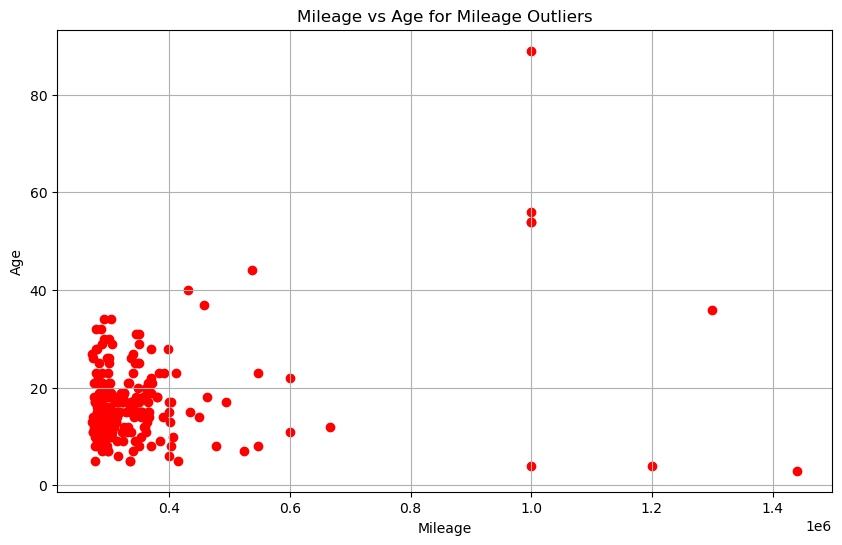

In [1864]:
# Scatter plot between mileage and age for mileage outliers
plt.figure(figsize=(10, 6))
plt.scatter(mileage_outliers['mileage'], mileage_outliers['age'], color='red')
plt.xlabel('Mileage')
plt.ylabel('Age')
plt.title('Mileage vs Age for Mileage Outliers')
plt.grid(True)
plt.show()

In [1865]:
mileage_age = mileage_outliers[(mileage_outliers['mileage'] > 400000) | (mileage_outliers['age'] > 40) ]
mileage_age[['mileage', 'age', 'price', 'make_model']]

mileage   age     price           make_model
9599   1440000.0   3.0   14400.0         Nissan Micra
12102  1000001.0   4.0    9990.0          Ford Fiesta
13843  1199900.0   4.0   10200.0           SEAT Ibiza
16784   415000.0   5.0   11500.0         Skoda Superb
19554   523992.0   7.0    6600.0       Toyota Avensis
19861   402000.0   8.0    4950.0          Hyundai i40
19993   477000.0   8.0    8000.0        Nissan Evalia
20395   546888.0   8.0    6500.0        Skoda Octavia
21469   406000.0  10.0    3900.0           Opel Corsa
22342   600000.0  11.0    4500.0         Skoda Superb
22811   667128.0  12.0    3400.0        SEAT Altea XL
23252   400332.0  13.0    2750.0            Volvo C30
23666   448914.0  14.0    4885.0            Volvo V70
24075   433850.0  15.0    2945.0            Volvo V70
24551   494457.0  17.0     800.0           Opel Astra
24620   402933.0  17.0    1990.0          Peugeot 407
24862   461626.0  18.0    1250.0       Renault Laguna
25594   600001.0  22.0    1345.0            Volvo S70
25691   411200.0  23.0    1999.0        Toyota Celica
25697   547000.0  23.0   15900.0  Toyota Land Cruiser
26406  1300000.0  36.0    4500.0        Toyota Celica
26419   457379.0  37.0    4900.0    Mercedes-Benz 280
26466   431330.0  40.0    7900.0        Toyota Celica
26500   536388.0  44.0    7500.0          Opel Kadett
26684   999999.0  54.0     900.0          Opel Kadett
26685  1000000.0  54.0   10000.0          Peugeot 404
26735   999999.0  56.0   37990.0         Ford Mustang
26846   999999.0  89.0  159000.0                Fiat

In [1866]:
outliers_mileage4 = mileage_age.index
outliers_mileage4

Index([ 9599, 12102, 13843, 16784, 19554, 19861, 19993, 20395, 21469, 22342,
       22811, 23252, 23666, 24075, 24551, 24620, 24862, 25594, 25691, 25697,
       26406, 26419, 26466, 26500, 26684, 26685, 26735, 26846],
      dtype='int64')

#### * As seen in the mileage-age scatter plot, outliers are concentrated in the region where mileage is up to 400,000 and age is up to 40, based on the mileage z-score. Therefore, areas outside these ranges are considered outliers.

In [1868]:
# Filter the DataFrame to show rows where age is 0
mileage_age_zero = df[df['age'] == 0]
mileage_age_zero[['mileage', 'age']]

mileage  age
3       999.0  0.0
4        90.0  0.0
5      1000.0  0.0
6      1000.0  0.0
7      4500.0  0.0
...       ...  ...
3028   3500.0  0.0
3029      1.0  0.0
3030  15000.0  0.0
3031  20000.0  0.0
3032  12485.0  0.0

[2860 rows x 2 columns]

In [1869]:
mileage_age_zero.describe()

price        doors       mileage        seats  engine_size  \
count    2860.000000  2860.000000   2860.000000  2860.000000  2860.000000   
mean    38979.516084     4.591259   3074.640402     4.887413  1564.893007   
std     32119.131049     0.855650   4776.409050     0.764220   765.474236   
min      9290.000000     2.000000      0.000000     2.000000   875.000000   
25%     22990.000000     5.000000     10.000000     5.000000   999.000000   
50%     29525.000000     5.000000    500.000000     5.000000  1461.000000   
75%     41990.000000     5.000000   5000.000000     5.000000  1659.000000   
max    696900.000000     6.000000  50340.000000    17.000000  5461.000000   

             gears  co2_emissions    cylinders  empty_weight     power_kW  \
count  2860.000000    2860.000000  2860.000000   2860.000000  2860.000000   
mean      5.893007     114.785315     3.803497   1449.904218   125.400956   
std       1.979544      58.785833     1.192193    337.098344    75.744379   
min       1.000000       0.000000     0.000000    562.000000     9.000000   
25%       6.000000     101.000000     3.000000   1220.000000    81.000000   
50%       6.000000     116.000000     4.000000   1374.000000   100.000000   
75%       7.000000     138.000000     4.000000   1594.000000   140.000000   
max      10.000000     394.000000     8.000000   2690.000000   567.000000   

       fuel_consumption_comb     age  num_of_extras  index  z_score_gears  \
count            2860.000000  2860.0         2860.0    0.0    2860.000000   
mean                5.412414     0.0            5.0    NaN       0.030989   
std                 2.159649     0.0            0.0    NaN       1.305306   
min                 0.600000     0.0            5.0    NaN      -3.195446   
25%                 4.400000     0.0            5.0    NaN       0.101540   
50%                 5.200000     0.0            5.0    NaN       0.101540   
75%                 6.021871     0.0            5.0    NaN       0.760938   
max                33.228571     0.0            5.0    NaN       2.739129   

       price_zscore  mileage_zscore  
count   2860.000000     2860.000000  
mean       0.608872       -1.009990  
std        1.266393        0.071156  
min       -0.561726       -1.055795  
25%       -0.021562       -1.055646  
50%        0.236100       -1.048346  
75%        0.727569       -0.981308  
max       26.549352       -0.305860

In [1870]:
mileage_age_zero1 = mileage_age_zero[mileage_age_zero['mileage'] > 25000][['mileage', 'age', 'type']]
mileage_age_zero1

mileage  age             type
947   46500.0  0.0             Used
1002  26982.0  0.0             Used
1004  25114.0  0.0             Used
1127  28535.0  0.0             Used
1438  50340.0  0.0             Used
2145  39365.0  0.0             Used
2297  25442.0  0.0   Employee's car
2381  30106.0  0.0             Used
2489  39029.0  0.0             Used
2613  26950.0  0.0   Employee's car
2697  26200.0  0.0   Employee's car

In [1871]:
outliers_mileage7 = mileage_age_zero1.index
outliers_mileage7

Index([947, 1002, 1004, 1127, 1438, 2145, 2297, 2381, 2489, 2613, 2697], dtype='int64')

#### * According to the code, outliers were identified when the mileage of vehicles exceeded 25,000 while their age was recorded as 0. Typically, vehicles do not have such high mileage when they are brand new, hence these entries are considered unusual. Additionally, the presence of vehicles labeled as "Employee's car" alongside those labeled as "Used" in the 'type' column adds complexity to the analysis, indicating potential discrepancies in data recording or classification. Therefore, such entries may warrant further investigation or removal from the dataset.

In [1873]:
mileage_u1000 = df[df['mileage'] < 1000]
mileage_u1000

make_model     price          body_type             type  doors  \
3            Dacia Break   20500.0      Station wagon    Demonstration    4.0   
4           Dacia Dokker   16900.0      Station wagon             Used    6.0   
9           Dacia Duster   21590.0   Off-Road/Pick-up    Demonstration    5.0   
11          Dacia Duster   21990.0   Off-Road/Pick-up   Pre-registered    5.0   
12          Dacia Duster   23556.0   Off-Road/Pick-up   Pre-registered    5.0   
...                  ...       ...                ...              ...    ...   
26773       Ford Mustang   47500.0              Coupe             Used    2.0   
26800           Fiat 500   15000.0        Convertible             Used    2.0   
26804  Mercedes-Benz 190  180000.0        Convertible             Used    2.0   
26833   Ford Thunderbird   54000.0        Convertible             Used    2.0   
26854        Ford Bronco   57480.0   Off-Road/Pick-up             Used    5.0   

      warranty  mileage    gearbox fuel_type  colour  ... inspection_status  \
3          Yes    999.0     Manual   Benzine   Brown  ...                no   
4          Yes     90.0     Manual       LPG   White  ...                no   
9           No    910.0     Manual   Benzine    Grey  ...                no   
11         Yes      7.0     Manual   Benzine   White  ...                no   
12          No     10.0     Manual    Diesel  Orange  ...               yes   
...        ...      ...        ...       ...     ...  ...               ...   
26773       No      1.0     Manual   Benzine   Green  ...                no   
26800       No     10.0     Manual   Benzine    Grey  ...                no   
26804       No     10.0     Manual   Benzine    Grey  ...                no   
26833       No      1.0  Automatic   Benzine    Blue  ...                no   
26854       No     10.0  Automatic   Benzine  Silver  ...                no   

      energy_efficiency_class  safety_security_package  \
3                   Efficient                 Advanced   
4                 Inefficient                    Basic   
9                 Inefficient                 Advanced   
11                Inefficient                 Advanced   
12                  Efficient                 Enhanced   
...                       ...                      ...   
26773             Inefficient                 Enhanced   
26800               Efficient                 Enhanced   
26804               Efficient                    Basic   
26833               Efficient                    Basic   
26854               Efficient                 Advanced   

       comfort_convenience_package  ent_media_package  num_of_extras index  \
3                         Advanced           Enhanced            5.0   NaN   
4                            Basic           Advanced            5.0   NaN   
9                         Advanced           Enhanced            5.0   NaN   
11                        Advanced           Advanced            5.0   NaN   
12                        Advanced           Advanced            5.0   NaN   
...                            ...                ...            ...   ...   
26773                        Basic           Advanced            3.0   NaN   
26800                     Enhanced           Advanced            3.0   NaN   
26804                     Advanced           Advanced            3.0   NaN   
26833                     Enhanced           Advanced            4.0   NaN   
26854                     Advanced           Advanced            3.0   NaN   

       z_score_gears  price_zscore mileage_zscore  
3           0.101540     -0.119738      -1.040912  
4          -0.557857     -0.261679      -1.054454  
9           0.101540     -0.076761      -1.042238  
11          0.101540     -0.060990      -1.055690  
12          0.101540      0.000754      -1.055646  
...              ...           ...            ...  
26773      -0.557857      0.944818      -1.055780  
26800      -1.217254     -0.336592      -1

In [1874]:
mileage_u1000.describe()

price        doors      mileage        seats  engine_size  \
count  1.887000e+03  1887.000000  1887.000000  1887.000000  1887.000000   
mean   3.285155e+04     4.529942    79.695813     4.840488  1487.134075   
std    3.624441e+04     0.925673   176.676420     0.791319   773.768107   
min    1.200000e+03     2.000000     0.000000     1.000000   500.000000   
25%    2.099000e+04     5.000000     9.000000     5.000000   999.000000   
50%    2.679000e+04     5.000000    10.000000     5.000000  1332.000000   
75%    3.488900e+04     5.000000    50.000000     5.000000  1590.500000   
max    1.075900e+06     6.000000   999.000000    17.000000  5409.000000   

             gears  co2_emissions    cylinders  empty_weight     power_kW  \
count  1887.000000    1887.000000  1887.000000   1887.000000  1887.000000   
mean      5.731849     116.126126     3.661897   1366.817700   109.035616   
std       1.653159      53.384597     1.060295    275.318764    65.348453   
min       1.000000       0.000000     0.000000    473.000000     1.000000   
25%       5.000000     103.000000     3.000000   1165.000000    74.000000   
50%       6.000000     115.000000     4.000000   1343.000000    96.000000   
75%       6.000000     131.000000     4.000000   1485.000000   116.100000   
max      10.000000     350.000000     8.000000   2560.000000   559.000000   

       fuel_consumption_comb          age  num_of_extras  index  \
count            1887.000000  1887.000000    1887.000000    0.0   
mean                5.385219     0.852676       5.036566    NaN   
std                 1.941307     5.750238       1.435883    NaN   
min                 0.600000     0.000000       2.000000    NaN   
25%                 4.500000     0.000000       5.000000    NaN   
50%                 5.133333     0.000000       5.000000    NaN   
75%                 5.700000     0.000000       5.000000    NaN   
max                14.650000   122.000000      17.000000    NaN   

       z_score_gears  price_zscore  mileage_zscore  
count    1887.000000   1887.000000     1887.000000  
mean       -0.075277      0.367259       -1.054607  
std         1.090089      1.429044        0.002632  
min        -3.195446     -0.880698       -1.055795  
25%        -0.557857     -0.100418       -1.055660  
50%         0.101540      0.128264       -1.055646  
75%         0.101540      0.447591       -1.055050  
max         2.739129     41.492558       -1.040912

In [1875]:
mileage_u1000.groupby('age')['mileage'].value_counts()

age    mileage
0.0    10.0       478
       1.0        119
       100.0       90
       20.0        80
       5.0         77
                 ... 
57.0   982.0        1
       1.0          1
59.0   10.0         2
67.0   1.0          1
122.0  10.0         1
Name: count, Length: 247, dtype: int64

In [1876]:
# Calculate the Q1 (25th percentile) and Q3 (75th percentile) for mileage within each age group
Q1 = mileage_u1000.groupby('age')['mileage'].quantile(0.25)
Q3 = mileage_u1000.groupby('age')['mileage'].quantile(0.75)

# Calculate the IQR for mileage within each age group
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [1877]:
# Merge the lower and upper bounds with the mileage_u1000 DataFrame
mileage_u1000 = mileage_u1000.join(lower_bound, on='age', rsuffix='_lower')
mileage_u1000 = mileage_u1000.join(upper_bound, on='age', rsuffix='_upper')

# Filter out the outliers
outlier_mileage_u1000 = mileage_u1000[(mileage_u1000['mileage'] < mileage_u1000['mileage_lower']) | (mileage_u1000['mileage'] > mileage_u1000['mileage_upper'])]
outlier_mileage_u1000

make_model    price          body_type             type  \
3              Dacia Break  20500.0      Station wagon    Demonstration   
4             Dacia Dokker  16900.0      Station wagon             Used   
9             Dacia Duster  21590.0   Off-Road/Pick-up    Demonstration   
18            Dacia Duster  24949.0   Off-Road/Pick-up   Pre-registered   
19            Dacia Duster  23400.0   Off-Road/Pick-up             Used   
...                    ...      ...                ...              ...   
7950          Toyota Supra  50990.0              Coupe             Used   
7951          Toyota Supra  47900.0              Coupe             Used   
10327  Renault Alpine A110  59900.0            Compact             Used   
15361         Ford Mustang  45995.0              Coupe             Used   
16419       Renault Kangoo  19990.0      Station wagon             Used   

       doors warranty  mileage    gearbox fuel_type colour  ...  \
3        4.0      Yes    999.0     Manual   Benzine  Brown  ...   
4        6.0      Yes     90.0     Manual       LPG  White  ...   
9        5.0       No    910.0     Manual   Benzine   Grey  ...   
18       5.0       No    110.0     Manual    Diesel  Black  ...   
19       4.0       No    500.0     Manual   Benzine   Blue  ...   
...      ...      ...      ...        ...       ...    ...  ...   
7950     3.0      Yes    827.0  Automatic   Benzine  White  ...   
7951     3.0       No    900.0  Automatic   Benzine   Grey  ...   
10327    5.0       No    800.0  Automatic   Benzine  White  ...   
15361    2.0      Yes      0.0     Manual   Benzine    Red  ...   
16419    5.0       No    500.0     Manual    Diesel  Brown  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
3                    Advanced                    Advanced           Enhanced   
4                       Basic                       Basic           Advanced   
9                    Advanced                    Advanced           Enhanced   
18                   Advanced                    Advanced           Enhanced   
19                   Advanced                    Enhanced           Enhanced   
...                       ...                         ...                ...   
7950                 Advanced                    Advanced           Advanced   
7951                 Advanced                    Advanced           Advanced   
10327                Advanced                    Advanced           Advanced   
15361                Enhanced                    Advanced           Advanced   
16419                Enhanced                    Enhanced           Advanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
3                5.0    NaN       0.101540    -0.119738       -1.040912   
4                5.0    NaN      -0.557857    -0.261679       -1.054454   
9                5.0    NaN       0.101540    -0.076761       -1.042238   
18               5.0    NaN       0.101540     0.055677       -1.054156   
19               5.0    NaN       0.101540    -0.005397       -1.048346   
...              ...    ...            ...          ...             ...   
7950            11.0    NaN       1.420335     1.082421       -1.043474   
7951             7.0    NaN       1.420335     0.960589       -1.042387   
10327            2.0    NaN       0.101540     1.433725       -1.043877   
15361            2.0    NaN       0.101540     0.885479       -1.055795   
16419            2.0    NaN      -0.557857    -0.139846       -1.048346   

       mileage_lower mileage_upper  
3            -30.000        74.000  
4            -30.000        74.000  
9            -30.000        74.000  
18           -30.000        74.000  
19           -30.000        74.000  
...              ...           ...  
7950        -129.875       243.125  
7951        -129.875       243.125  
10327       -237.500       422.500  
15361         10.000        10.000  
16419         10.000        10.000  

[34

In [1878]:
outliers_mileage8 = outlier_mileage_u1000.index
outliers_mileage8

Index([    3,     4,     9,    18,    19,    20,    25,    27,    33,    35,
       ...
        5346,  5718,  5738,  6110,  6450,  7950,  7951, 10327, 15361, 16419],
      dtype='int64', length=349)

#### * This code identifies outliers within the subset of vehicles where the mileage is less than 1000. Outliers are determined based on the interquartile range (IQR) method applied within each age group. If the mileage of a vehicle falls outside of the lower or upper bound defined by 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3), respectively, it is considered an outlier. This process helps flag unusual mileage values within each age group, which might indicate data errors, inaccurate recording, or other anomalies in the dataset.

## Relationship between Mileage and Price

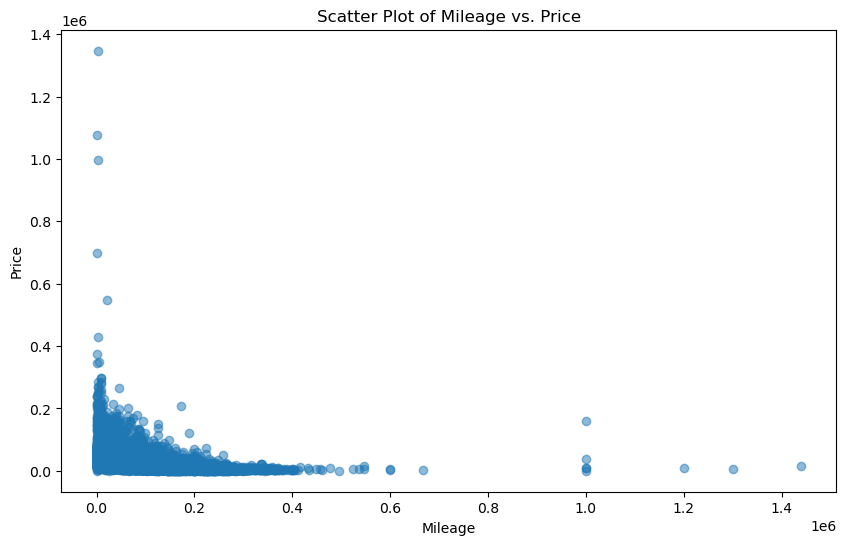

In [1881]:
# Scatter plot of mileage vs. price
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.5)
plt.title('Scatter Plot of Mileage vs. Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

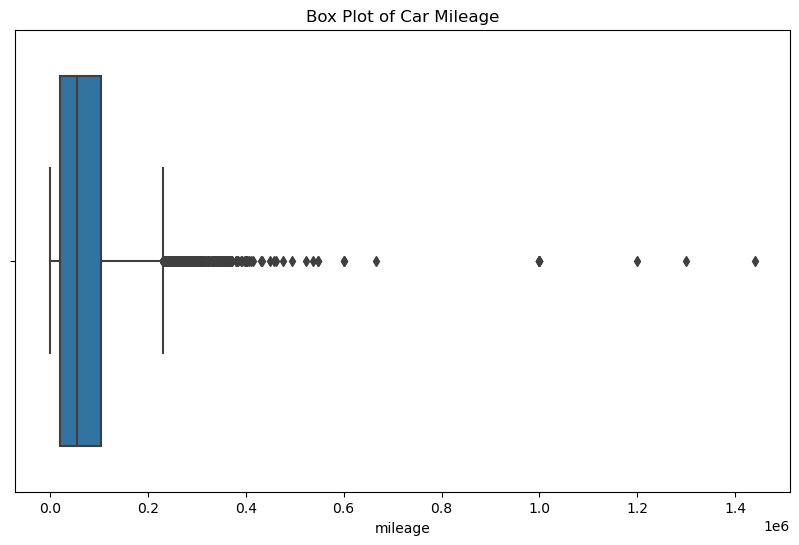

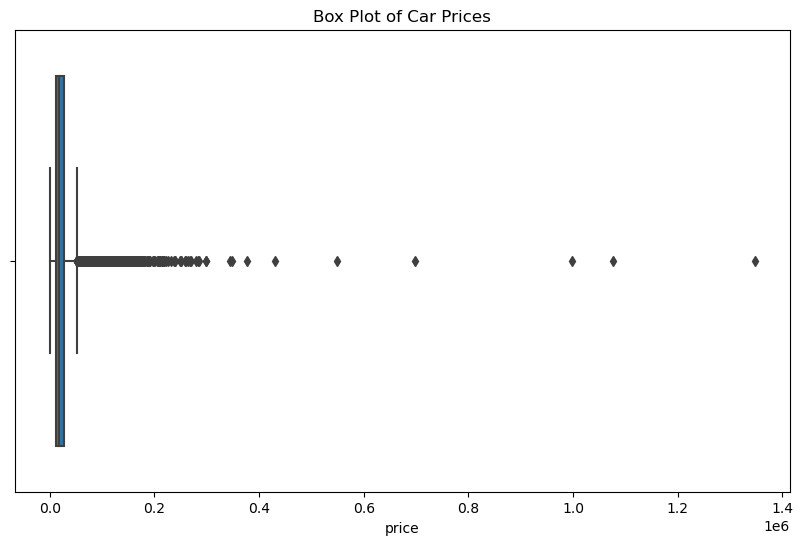

In [1882]:
# Box plot for mileage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['mileage'])
plt.title('Box Plot of Car Mileage')
plt.show()

# Box plot for price
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Box Plot of Car Prices')
plt.show()

In [1883]:
# Calculate Z-scores
df['mileage_zscore'] = stats.zscore(df['mileage'])
df['price_zscore'] = stats.zscore(df['price'])

# Identify outliers
out_mileage_price = df[(np.abs(df['mileage_zscore']) > 3) & (np.abs(df['price_zscore']) > 3) | (np.abs(df['mileage_zscore']) < -3) & (np.abs(df['price_zscore']) < -3)]
out_mileage_price[['mileage', 'age', 'price', 'make_model']]

mileage   age     price make_model
26846  999999.0  89.0  159000.0      Fiat

In [1884]:
outliers_mileage5 = out_mileage_price.index
outliers_mileage5

Index([26846], dtype='int64')

#### * The `out_mileage_price` variable contains the rows where the absolute value of either the mileage z-score or the price z-score is greater than 3, or the absolute value of both z-scores is less than -3. These rows are considered outliers because their mileage and/or price values deviate significantly from the mean, indicating they are unusual or extreme cases in the dataset.

In [1886]:
df.groupby('mileage')['age'].value_counts()

mileage    age 
0.0        0.0      17
           1.0       5
           5.0       1
1.0        0.0     119
           1.0      32
                  ... 
1000000.0  54.0      1
1000001.0  4.0       1
1199900.0  4.0       1
1300000.0  36.0      1
1440000.0  3.0       1
Name: count, Length: 18570, dtype: int64

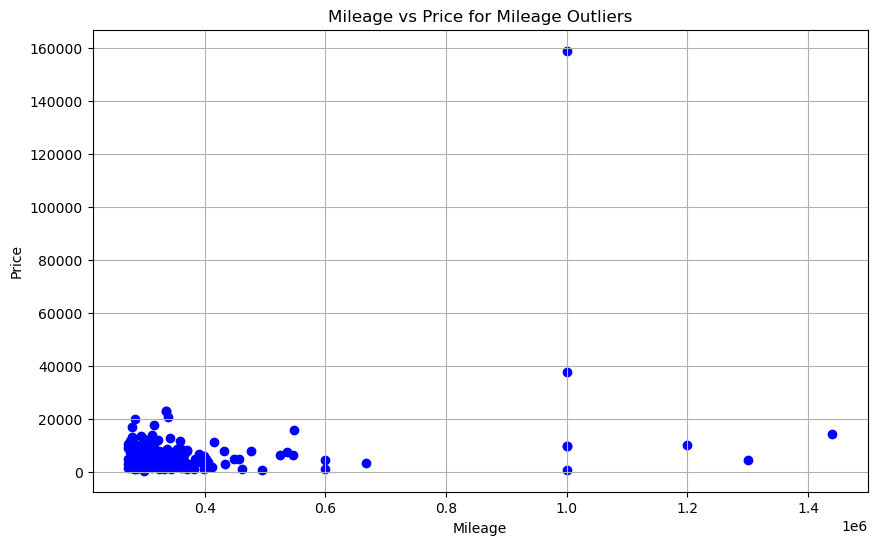

In [1887]:
# Scatter plot between mileage and price for mileage outliers
plt.figure(figsize=(10, 6))
plt.scatter(mileage_outliers['mileage'], mileage_outliers['price'], color='blue')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price for Mileage Outliers')
plt.grid(True)
plt.show()

In [1888]:
outliers_mileage_price = mileage_outliers[(mileage_outliers['mileage'] > 200000) & (mileage_outliers['price'] > 20000) ]
outliers_mileage_price[['mileage', 'age', 'price', 'make_model']]

mileage   age     price           make_model
16878  335000.0   5.0   22990.0  Toyota Land Cruiser
16883  335000.0   5.0   22990.0  Toyota Land Cruiser
26015  339000.0  27.0   21000.0          Toyota MR 2
26735  999999.0  56.0   37990.0         Ford Mustang
26846  999999.0  89.0  159000.0                Fiat

In [1889]:
outliers_mileage6 = outliers_mileage_price.index
outliers_mileage6

Index([16878, 16883, 26015, 26735, 26846], dtype='int64')

#### * The `outliers_mileage_price` variable contains the rows from the mileage outliers where both the mileage is greater than 200,000 and the price is greater than 20,000. These rows are considered outliers because they represent cases where the vehicles have exceptionally high mileage and are still priced significantly high, making them unusual or extreme in the dataset.

## 3. Doors

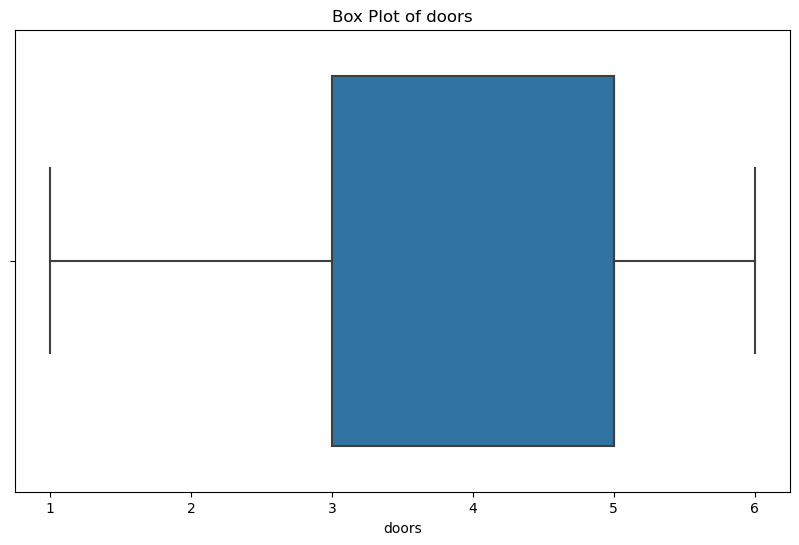

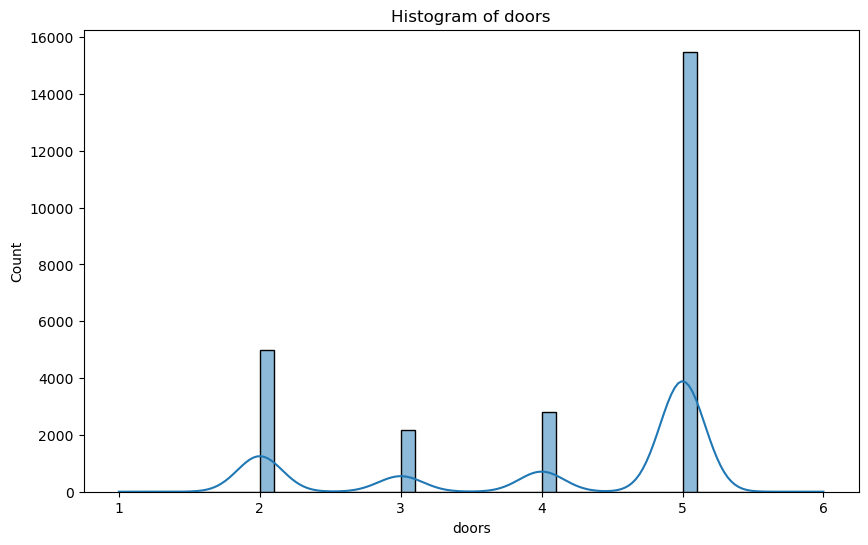

In [1892]:
# Box plot for doors
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['doors'])
plt.title('Box Plot of doors')
plt.show()

# Histogram for doors
plt.figure(figsize=(10, 6))
sns.histplot(df['doors'], bins=50, kde=True)
plt.title('Histogram of doors')
plt.show()

In [1893]:
df.doors.value_counts()

doors
5.0    15486
2.0     4982
4.0     2818
3.0     2181
6.0        5
1.0        2
Name: count, dtype: int64

In [1894]:
df[df['doors'] == 6.0].sample(5)

make_model    price       body_type   type  doors warranty   mileage  \
21212   Dacia Logan   5950.0   Station wagon   Used    6.0       No  173000.0   
22415   Dacia Logan   2700.0   Station wagon   Used    6.0       No  210877.0   
4      Dacia Dokker  16900.0   Station wagon   Used    6.0      Yes      90.0   
22418   Dacia Logan   3000.0   Station wagon   Used    6.0       No  258000.0   
23296   Dacia Logan   1700.0   Station wagon   Used    6.0       No  144043.0   

      gearbox fuel_type  colour  ... inspection_status  \
21212  Manual    Diesel  Bronze  ...                no   
22415  Manual    Diesel   Black  ...                no   
4      Manual       LPG   White  ...                no   
22418  Manual    Diesel    Grey  ...                no   
23296  Manual   Benzine    Blue  ...                no   

      energy_efficiency_class  safety_security_package  \
21212             Inefficient                 Enhanced   
22415             Inefficient                    Basic   
4                 Inefficient                    Basic   
22418             Inefficient                    Basic   
23296             Inefficient                 Enhanced   

       comfort_convenience_package  ent_media_package  num_of_extras index  \
21212                        Basic           Advanced            2.0   NaN   
22415                     Advanced           Advanced            2.0   NaN   
4                            Basic           Advanced            5.0   NaN   
22418                     Advanced           Advanced            3.0   NaN   
23296                        Basic           Advanced            4.0   NaN   

       z_score_gears  price_zscore mileage_zscore  
21212      -0.557857     -0.693415       1.521455  
22415      -0.557857     -0.821556       2.085724  
4          -0.557857     -0.261679      -1.054454  
22418      -0.557857     -0.809728       2.787734  
23296      -0.557857     -0.860984       1.090071  

[5 rows x 40 columns]

In [1895]:
# Identify the rows where 'doors' values are outside the range of 2 to 5
doors_range = df[(df['doors'] < 2) | (df['doors'] > 5)]
doors_range

make_model    price       body_type   type  doors warranty  \
4         Dacia Dokker  16900.0   Station wagon   Used    6.0      Yes   
15258      Ford Fiesta  11790.0         Compact   Used    1.0      Yes   
21212      Dacia Logan   5950.0   Station wagon   Used    6.0       No   
22415      Dacia Logan   2700.0   Station wagon   Used    6.0       No   
22418      Dacia Logan   3000.0   Station wagon   Used    6.0       No   
23296      Dacia Logan   1700.0   Station wagon   Used    6.0       No   
26692  Fiat 124 Spider  19000.0     Convertible   Used    1.0       No   

        mileage gearbox fuel_type  colour  ... inspection_status  \
4          90.0  Manual       LPG   White  ...                no   
15258   14600.0  Manual   Benzine    Grey  ...                no   
21212  173000.0  Manual    Diesel  Bronze  ...                no   
22415  210877.0  Manual    Diesel   Black  ...                no   
22418  258000.0  Manual    Diesel    Grey  ...                no   
23296  144043.0  Manual   Benzine    Blue  ...                no   
26692   48500.0  Manual   Benzine     Red  ...                no   

      energy_efficiency_class  safety_security_package  \
4                 Inefficient                    Basic   
15258               Efficient                 Enhanced   
21212             Inefficient                 Enhanced   
22415             Inefficient                    Basic   
22418             Inefficient                    Basic   
23296             Inefficient                 Enhanced   
26692             Inefficient                    Basic   

       comfort_convenience_package  ent_media_package  num_of_extras index  \
4                            Basic           Advanced            5.0   NaN   
15258                     Enhanced           Advanced            2.0   NaN   
21212                        Basic           Advanced            2.0   NaN   
22415                     Advanced           Advanced            2.0   NaN   
22418                     Advanced           Advanced            3.0   NaN   
23296                        Basic           Advanced            4.0   NaN   
26692                     Advanced           Enhanced            2.0   NaN   

       z_score_gears  price_zscore mileage_zscore  
4          -0.557857     -0.261679      -1.054454  
15258       0.101540     -0.463156      -0.838293  
21212      -0.557857     -0.693415       1.521455  
22415      -0.557857     -0.821556       2.085724  
22418      -0.557857     -0.809728       2.787734  
23296      -0.557857     -0.860984       1.090071  
26692      -0.557857     -0.178880      -0.333271  

[7 rows x 40 columns]

In [1896]:
outliers_doors = doors_range.index
outliers_doors

Index([4, 15258, 21212, 22415, 22418, 23296, 26692], dtype='int64')

#### * The `doors_range` variable contains the rows where the number of doors is either less than 2 or greater than 5. These rows are considered outliers because vehicles with fewer than 2 doors or more than 5 doors are unusual or extreme cases, deviating from the typical range of door counts in the dataset.

## Cylinders

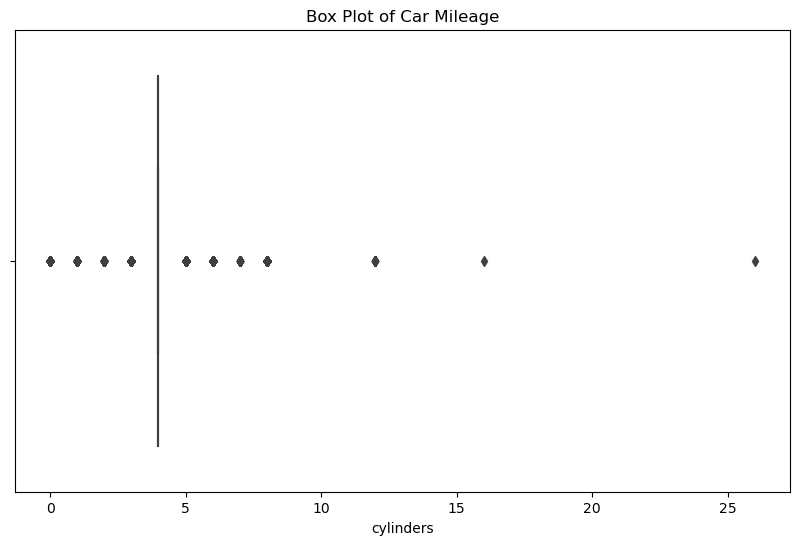

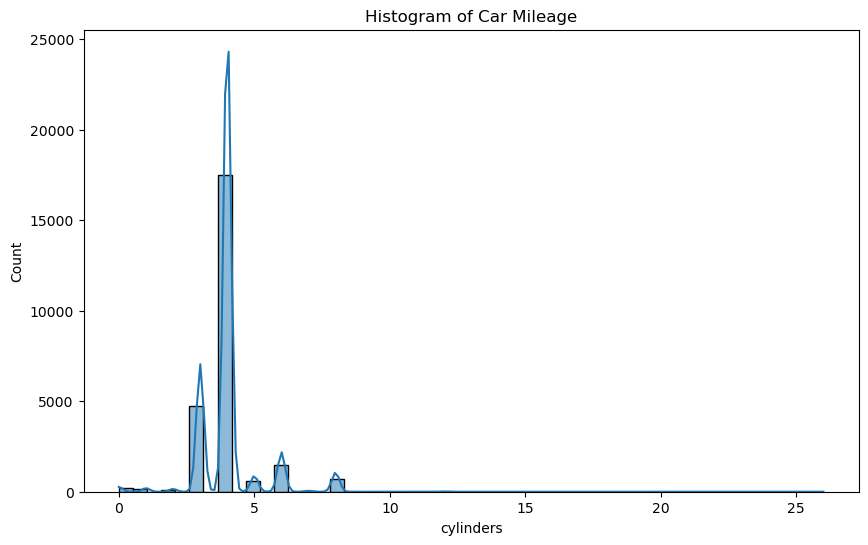

In [1899]:
# Box plot for mileage
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cylinders'])
plt.title('Box Plot of Car Mileage')
plt.show()

# Histogram for mileage
plt.figure(figsize=(10, 6))
sns.histplot(df['cylinders'], bins=50, kde=True)
plt.title('Histogram of Car Mileage')
plt.show()

In [1900]:
df.cylinders.describe()

count    25474.000000
mean         4.021512
std          1.063858
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         26.000000
Name: cylinders, dtype: float64

In [1901]:
# Find the row with the minimum cylinders
max_cylinders_row = df[df['cylinders'] == df['cylinders'].max()]
max_cylinders_row[['make_model', 'cylinders', 'power_kW', 'engine_size', 'co2_emissions', 'fuel_consumption_comb', 'empty_weight', 'body_type']]

make_model  cylinders  power_kW  engine_size  co2_emissions  \
21011  Renault Megane       26.0      12.0       1998.0          183.0   

       fuel_consumption_comb  empty_weight body_type  
21011               7.520714        1374.0     Coupe

In [1902]:
outliers_cylinders = max_cylinders_row.index
outliers_cylinders

Index([21011], dtype='int64')

#### * The row for the "Renault Megane" model with 26 cylinders and other corresponding attributes is considered an outlier due to the exceptionally high number of cylinders. Having 26 cylinders is highly uncommon and impractical for a passenger vehicle, deviating significantly from the typical range of cylinder counts seen in the dataset. This makes it an extreme and unusual case, thus classified as an outlier.

In [1904]:
# Calculate Z-scores for mileage
df['cylinders_zscore'] = stats.zscore(df['cylinders'])

# Define a threshold for Z-score, typically 3 or -3
threshold = 3

# Identify mileage outliers for both positive and negative thresholds
cylinders_outliers = df[(np.abs(df['cylinders_zscore']) > threshold) | (df['cylinders_zscore'] < -threshold)]
print(f"Number of mileage outliers detected: {len(cylinders_outliers)}")

# Display the mileage outliers
cylinders_outliers

Number of mileage outliers detected: 910


make_model    price     body_type             type  doors warranty  \
485         Fiat 500e  31900.0   Convertible   Pre-registered    2.0      Yes   
491         Fiat 500e  29550.0         Sedan   Pre-registered    3.0      Yes   
493         Fiat 500e  26400.0         Sedan             Used    3.0      Yes   
494         Fiat 500e  25400.0         Sedan   Pre-registered    3.0      Yes   
495         Fiat 500e  30900.0         Sedan   Pre-registered    3.0      Yes   
...               ...      ...           ...              ...    ...      ...   
26847        Ford  V8  40000.0   Convertible             Used    2.0       No   
26848        Ford  V8  54990.0   Convertible             Used    2.0       No   
26849        Ford  V8  49900.0   Convertible             Used    2.0       No   
26850  Ford  Roadster  40000.0   Convertible             Used    2.0       No   
26852          Ford M  20000.0   Convertible             Used    4.0       No   

       mileage    gearbox fuel_type colour  ... energy_efficiency_class  \
485       10.0  Automatic  Electric   Blue  ...               Efficient   
491        1.0  Automatic  Electric   Blue  ...               Efficient   
493     2500.0  Automatic  Electric  White  ...               Efficient   
494       10.0  Automatic  Electric   Grey  ...               Efficient   
495       10.0  Automatic  Electric   Blue  ...               Efficient   
...        ...        ...       ...    ...  ...                     ...   
26847  15000.0     Manual   Benzine  Black  ...               Efficient   
26848  25600.0  Automatic   Benzine    Red  ...               Efficient   
26849   3500.0  Automatic   Benzine  Black  ...               Efficient   
26850  60000.0     Manual   Benzine  Black  ...               Efficient   
26852  65515.0     Manual   Benzine  Green  ...               Efficient   

      safety_security_package  comfort_convenience_package  ent_media_package  \
485                  Advanced                     Advanced           Advanced   
491                  Advanced                     Advanced           Advanced   
493                  Advanced                     Advanced           Advanced   
494                  Advanced                     Advanced           Advanced   
495                  Advanced                     Advanced           Advanced   
...                       ...                          ...                ...   
26847                Enhanced                     Enhanced           Enhanced   
26848                Enhanced                     Enhanced           Enhanced   
26849                Enhanced                     Enhanced           Enhanced   
26850                Enhanced                        Basic           Enhanced   
26852                Enhanced                        Basic           Enhanced   

       num_of_extras  index z_score_gears  price_zscore  mileage_zscore  \
485              5.0    NaN     -3.195446      0.329741       -1.055646   
491              5.0    NaN     -3.195446      0.237085       -1.055780   
493              5.0    NaN     -3.195446      0.112887       -1.018551   
494              5.0    NaN     -3.195446      0.073459       -1.055646   
495              5.0    NaN     -3.195446      0.290313       -1.055646   
...              ...    ...           ...           ...             ...   
26847            3.0    NaN     -1.876651      0.649108       -0.832334   
26848            3.0    NaN     -1.876651      1.240133       -0.674421   
26849            3.0    NaN     -1.876651      1.039445       -1.003654   
26850            3.0    NaN     -1.876651      0.649108       -0.161951   
26852            3.0    NaN      0.101540     -0.139452       -0.079792   

      cylinders_zscore  
485          -3.780194  
491          -3.780194  
493          -3.780194  
494          -3.780194  
495          -3.780194  
...                ...  
26847         3.739751  
26848         3.739751  
26849         3.739751  
26850        

In [1905]:
df.cylinders.value_counts()

cylinders
4.0     17478
3.0      4752
6.0      1473
8.0       717
5.0       590
0.0       180
1.0       134
2.0       103
7.0        34
12.0       11
26.0        1
16.0        1
Name: count, dtype: int64

[Types of Car Engines](https://www.spinny.com/blog/index.php/types-of-car-engines/)

In [1907]:
df[df['fuel_type'] == 'Electric']

make_model    price          body_type             type  doors  \
280     Dacia Spring  18490.0   Off-Road/Pick-up             Used    5.0   
281     Dacia Spring  22980.0   Off-Road/Pick-up    Demonstration    5.0   
282     Dacia Spring  21599.0              Sedan   Employee's car    5.0   
283     Dacia Spring  21599.0              Sedan   Employee's car    5.0   
284     Dacia Spring  21599.0              Sedan   Employee's car    5.0   
...              ...      ...                ...              ...    ...   
23233   Toyota Prius  11400.0            Compact             Used    5.0   
23234   Toyota Prius  11950.0            Compact             Used    5.0   
23235   Toyota Prius  14690.0              Sedan             Used    5.0   
23236  Toyota Prius+  13490.0              Sedan             Used    5.0   
26855  Hyundai IONIQ  26991.0              Sedan             Used    5.0   

      warranty   mileage    gearbox fuel_type  colour  ...  \
280         No    5800.0  Automatic  Electric  Silver  ...   
281         No    5000.0  Automatic  Electric   White  ...   
282         No     500.0  Automatic  Electric     Red  ...   
283         No     500.0  Automatic  Electric    Blue  ...   
284         No     500.0  Automatic  Electric    Blue  ...   
...        ...       ...        ...       ...     ...  ...   
23233       No  124987.0  Automatic  Electric  Silver  ...   
23234       No   87775.0  Automatic  Electric   Black  ...   
23235      Yes   81700.0  Automatic  Electric   Black  ...   
23236       No   96057.0  Automatic  Electric   Black  ...   
26855       No   29961.0  Automatic  Electric    Grey  ...   

      energy_efficiency_class safety_security_package  \
280                 Efficient                Advanced   
281                 Efficient                Enhanced   
282                 Efficient                Advanced   
283                 Efficient                Advanced   
284                 Efficient                Advanced   
...                       ...                     ...   
23233               Efficient                Enhanced   
23234               Efficient                Advanced   
23235               Efficient                Advanced   
23236               Efficient                Advanced   
26855               Efficient                Advanced   

       comfort_convenience_package  ent_media_package  num_of_extras  index  \
280                       Advanced           Advanced            5.0    NaN   
281                       Enhanced           Advanced            5.0    NaN   
282                       Enhanced           Advanced            5.0    NaN   
283                       Enhanced           Advanced            5.0    NaN   
284                       Enhanced           Advanced            5.0    NaN   
...                            ...                ...            ...    ...   
23233                     Advanced           Advanced            2.0    NaN   
23234                     Advanced           Enhanced            2.0    NaN   
23235                     Advanced           Advanced            2.0    NaN   
23236                     Advanced           Advanced            3.0    NaN   
26855                     Advanced           Advanced            3.0    NaN   

      z_score_gears  price_zscore  mileage_zscore cylinders_zscore  
280       -3.195446     -0.198988       -0.969390        -2.840201  
281       -3.195446     -0.021957       -0.981308        -2.840201  
282       -3.195446     -0.076407       -1.048346        -2.840201  
283       -3.195446     -0.076407       -1.048346        -2.840201  
284       -3.195446     -0.076407       -1.048346        -2.840201  
...             ...           ...             ...              ...  
23233     -3.195446     -0.478533        0.806187        -0.020221  
23234     -3.195446     -0.456847        0.251825        -0.020221  
23235     -3.195446     -0.348815        0.161323        -0.020221  
23236      0.101540     -0.3

In [1908]:
cylinders0 = df[df['cylinders'] == 0.0][['make_model', 'cylinders', 'power_kW', 'engine_size', 
                                         'co2_emissions', 'fuel_consumption_comb', 'empty_weight',
                                         'body_type', 'fuel_type']]
cylinders0

make_model  cylinders  power_kW  engine_size  co2_emissions  \
485               Fiat 500e        0.0      87.0       1000.0            0.0   
491               Fiat 500e        0.0      43.0       1000.0            0.0   
493               Fiat 500e        0.0      43.0       1000.0            0.0   
494               Fiat 500e        0.0      43.0       1000.0            0.0   
495               Fiat 500e        0.0      87.0       1000.0            0.0   
...                     ...        ...       ...          ...            ...   
22715           Peugeot RCZ        0.0     115.0       1598.0          155.0   
24091            Fiat Punto        0.0      48.0       1242.0          140.0   
25751         Hyundai Excel        0.0      65.0       1495.0            0.0   
26486  Mercedes-Benz SL 280        0.0     136.0       2717.0            0.0   
26692       Fiat 124 Spider        0.0      65.0       1400.0           80.0   

       fuel_consumption_comb  empty_weight     body_type fuel_type  
485                 3.447727        1370.0   Convertible  Electric  
491                 3.447727        1370.0         Sedan  Electric  
493                 3.447727        1370.0         Sedan  Electric  
494                 3.447727        1370.0         Sedan  Electric  
495                 3.447727        1370.0         Sedan  Electric  
...                      ...           ...           ...       ...  
22715               6.700000        1333.0         Coupe   Benzine  
24091               5.900000        1090.0         Coupe   Benzine  
25751               6.698559         905.0         Coupe   Benzine  
26486               6.698559        1690.0   Convertible   Benzine  
26692               6.425641        1081.0   Convertible   Benzine  

[180 rows x 9 columns]

In [1909]:
cylinders0[cylinders0['fuel_type'] != 'Electric']

make_model  cylinders  power_kW  engine_size  co2_emissions  \
6539            Hyundai i30        0.0     202.0       1998.0          183.0   
15587  Mercedes-Benz AMG GT        0.0     340.0       3982.0          216.0   
22715           Peugeot RCZ        0.0     115.0       1598.0          155.0   
24091            Fiat Punto        0.0      48.0       1242.0          140.0   
25751         Hyundai Excel        0.0      65.0       1495.0            0.0   
26486  Mercedes-Benz SL 280        0.0     136.0       2717.0            0.0   
26692       Fiat 124 Spider        0.0      65.0       1400.0           80.0   

       fuel_consumption_comb  empty_weight     body_type fuel_type  
6539                6.373894        1386.0         Sedan   Benzine  
15587               9.300000        1615.0         Coupe   Benzine  
22715               6.700000        1333.0         Coupe   Benzine  
24091               5.900000        1090.0         Coupe   Benzine  
25751               6.698559         905.0         Coupe   Benzine  
26486               6.698559        1690.0   Convertible   Benzine  
26692               6.425641        1081.0   Convertible   Benzine

In [1910]:
outliers_cylenders2 = cylinders0[cylinders0['fuel_type'] != 'Electric'].index
outliers_cylenders2

Index([6539, 15587, 22715, 24091, 25751, 26486, 26692], dtype='int64')

#### * The `outliers_cylinders2` variable contains the rows where the cylinder count is 0. Since the vehicles with 0 cylinders are expected to be electric cars, any non-electric vehicle with 0 cylinders is considered an outlier. This is because non-electric vehicles typically have a positive cylinder count, and a 0-cylinder configuration would be unusual and impractical for them, thus classified as an outlier.

In [1912]:
cylinders1 = df[df['cylinders'] == 1.0][['make_model', 'cylinders', 'power_kW', 'engine_size', 
                                         'co2_emissions', 'fuel_consumption_comb', 'empty_weight',
                                         'body_type', 'fuel_type']]
cylinders1

make_model  cylinders  power_kW  engine_size  co2_emissions  \
280     Dacia Spring        1.0      32.0       1000.0            0.0   
281     Dacia Spring        1.0      33.0       1000.0            0.0   
282     Dacia Spring        1.0      33.0       1000.0            0.0   
283     Dacia Spring        1.0      33.0       1000.0            0.0   
284     Dacia Spring        1.0      33.0       1000.0            0.0   
...              ...        ...       ...          ...            ...   
20302  Renault Twizy        1.0       8.0       2330.0            0.0   
21656  Renault Twizy        1.0      12.0       1343.0            0.0   
21657  Renault Twizy        1.0       4.0       2330.0            0.0   
21658  Renault Twizy        1.0       8.0       1693.0            0.0   
26294    Renault R 5        1.0      43.0       1400.0           80.0   

       fuel_consumption_comb  empty_weight          body_type fuel_type  
280                 3.447727        1037.0   Off-Road/Pick-up  Electric  
281                 3.447727        1045.0   Off-Road/Pick-up  Electric  
282                 3.447727        1037.0              Sedan  Electric  
283                 3.447727        1037.0              Sedan  Electric  
284                 3.447727        1037.0              Sedan  Electric  
...                      ...           ...                ...       ...  
20302               3.447727         479.0              Coupe  Electric  
21656               3.447727         479.0            Compact  Electric  
21657               3.447727         479.0              Coupe  Electric  
21658               3.447727         347.0   Off-Road/Pick-up  Electric  
26294               6.800000        1416.0              Coupe   Benzine  

[134 rows x 9 columns]

In [1913]:
cylinders1['make_model'].unique()

array(['Dacia Spring', 'Fiat 500e', 'Hyundai IONIQ 5',
       'Mercedes-Benz EQA', 'Mercedes-Benz EQB 350',
       'Mercedes-Benz EQC 400', 'Renault Twizy', 'Hyundai IONIQ',
       'Nissan E-NV200', 'Nissan Leaf', 'Renault ZOE', 'Renault R 5'],
      dtype=object)

[Dacia Spring](https://ev-database.org/car/1319/Dacia-Spring-Electric)

[RENAULT TWIZY](https://blog.renault.de/neues-von-renault-so-funktioniert-das-elektroauto-twizy-und-das-aufladen/)

In [1916]:
indices = df[(df['cylinders'] == 1) & (df['fuel_type'] == 'Electric')].index
indices

Index([  280,   281,   282,   283,   284,   285,   286,   287,   288,   468,
       ...
       15837, 16531, 18137, 18138, 19386, 19752, 20302, 21656, 21657, 21658],
      dtype='int64', length=133)

In [1917]:
df.loc[indices, 'cylinders'] = 0

In [1918]:
indices

Index([  280,   281,   282,   283,   284,   285,   286,   287,   288,   468,
       ...
       15837, 16531, 18137, 18138, 19386, 19752, 20302, 21656, 21657, 21658],
      dtype='int64', length=133)

In [1919]:
cylinders1

make_model  cylinders  power_kW  engine_size  co2_emissions  \
280     Dacia Spring        1.0      32.0       1000.0            0.0   
281     Dacia Spring        1.0      33.0       1000.0            0.0   
282     Dacia Spring        1.0      33.0       1000.0            0.0   
283     Dacia Spring        1.0      33.0       1000.0            0.0   
284     Dacia Spring        1.0      33.0       1000.0            0.0   
...              ...        ...       ...          ...            ...   
20302  Renault Twizy        1.0       8.0       2330.0            0.0   
21656  Renault Twizy        1.0      12.0       1343.0            0.0   
21657  Renault Twizy        1.0       4.0       2330.0            0.0   
21658  Renault Twizy        1.0       8.0       1693.0            0.0   
26294    Renault R 5        1.0      43.0       1400.0           80.0   

       fuel_consumption_comb  empty_weight          body_type fuel_type  
280                 3.447727        1037.0   Off-Road/Pick-up  Electric  
281                 3.447727        1045.0   Off-Road/Pick-up  Electric  
282                 3.447727        1037.0              Sedan  Electric  
283                 3.447727        1037.0              Sedan  Electric  
284                 3.447727        1037.0              Sedan  Electric  
...                      ...           ...                ...       ...  
20302               3.447727         479.0              Coupe  Electric  
21656               3.447727         479.0            Compact  Electric  
21657               3.447727         479.0              Coupe  Electric  
21658               3.447727         347.0   Off-Road/Pick-up  Electric  
26294               6.800000        1416.0              Coupe   Benzine  

[134 rows x 9 columns]

In [1920]:
outliers_cylenders3 = cylinders1[cylinders1['fuel_type'] == 'Electric'].index
outliers_cylenders3

Index([  280,   281,   282,   283,   284,   285,   286,   287,   288,   468,
       ...
       15837, 16531, 18137, 18138, 19386, 19752, 20302, 21656, 21657, 21658],
      dtype='int64', length=133)

In [1921]:
df[(df['cylinders'] == 1) & (df['fuel_type'] == 'Electric')]

Empty DataFrame
Columns: [make_model, price, body_type, type, doors, warranty, mileage, gearbox, fuel_type, colour, paint, seller, seats, engine_size, gears, co2_emissions, drivetrain, cylinders, empty_weight, service_history, non_smoker, emission_sticker, upholstery_color, upholstery, available, taxi_rental, power_kW, fuel_consumption_comb, location_country, age, inspection_status, energy_efficiency_class, safety_security_package, comfort_convenience_package, ent_media_package, num_of_extras, index, z_score_gears, price_zscore, mileage_zscore, cylinders_zscore]
Index: []

[0 rows x 41 columns]

In [1922]:
cylinders6 = df[df['cylinders'] == 6.0][['make_model', 'cylinders', 'power_kW', 'engine_size', 
                                         'co2_emissions', 'fuel_consumption_comb', 'empty_weight',
                                         'body_type']]
cylinders6

make_model  cylinders    power_kW  engine_size  co2_emissions  \
32          Dacia Duster        6.0   85.133333       1461.0          106.0   
34          Dacia Duster        6.0   85.133333       1461.0          106.0   
40          Dacia Duster        6.0   85.133333       1461.0          106.0   
43          Dacia Duster        6.0   85.133333       1461.0          106.0   
48          Dacia Duster        6.0   85.133333       1461.0          106.0   
...                  ...        ...         ...          ...            ...   
26798              Fiat         6.0   77.000000       2279.0          152.0   
26805  Mercedes-Benz 220        6.0  120.000000       2180.0            0.0   
26806       Ford  T-Bird        6.0  221.000000       2191.0          131.0   
26824  Mercedes-Benz 220        6.0   78.000000       2200.0          108.0   
26840  Mercedes-Benz 220        6.0   63.000000       2200.0          108.0   

       fuel_consumption_comb  empty_weight          body_type  
32                  4.584946        1305.0   Off-Road/Pick-up  
34                  4.584946        1305.0   Off-Road/Pick-up  
40                  4.584946        1305.0   Off-Road/Pick-up  
43                  4.584946        1305.0   Off-Road/Pick-up  
48                  4.584946        1305.0   Off-Road/Pick-up  
...                      ...           ...                ...  
26798               8.900000        1285.0              Coupe  
26805               6.698559        1390.0              Coupe  
26806               6.698559        1444.0        Convertible  
26824               6.698559        1390.0        Convertible  
26840               6.698559        1390.0        Convertible  

[1473 rows x 8 columns]

In [1923]:
cylinders6['make_model'].unique()

array(['Dacia Duster', 'Ford Bronco', 'Ford Explorer', 'Ford F 150',
       'Ford F 150 V6', 'Ford Mustang', 'Mercedes-Benz ',
       'Mercedes-Benz  S 580e', 'Mercedes-Benz AMG GT',
       'Mercedes-Benz AMG GT V8', 'Mercedes-Benz C 400',
       'Mercedes-Benz C 43 AMG', 'Mercedes-Benz CLS 400',
       'Mercedes-Benz CLS 450', 'Mercedes-Benz CLS 53 AMG',
       'Mercedes-Benz E 400', 'Mercedes-Benz E 450',
       'Mercedes-Benz E 53 AMG', 'Mercedes-Benz EQB 350',
       'Mercedes-Benz EQE 350', 'Mercedes-Benz EQE 43',
       'Mercedes-Benz EQS', 'Mercedes-Benz G 400',
       'Mercedes-Benz GLC 400', 'Mercedes-Benz GLC 43 AMG',
       'Mercedes-Benz GLE 400', 'Mercedes-Benz GLE 53 AMG',
       'Mercedes-Benz GLS 400', 'Mercedes-Benz S 350',
       'Mercedes-Benz S 400', 'Mercedes-Benz S 580',
       'Toyota Land Cruiser', 'Toyota Supra', 'Mercedes-Benz E 50 AMG',
       'Mercedes-Benz EQA 250', 'Mercedes-Benz GLB 180',
       'Mercedes-Benz GLE 350', 'Mercedes-Benz S 500',
       'Merc

In [1924]:
# cylinders6[cylinders6['make_model'] == 'Dacia Duster', 'Fiat Coupe']

In [1925]:
cylinders16 = df[df['cylinders'] == 16.0][['make_model', 'cylinders', 'power_kW', 'engine_size', 
                                         'co2_emissions', 'fuel_consumption_comb', 'empty_weight',
                                         'body_type', 'fuel_type']]
cylinders16

make_model  cylinders  power_kW  engine_size  co2_emissions  \
24729  Hyundai Matrix       16.0      77.0       1599.0          183.0   

       fuel_consumption_comb  empty_weight body_type fuel_type  
24729               6.698559        1359.0     Sedan   Benzine

In [1926]:
outliers_cylenders5 = cylinders16[cylinders16['cylinders'] == 16.0].index
outliers_cylenders5

Index([24729], dtype='int64')

In [1927]:
cylinders26 = df[df['cylinders'] == 26.0][['make_model', 'cylinders', 'power_kW', 'engine_size', 
                                         'co2_emissions', 'fuel_consumption_comb', 'empty_weight',
                                         'body_type', 'fuel_type']]
cylinders26

make_model  cylinders  power_kW  engine_size  co2_emissions  \
21011  Renault Megane       26.0      12.0       1998.0          183.0   

       fuel_consumption_comb  empty_weight body_type fuel_type  
21011               7.520714        1374.0     Coupe   Benzine

In [1928]:
outliers_cylenders6 = cylinders26[cylinders26['cylinders'] == 26.0].index
outliers_cylenders6

Index([21011], dtype='int64')

# Categorical Data Analysis

## 4. Make_Model

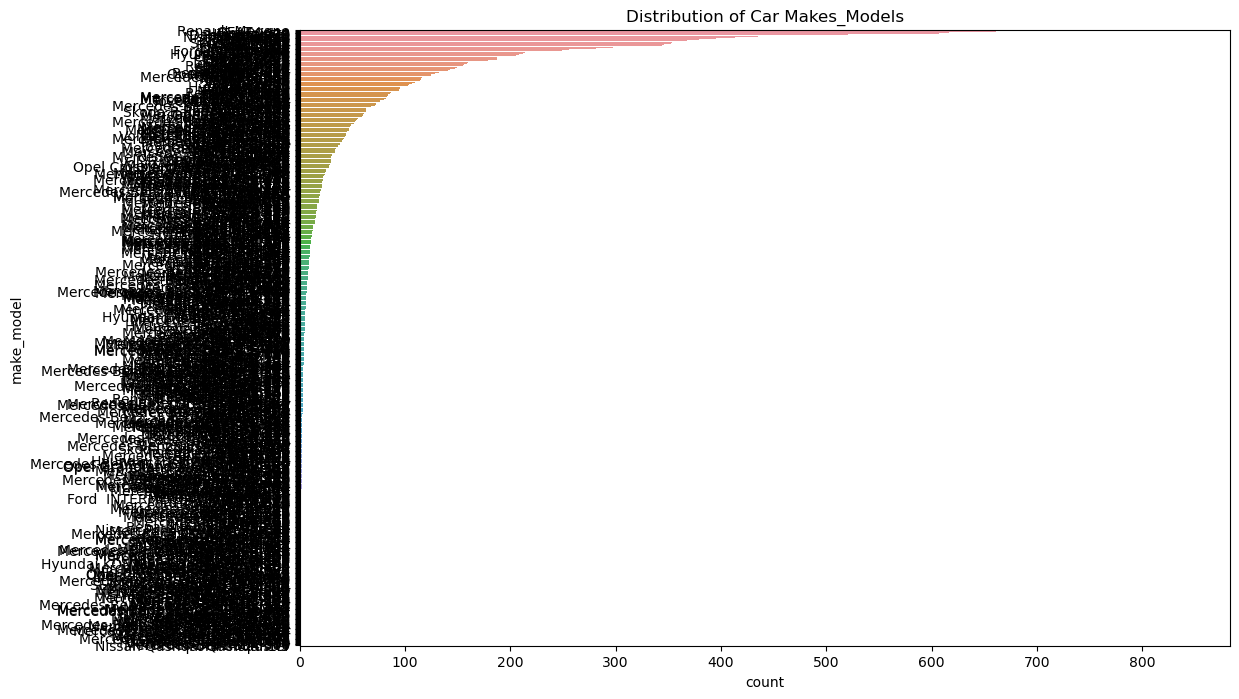

In [1931]:
# Count plot for car make_models
plt.figure(figsize=(12, 8))
sns.countplot(y=df['make_model'], order=df['make_model'].value_counts().index)
plt.title('Distribution of Car Makes_Models')
plt.show()

## Plotting the Top N Most Frequent Car Models

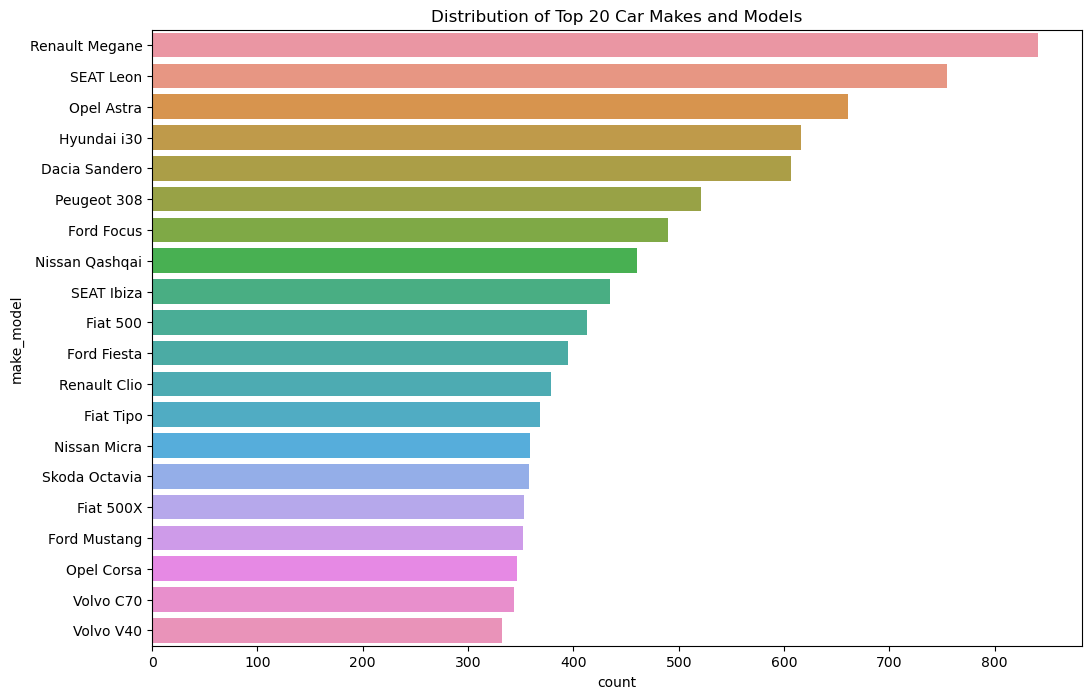

In [1933]:
# Get the top 20 most frequent car models
top_n = 20
top_models = df['make_model'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top N models
filtered_data = df[df['make_model'].isin(top_models)]

# Count plot for the top N car models
plt.figure(figsize=(12, 8))
sns.countplot(y=filtered_data['make_model'], order=filtered_data['make_model'].value_counts().index)
plt.title('Distribution of Top 20 Car Makes and Models')
plt.show()

## Grouping by Car Make

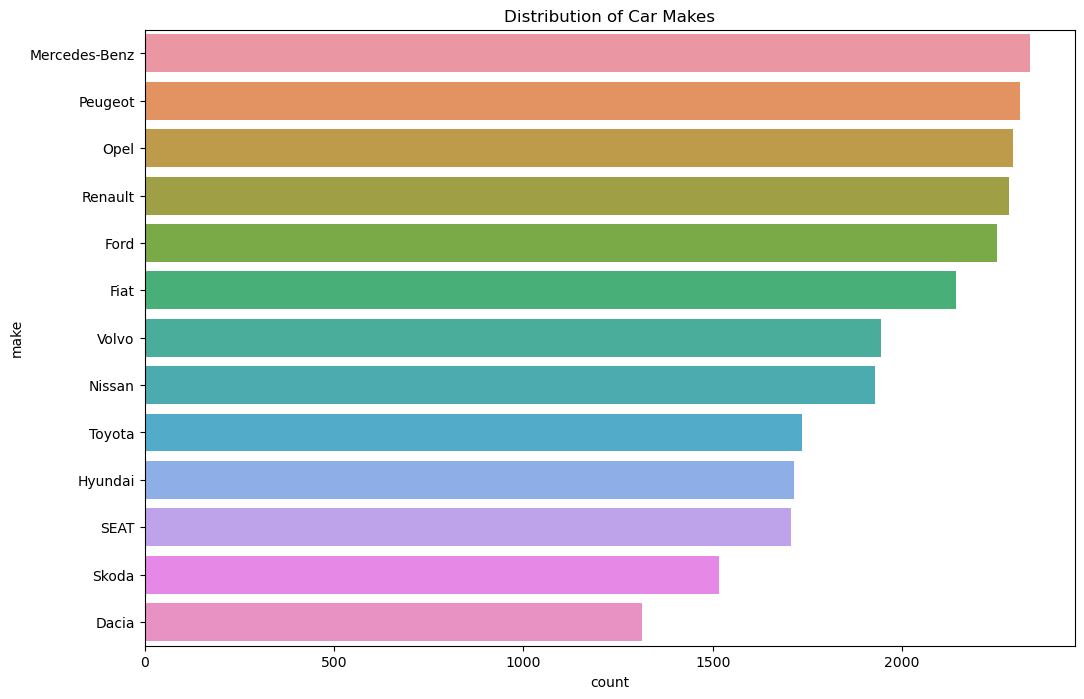

In [1935]:
# Extract car make from make_model (assuming the format is 'Make Model')
df['make'] = df['make_model'].apply(lambda x: x.split()[0])

# Count plot for car makes
plt.figure(figsize=(12, 8))
sns.countplot(y=df['make'], order=df['make'].value_counts().index)
plt.title('Distribution of Car Makes')
plt.show()

## 5. Body Type

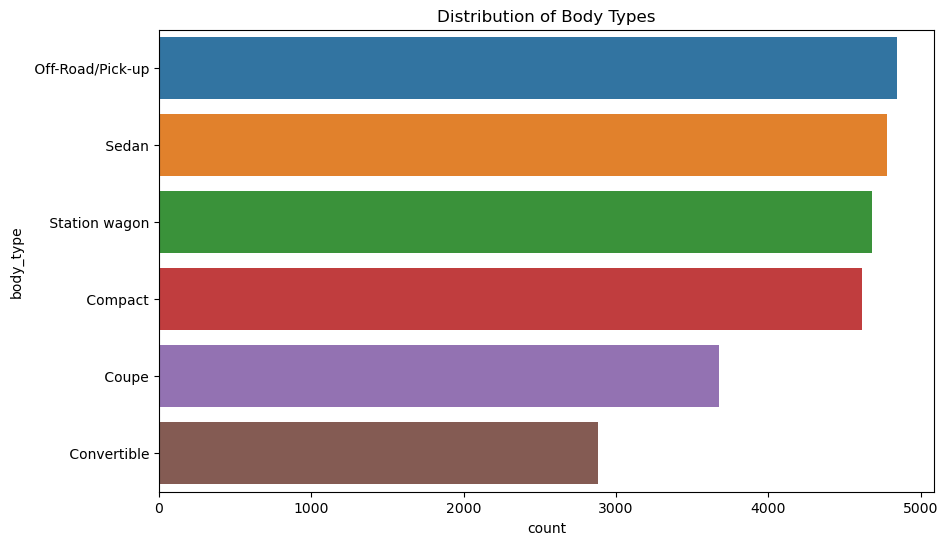

In [1937]:
# Count plot for body types
plt.figure(figsize=(10, 6))
sns.countplot(y=df['body_type'], order=df['body_type'].value_counts().index)
plt.title('Distribution of Body Types')
plt.show()

## 6. Gearbox Type

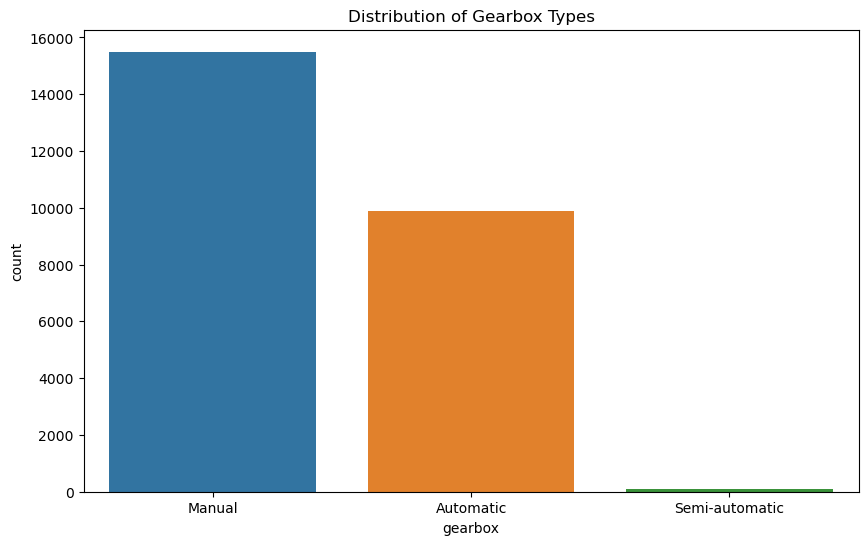

In [1939]:
# Count plot for gearbox types
plt.figure(figsize=(10, 6))
sns.countplot(x=df['gearbox'], order=df['gearbox'].value_counts().index)
plt.title('Distribution of Gearbox Types')
plt.show()

## 7. Fuel_Type

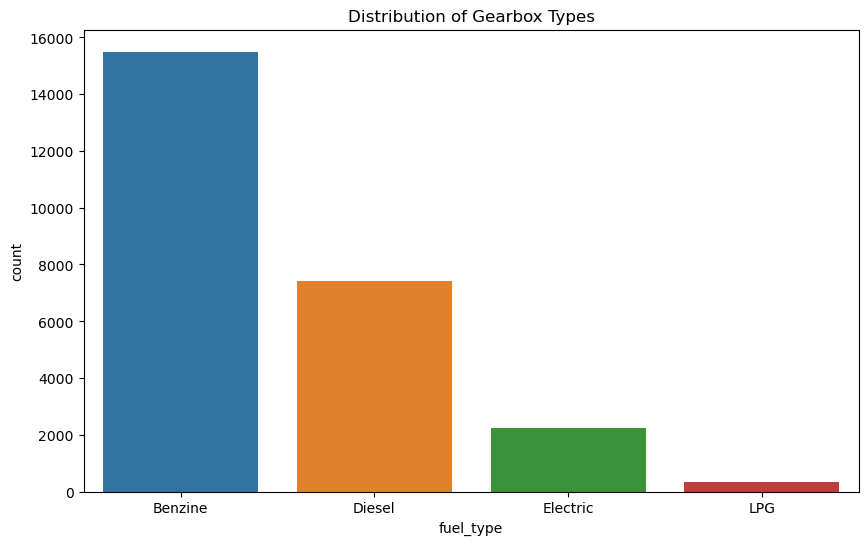

In [1941]:
# Count plot for fuel_type types
plt.figure(figsize=(10, 6))
sns.countplot(x=df['fuel_type'], order=df['fuel_type'].value_counts().index)
plt.title('Distribution of Gearbox Types')
plt.show()

## 8. Type

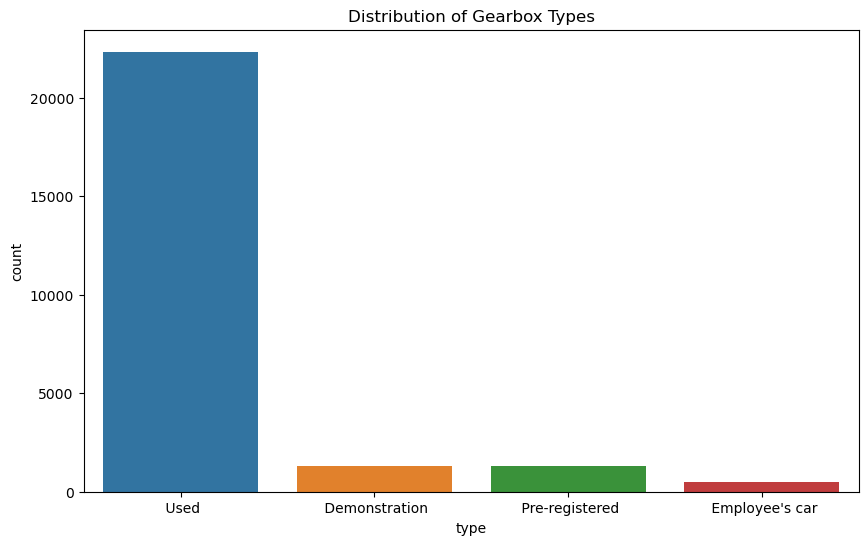

In [1943]:
# Count plot for type types
plt.figure(figsize=(10, 6))
sns.countplot(x=df['type'], order=df['type'].value_counts().index)
plt.title('Distribution of Gearbox Types')
plt.show()

## 9. Warranty

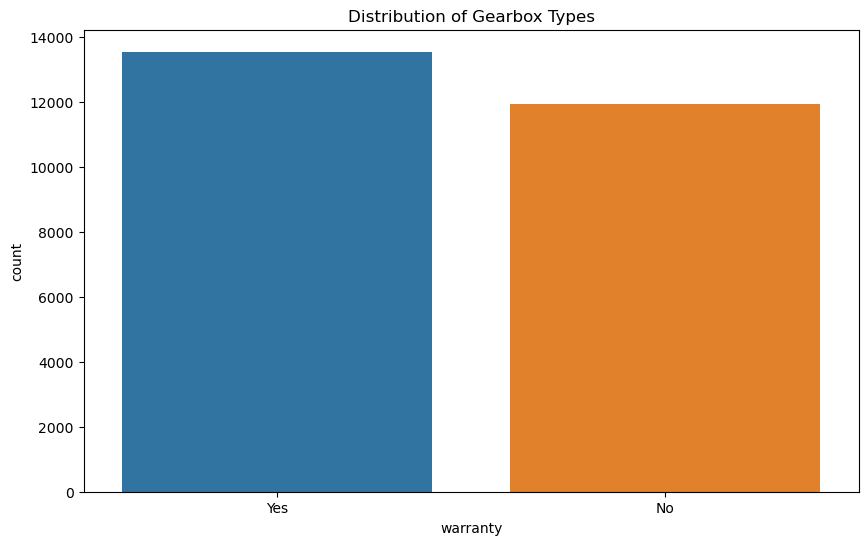

In [1945]:
# Count plot for warranty types
plt.figure(figsize=(10, 6))
sns.countplot(x=df['warranty'], order=df['warranty'].value_counts().index)
plt.title('Distribution of Gearbox Types')
plt.show()

In [1946]:
df.cylinders.value_counts()

cylinders
4.0     17478
3.0      4752
6.0      1473
8.0       717
5.0       590
0.0       313
2.0       103
7.0        34
12.0       11
26.0        1
16.0        1
1.0         1
Name: count, dtype: int64

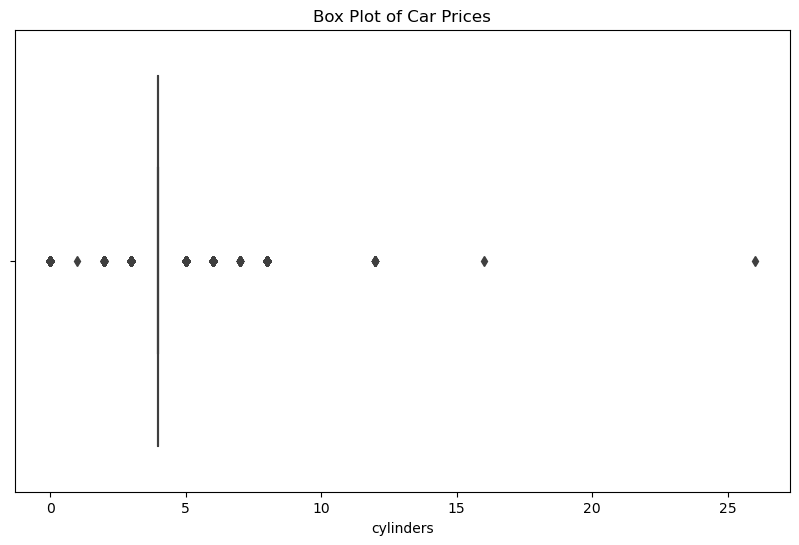

In [1947]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['cylinders'])
plt.title('Box Plot of Car Prices')
plt.show()

In [1948]:
# Assuming outliers
indices_to_drop = (outliers_mileage.tolist() + outliers_mileage2.tolist() +  
                   outliers_mileage4.tolist() + outliers_mileage5.tolist() + outliers_mileage6.tolist() + 
                   outliers_mileage7.tolist() + outliers_mileage8.tolist() +
                   outliers_doors.tolist() )
len(indices_to_drop)

403

In [1949]:
df.drop(index= indices_to_drop,inplace=True)

# Power kW

Check the boxplot to see extreme values

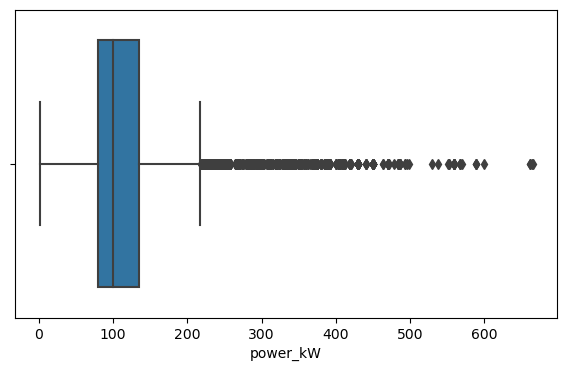

In [2234]:
box_plot_column_(df,'power_kW')

In [2236]:
# Calculate the 25th and 75th percentiles (Q1 and Q3)
Q1 = df['power_kW'].quantile(0.25)
Q3 = df['power_kW'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
upper_whisker=Q3 + (1.5 * IQR)
lower_whisker=Q1 - (1.5 * IQR)
print(upper_whisker,lower_whisker)

217.5 -2.5


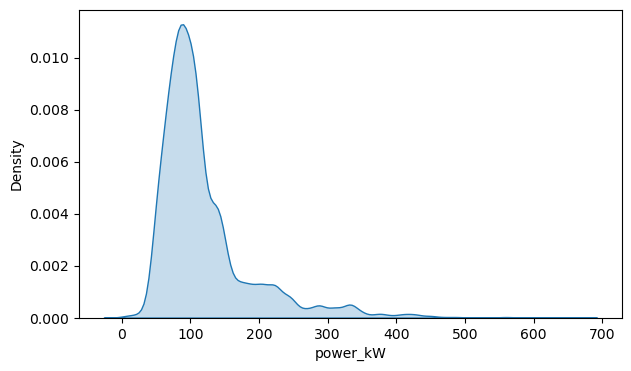

In [2237]:
kde_plot_column(df,'power_kW')

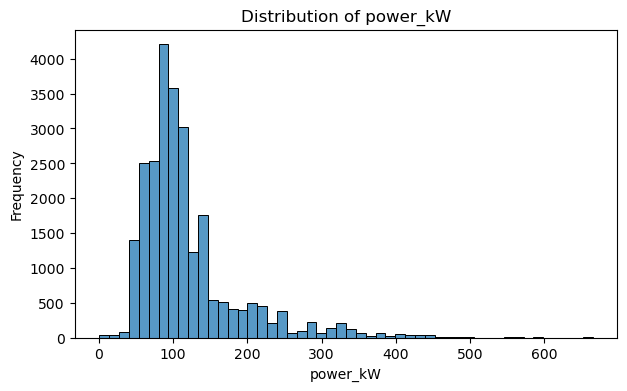

In [2238]:
hist_plot_column(df,'power_kW')

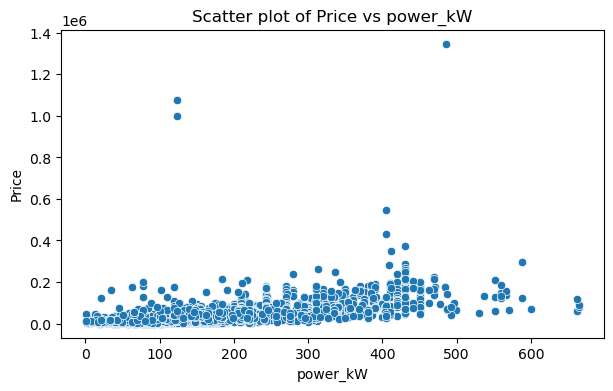

In [2239]:
scatter_plot_with_price(df,'power_kW')

In [2240]:
df.power_kW.describe()

count    25077.000000
mean       118.943354
std         68.454318
min          1.000000
25%         80.000000
50%        100.000000
75%        135.000000
max        665.000000
Name: power_kW, dtype: float64

In [2241]:
grouped_by_price(df,'power_kW')

price      power_kW  
490.0      70.000000     1
500.0      66.000000     2
590.0      66.000000     1
600.0      79.000000     2
699.0      79.000000     1
                        ..
430000.0   405.000000    1
549000.0   405.000000    1
998000.0   123.592744    1
1075900.0  123.592744    1
1346900.0  485.000000    1
Name: count, Length: 17338, dtype: int64

In [2242]:
grouped_by_column(df,'make_model', 'power_kW')

make_model    power_kW
Dacia         40.0         1
Dacia Dokker  75.0        10
              55.0        10
              70.0         9
              66.0         8
                          ..
Volvo XC90    188.0        1
              187.0        1
              184.0        1
              177.0        1
              300.0        1
Name: count, Length: 3658, dtype: int64

In [2243]:
grouped_average(df,'make_model', 'power_kW')

make_model
Dacia                       40.000000
Dacia Dokker                70.725490
Dacia Duster                84.849261
Dacia Duster Duster 1.5     79.333333
Dacia Jogger                80.200000
                              ...    
Volvo V90 Cross Country    159.363636
Volvo XC40                 133.067961
Volvo XC60                 187.841768
Volvo XC70                 144.466667
Volvo XC90                 194.271028
Name: power_kW, Length: 733, dtype: float64

In [2244]:
# Filter the DataFrame
greater_df = df[(df['power_kW'] > 450) ]
#Sort the filtered DataFrame by 'power_kW' in ascending order
sorted_greater_df = greater_df.sort_values(by='power_kW')

sorted_greater_df[['make_model','age','power_kW','fuel_type']]

make_model   age  power_kW fuel_type
17699           Mercedes-Benz S 65 AMG   6.0     463.0   Benzine
20753           Mercedes-Benz G 65 AMG   9.0     463.0   Benzine
1151                    Mercedes-Benz    0.0     470.0  Electric
1172              Mercedes-Benz AMG GT   0.0     470.0  Electric
1175              Mercedes-Benz AMG GT   0.0     470.0  Electric
9298              Mercedes-Benz AMG GT   3.0     470.0   Benzine
9296              Mercedes-Benz AMG GT   3.0     470.0   Benzine
9291              Mercedes-Benz AMG GT   3.0     470.0   Benzine
6614              Mercedes-Benz AMG GT   2.0     471.0   Benzine
20790                      Nissan GT-R   9.0     478.0   Benzine
1329                 Mercedes-Benz EQS   0.0     484.0  Electric
1340                 Mercedes-Benz EQS   0.0     484.0  Electric
1345                 Mercedes-Benz EQS   0.0     484.0  Electric
3491                           Ford GT   1.0     485.0   Benzine
20646                     Ford Mustang   9.0     487.0   Benzine
20645                     Ford Mustang   9.0     487.0   Benzine
6369                   Ford Mustang V8   2.0     487.0   Benzine
20638                     Ford Mustang   9.0     487.0   Benzine
23006                      Nissan GT-R  13.0     492.5   Benzine
20639                     Ford Mustang   9.0     493.0   Benzine
17721                   Nissan GT-R V6   6.0     496.0   Benzine
12253                     Ford Mustang   4.0     499.0   Benzine
18744                     Ford Mustang   7.0     530.0   Benzine
17697           Mercedes-Benz S 63 AMG   6.0     537.0   Benzine
6336                      Ford Mustang   2.0     551.0   Benzine
3629                   Ford Mustang V8   1.0     552.0   Benzine
15354                     Ford Mustang   5.0     552.0   Benzine
6337                      Ford Mustang   2.0     559.0   Benzine
6368                   Ford Mustang V8   2.0     559.0   Benzine
3625                   Ford Mustang V8   1.0     559.0   Benzine
3622                   Ford Mustang V8   1.0     559.0   Benzine
3590                      Ford Mustang   1.0     559.0   Benzine
3586                      Ford Mustang   1.0     559.0   Benzine
8885                      Ford Mustang   3.0     559.0   Benzine
743                       Ford Mustang   0.0     567.0   Benzine
3618                   Ford Mustang V8   1.0     567.0   Benzine
3607                   Ford Mustang V8   1.0     567.0   Benzine
25916                   Nissan Skyline  26.0     570.0   Benzine
4144   Mercedes-Benz GLE 63 AMG GLE 63   1.0     588.0   Benzine
4143   Mercedes-Benz GLE 63 AMG GLE 63   1.0     588.0   Benzine
19995                      Nissan GT-R   8.0     588.0   Benzine
23007                      Nissan GT-R  13.0     600.0   Benzine
20644                     Ford Mustang   9.0     662.0   Benzine
26150                     Toyota Supra  29.0     662.0   Benzine
23009                      Nissan GT-R  13.0     664.0   Benzine
22563                   Nissan GT-R V6  12.0     665.0   Benzine

In [2245]:
greater_df.shape

(46, 42)

In [2246]:
# Assuming greater_df is a DataFrame containing the indexes of rows with power_kW greater than a certain threshold
greater_indexes = greater_df['power_kW'].index

# Assign NaN to the 'power_kW' column for the specified rows
df.loc[greater_indexes, 'power_kW'] = np.nan

In [2247]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                          46
f

In [2248]:
# Filter the DataFrameElectric
less_df = df[ (df['power_kW'] < 4) & (df['fuel_type'] =='Electric')]
#Sort the filtered DataFrame by 'power_kW' in ascending order
sorted_less_df = less_df.sort_values(by='power_kW')



sorted_less_df[['make_model','age','power_kW','fuel_type']]

#sorted_filtered_df[['make_model','age','power_kW','fuel_type']]

make_model  age  power_kW fuel_type
13531       Renault   4.0       1.0  Electric
16531  Renault Twizy  5.0       1.0  Electric

In [2249]:
# Assuming greater_df is a DataFrame containing the indexes of rows with power_kW greater than a certain threshold
less_indexes = less_df['power_kW'].index

# Assign NaN to the 'power_kW' column for the specified rows
df.loc[less_indexes, 'power_kW'] = np.nan

In [2250]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                          48
f

In [2251]:
# Filter the DataFrameElectric
other_df = df[ (df['power_kW'] < 30) & (df['fuel_type'] !='Electric')]
#Sort the filtered DataFrame by 'power_kW' in ascending order
sorted_other_df = other_df.sort_values(by='power_kW')
# Combine these indices with the filtered DataFrame indices

sorted_other_df[['make_model','age','power_kW','fuel_type']]
#sorted_filtered_df[['make_model','age','power_kW','fuel_type']]

make_model   age  power_kW fuel_type
26853             Ford   94.0       1.0   Benzine
26532       Opel Kadett  46.0       1.0   Benzine
26186       Peugeot 205  30.0       1.0   Benzine
3501          Ford Kuga   1.0       3.0    Diesel
9077        Hyundai i20   3.0       6.0   Benzine
24365    Renault Megane  16.0       7.0   Benzine
26843       Peugeot 504  76.0       7.0   Benzine
23950    Renault Megane  15.0       8.0    Diesel
26652          Fiat 850  53.0       9.0   Benzine
26570          Fiat 500  49.0      10.0   Benzine
21011    Renault Megane   9.0      12.0   Benzine
26760          Fiat 500  57.0      13.0   Benzine
26635         Fiat 500L  52.0      13.0   Benzine
26634          Fiat 500  52.0      13.0   Benzine
26633          Fiat 500  52.0      13.0   Benzine
26632          Fiat 500  52.0      13.0   Benzine
26616         Fiat 500L  51.0      13.0   Benzine
26614          Fiat 500  51.0      13.0   Benzine
26597         Fiat 500L  50.0      13.0   Benzine
26800          Fiat 500  59.0      14.0   Benzine
26618  Fiat Cinquecento  51.0      14.0   Benzine
26841          Renault   70.0      15.0   Benzine
26817          Fiat 500  62.0      16.0   Benzine
26717             SEAT   55.0      17.0   Benzine
26851          Peugeot   92.0      17.0   Benzine
26369          Fiat 126  35.0      17.0   Benzine
26789          Fiat 600  58.0      17.0   Benzine
25596          Fiat 126  23.0      18.0   Benzine
26444          Fiat 126  39.0      18.0   Benzine
26394          Fiat 126  36.0      18.0   Benzine
26761   Fiat 500 Abarth  57.0      18.0   Benzine
26667          Fiat 600  54.0      18.0   Benzine
26615          Fiat 500  51.0      19.0   Benzine
26157          Fiat Uno  30.0      20.0   Benzine
26397            Ford M  36.0      21.0   Benzine
26852            Ford M  93.0      21.0   Benzine
26569          Fiat 130  49.0      22.0   Benzine
26762          Fiat 600  57.0      23.0   Benzine
26666          Fiat 600  54.0      23.0   Benzine
26297     SEAT Marbella  32.0      25.0   Benzine
26356       Renault R 4  34.0      25.0   Benzine
26458       Renault R 4  39.0      25.0   Benzine
26507       Renault R 4  44.0      25.0   Benzine
26728          Fiat 850  56.0      26.0   Benzine
26665          Fiat 500  54.0      27.0   Benzine
26718             SEAT   55.0      29.0   Benzine
25905     Fiat Seicento  26.0      29.0   Benzine
25743     Fiat Seicento  24.0      29.0   Benzine

In [2252]:
# Assuming greater_df is a DataFrame containing the indexes of rows with power_kW greater than a certain threshold
other_indexes = other_df['power_kW'].index

# Assign NaN to the 'power_kW' column for the specified rows
df.loc[other_indexes, 'power_kW'] = np.nan

In [2253]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                          96
f

In [2254]:
 df[df['make_model'].isin(greater_df['make_model'])].groupby(['make_model', 'body_type']).agg(
    mean_power_kW=('power_kW', 'mean'),
    max_power_kW=('power_kW', 'max'),
    median_power_kW=('power_kW', 'median') 
).reset_index()

make_model          body_type  mean_power_kW  \
0                           Ford GT              Coupe     388.250000   
1                      Ford Mustang            Compact     224.000000   
2                      Ford Mustang        Convertible     249.857686   
3                      Ford Mustang              Coupe     273.006701   
4                      Ford Mustang   Off-Road/Pick-up     224.000000   
5                   Ford Mustang V8        Convertible     302.379552   
6                   Ford Mustang V8              Coupe     307.175676   
7                    Mercedes-Benz             Compact     125.000000   
8                    Mercedes-Benz         Convertible     254.000000   
9                    Mercedes-Benz               Coupe     300.000000   
10                   Mercedes-Benz    Off-Road/Pick-up     200.000000   
11                   Mercedes-Benz               Sedan     311.250000   
12             Mercedes-Benz AMG GT            Compact     319.333333   
13             Mercedes-Benz AMG GT        Convertible     415.000000   
14             Mercedes-Benz AMG GT              Coupe     360.535714   
15             Mercedes-Benz AMG GT              Sedan     382.000000   
16                Mercedes-Benz EQS            Compact     301.208333   
17                Mercedes-Benz EQS              Sedan     280.714286   
18                Mercedes-Benz EQS      Station wagon     230.000000   
19           Mercedes-Benz G 65 AMG   Off-Road/Pick-up            NaN   
20  Mercedes-Benz GLE 63 AMG GLE 63              Coupe            NaN   
21  Mercedes-Benz GLE 63 AMG GLE 63   Off-Road/Pick-up     430.000000   
22           Mercedes-Benz S 63 AMG        Convertible     442.000000   
23           Mercedes-Benz S 63 AMG              Coupe     441.111111   
24           Mercedes-Benz S 63 AMG              Sedan     427.500000   
25           Mercedes-Benz S 65 AMG              Coupe            NaN   
26                      Nissan GT-R              Coupe     403.888889   
27                   Nissan GT-R V6              Coupe     401.947368   
28                   Nissan Skyline              Coupe     212.909091   
29                     Toyota Supra        Convertible     184.750000   
30                     Toyota Supra              Coupe     223.279762   

    max_power_kW  median_power_kW  
0          412.0       405.000000  
1          224.0       224.000000  
2          419.0       233.000000  
3          410.0       263.783784  
4          258.0       224.000000  
5          372.0       330.000000  
6          405.0       331.000000  
7          125.0       125.000000  
8          375.0       280.000000  
9          300.0       300.000000  
10         200.0       200.000000  
11         385.0       322.500000  
12         410.0       295.500000  
13         430.0       410.000000  
14         430.0       362.500000  
15         430.0       430.000000  
16         385.0       303.625000  
17         385.0       245.000000  
18         245.0       230.000000  
19           NaN              NaN  
20           NaN              NaN  
21         430.0       430.000000  
22         450.0       450.000000  
23         450.0       450.000000  
24         450.0       430.000000  
25           NaN              NaN  
26         441.0       419.000000  
27         419.0       405.000000  
28         363.0       206.000000  
29         243.0       173.000000  
30         441.0       250.000000

The Nissan GT-R, equipped with a V6 engine, typically has a power output ranging from 419 kW to 441 kW, depending on the model year and specific variant.
The Mercedes-Benz E 63 AMG typically has a power output ranging from 420 kW to 450 kW, depending on the model year and specific variant.
The power output of the Ford Mustang varies depending on the model year, trim level, and engine configuration. However, some of the higher-performance variants, such as the Shelby GT500, can have power outputs exceeding 500 horsepower (373 kW)

In [2256]:
df[df['make_model'] == 'Renault Megane' ].groupby('body_type')['power_kW'].mean()

body_type
 Compact          104.855072
 Convertible       95.446370
 Coupe            146.125128
 Sedan            127.362585
 Station wagon     92.731870
Name: power_kW, dtype: float64

In [2257]:
df[df['make_model'] == 'Renault Twizy' ].groupby('body_type')['power_kW'].mean()

body_type
 Compact             23.250000
 Convertible               NaN
 Coupe                8.163636
 Off-Road/Pick-up    33.500000
Name: power_kW, dtype: float64

In [2258]:
df[df['make_model'] == 'Opel Kadett'].groupby('body_type')['power_kW'].mean()


body_type
 Convertible    70.000000
 Coupe          64.444444
Name: power_kW, dtype: float64

In [2259]:
df[df['make_model'] == 'Ford'].groupby('body_type')['power_kW'].mean()

Series([], Name: power_kW, dtype: float64)

In [2260]:
df[df['make_model'] == 'Ford Kuga'].groupby('body_type')['power_kW'].mean()

body_type
 Compact             110.000000
 Off-Road/Pick-up    118.857143
 Sedan               110.000000
Name: power_kW, dtype: float64

In [2261]:
df[df['make_model'] == 'Hyundai i20'].groupby('body_type')['power_kW'].mean()

body_type
 Compact             74.000000
 Coupe               80.528846
 Off-Road/Pick-up    77.000000
 Sedan               73.564715
 Station wagon       74.000000
Name: power_kW, dtype: float64

In [2262]:
df[df['make_model'] == 'Peugeot 504'].groupby('body_type')['power_kW'].mean()

body_type
 Convertible    79.0
 Coupe          78.0
 Sedan          51.0
Name: power_kW, dtype: float64

In [2263]:
df[df['make_model'] == 'Fiat 850'].groupby('body_type')['power_kW'].mean()

body_type
 Compact        158.000000
 Convertible     37.000000
 Coupe           38.857143
Name: power_kW, dtype: float64

In [2264]:
df[df['make_model'] == 'Fiat 500'].groupby('body_type')['power_kW'].mean()

body_type
 Compact              56.367251
 Convertible          57.093023
 Coupe                56.339623
 Off-Road/Pick-up    106.500000
 Sedan                56.802198
 Station wagon        51.000000
Name: power_kW, dtype: float64

In [2265]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                          96
f

In [2266]:
without_twinzo_indices = df[df['make_model'] != 'Renault Twizy'].index
# Calculate mean power_kW for each make_model and body_type excluding electric cars
mean_power_kW_by_make_model_body_type = df.groupby(['make_model', 'body_type'])['power_kW'].mean()

# Calculate mean power_kW for each make_model excluding electric cars
mean_power_kW_by_make_model = df.groupby('make_model')['power_kW'].mean()

# Calculate mean power_kW for each body_type excluding electric cars
mean_power_kW_by_body_type = df.groupby('body_type')['power_kW'].mean()

# Calculate overall mean power_kW excluding electric cars
overall_mean_power_kW = df['power_kW'].mean()




In [2267]:
# Fill NaN values in power_kW with the mean based on make_model and body_type
df.loc[without_twinzo_indices, 'power_kW'] = df.apply(
    lambda row: mean_power_kW_by_make_model_body_type.loc[(row['make_model'], row['body_type'])] if pd.isna(row['power_kW']) else row['power_kW'],
    axis=1
)

In [2268]:
df['power_kW'].isna().sum()

24

In [2269]:
# Fill NaN values in power_kW with the mean based on make_model
df.loc[without_twinzo_indices, 'power_kW'] = df.apply(
    lambda row: mean_power_kW_by_make_model[row['make_model']] if pd.isna(row['power_kW']) else row['power_kW'],
    axis=1
)


In [2270]:
df['power_kW'].isna().sum()

14

In [2271]:
# Fill NaN values in power_kW with the mean based on body_type
df.loc[without_twinzo_indices, 'power_kW'] = df.apply(
    lambda row: mean_power_kW_by_body_type[row['body_type']] if pd.isna(row['power_kW']) else row['power_kW'],
    axis=1
)


In [2272]:
df['power_kW'].isna().sum()

1

In [2273]:
# Fill NaN values in power_kW with the overall mean
df.loc[without_twinzo_indices, 'power_kW'].fillna(overall_mean_power_kW, inplace=True)
# Display the DataFrame to verify the changes
print(df[['make_model', 'power_kW']])

          make_model    power_kW
5       Dacia Duster   85.000000
6       Dacia Duster   85.000000
7       Dacia Duster   96.000000
8       Dacia Duster  110.000000
10      Dacia Duster  110.000000
...              ...         ...
26851       Peugeot    42.750000
26852         Ford M  136.183273
26853          Ford   155.000000
26854    Ford Bronco  180.000000
26855  Hyundai IONIQ  103.000000

[25077 rows x 2 columns]


In [2274]:
df['power_kW'].isna().sum()

1

In [2275]:
nan_index = df.loc[df['power_kW'].isna()].index
df.loc[nan_index, 'power_kW'] = 4

In [2276]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

make_model    price          body_type             type  doors  \
5       Dacia Duster  21000.0   Off-Road/Pick-up   Pre-registered    5.0   
6       Dacia Duster  21000.0   Off-Road/Pick-up   Pre-registered    5.0   
7       Dacia Duster  21150.0   Off-Road/Pick-up    Demonstration    5.0   
8       Dacia Duster  25190.0   Off-Road/Pick-up    Demonstration    5.0   
10      Dacia Duster  24222.0   Off-Road/Pick-up    Demonstration    5.0   
...              ...      ...                ...              ...    ...   
26851       Peugeot    8950.0              Coupe             Used    2.0   
26852         Ford M  20000.0        Convertible             Used    4.0   
26853          Ford   14490.0        Convertible             Used    2.0   
26854    Ford Bronco  57480.0   Off-Road/Pick-up             Used    5.0   
26855  Hyundai IONIQ  26991.0              Sedan             Used    5.0   

      warranty  mileage    gearbox fuel_type  colour  ...  \
5          Yes   1000.0     Manual    Diesel  Orange  ...   
6          Yes   1000.0     Manual    Diesel  Orange  ...   
7          Yes   4500.0     Manual   Benzine   Black  ...   
8           No   4018.0     Manual   Benzine   Black  ...   
10          No   8000.0  Automatic   Benzine   Black  ...   
...        ...      ...        ...       ...     ...  ...   
26851       No   1233.0     Manual   Benzine   White  ...   
26852       No  65515.0     Manual   Benzine   Green  ...   
26853       No   5000.0  Automatic   Benzine     Red  ...   
26854       No     10.0  Automatic   Benzine  Silver  ...   
26855       No  29961.0  Automatic  Electric    Grey  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
5                    Advanced                    Advanced           Advanced   
6                    Advanced                    Advanced           Advanced   
7                    Advanced                    Advanced           Advanced   
8                    Advanced                    Advanced           Advanced   
10                   Advanced                    Advanced           Advanced   
...                       ...                         ...                ...   
26851                Enhanced                       Basic           Enhanced   
26852                Enhanced                       Basic           Enhanced   
26853                Advanced                    Advanced           Advanced   
26854                Advanced                    Advanced           Advanced   
26855                Advanced                    Advanced           Advanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
5                5.0    NaN       0.101540    -0.100024       -1.040897   
6                5.0    NaN       0.101540    -0.100024       -1.040897   
7                5.0    NaN       0.101540    -0.094110       -0.988756   
8                5.0    NaN       0.101540     0.065179       -0.995937   
10               5.0    NaN       0.101540     0.027013       -0.936615   
...              ...    ...            ...          ...             ...   
26851            3.0    NaN      -1.876651    -0.575131       -1.037426   
26852            3.0    NaN       0.101540    -0.139452       -0.079792   
26853            5.0    NaN      -1.217254    -0.356700       -0.981308   
26854            3.0    NaN       1.420335     1.338309       -1.055646   
26855            3.0    NaN       0.101540     0.136189       -0.609454   

       cylinders_zscore     make  
5             -0.020221    Dacia  
6             -0.020221    Dacia  
7             -0.020221    Dacia  
8             -0.020221    Dacia  
10            -0.020221    Dacia  
...                 ...      ...  
26851         -0.020221  Peugeot  
26852          3.739751     Ford  
26853          2.799758     Ford  
26854         -0.020221     Ford  
26855         -0.020221  Hyundai  

[25076 rows x 42 columns]

In [2277]:
df[['make_model','power_kW']].sort_values(by='power_kW').head(20)
#df.drop(columns='z_score_power_kW',inplace=True)

make_model   power_kW
21657   Renault Twizy   4.000000
16531   Renault Twizy   4.000000
7431    Renault Twizy   4.000000
21658   Renault Twizy   8.000000
20302   Renault Twizy   8.000000
19386   Renault Twizy   8.000000
2229    Renault Twizy   9.000000
21656   Renault Twizy  12.000000
4897    Renault Twizy  13.000000
10534   Renault Twizy  16.818182
21825        Fiat 500  17.000000
3151     Dacia Spring  18.000000
288      Dacia Spring  18.000000
3150     Dacia Spring  19.000000
339          Fiat 500  24.000000
26725        Fiat 500  30.000000
2228   Renault Twingo  31.000000
26762        Fiat 600  31.000000
26666        Fiat 600  31.000000
26802        Fiat 600  31.000000

In [2278]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

Unrealistic power values: Several car models (Ford, Peugeot, Opel, Renault Megane) have very low power_kW values (around 1.0 or below). As discussed earlier, a typical gasoline car would have at least 10-20 kW, and electric vehicles might start around 6.5 kW.
Extreme variations within models: Some models like Renault Twizy and Fiat 500 have power_kW values ranging from very low (around 9) to seemingly normal (around 100). This inconsistency within a model is unusual.

Engine size and power: A 4474.0 cubic centimeter (cc) engine (likely a typo for 4.47 liters) is very large for a Ford convertible, especially a two-seater. This engine size would typically be found in a powerful muscle car or large SUV.
Power: With such a large engine, a mere 1.0 kW (1.34 horsepower) seems incredibly low. This wouldn't be enough power to move the car effectively.
Body style and performance: A convertible with a large engine and low power rating is a strange combination. Convertibles are often designed for performance or enjoyment, and a 1.0 kW engine wouldn't provide either.
Fuel Consumption: A 5.4 L/100km (combined) fuel consumption rating is surprisingly good for such a large engine, especially if the 1.0 kW power rating is accurate.

Make, model, body type, doors: These align with the Nissan GT-R, a high-performance coupe with two doors and four seats.
Price: The price (82500.0) might be on the lower end for a used GT-R depending on the year, mileage, and overall condition.
Engine size (3799.0 cc): This is a typical size for a high-performance engine like the one found in the GT-R.
Power (665.0 kW): This is within the expected range for a Nissan GT-R, known for its powerful engine.
Fuel consumption (12.4 L/100km): This is a high fuel consumption rating, but performance cars like the GT-R tend to be less fuel-efficient.

1. Opel Kadett 1.0
Testwagen
Hubraum / Verdichtung	993 cm³ / 7,8:1
Leistung	29 kW / 40 PS bei 5000 U/min
2. Ford Kuga 2.5 PHEV Vignale
Hubraum / Motor	2488 cm³ / 4-Zylinder
Leistung	112 kW / 152 PS bei 5500 U/min
3. Hyundai i20
 von 74 kW (100 PS) und 88 kW (120 PS) angeboten.
4. Peugeot 205 GTI
Testwagen
Hubraum / Verdichtung	1905 cm³ / 9,2:1
Leistung	88 kW / 120 PS bei 6000 U/min
5. Peugeot 504 
1,8–2,7 Liter (54–106 kW)

High Power Ratings: Many entries for the Ford Mustang show extremely high power outputs (e.g., 527 kW to 567 kW). This translates to around 707 to 760 horsepower, which is unusually high for standard production Mustangs. Most production models have significantly lower power outputs unless heavily modified.

Consistency in Models and Power: There are several instances where the same model has different power ratings. For example, the Ford Mustang appears with various power outputs (527 kW, 530 kW, 551 kW, etc.). This could indicate different trims or modifications, but it is worth verifying.

Age and Power Correlation: The age of the vehicles and their power ratings also seem inconsistent. For example, a 14-year-old Ford Mustang with 527 kW is unusual unless it has undergone significant modifications.

Unusual Power for Older Models: The Nissan Skyline and Toyota Supra are listed with extremely high power outputs (570 kW and 662 kW, respectively). For a 26-year-old Skyline and a 29-year-old Supra, these figures are highly unlikely unless the cars have been heavily tuned.

Duplication and Redundancy: There are multiple entries with the exact same specifications (e.g., Ford Mustang V8 with 559 kW power, 1-year age). This could indicate data duplication.

Potential Rows to Drop:
Duplicates:
Rows where all attributes match exactly can be dropped.
4016 and 4015 (Mercedes-Benz GLE 63 AMG GLE 63, 1.0 age, 588.0 kW)
3473, 3477, 3509, 3510, 3512 (Ford Mustang, 1.0 age, 559.0 kW)
Implausible Power Outputs:
Entries with power outputs that seem too high for standard production models.
19693 (Ford Mustang, 9.0 age, 662.0 kW) – Extremely high for a standard Mustang.
25121 (Toyota Supra, 29.0 age, 662.0 kW) – Unlikely for an old Supra unless heavily modified.
22009 (Nissan GT-R, 13.0 age, 664.0 kW) – High for a 13-year-old GT-R unless modified.
21567 (Nissan GT-R V6, 12.0 age, 665.0 kW) – Similar reasoning as above.
Inconsistent Power for Same Model and Age:
Entries where the same model and age have different power ratings without clear justification.
22331, 17909, 16918, 6120, 3514, 14677, 6121, 730, 668 (Ford Mustang) – The power ratings range from 527 kW to 567 kW. Verify if these represent different trims or modifications; otherwise, standardize or drop.

# fuel_consumption_comb

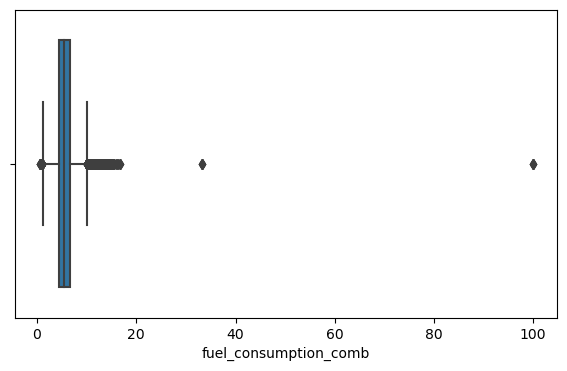

In [2475]:
box_plot_column_(df,'fuel_consumption_comb')

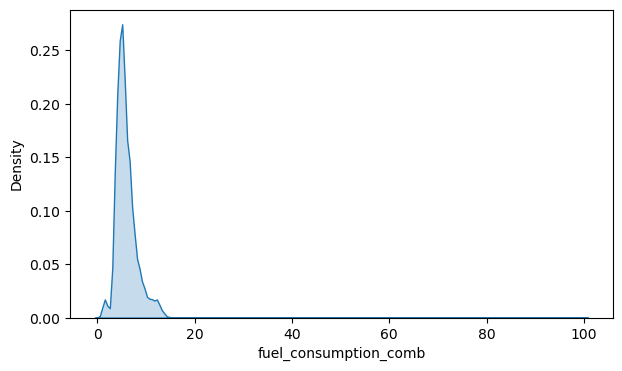

In [2477]:
kde_plot_column(df,'fuel_consumption_comb')

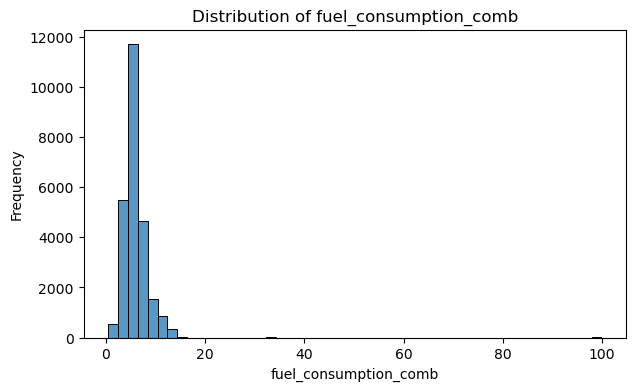

In [2478]:
hist_plot_column(df,'fuel_consumption_comb')

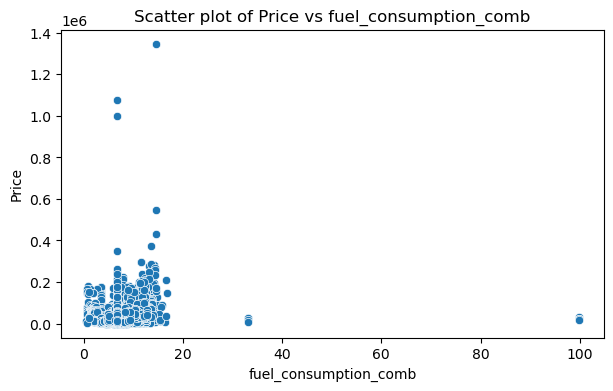

In [2479]:
scatter_plot_with_price(df,'fuel_consumption_comb')

In [2480]:
grouped_by_column(df,'make_model','fuel_consumption_comb')

make_model    fuel_consumption_comb
Dacia         5.600000                 1
Dacia Dokker  4.200000                 9
              4.314286                 7
              4.500000                 5
              5.700000                 5
                                      ..
Volvo XC90    7.600000                 1
              2.200000                 1
              9.100000                 1
              2.400000                 1
              12.900000                1
Name: count, Length: 5026, dtype: int64

In [2481]:
df.groupby('make_model')['fuel_consumption_comb'].mean()

make_model
Dacia                      5.600000
Dacia Dokker               5.241600
Dacia Duster               5.507656
Dacia Duster Duster 1.5    5.116667
Dacia Jogger               5.882497
                             ...   
Volvo V90 Cross Country    5.685909
Volvo XC40                 5.026443
Volvo XC60                 4.754515
Volvo XC70                 6.449371
Volvo XC90                 5.398924
Name: fuel_consumption_comb, Length: 733, dtype: float64

In [2482]:
df['fuel_consumption_comb'].describe()

count    25077.000000
mean         5.882098
std          2.454690
min          0.500000
25%          4.500000
50%          5.400000
75%          6.700000
max         99.900000
Name: fuel_consumption_comb, dtype: float64

In [2483]:
# Calculate the 25th and 75th percentiles (Q1 and Q3)
Q1 = df['fuel_consumption_comb'].quantile(0.25)
Q3 = df['fuel_consumption_comb'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1
IQR
upper_whisker=Q3 + (1.5 * IQR)
lower_whisker=Q1 - (1.5 * IQR)
print(upper_whisker,lower_whisker)

10.0 1.1999999999999997


In [2484]:
# Filter the DataFrame for outliers in 'fuel_consumption_comb'
outliers = df[(df['fuel_consumption_comb'] < lower_whisker) | (df['fuel_consumption_comb'] > upper_whisker)]

# Sort the outliers by 'fuel_consumption_comb'
sorted_outliers = outliers.sort_values(by='fuel_consumption_comb')
sorted_outliers.tail(20)

make_model     price          body_type   type  \
24131           Mercedes-Benz SL 65 AMG   48900.0        Convertible   Used   
21288                Hyundai Genesis V6   19888.0              Coupe   Used   
25481               Mercedes-Benz S 500   13980.0              Sedan   Used   
15785                       Nissan 370Z   32900.0              Coupe   Used   
26235                 Nissan Terrano V6   15950.0   Off-Road/Pick-up   Used   
23735  Mercedes-Benz SL 65 AMG Roadster   79999.0        Convertible   Used   
22531            Mercedes-Benz G 55 AMG   89999.0   Off-Road/Pick-up   Used   
16153                  Opel Insignia V6   23080.0      Station wagon   Used   
25151             Mercedes-Benz CLK 500    8800.0              Coupe   Used   
26690                             Fiat    39000.0              Coupe   Used   
25646               Mercedes-Benz G 500  209000.0        Convertible   Used   
743                        Ford Mustang  147750.0              Coupe   Used   
1502                     Nissan Qashqai   26650.0            Compact   Used   
13007                    Nissan Qashqai   19990.0            Compact   Used   
23796                    Nissan Qashqai    8900.0            Compact   Used   
4223                     Nissan Qashqai   26650.0            Compact   Used   
8801                         Ford Focus   21990.0              Sedan   Used   
9652                     Nissan Qashqai   21995.0            Compact   Used   
15906                    Nissan Qashqai   19595.0            Compact   Used   
6557                Mercedes-Benz A 180   32750.0            Compact   Used   

       doors warranty   mileage    gearbox fuel_type  colour  ...  \
24131    2.0      Yes  106000.0  Automatic   Benzine    Grey  ...   
21288    3.0       No  115000.0  Automatic   Benzine    Grey  ...   
25481    4.0       No   76100.0  Automatic   Benzine   Black  ...   
15785    3.0       No   17310.0  Automatic   Benzine     Red  ...   
26235    5.0       No  271425.0     Manual   Benzine    Grey  ...   
23735    2.0      Yes  120700.0  Automatic   Benzine  Silver  ...   
22531    4.0      Yes  136900.0  Automatic   Benzine   Black  ...   
16153    5.0       No   78000.0  Automatic   Benzine     Red  ...   
25151    2.0      Yes  148000.0  Automatic   Benzine    Blue  ...   
26690    2.0       No   50000.0     Manual   Benzine  Silver  ...   
25646    3.0       No  172000.0  Automatic   Benzine   Black  ...   
743      3.0       No    1500.0  Automatic   Benzine   Black  ...   
1502     5.0      Yes    6390.0     Manual   Benzine   White  ...   
13007    5.0       No   27000.0     Manual   Benzine   Black  ...   
23796    5.0      Yes  149000.0     Manual   Benzine    Grey  ...   
4223     5.0      Yes   11825.0     Manual   Benzine   White  ...   
8801     5.0      Yes   75353.0  Automatic    Diesel     Red  ...   
9652     5.0      Yes   57706.0     Manual   Benzine   White  ...   
15906    5.0      Yes   60888.0     Manual   Benzine   Black  ...   
6557     5.0      Yes   49444.0  Automatic   Benzine  Silver  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
24131                Advanced                    Advanced           Advanced   
21288                Enhanced                    Advanced           Advanced   
25481                   Basic                    Advanced           Advanced   
15785                   Basic                       Basic           Enhanced   
26235                   Basic                    Enhanced           Advanced   
23735                Advanced                    Advanced           Advanced   
22531                Advanced                    Advanced           Advanced   
16153                Advanced                    Advanced           Advanced   
25151                   Basic                    Advanced           Advanced   
26690                Advanced                    Advanced           Advanced   
25646                Enhanced          

o convert power_kW to energy_consumption_kWh_per_100mi, you need additional information such as the efficiency of the vehicle or typical driving conditions, which is not straightforwardly derivable from power_kW alone. However, for simplicity, if we assume you have an approximate conversion rate, you can use that to estimate the energy_consumption_kWh_per_100mi.

Let's assume an electric vehicle consumes about 0.2 kWh per km (20 kWh per 100 km) on average, and we will use that to create an estimate:

Example Conversion
We'll create a mock conversion factor for this example:

Approximate conversion rate: 0.2 kWh/km
Converted to miles: 0.2 kWh/km * 1.60934 km/mile = 0.32187 kWh/mile
For 100 miles, this becomes approximately:

kWh per 100 miles: 0.32187 kWh/mile * 100 miles = 32.187 kWh/100 miles

In [2486]:
elec_mean = df[df['fuel_type']=='Electric']['fuel_consumption_comb'].mean()
elec_mean

3.4174151635061327

In [2487]:
df_electric = df[(df['fuel_type'] == 'Electric') & (df['fuel_consumption_comb'] < elec_mean)]

# Assuming you want to get the value counts for a specific column, for example 'model'
df_electric[['make_model','fuel_consumption_comb']].value_counts()

make_model           fuel_consumption_comb
Toyota Yaris         2.800000                 26
Volvo V90            1.700000                 25
Mercedes-Benz A 250  1.400000                 22
Toyota Yaris         3.300000                 22
Volvo S90            3.066667                 22
                                              ..
Mercedes-Benz S 580  0.800000                  1
Volvo V60            2.100000                  1
Mercedes-Benz C 300  1.200000                  1
Mercedes-Benz S 580  1.100000                  1
Peugeot 3008         1.200000                  1
Name: count, Length: 140, dtype: int64

In [2488]:
df_electric = df[df['fuel_type'] == 'Electric']

# Assuming you want to get the value counts for a specific column, for example 'model'
df_electric['make_model'].value_counts()

make_model
Toyota Corolla                        138
Toyota Yaris                          115
Fiat 500                              100
Toyota Auris                           97
Renault ZOE                            87
                                     ... 
Ford S-Max                              1
Mercedes-Benz EQB 300                   1
Hyundai KONA Elektro Kona Electric      1
Ford                                    1
Toyota Prius+                           1
Name: count, Length: 126, dtype: int64

In [2489]:
df_electric['fuel_consumption_comb'].describe()

count    2154.000000
mean        3.417415
std         1.279926
min         0.600000
25%         2.800000
50%         3.447727
75%         4.100000
max         8.800000
Name: fuel_consumption_comb, dtype: float64

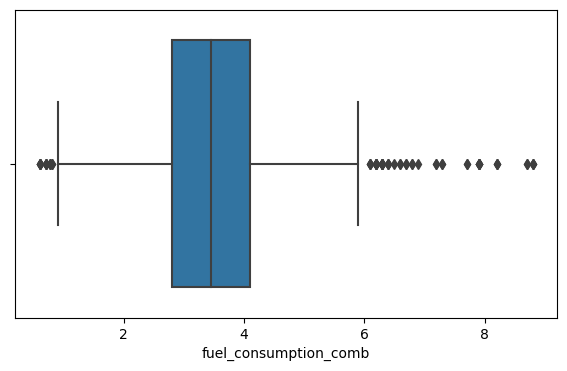

In [2638]:
box_plot_column_(df_electric,'fuel_consumption_comb')

In [2640]:
upper_lower_whisker(df_electric,'fuel_consumption_comb')

(6.049999999999999, 0.8500000000000001)

In [2641]:
df_electric.sort_values(by='fuel_consumption_comb',ascending=False)

make_model     price       body_type            type  \
4078    Mercedes-Benz E 53 AMG  117203.0           Sedan            Used   
4074    Mercedes-Benz E 53 AMG   95900.0     Convertible            Used   
4073    Mercedes-Benz E 53 AMG   98900.0     Convertible            Used   
6690  Mercedes-Benz CLS 53 AMG   82980.0           Coupe            Used   
9455    Mercedes-Benz E 53 AMG   40999.0   Station wagon            Used   
...                        ...       ...             ...             ...   
1204       Mercedes-Benz C 300   56790.0   Station wagon            Used   
1214       Mercedes-Benz C 300   57885.0           Sedan   Demonstration   
1207       Mercedes-Benz C 300   74900.0   Station wagon   Demonstration   
1213       Mercedes-Benz C 300   56585.0           Sedan   Demonstration   
1206       Mercedes-Benz C 300   77900.0   Station wagon   Demonstration   

      doors warranty   mileage    gearbox fuel_type  colour  ...  \
4078    5.0      Yes   10500.0  Automatic  Electric   Black  ...   
4074    2.0      Yes   18143.0  Automatic  Electric  Silver  ...   
4073    2.0      Yes   15632.0  Automatic  Electric  Silver  ...   
6690    4.0       No   16000.0  Automatic  Electric  Silver  ...   
9455    4.0      Yes  174717.0  Automatic  Electric   Black  ...   
...     ...      ...       ...        ...       ...     ...  ...   
1204    5.0       No      15.0  Automatic  Electric    Grey  ...   
1214    4.0      Yes    9900.0  Automatic  Electric   White  ...   
1207    5.0       No    9900.0  Automatic  Electric    Grey  ...   
1213    4.0      Yes    9900.0  Automatic  Electric   White  ...   
1206    5.0       No    9900.0  Automatic  Electric    Grey  ...   

     safety_security_package comfort_convenience_package  ent_media_package  \
4078                Advanced                    Advanced           Advanced   
4074                Enhanced                    Advanced           Advanced   
4073                Enhanced                    Advanced           Advanced   
6690                Advanced                    Advanced           Advanced   
9455                Advanced                    Advanced           Enhanced   
...                      ...                         ...                ...   
1204                Advanced                    Advanced           Advanced   
1214                Advanced                    Advanced           Advanced   
1207                Advanced                    Advanced           Advanced   
1213                Advanced                    Advanced           Advanced   
1206                Advanced                    Advanced           Advanced   

      num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
4078           11.0    NaN       2.079732     3.693067       -0.899372   
4074            3.0    NaN       2.079732     2.853132       -0.785511   
4073            3.0    NaN       2.079732     2.971416       -0.822918   
6690            9.0    NaN       2.079732     2.343723       -0.817436   
9455           13.0    NaN       2.079732     0.688496        1.547034   
...             ...    ...            ...          ...             ...   
1204            5.0    NaN       2.079732     1.311104       -1.055571   
1214            5.0    NaN       2.079732     1.354277       -0.908310   
1207            5.0    NaN       2.079732     2.025144       -0.908310   
1213            5.0    NaN       2.079732     1.303021       -0.908310   
1206            5.0    NaN       2.079732     2.143428       -0.908310   

      cylinders_zscore           make  
4078          1.859765  Mercedes-Benz  
4074          1.859765  Mercedes-Benz  
4073          1.859765  Mercedes-Benz  
6690          1.859765  Mercedes-Benz  
9455          1.859765  Mercedes-Benz  
...                ...            ...  
1204         -0.020221  Mercedes-Benz  
1214         -0.020221  Mercedes-Benz  
1207         -0.020221  Mercedes-Benz  
1213         -0.020221  Mercedes-Benz  
1206        

In [2642]:
df_electric['make_model'].unique()

array(['Dacia Spring', 'Fiat ', 'Fiat 500', 'Fiat 500C', 'Fiat 500X',
       'Fiat 500e', 'Fiat New Panda', 'Fiat Panda', 'Fiat Tipo',
       'Ford Fiesta', 'Ford Focus', 'Ford Kuga', 'Ford Mondeo',
       'Ford Mustang Mach-E', 'Ford Puma', 'Hyundai ', 'Hyundai IONIQ',
       'Hyundai IONIQ 5', 'Hyundai KONA',
       'Hyundai KONA Elektro Kona Electric', 'Hyundai SANTA FE',
       'Hyundai TUCSON', 'Hyundai i30', 'Mercedes-Benz ',
       'Mercedes-Benz  C 300', 'Mercedes-Benz  S 580e',
       'Mercedes-Benz A 250', 'Mercedes-Benz AMG GT',
       'Mercedes-Benz C 300', 'Mercedes-Benz CLA 250',
       'Mercedes-Benz E 300', 'Mercedes-Benz EQA',
       'Mercedes-Benz EQA 250', 'Mercedes-Benz EQB 300',
       'Mercedes-Benz EQB 350', 'Mercedes-Benz EQC 400',
       'Mercedes-Benz EQE 350', 'Mercedes-Benz EQE 43',
       'Mercedes-Benz EQE 500', 'Mercedes-Benz EQS',
       'Mercedes-Benz EQV 300', 'Mercedes-Benz GLC 300',
       'Mercedes-Benz GLE 350', 'Mercedes-Benz S 500',
       'Merce

In [2643]:
electric_models = ['Dacia Spring', 'Fiat 500e', 'Ford Mustang Mach-E', 'Nissan Leaf', 'Hyundai IONIQ', 'Hyundai IONIQ 5', 'Hyundai Kona Electric', 
                   'Mercedes-Benz EQA', 'Mercedes-Benz EQB', 'Mercedes-Benz EQC', 'Mercedes-Benz EQE', 'Mercedes-Benz EQS', 'Mercedes-Benz EQV', 
                   'Opel Corsa-e', 'Peugeot e-2008', 'Peugeot e-208', 'Renault Megane E-Tech', 'Renault Twingo Z.E.', 'Renault Twizy', 'Renault ZOE', 
                   'Skoda Enyaq', 'Skoda Citigo-e iV', 'Volvo C40', 'Volvo XC40 Recharge']

In [2644]:
# Replace non-electric models with NaN in the 'fuel_type' column
df.loc[~(df['make_model'].isin(electric_models) ) & (df['fuel_type']=='Electric'), 'fuel_type'] = np.nan

In [2645]:
df['fuel_type'].isna().sum()

1734

In [2646]:
df.T

5                  6      \
make_model                        Dacia Duster       Dacia Duster   
price                                  21000.0            21000.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                            Pre-registered     Pre-registered   
doors                                      5.0                5.0   
warranty                                   Yes                Yes   
mileage                                 1000.0             1000.0   
gearbox                                 Manual             Manual   
fuel_type                               Diesel             Diesel   
colour                                  Orange             Orange   
paint                             non_metallic       non_metallic   
seller                                  Dealer             Dealer   
seats                                      5.0                5.0   
engine_size                             1461.0             1461.0   
gears                                      6.0                6.0   
co2_emissions                            106.0              106.0   
drivetrain                               Front              Front   
cylinders                                  4.0                4.0   
empty_weight                            1395.0             1395.0   
service_history                             No                 No   
non_smoker                                  No                 No   
emission_sticker                         Green              Green   
upholstery_color                         Black              Black   
upholstery                               Other              Cloth   
available                                  yes                yes   
taxi_rental                                 No                 No   
power_kW                                  85.0               85.0   
fuel_consumption_comb                 4.584946           4.584946   
location_country                         Spain              Spain   
age                                        0.0                0.0   
inspection_status                           no                 no   
energy_efficiency_class            Inefficient        Inefficient   
safety_security_package               Advanced           Advanced   
comfort_convenience_package           Advanced           Advanced   
ent_media_package                     Advanced           Advanced   
num_of_extras                              5.0                5.0   
index                                      NaN                NaN   
z_score_gears                          0.10154            0.10154   
price_zscore                         -0.100024          -0.100024   
mileage_zscore                       -1.040897          -1.040897   
cylinders_zscore                     -0.020221          -0.020221   
make                                     Dacia              Dacia   

                                         7                  8      \
make_model                        Dacia Duster       Dacia Duster   
price                                  21150.0            25190.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                             Demonstration      Demonstration   
doors                                      5.0                5.0   
warranty                                   Yes                 No   
mileage                                 4500.0             4018.0   
gearbox                                 Manual             Manual   
fuel_type                              Benzine            Benzine   
colour                                   Black              Black   
paint                                 Metallic           Metallic   
seller                                  Dealer             Dealer   
seats                                      5.0                5.0   
engine_size                             1332.0             1332.0   
gears                                 

In [2647]:
# Find the mode of fuel_type for each make_model excluding "Electric"
mode_fuel_type_by_make_model = df[df['fuel_type'] != 'Electric'].groupby('body_type')['fuel_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


In [2648]:

# Fill NaN values in fuel_type column with the mode based on make_model
df['fuel_type'] = df.apply(lambda row: mode_fuel_type_by_make_model[row['body_type']] if pd.isna(row['fuel_type']) else row['fuel_type'], axis=1)

In [2649]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

In [2650]:
df.T

5                  6      \
make_model                        Dacia Duster       Dacia Duster   
price                                  21000.0            21000.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                            Pre-registered     Pre-registered   
doors                                      5.0                5.0   
warranty                                   Yes                Yes   
mileage                                 1000.0             1000.0   
gearbox                                 Manual             Manual   
fuel_type                               Diesel             Diesel   
colour                                  Orange             Orange   
paint                             non_metallic       non_metallic   
seller                                  Dealer             Dealer   
seats                                      5.0                5.0   
engine_size                             1461.0             1461.0   
gears                                      6.0                6.0   
co2_emissions                            106.0              106.0   
drivetrain                               Front              Front   
cylinders                                  4.0                4.0   
empty_weight                            1395.0             1395.0   
service_history                             No                 No   
non_smoker                                  No                 No   
emission_sticker                         Green              Green   
upholstery_color                         Black              Black   
upholstery                               Other              Cloth   
available                                  yes                yes   
taxi_rental                                 No                 No   
power_kW                                  85.0               85.0   
fuel_consumption_comb                 4.584946           4.584946   
location_country                         Spain              Spain   
age                                        0.0                0.0   
inspection_status                           no                 no   
energy_efficiency_class            Inefficient        Inefficient   
safety_security_package               Advanced           Advanced   
comfort_convenience_package           Advanced           Advanced   
ent_media_package                     Advanced           Advanced   
num_of_extras                              5.0                5.0   
index                                      NaN                NaN   
z_score_gears                          0.10154            0.10154   
price_zscore                         -0.100024          -0.100024   
mileage_zscore                       -1.040897          -1.040897   
cylinders_zscore                     -0.020221          -0.020221   
make                                     Dacia              Dacia   

                                         7                  8      \
make_model                        Dacia Duster       Dacia Duster   
price                                  21150.0            25190.0   
body_type                     Off-Road/Pick-up   Off-Road/Pick-up   
type                             Demonstration      Demonstration   
doors                                      5.0                5.0   
warranty                                   Yes                 No   
mileage                                 4500.0             4018.0   
gearbox                                 Manual             Manual   
fuel_type                              Benzine            Benzine   
colour                                   Black              Black   
paint                                 Metallic           Metallic   
seller                                  Dealer             Dealer   
seats                                      5.0                5.0   
engine_size                             1332.0             1332.0   
gears                                 

In [2651]:
df_electric= df[df['fuel_type']=='Electric']
df_electric

make_model    price          body_type             type  doors  \
280     Dacia Spring  18490.0   Off-Road/Pick-up             Used    5.0   
281     Dacia Spring  22980.0   Off-Road/Pick-up    Demonstration    5.0   
285     Dacia Spring  27044.0              Sedan             Used    5.0   
288     Dacia Spring  18400.0              Sedan             Used    5.0   
468        Fiat 500e  32990.0            Compact   Pre-registered    3.0   
...              ...      ...                ...              ...    ...   
21656  Renault Twizy   8990.0            Compact             Used    2.0   
21657  Renault Twizy   5500.0              Coupe             Used    2.0   
21658  Renault Twizy   7445.0   Off-Road/Pick-up             Used    2.0   
21967    Nissan Leaf  10450.0            Compact             Used    5.0   
26855  Hyundai IONIQ  26991.0              Sedan             Used    5.0   

      warranty  mileage    gearbox fuel_type  colour  ...  \
280         No   5800.0  Automatic  Electric  Silver  ...   
281         No   5000.0  Automatic  Electric   White  ...   
285         No   4990.0     Manual  Electric  Silver  ...   
288        Yes      1.0  Automatic  Electric    Grey  ...   
468         No     10.0  Automatic  Electric    Gold  ...   
...        ...      ...        ...       ...     ...  ...   
21656       No  25000.0  Automatic  Electric   White  ...   
21657       No  30000.0  Automatic  Electric    Grey  ...   
21658      Yes  23362.0  Automatic  Electric   Black  ...   
21967       No  61553.0  Automatic  Electric   White  ...   
26855       No  29961.0  Automatic  Electric    Grey  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
280                  Advanced                    Advanced           Advanced   
281                  Enhanced                    Enhanced           Advanced   
285                  Enhanced                    Advanced           Advanced   
288                  Enhanced                    Advanced           Advanced   
468                  Advanced                    Advanced           Advanced   
...                       ...                         ...                ...   
21656                   Basic                    Advanced              Basic   
21657                   Basic                    Advanced              Basic   
21658                   Basic                    Advanced              Basic   
21967                Enhanced                    Advanced           Advanced   
26855                Advanced                    Advanced           Advanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
280              5.0    NaN      -3.195446    -0.198988       -0.969390   
281              5.0    NaN      -3.195446    -0.021957       -0.981308   
285              5.0    NaN      -3.195446     0.138279       -0.981457   
288              5.0    NaN      -3.195446    -0.202537       -1.055780   
468              5.0    NaN      -3.195446     0.372718       -1.055646   
...              ...    ...            ...          ...             ...   
21656            2.0    NaN      -3.195446    -0.573554       -0.683360   
21657            2.0    NaN      -3.195446    -0.711158       -0.608873   
21658            2.0    NaN      -3.195446    -0.634470       -0.707762   
21967            2.0    NaN      -3.195446    -0.515989       -0.138815   
26855            3.0    NaN       0.101540     0.136189       -0.609454   

       cylinders_zscore     make  
280           -2.840201    Dacia  
281           -2.840201    Dacia  
285           -2.840201    Dacia  
288           -2.840201    Dacia  
468           -2.840201     Fiat  
...                 ...      ...  
21656         -2.840201  Renault  
21657         -2.840201  Renault  
21658         -2.840201  Renault  
21967         -3.780194   Nissan  
26855         -0.020221  Hyundai  

[420 rows x 42 columns]

In [2652]:
df.shape

(25077, 42)

In [2653]:
# Step 1: Filter out electric cars
df_electric = df[df['fuel_type'] == 'Electric']

# Step 2: Calculate Z-scores for the relevant columns
df_electric['z_score_fuel_consumption_comb'] = stats.zscore(df_electric['fuel_consumption_comb'])

# Step 3: Filter out rows where the z-score is greater than 3 or less than -3
df_z_score = df_electric[df_electric['z_score_fuel_consumption_comb'].abs() <= 3]

# Step 4: Identify the rows in df_electric that are not in df_z_score
indexes_to_drop = df_electric.index.difference(df_z_score.index)

# Step 5: Drop these indexes from the original df
df.drop(indexes_to_drop, inplace=True)

In [2654]:
df.shape

(25061, 42)

In [2655]:
df_other= df[df['fuel_type']!='Electric']
df_other.sort_values(by='fuel_consumption_comb')

make_model    price       body_type            type  doors  \
12019            Fiat Tipo  12650.0   Station wagon            Used    5.0   
1214   Mercedes-Benz C 300  57885.0           Sedan   Demonstration    4.0   
1207   Mercedes-Benz C 300  74900.0   Station wagon   Demonstration    5.0   
1206   Mercedes-Benz C 300  77900.0   Station wagon   Demonstration    5.0   
1204   Mercedes-Benz C 300  56790.0   Station wagon            Used    5.0   
...                    ...      ...             ...             ...    ...   
13007       Nissan Qashqai  19990.0         Compact            Used    5.0   
9652        Nissan Qashqai  21995.0         Compact            Used    5.0   
6557   Mercedes-Benz A 180  32750.0         Compact            Used    5.0   
8801            Ford Focus  21990.0           Sedan            Used    5.0   
15906       Nissan Qashqai  19595.0         Compact            Used    5.0   

      warranty  mileage    gearbox fuel_type  colour  ...  \
12019      Yes  58340.0     Manual   Benzine    Grey  ...   
1214       Yes   9900.0  Automatic   Benzine   White  ...   
1207        No   9900.0  Automatic    Diesel    Grey  ...   
1206        No   9900.0  Automatic    Diesel    Grey  ...   
1204        No     15.0  Automatic    Diesel    Grey  ...   
...        ...      ...        ...       ...     ...  ...   
13007       No  27000.0     Manual   Benzine   Black  ...   
9652       Yes  57706.0     Manual   Benzine   White  ...   
6557       Yes  49444.0  Automatic   Benzine  Silver  ...   
8801       Yes  75353.0  Automatic    Diesel     Red  ...   
15906      Yes  60888.0     Manual   Benzine   Black  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
12019                Advanced                    Advanced           Advanced   
1214                 Advanced                    Advanced           Advanced   
1207                 Advanced                    Advanced           Advanced   
1206                 Advanced                    Advanced           Advanced   
1204                 Advanced                    Advanced           Advanced   
...                       ...                         ...                ...   
13007                Advanced                    Enhanced           Enhanced   
9652                 Advanced                    Advanced           Advanced   
6557                 Advanced                    Advanced           Advanced   
8801                 Advanced                    Advanced           Advanced   
15906                Advanced                    Advanced           Enhanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
12019            4.0    NaN       0.101540    -0.429248       -0.186680   
1214             5.0    NaN       2.079732     1.354277       -0.908310   
1207             5.0    NaN       2.079732     2.025144       -0.908310   
1206             5.0    NaN       2.079732     2.143428       -0.908310   
1204             5.0    NaN       2.079732     1.311104       -1.055571   
...              ...    ...            ...          ...             ...   
13007            3.0    NaN       0.101540    -0.139846       -0.653565   
9652             3.0    NaN       0.101540    -0.060793       -0.196125   
6557             5.0    NaN       0.760938     0.363255       -0.319208   
8801             3.0    NaN       0.101540    -0.060990        0.066769   
15906            2.0    NaN       0.101540    -0.155420       -0.148722   

       cylinders_zscore           make  
12019         -0.020221           Fiat  
1214          -0.020221  Mercedes-Benz  
1207          -0.020221  Mercedes-Benz  
1206          -0.020221  Mercedes-Benz  
1204          -0.020221  Mercedes-Benz  
...                 ...            ...  
13007         -0.020221         Nissan  
9652          -0.020221         Nissan  
6557          -0.020221  Mercedes-Benz  
8801          -0.960214           Ford  
15906         -0.020221         N

In [2656]:
df_other['fuel_consumption_comb'].describe()

count    24657.000000
mean         5.923858
std          2.453629
min          0.500000
25%          4.500000
50%          5.400000
75%          6.700000
max         99.900000
Name: fuel_consumption_comb, dtype: float64

In [2657]:
df_other[df_other['fuel_consumption_comb']<3.9].sort_values(by='fuel_consumption_comb')

make_model    price          body_type            type  doors  \
12019            Fiat Tipo  12650.0      Station wagon            Used    5.0   
1214   Mercedes-Benz C 300  57885.0              Sedan   Demonstration    4.0   
1213   Mercedes-Benz C 300  56585.0              Sedan   Demonstration    4.0   
1207   Mercedes-Benz C 300  74900.0      Station wagon   Demonstration    5.0   
1206   Mercedes-Benz C 300  77900.0      Station wagon   Demonstration    5.0   
...                    ...      ...                ...             ...    ...   
11242         Toyota RAV 4  31845.0   Off-Road/Pick-up            Used    5.0   
11235         Toyota RAV 4  29990.0   Off-Road/Pick-up            Used    5.0   
16895         Toyota RAV 4  20390.0   Off-Road/Pick-up            Used    5.0   
16891         Toyota RAV 4  20390.0   Off-Road/Pick-up            Used    5.0   
5457          Toyota RAV 4  46750.0   Off-Road/Pick-up            Used    5.0   

      warranty   mileage    gearbox fuel_type colour  ...  \
12019      Yes   58340.0     Manual   Benzine   Grey  ...   
1214       Yes    9900.0  Automatic   Benzine  White  ...   
1213       Yes    9900.0  Automatic   Benzine  White  ...   
1207        No    9900.0  Automatic    Diesel   Grey  ...   
1206        No    9900.0  Automatic    Diesel   Grey  ...   
...        ...       ...        ...       ...    ...  ...   
11242      Yes   63143.0  Automatic   Benzine  White  ...   
11235       No   34052.0  Automatic   Benzine   Grey  ...   
16895      Yes  101852.0  Automatic   Benzine    Red  ...   
16891      Yes  101852.0  Automatic   Benzine    Red  ...   
5457       Yes    8856.0  Automatic   Benzine  White  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
12019                Advanced                    Advanced           Advanced   
1214                 Advanced                    Advanced           Advanced   
1213                 Advanced                    Advanced           Advanced   
1207                 Advanced                    Advanced           Advanced   
1206                 Advanced                    Advanced           Advanced   
...                       ...                         ...                ...   
11242                Advanced                    Advanced           Enhanced   
11235                Advanced                    Advanced           Advanced   
16895                Enhanced                    Advanced           Advanced   
16891                Enhanced                    Advanced           Advanced   
5457                 Advanced                    Advanced           Advanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
12019            4.0    NaN       0.101540    -0.429248       -0.186680   
1214             5.0    NaN       2.079732     1.354277       -0.908310   
1213             5.0    NaN       2.079732     1.303021       -0.908310   
1207             5.0    NaN       2.079732     2.025144       -0.908310   
1206             5.0    NaN       2.079732     2.143428       -0.908310   
...              ...    ...            ...          ...             ...   
11242            2.0    NaN      -3.195446     0.327573       -0.115128   
11235            2.0    NaN      -3.195446     0.254434       -0.548508   
16895            2.0    NaN      -3.195446    -0.124075        0.461535   
16891            2.0    NaN      -3.195446    -0.124075        0.461535   
5457             3.0    NaN      -3.195446     0.915247       -0.923863   

       cylinders_zscore           make  
12019         -0.020221           Fiat  
1214          -0.020221  Mercedes-Benz  
1213          -0.020221  Mercedes-Benz  
1207          -0.020221  Mercedes-Benz  
1206          -0.020221  Mercedes-Benz  
...                 ...            ...  
11242         -0.020221         Toyota  
11235         -0.020221         Toyota  
16895         -0.020221         Toyota  
16891         -0.020221         Toyota

In [2658]:
df.loc[df_other[df_other['fuel_consumption_comb']<3.9].index,'fuel_consumption_comb']=np.nan

In [2659]:
df['fuel_consumption_comb'].isna().sum()

2559

In [2660]:
pd.set_option('display.max_rows',500)

In [2661]:
# Find the mode of fuel_type for each make_model excluding "Electric"
mode_fuel_type_by_make_model = df[df['fuel_type'] != 'Electric'].groupby('body_type')['fuel_consumption_comb'].mean()

In [2662]:
# Fill NaN values in fuel_type column with the mode based on make_model
df['fuel_consumption_comb'] = df.apply(lambda row: mode_fuel_type_by_make_model[row['body_type']] if pd.isna(row['fuel_consumption_comb']) else row['fuel_consumption_comb'], axis=1)

In [2663]:
df['fuel_consumption_comb'].isna().sum()

0

In [2664]:
df['fuel_consumption_comb'].describe()

count    25061.000000
mean         6.135217
std          2.271222
min          3.217647
25%          4.898256
50%          5.550000
75%          6.700000
max         99.900000
Name: fuel_consumption_comb, dtype: float64

In [2665]:
# Step 1: Filter out electric cars
df_other = df[df['fuel_type'] != 'Electric'].copy()

# Step 2: Calculate Z-scores for the relevant columns
df_other['z_score_fuel_consumption_comb'] = stats.zscore(df_other['fuel_consumption_comb'])

# Step 3: Filter out rows where the z-score is greater than 3 or less than -3
df_z_score = df_other[df_other['z_score_fuel_consumption_comb'].abs() <= 3]

# Step 4: Identify the rows in df_other that are not in df_z_score
indexes_to_change = df_other.index.difference(df_z_score.index)

# Step 5: Update the original DataFrame to set 'fuel_consumption_comb' to NaN for outliers
df.loc[indexes_to_change, 'fuel_consumption_comb'] = np.nan

# Optional: Drop the z_score_fuel_consumption_comb column from df_other if not needed
df_other.drop(columns=['z_score_fuel_consumption_comb'], inplace=True)

# Step 5: Drop these indexes from the original df
#df.drop(indexes_to_drop, inplace=True)

In [2666]:
df.loc[indexes_to_change].head()

make_model     price          body_type             type  doors  \
591   Ford Bronco   95750.0   Off-Road/Pick-up             Used    5.0   
608    Ford F 150   79990.0   Off-Road/Pick-up             Used    4.0   
741  Ford Mustang   61990.0        Convertible   Pre-registered    2.0   
742  Ford Mustang   66650.0        Convertible   Pre-registered    3.0   
743  Ford Mustang  147750.0              Coupe             Used    3.0   

    warranty  mileage    gearbox fuel_type  colour  ...  \
591       No   1500.0  Automatic   Benzine    Grey  ...   
608       No   3500.0  Automatic   Benzine  Silver  ...   
741       No     50.0  Automatic   Benzine   Black  ...   
742       No     10.0  Automatic   Benzine   White  ...   
743       No   1500.0  Automatic   Benzine   Black  ...   

    safety_security_package comfort_convenience_package  ent_media_package  \
591                Advanced                    Advanced           Advanced   
608                Advanced                    Advanced           Advanced   
741                Advanced                    Advanced           Advanced   
742                Advanced                    Advanced           Advanced   
743                Advanced                    Advanced           Advanced   

     num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
591            5.0    NaN       2.079732     2.847218       -1.033448   
608            5.0    NaN       2.739129     2.225833       -1.003654   
741            5.0    NaN       2.739129     1.516129       -1.055050   
742            5.0    NaN       2.739129     1.699864       -1.055646   
743            5.0    NaN       0.760938     4.897473       -1.033448   

     cylinders_zscore  make  
591          1.859765  Ford  
608          1.859765  Ford  
741          3.739751  Ford  
742          3.739751  Ford  
743          1.859765  Ford  

[5 rows x 42 columns]

In [2667]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

In [2891]:
# Calculate mean fuel consumption for each make_model and body_type excluding electric cars
mean_fuel_consumption_comb_by_make_model_body_type = df[df['fuel_type'] != 'Electric'].groupby(['make_model', 'body_type'])['fuel_consumption_comb'].mean()

# Calculate mean fuel consumption for each make_model excluding electric cars
mean_fuel_consumption_comb_by_make_model = df[df['fuel_type'] != 'Electric'].groupby('make_model')['fuel_consumption_comb'].mean()

# Calculate mean fuel consumption for each body_type excluding electric cars
mean_fuel_consumption_comb_by_body_type = df[df['fuel_type'] != 'Electric'].groupby('body_type')['fuel_consumption_comb'].mean()

# Calculate overall mean fuel consumption excluding electric cars
overall_mean_fuel_consumption_comb = df[df['fuel_type'] != 'Electric']['fuel_consumption_comb'].mean()

# Fill NaN values in fuel_consumption_comb with the mean based on make_model and body_type
def fill_na_with_mean(row, mean_by_make_model_body_type, mean_by_make_model, mean_by_body_type, overall_mean):
    if pd.isna(row['fuel_consumption_comb']):
        if (row['make_model'], row['body_type']) in mean_by_make_model_body_type.index:
            return mean_by_make_model_body_type.loc[(row['make_model'], row['body_type'])]
        elif row['make_model'] in mean_by_make_model.index:
            return mean_by_make_model.loc[row['make_model']]
        elif row['body_type'] in mean_by_body_type.index:
            return mean_by_body_type.loc[row['body_type']]
        else:
            return overall_mean
    else:
        return row['fuel_consumption_comb']

df['fuel_consumption_comb'] = df.apply(
    lambda row: fill_na_with_mean(row, mean_fuel_consumption_comb_by_make_model_body_type, mean_fuel_consumption_comb_by_make_model, mean_fuel_consumption_comb_by_body_type, overall_mean_fuel_consumption_comb),
    axis=1
)

# Check if there are still NaN values
nan_rows = df[df['fuel_consumption_comb'].isna()]
nan_rows.head()
# Display the DataFrame to verify the changes

Empty DataFrame
Columns: [make_model, price, body_type, type, doors, warranty, mileage, gearbox, fuel_type, colour, paint, seller, seats, engine_size, gears, co2_emissions, drivetrain, empty_weight, service_history, non_smoker, emission_sticker, upholstery_color, upholstery, available, taxi_rental, power_kW, fuel_consumption_comb, age, inspection_status, energy_efficiency_class, safety_security_package, comfort_convenience_package, ent_media_package, num_of_extras]
Index: []

[0 rows x 34 columns]

In [2669]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

In [2670]:
mean_fuel_consumption_by_body_type = df.groupby('body_type')['fuel_consumption_comb'].mean()

# Fill NaN values in 'fuel_consumption_comb' with the average for each body type
df['fuel_consumption_comb'].fillna(df['body_type'].map(mean_fuel_consumption_by_body_type), inplace=True)

In [2671]:
df.isna().sum()

make_model                         0
price                              0
body_type                          0
type                               0
doors                              0
warranty                           0
mileage                            0
gearbox                            0
fuel_type                          0
colour                             0
paint                              0
seller                             0
seats                              0
engine_size                        0
gears                              0
co2_emissions                      0
drivetrain                         0
cylinders                          0
empty_weight                       0
service_history                    0
non_smoker                         0
emission_sticker                   0
upholstery_color                   0
upholstery                         0
available                          0
taxi_rental                        0
power_kW                           0
f

In [2672]:
 df.groupby(['make_model', 'body_type']).agg(
    mean_fuel_consumption=('fuel_consumption_comb', 'mean'),
    max_fuel_consumption=('fuel_consumption_comb', 'max')
).reset_index().head(20)

make_model          body_type  mean_fuel_consumption  \
0                    Dacia               Sedan               5.600000   
1              Dacia Dokker            Compact               4.200000   
2              Dacia Dokker   Off-Road/Pick-up               6.300000   
3              Dacia Dokker              Sedan               4.310476   
4              Dacia Dokker      Station wagon               5.238534   
5              Dacia Duster        Convertible               6.709176   
6              Dacia Duster   Off-Road/Pick-up               5.535401   
7              Dacia Duster              Sedan               5.477294   
8              Dacia Duster      Station wagon               5.054134   
9   Dacia Duster Duster 1.5   Off-Road/Pick-up               5.150000   
10  Dacia Duster Duster 1.5      Station wagon               5.100000   
11             Dacia Jogger   Off-Road/Pick-up               7.800000   
12             Dacia Jogger              Sedan               5.700000   
13             Dacia Jogger      Station wagon               5.829921   
14              Dacia Lodgy            Compact               4.241403   
15              Dacia Lodgy              Sedan               6.100000   
16              Dacia Lodgy      Station wagon               5.609267   
17              Dacia Logan            Compact               5.543406   
18              Dacia Logan              Sedan               5.628017   
19              Dacia Logan      Station wagon               5.556173   

    max_fuel_consumption  
0               5.600000  
1               4.200000  
2               6.300000  
3               4.310476  
4               7.200000  
5               6.709176  
6              10.400000  
7               6.709176  
8               7.100000  
9               5.150000  
10              5.300000  
11              7.800000  
12              5.700000  
13              7.700000  
14              4.241403  
15              6.100000  
16              8.500000  
17              6.267692  
18              6.900000  
19              7.800000

# AGE

In [2674]:
df.age.value_counts()

age
3.0      3266
4.0      2965
1.0      2588
0.0      2532
2.0      2228
5.0      2156
6.0      1333
7.0      1067
8.0       812
9.0       644
10.0      596
11.0      574
12.0      484
15.0      391
13.0      368
14.0      367
16.0      351
17.0      274
18.0      226
19.0      184
20.0      157
21.0      156
22.0      135
23.0      122
24.0       80
28.0       79
25.0       78
27.0       74
26.0       70
30.0       56
31.0       53
29.0       50
32.0       48
56.0       37
55.0       28
34.0       28
49.0       27
57.0       26
35.0       23
50.0       22
54.0       21
36.0       20
33.0       18
51.0       18
44.0       18
52.0       17
39.0       16
37.0       16
53.0       15
43.0       14
47.0       12
46.0       11
45.0       11
38.0        9
48.0        9
59.0        8
58.0        8
40.0        8
41.0        7
60.0        5
61.0        5
42.0        5
67.0        5
64.0        4
65.0        4
90.0        3
70.0        2
92.0        2
85.0        2
63.0        2
68.0        2
62

In [2675]:
df[df['age'] == 0][['make_model', 'price','age','mileage']]

make_model    price  age  mileage
5     Dacia Duster  21000.0  0.0   1000.0
6     Dacia Duster  21000.0  0.0   1000.0
7     Dacia Duster  21150.0  0.0   4500.0
8     Dacia Duster  25190.0  0.0   4018.0
10    Dacia Duster  24222.0  0.0   8000.0
...            ...      ...  ...      ...
3028    Volvo XC90  93890.0  0.0   3500.0
3029    Volvo XC90  83900.0  0.0      1.0
3030    Volvo XC90  80900.0  0.0  15000.0
3031    Volvo XC90  82750.0  0.0  20000.0
3032    Volvo XC90  84780.0  0.0  12485.0

[2532 rows x 4 columns]

In [2676]:
df[df['age'] == 0][['make_model', 'price','age','mileage']].value_counts()

make_model           price    age  mileage
SEAT Leon            29970.0  0.0  2.0        11
Dacia Jogger         26298.0  0.0  50.0       10
Dacia Sandero        18990.0  0.0  10.0        8
Hyundai i30          26950.0  0.0  9.0         8
Skoda Karoq          47777.0  0.0  10.0        7
                                              ..
Mercedes-Benz C 200  50900.0  0.0  8318.0      1
                                   5212.0      1
                                   5102.0      1
                                   3643.0      1
Volvo XC90           93890.0  0.0  3500.0      1
Name: count, Length: 2269, dtype: int64

In [2677]:
df[df['age'] == 1][['make_model', 'price','age','mileage']].value_counts()

make_model           price    age  mileage
Renault Talisman     34888.0  1.0  50.0       6
Nissan Micra         15727.0  1.0  3281.0     6
Toyota Yaris         16990.0  1.0  9136.0     6
Hyundai i30          19773.0  1.0  3962.0     6
Toyota Yaris         16990.0  1.0  19830.0    5
                                             ..
Mercedes-Benz C 200  50990.0  1.0  12584.0    1
                     52800.0  1.0  5100.0     1
                     52870.0  1.0  8000.0     1
                     57450.0  1.0  3740.0     1
Volvo XC90           97450.0  1.0  23657.0    1
Name: count, Length: 2476, dtype: int64

In [2678]:
df[df['age'] < 5][['make_model', 'price','age','mileage']]

make_model    price  age   mileage
5      Dacia Duster  21000.0  0.0    1000.0
6      Dacia Duster  21000.0  0.0    1000.0
7      Dacia Duster  21150.0  0.0    4500.0
8      Dacia Duster  25190.0  0.0    4018.0
10     Dacia Duster  24222.0  0.0    8000.0
...             ...      ...  ...       ...
14773    Volvo XC90  39900.0  4.0   99186.0
14774    Volvo XC90  35490.0  4.0  167090.0
14775    Volvo XC90  42500.0  4.0   93616.0
14776    Volvo XC90  44400.0  4.0   44395.0
14777    Volvo XC90  47700.0  4.0   86709.0

[13579 rows x 4 columns]

In [2679]:
df[df['age'] == 0].count()

make_model                     2532
price                          2532
body_type                      2532
type                           2532
doors                          2532
warranty                       2532
mileage                        2532
gearbox                        2532
fuel_type                      2532
colour                         2532
paint                          2532
seller                         2532
seats                          2532
engine_size                    2532
gears                          2532
co2_emissions                  2532
drivetrain                     2532
cylinders                      2532
empty_weight                   2532
service_history                2532
non_smoker                     2532
emission_sticker               2532
upholstery_color               2532
upholstery                     2532
available                      2532
taxi_rental                    2532
power_kW                       2532
fuel_consumption_comb       

In [2680]:
df[df['age'] > 60].count()

make_model                     40
price                          40
body_type                      40
type                           40
doors                          40
warranty                       40
mileage                        40
gearbox                        40
fuel_type                      40
colour                         40
paint                          40
seller                         40
seats                          40
engine_size                    40
gears                          40
co2_emissions                  40
drivetrain                     40
cylinders                      40
empty_weight                   40
service_history                40
non_smoker                     40
emission_sticker               40
upholstery_color               40
upholstery                     40
available                      40
taxi_rental                    40
power_kW                       40
fuel_consumption_comb          40
location_country               40
age           

In [2681]:
df[(df['age'] > 60) &  (df['mileage'] )][['mileage', 'make_model', 'price', 'age']].value_counts()

mileage   make_model           price     age  
28000.0   Ford                 54000.0   85.0     2
1.0       Ford Thunderbird     54000.0   67.0     1
50000.0   Volvo                17450.0   61.0     1
59055.0   Fiat                 160000.0  68.0     1
60000.0   Ford  Roadster       40000.0   92.0     1
          Ford Thunderbird     24800.0   67.0     1
64000.0   Mercedes-Benz 220    176000.0  70.0     1
64200.0   Renault Spider       22800.0   61.0     1
65515.0   Ford M               20000.0   93.0     1
66000.0   Renault              19000.0   70.0     1
78000.0   Opel Rekord          15990.0   65.0     1
84380.0   Peugeot              16500.0   64.0     1
98095.0   Peugeot              9440.0    62.0     1
99300.0   Volvo PV544          19900.0   68.0     1
99500.0   Ford Fairlane V8     49900.0   63.0     1
100000.0  Skoda Felicia        32000.0   61.0     1
102470.0  Ford Thunderbird     35870.0   61.0     1
124000.0  Ford Mercury         26750.0   65.0     1
180000.0  Peugeot

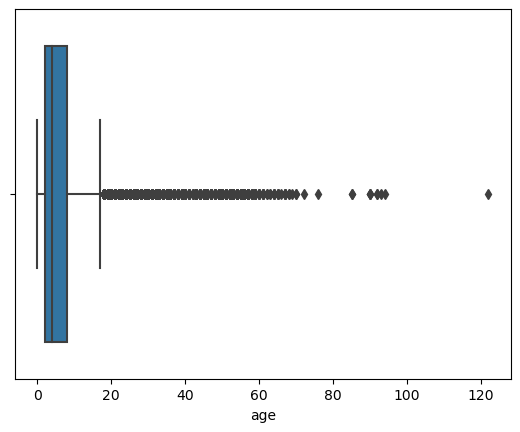

In [2682]:
sns.boxplot(data = df, x = 'age');

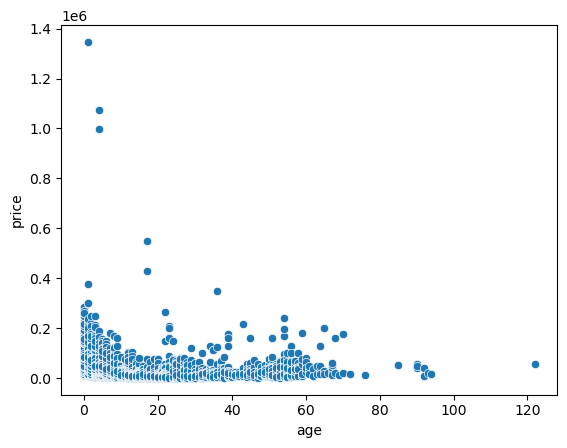

In [2683]:
sns.scatterplot(data = df, x = 'age', y = 'price');

In [2684]:
df.age.describe()

count    25061.000000
mean         6.846016
std          8.608165
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        122.000000
Name: age, dtype: float64

In [2685]:
df[df['age'] > 65][['make_model','age', 'mileage']]

make_model    age   mileage
26830             Peugeot    66.0   41170.0
26831     Ford Thunderbird   67.0   60000.0
26832     Ford Thunderbird   67.0   35000.0
26833     Ford Thunderbird   67.0       1.0
26834  Ford Thunderbird V8   67.0   23984.0
26835               Volvo    67.0   12100.0
26836                Fiat    68.0   59055.0
26838          Volvo PV544   68.0   99300.0
26839               Volvo    69.0   46000.0
26840    Mercedes-Benz 220   70.0   64000.0
26841             Renault    70.0   66000.0
26842                Opel    72.0   52466.0
26843          Peugeot 504   76.0  180000.0
26844                Ford    85.0   28000.0
26845                Ford    85.0   28000.0
26847             Ford  V8   90.0   15000.0
26848             Ford  V8   90.0   25600.0
26849             Ford  V8   90.0    3500.0
26850       Ford  Roadster   92.0   60000.0
26851             Peugeot    92.0    1233.0
26852               Ford M   93.0   65515.0
26853                Ford    94.0    5000.0
26854          Ford Bronco  122.0      10.0

In [2686]:
df[df['age'] > 65].index

Index([26830, 26831, 26832, 26833, 26834, 26835, 26836, 26838, 26839, 26840,
       26841, 26842, 26843, 26844, 26845, 26847, 26848, 26849, 26850, 26851,
       26852, 26853, 26854],
      dtype='int64')

In [2687]:
df.groupby(['age', 'mileage'])[['make_model', 'price']].value_counts()

age    mileage  make_model      price  
0.0    0.0      Dacia Lodgy     19500.0    1
                Toyota Mirai    75990.0    1
                Toyota Camry    45950.0    1
                Skoda Scala     33117.0    1
                Skoda Kamiq     22790.0    1
                                          ..
92.0   1233.0   Peugeot         8950.0     1
       60000.0  Ford  Roadster  40000.0    1
93.0   65515.0  Ford M          20000.0    1
94.0   5000.0   Ford            14490.0    1
122.0  10.0     Ford Bronco     57480.0    1
Name: count, Length: 23520, dtype: int64

In [2688]:
z_scores = stats.zscore(df['age'])
abs_z_scores = np.abs(z_scores)
outliers = df[abs_z_scores > 3]
outliers.head()

make_model     price          body_type   type  \
26320                  Nissan 200 SX   25000.0              Coupe   Used   
26321                  Nissan 200 SX   22000.0              Coupe   Used   
26322                  Nissan 200 SX   15000.0              Coupe   Used   
26323                  Nissan Datsun   37890.0              Coupe   Used   
26324                     Opel Manta   18990.0              Coupe   Used   
26326                    Peugeot 205   14900.0            Compact   Used   
26327                    Peugeot 205   14950.0        Convertible   Used   
26328                    Peugeot 205   10995.0        Convertible   Used   
26329                    Peugeot 205    4900.0        Convertible   Used   
26330                    Peugeot 205   21900.0              Sedan   Used   
26331                    Peugeot 205   19500.0              Sedan   Used   
26332                    Peugeot 205   18500.0              Sedan   Used   
26333                    Toyota MR 2   18990.0              Coupe   Used   
26334                   Toyota Supra   22500.0              Coupe   Used   
26335                   Toyota Supra   11898.0              Coupe   Used   
26336                   Toyota Supra   21500.0              Coupe   Used   
26337                   Toyota Supra   17500.0              Coupe   Used   
26338                      Volvo 480   20000.0              Coupe   Used   
26339                       Fiat 131   24500.0              Coupe   Used   
26340                          Ford   129950.0        Convertible   Used   
26343           Mercedes-Benz SL 560   44500.0        Convertible   Used   
26344                  Nissan 300 ZX   11800.0              Coupe   Used   
26345                  Nissan 300 ZX   11900.0              Coupe   Used   
26346                  Nissan Patrol    2500.0        Convertible   Used   
26347                   Nissan Sunny    2890.0              Coupe   Used   
26348                    Opel Kadett    4999.0        Convertible   Used   
26349                     Opel Manta   19900.0              Coupe   Used   
26350                    Peugeot 205    8990.0        Convertible   Used   
26351              Renault Alpine V6   34900.0              Coupe   Used   
26352              Renault Alpine V6   18350.0              Coupe   Used   
26353              Renault Alpine V6   27500.0              Coupe   Used   
26354              Renault Alpine V6   24990.0              Coupe   Used   
26355           Renault Alpine V6 V6   25000.0              Coupe   Used   
26356                    Renault R 4   29900.0        Convertible   Used   
26357                  Toyota Celica    9999.0              Coupe   Used   
26358                  Toyota Celica   14000.0              Coupe   Used   
26359                  Toyota Celica   65000.0              Coupe   Used   
26360                  Toyota Celica   17000.0              Coupe   Used   
26361            Toyota Land Cruiser   21160.0   Off-Road/Pick-up   Used   
26362                    Toyota MR 2   13900.0              Coupe   Used   
26363                    Toyota MR 2   10900.0              Coupe   Used   
26364                   Toyota Supra   10999.0              Coupe   Used   
26365                   Toyota Supra   16999.0              Coupe   Used   
26366                      Volvo 480    3875.0              Coupe   Used   
26367                      Volvo 480    3200.0              Coupe   Used   
26368                      Volvo 780    7999.0              Coupe   Used   
26369                       Fiat 126    3150.0            Compact   Used   
26370                     Fiat Coupe    6500.0              Coupe   Used   
26372           Mercedes-Benz SL 300   32500.0        Convertible   Used   
26373                  Nissan 300 ZX   14500.0              Coupe   Used   
26374                 Nissan Skyline   32600.0              Coupe   Used   
26375                   Nissan Sunny    2900.0              Coupe   Used  

In [2689]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

# IQR hesaplama
IQR = Q3 - Q1

# Alt ve üst sınırlar
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 5 * IQR

# Uç değerleri tespit etme
outliers = df[df['age'] > upper_bound]

In [2690]:
outliers

make_model     price          body_type   type  \
26444                       Fiat 126    5900.0              Sedan   Used   
26445                     Fiat Ritmo   18600.0              Coupe   Used   
26446                     Ford Capri    6900.0              Coupe   Used   
26447              Mercedes-Benz 230  128000.0        Convertible   Used   
26448              Mercedes-Benz 230    9990.0              Coupe   Used   
26449              Mercedes-Benz 500   45000.0        Convertible   Used   
26450           Mercedes-Benz SL 380   28490.0        Convertible   Used   
26451                  Nissan 280 ZX   17950.0              Coupe   Used   
26452                     Opel Monza    6500.0              Coupe   Used   
26453                    Peugeot 505   17500.0              Sedan   Used   
26454                       Renault   178000.0              Coupe   Used   
26455            Renault Alpine A310   29900.0        Convertible   Used   
26456                  Renault Fuego   25000.0              Coupe   Used   
26457                   Renault R 18   10900.0              Sedan   Used   
26458                    Renault R 4   19900.0        Convertible   Used   
26459                    Renault R 5  160000.0              Coupe   Used   
26460                     Fiat X 1/9   15000.0              Coupe   Used   
26461                  Nissan 280 ZX   20200.0        Convertible   Used   
26462                     Opel Manta   11000.0              Coupe   Used   
26463                     Opel Manta   21980.0              Coupe   Used   
26464                  Renault Fuego    6000.0              Coupe   Used   
26465                        Toyota    14500.0   Off-Road/Pick-up   Used   
26467                  Toyota Celica   23000.0              Coupe   Used   
26468            Toyota Land Cruiser   16450.0   Off-Road/Pick-up   Used   
26471                Fiat 124 Spider   25750.0        Convertible   Used   
26472                       Fiat 131   14000.0              Coupe   Used   
26473  Mercedes-Benz SL 280 Roadster   25000.0        Convertible   Used   
26474           Mercedes-Benz SL 450   14995.0        Convertible   Used   
26475                     Opel Manta   11000.0              Coupe   Used   
26476                 Toyota Corolla    8900.0              Coupe   Used   
26477                      Volvo 262   10800.0              Coupe   Used   
26478                     Opel Manta    8950.0              Coupe   Used   
26479                     Opel Manta   22950.0              Coupe   Used   
26480                     Opel Monza    8250.0              Coupe   Used   
26481                    Peugeot 305    6940.0              Sedan   Used   
26482                      Volvo 240   17000.0              Coupe   Used   
26483                       Fiat 127   18900.0              Coupe   Used   
26484                       Fiat 131  214900.0              Coupe   Used   
26485                   Ford Mustang   15800.0              Coupe   Used   
26486           Mercedes-Benz SL 280   33890.0        Convertible   Used   
26487                     Opel Manta   22500.0              Coupe   Used   
26488                     Opel Monza    9900.0              Coupe   Used   
26489                     Opel Monza    7900.0              Coupe   Used   
26490                     Opel Monza    7900.0              Coupe   Used   
26491                     Opel Monza   11500.0              Coupe   Used   
26492            Renault Alpine A310   38900.0              Coupe   Used   
26493                      Volvo 244    7450.0              Sedan   Used   
26494                      Volvo 262   17000.0              Coupe   Used   
26495                      Volvo 262    8500.0              Coupe   Used   
26496                      Volvo 262   16900.0              Coupe   Used   
26497              Mercedes-Benz 280   13950.0              Coupe   Used   
26498                        Nissan    34989.0              Coupe   Used  

In [2691]:
# drop

drop_age_index = df[df['age'] > 65].index
drop_age_index

Index([26830, 26831, 26832, 26833, 26834, 26835, 26836, 26838, 26839, 26840,
       26841, 26842, 26843, 26844, 26845, 26847, 26848, 26849, 26850, 26851,
       26852, 26853, 26854],
      dtype='int64')

In [2692]:
df.drop(index=drop_age_index ,inplace=True)

# MAKE_MODEL

In [2694]:
no_model_df = df[~df['make_model'].str.split('').str[0].isin(df.make_model)]
no_model_df 

make_model     price          body_type             type  doors  \
5           Dacia Duster   21000.0   Off-Road/Pick-up   Pre-registered    5.0   
6           Dacia Duster   21000.0   Off-Road/Pick-up   Pre-registered    5.0   
7           Dacia Duster   21150.0   Off-Road/Pick-up    Demonstration    5.0   
8           Dacia Duster   25190.0   Off-Road/Pick-up    Demonstration    5.0   
10          Dacia Duster   24222.0   Off-Road/Pick-up    Demonstration    5.0   
...                  ...       ...                ...              ...    ...   
26825           Peugeot    16500.0              Sedan             Used    4.0   
26826       Ford Mercury   26750.0              Coupe             Used    3.0   
26827   Ford Thunderbird   28900.0        Convertible             Used    3.0   
26828  Mercedes-Benz 190  199999.0        Convertible             Used    2.0   
26829        Opel Rekord   15990.0              Coupe             Used    2.0   

      warranty   mileage    gearbox fuel_type  colour  ...  \
5          Yes    1000.0     Manual    Diesel  Orange  ...   
6          Yes    1000.0     Manual    Diesel  Orange  ...   
7          Yes    4500.0     Manual   Benzine   Black  ...   
8           No    4018.0     Manual   Benzine   Black  ...   
10          No    8000.0  Automatic   Benzine   Black  ...   
...        ...       ...        ...       ...     ...  ...   
26825       No   84380.0     Manual   Benzine   Black  ...   
26826       No  124000.0  Automatic   Benzine   White  ...   
26827       No   30000.0  Automatic   Benzine     Red  ...   
26828       No    5650.0     Manual   Benzine    Grey  ...   
26829       No   78000.0     Manual   Benzine     Red  ...   

      safety_security_package comfort_convenience_package  ent_media_package  \
5                    Advanced                    Advanced           Advanced   
6                    Advanced                    Advanced           Advanced   
7                    Advanced                    Advanced           Advanced   
8                    Advanced                    Advanced           Advanced   
10                   Advanced                    Advanced           Advanced   
...                       ...                         ...                ...   
26825                   Basic                    Advanced           Enhanced   
26826                   Basic                    Advanced           Advanced   
26827                   Basic                    Enhanced           Advanced   
26828                   Basic                    Enhanced           Advanced   
26829                   Basic                    Enhanced           Advanced   

       num_of_extras  index  z_score_gears price_zscore  mileage_zscore  \
5                5.0    NaN       0.101540    -0.100024       -1.040897   
6                5.0    NaN       0.101540    -0.100024       -1.040897   
7                5.0    NaN       0.101540    -0.094110       -0.988756   
8                5.0    NaN       0.101540     0.065179       -0.995937   
10               5.0    NaN       0.101540     0.027013       -0.936615   
...              ...    ...            ...          ...             ...   
26825            3.0    NaN      -1.876651    -0.277450        0.201248   
26826            2.0    NaN      -2.536049     0.126687        0.791483   
26827            4.0    NaN      -1.876651     0.211457       -0.608873   
26828            3.0    NaN      -1.217254     6.957546       -0.971624   
26829            2.0    NaN      -1.876651    -0.297558        0.106202   

       cylinders_zscore           make  
5             -0.020221          Dacia  
6             -0.020221          Dacia  
7             -0.020221          Dacia  
8             -0.020221          Dacia  
10            -0.020221          Dacia  
...                 ...            ...  
26825         -0.020221        Peugeot  
26826          3.739751           Ford  
26827          3.739751           Ford  
26828         -0.020221 

In [2695]:
df[df['make_model'].str.split().str.len() == 1]

make_model     price          body_type             type  doors  \
289             Fiat    27975.0            Compact    Demonstration    3.0   
847          Hyundai    22480.0            Compact    Demonstration    5.0   
851          Hyundai    21390.0      Station wagon   Pre-registered    4.0   
852          Hyundai    40067.0              Sedan   Pre-registered    5.0   
853          Hyundai    38769.0              Sedan   Pre-registered    5.0   
1147   Mercedes-Benz   159850.0        Convertible    Demonstration    2.0   
1148   Mercedes-Benz   151099.0        Convertible    Demonstration    2.0   
1149   Mercedes-Benz   132999.0        Convertible    Demonstration    2.0   
1150   Mercedes-Benz   132880.0        Convertible    Demonstration    3.0   
1151   Mercedes-Benz   214885.0              Coupe    Demonstration    4.0   
1152   Mercedes-Benz   179995.0              Sedan    Demonstration    5.0   
1153   Mercedes-Benz   103580.0              Sedan    Demonstration    5.0   
1807         Peugeot    19250.0        Convertible             Used    2.0   
2059         Renault    26450.0   Off-Road/Pick-up             Used    5.0   
2060         Renault    30890.0   Off-Road/Pick-up    Demonstration    5.0   
2061         Renault    29890.0   Off-Road/Pick-up   Pre-registered    5.0   
2062         Renault    32710.0   Off-Road/Pick-up    Demonstration    5.0   
2663          Toyota    51990.0              Coupe    Demonstration    2.0   
2664          Toyota    61485.0   Off-Road/Pick-up    Demonstration    5.0   
2975           Volvo    68890.0   Off-Road/Pick-up    Demonstration    5.0   
2976           Volvo    64900.0   Off-Road/Pick-up    Demonstration    5.0   
3152            Fiat    22990.0              Coupe             Used    3.0   
3153            Fiat    27900.0              Coupe             Used    2.0   
3358            Ford    65490.0   Off-Road/Pick-up             Used    5.0   
3679         Hyundai    19990.0   Off-Road/Pick-up             Used    5.0   
3680         Hyundai    19980.0   Off-Road/Pick-up             Used    5.0   
3681         Hyundai    17691.0   Off-Road/Pick-up             Used    5.0   
3682         Hyundai    18590.0   Off-Road/Pick-up             Used    5.0   
3683         Hyundai    21991.0              Sedan    Demonstration    5.0   
3918   Mercedes-Benz   188008.0              Sedan             Used    5.0   
4671         Renault    34890.0      Station wagon             Used    5.0   
4672         Renault    35990.0      Station wagon             Used    5.0   
5339          Toyota    46990.0   Off-Road/Pick-up    Demonstration    5.0   
6394         Hyundai    27000.0      Station wagon             Used    5.0   
7289         Renault    74990.0              Coupe             Used    2.0   
7456            SEAT    29440.0      Station wagon             Used    4.0   
7870          Toyota    71400.0              Coupe             Used    2.0   
7871          Toyota    21990.0      Station wagon             Used    5.0   
9208   Mercedes-Benz    44990.0        Convertible             Used    2.0   
9532          Nissan    44990.0              Coupe             Used    2.0   
10813          Skoda    14980.0              Sedan             Used    5.0   
11772           Fiat    22999.0        Convertible             Used    2.0   
11773           Fiat    19989.0        Convertible             Used    2.0   
11774           Fiat    21890.0        Convertible             Used    2.0   
12538  Mercedes-Benz    76890.0        Convertible             Used    2.0   
13082           Opel    15754.0        Convertible             Used    2.0   
13083           Opel    15754.0        Convertible             Used    2.0   
13084           Opel    15754.0        Convertible             Used    2.0   
13085           Opel    15754.0        Convertible             Used    2.0   
13531        Renault     6500.0            Compact             Used    2.0   
14235         Toyota    16400.0  

In [2696]:
df[df['make_model'].str.split().str.len() == 1].index

Index([  289,   847,   851,   852,   853,  1147,  1148,  1149,  1150,  1151,
       ...
       26722, 26723, 26724, 26788, 26797, 26798, 26799, 26815, 26818, 26825],
      dtype='int64', length=170)

In [2697]:
drop_make_model_index = df[df['make_model'].str.split().str.len() == 1].index
drop_make_model_index

Index([  289,   847,   851,   852,   853,  1147,  1148,  1149,  1150,  1151,
       ...
       26722, 26723, 26724, 26788, 26797, 26798, 26799, 26815, 26818, 26825],
      dtype='int64', length=170)

In [2698]:
df.drop(index=drop_make_model_index,inplace=True)

# PRICE

In [2700]:
df.price.describe()

count    2.486800e+04
mean     2.327586e+04
std      2.477915e+04
min      4.900000e+02
25%      1.190000e+04
50%      1.799000e+04
75%      2.790000e+04
max      1.346900e+06
Name: price, dtype: float64

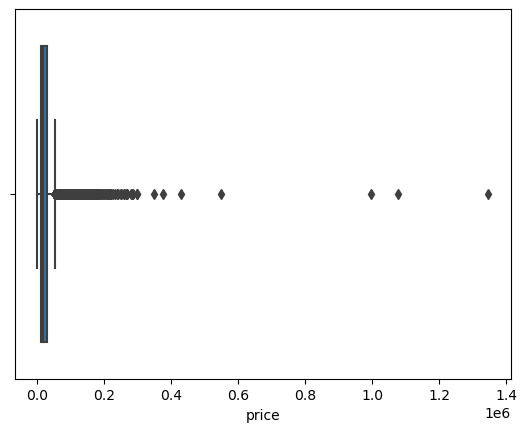

In [2701]:
sns.boxplot(data = df, x = 'price');

In [2702]:
df[df['price'] > 250000][['make_model', 'price', 'mileage', 'age', 'power_kW']]

make_model      price  mileage   age    power_kW
1181     Mercedes-Benz AMG GT Roadster   283900.0   3569.0   0.0  409.000000
1355            Mercedes-Benz G 63 AMG   268900.0   1800.0   0.0  430.000000
1357            Mercedes-Benz G 63 AMG   259880.0   9900.0   0.0  430.000000
1358            Mercedes-Benz G 63 AMG   279063.0   9900.0   0.0  430.000000
1359            Mercedes-Benz G 63 AMG   284780.0   9900.0   0.0  430.000000
1360       Mercedes-Benz G 63 AMG G 63   267810.0   3003.0   0.0  430.000000
1361       Mercedes-Benz G 63 AMG G 63   259000.0   4003.0   0.0  430.000000
3491                           Ford GT  1346900.0   3500.0   1.0  388.250000
4100            Mercedes-Benz G 63 AMG   375900.0    100.0   1.0  430.000000
4143   Mercedes-Benz GLE 63 AMG GLE 63   299000.0   8000.0   1.0  430.000000
4144   Mercedes-Benz GLE 63 AMG GLE 63   299000.0   8000.0   1.0  430.000000
12176                       Ford GT V6  1075900.0    145.0   4.0  123.592744
12177                       Ford GT V6   998000.0   1900.0   4.0  123.592744
24438                          Ford GT   549000.0  20800.0  17.0  405.000000
24439                          Ford GT   430000.0   3166.0  17.0  405.000000
25490                   Nissan Skyline   264900.0  45000.0  22.0  313.000000
26395                      Ford  RS200   349000.0   4600.0  36.0  412.000000

In [2703]:
z_scores = stats.zscore(df['price'])
abs_z_scores = np.abs(z_scores)

# Z-skoru 3'ten büyük olan uç değerler
outliers_price = df[abs_z_scores > 3]
outliers_price

make_model      price          body_type  \
743                       Ford Mustang   147750.0              Coupe   
1157             Mercedes-Benz  S 580e   178890.0              Sedan   
1172              Mercedes-Benz AMG GT   224885.0              Coupe   
1173              Mercedes-Benz AMG GT   171950.0              Coupe   
1174              Mercedes-Benz AMG GT   137880.0              Coupe   
1175              Mercedes-Benz AMG GT   215550.0              Coupe   
1176              Mercedes-Benz AMG GT   132880.0              Coupe   
1177              Mercedes-Benz AMG GT   105980.0              Coupe   
1179     Mercedes-Benz AMG GT Roadster   176855.0        Convertible   
1180     Mercedes-Benz AMG GT Roadster   189950.0        Convertible   
1181     Mercedes-Benz AMG GT Roadster   283900.0        Convertible   
1182           Mercedes-Benz AMG GT V8   147700.0              Coupe   
1224            Mercedes-Benz C 63 AMG   112900.0        Convertible   
1225            Mercedes-Benz C 63 AMG   104880.0        Convertible   
1226            Mercedes-Benz C 63 AMG   108290.0        Convertible   
1227            Mercedes-Benz C 63 AMG   107289.0        Convertible   
1230            Mercedes-Benz C 63 AMG   113900.0              Coupe   
1231            Mercedes-Benz C 63 AMG   103400.0              Coupe   
1233            Mercedes-Benz C 63 AMG    98850.0              Coupe   
1234            Mercedes-Benz C 63 AMG   104880.0              Coupe   
1235            Mercedes-Benz C 63 AMG    98850.0              Coupe   
1236            Mercedes-Benz C 63 AMG   101980.0              Coupe   
1237         Mercedes-Benz C 63 AMG V8   114900.0        Convertible   
1271          Mercedes-Benz CLS 53 AMG   103785.0              Coupe   
1272          Mercedes-Benz CLS 53 AMG    99780.0              Coupe   
1273          Mercedes-Benz CLS 53 AMG   112750.0              Coupe   
1286            Mercedes-Benz E 53 AMG   102990.0        Convertible   
1288            Mercedes-Benz E 53 AMG   106890.0              Coupe   
1292            Mercedes-Benz E 53 AMG   109989.0              Sedan   
1293            Mercedes-Benz E 63 AMG   154900.0      Station wagon   
1313             Mercedes-Benz EQE 350    98990.0              Sedan   
1317             Mercedes-Benz EQE 350    97685.0              Sedan   
1318             Mercedes-Benz EQE 350   117890.0              Sedan   
1320              Mercedes-Benz EQE 43   129879.0      Station wagon   
1321              Mercedes-Benz EQE 43   129885.0              Sedan   
1322              Mercedes-Benz EQE 43   115900.0              Sedan   
1323              Mercedes-Benz EQE 43   118790.0              Sedan   
1324              Mercedes-Benz EQE 43   112444.0              Sedan   
1326                 Mercedes-Benz EQS   168444.0            Compact   
1327                 Mercedes-Benz EQS   122500.0            Compact   
1328                 Mercedes-Benz EQS   117500.0            Compact   
1329                 Mercedes-Benz EQS   177879.0      Station wagon   
1330                 Mercedes-Benz EQS    98879.0      Station wagon   
1331                 Mercedes-Benz EQS   101499.0      Station wagon   
1332                 Mercedes-Benz EQS   139980.0              Sedan   
1333                 Mercedes-Benz EQS   149885.0              Sedan   
1334                 Mercedes-Benz EQS   151369.0              Sedan   
1335                 Mercedes-Benz EQS   106745.0              Sedan   
1336                 Mercedes-Benz EQS   152885.0              Sedan   
1337                 Mercedes-Benz EQS   149750.0              Sedan   
1338                 Mercedes-Benz EQS   106750.0              Sedan   
1339                 Mercedes-Benz EQS   104885.0              Sedan   
1340                 Mercedes-Benz EQS   176900.0              Sedan   
1341                 Mercedes-Benz EQS   121470.0              Sedan   
1342                 Mercedes-Benz EQS   109950.0              Sedan

In [2704]:
outliers_price.sort_values(by='age', ascending = False).head(30)

make_model     price     body_type   type  doors  \
26828            Mercedes-Benz 190  199999.0   Convertible   Used    2.0   
26824            Mercedes-Benz 220  129000.0   Convertible   Used    2.0   
26804            Mercedes-Benz 190  180000.0   Convertible   Used    2.0   
26794          Renault Alpine A110   98500.0         Coupe   Used    2.0   
26754            Mercedes-Benz 280   99888.0   Convertible   Used    2.0   
26730                   Ford GT V8  129950.0         Coupe   Used    2.0   
26711              Ford Mustang V8   99500.0         Coupe   Used    2.0   
26670  Ford  INTERMECCANICA SPYDER  240000.0   Convertible   Used    2.0   
26671                      Ford GT  169950.0         Coupe   Used    2.0   
26677                 Ford Mustang  197400.0         Coupe   Used    2.0   
26628          Renault Alpine A110  160000.0         Coupe   Used    2.0   
26517                      Ford GT  159500.0         Coupe   Used    2.0   
26484                     Fiat 131  214900.0         Coupe   Used    2.0   
26459                  Renault R 5  160000.0         Coupe   Used    2.0   
26447            Mercedes-Benz 230  128000.0   Convertible   Used    2.0   
26397                       Ford M  125000.0   Convertible   Used    3.0   
26395                  Ford  RS200  349000.0         Coupe   Used    2.0   
26382            Renault Alpine V6  111111.0         Coupe   Used    2.0   
26381          Renault Alpine A610  111111.0         Coupe   Used    2.0   
26150                 Toyota Supra  120000.0         Coupe   Used    3.0   
25736                   Fiat Coupe  150000.0         Coupe   Used    2.0   
25661               Nissan Skyline  159999.0         Coupe   Used    2.0   
25656                  Nissan GT-R  200000.0         Coupe   Used    2.0   
25654                  Nissan GT-R  159999.0         Coupe   Used    2.0   
25646          Mercedes-Benz G 500  209000.0   Convertible   Used    3.0   
25490               Nissan Skyline  264900.0         Coupe   Used    2.0   
25491               Nissan Skyline  149990.0         Coupe   Used    2.0   
24438                      Ford GT  549000.0         Coupe   Used    2.0   
24439                      Ford GT  430000.0         Coupe   Used    2.0   
23008                  Nissan GT-R  104950.0         Coupe   Used    2.0   

      warranty   mileage    gearbox fuel_type  colour  ...  \
26828       No    5650.0     Manual   Benzine    Grey  ...   
26824       No   35633.0     Manual   Benzine  Silver  ...   
26804       No      10.0     Manual   Benzine    Grey  ...   
26794       No   43236.0     Manual   Benzine    Blue  ...   
26754       No   71198.0     Manual   Benzine  Silver  ...   
26730      Yes   33809.0     Manual   Benzine    Blue  ...   
26711       No   94665.0     Manual   Benzine   Black  ...   
26670       No    1000.0     Manual   Benzine   Black  ...   
26671      Yes     202.0     Manual   Benzine   Black  ...   
26677       No   45000.0     Manual   Benzine   Black  ...   
26628       No   94000.0     Manual   Benzine    Blue  ...   
26517       No     596.0     Manual   Benzine    Blue  ...   
26484       No     300.0     Manual   Benzine   White  ...   
26459       No    1500.0     Manual   Benzine    Blue  ...   
26447       No   88000.0     Manual   Benzine  Silver  ...   
26397      Yes    7500.0     Manual   Benzine    Blue  ...   
26395       No    4600.0     Manual   Benzine   White  ...   
26382       No   85000.0     Manual   Benzine   White  ...   
26381       No   85000.0     Manual   Benzine   White  ...   
26150       No  188588.0     Manual   Benzine   Black  ...   
25736       No  125000.0     Manual   Benzine    Blue  ...   
25661       No   68314.0     Manual   Benzine   White  ...   
25656       No   64000.0     Manual   Benzine   White  ...   
25654       No   68314.0     Manual   Benzine   White  ...   
25646       No  172000.0  Automatic   Benzine   Black  ...   
25490       No   45000.0     Manual   Benzine    Blue  

In [2705]:
# IQR hesaplama
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Outlier sınırları
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Outliers tespiti
outliers_pri = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers_pri
print(Q1)
print(Q3)
print(IQR)
print(lower_bound)
print(upper_bound)

11900.0
27900.0
16000.0
-36100.0
75900.0


In [2706]:
df.price.min()

490.0

In [2707]:
# Z-skoru hesaplama
mean_price = df['price'].mean()
std_price = df['price'].std()
df['z_score'] = (df['price'] - mean_price) / std_price

# Aykırı değerlerin belirlenmesi (genellikle z-skoru > 3 veya z-skoru < -3 aykırı kabul edilir)
outliers_x = df[np.abs(df['z_score']) > 3]
outliers_x

make_model      price          body_type  \
743                       Ford Mustang   147750.0              Coupe   
1157             Mercedes-Benz  S 580e   178890.0              Sedan   
1172              Mercedes-Benz AMG GT   224885.0              Coupe   
1173              Mercedes-Benz AMG GT   171950.0              Coupe   
1174              Mercedes-Benz AMG GT   137880.0              Coupe   
1175              Mercedes-Benz AMG GT   215550.0              Coupe   
1176              Mercedes-Benz AMG GT   132880.0              Coupe   
1177              Mercedes-Benz AMG GT   105980.0              Coupe   
1179     Mercedes-Benz AMG GT Roadster   176855.0        Convertible   
1180     Mercedes-Benz AMG GT Roadster   189950.0        Convertible   
1181     Mercedes-Benz AMG GT Roadster   283900.0        Convertible   
1182           Mercedes-Benz AMG GT V8   147700.0              Coupe   
1224            Mercedes-Benz C 63 AMG   112900.0        Convertible   
1225            Mercedes-Benz C 63 AMG   104880.0        Convertible   
1226            Mercedes-Benz C 63 AMG   108290.0        Convertible   
1227            Mercedes-Benz C 63 AMG   107289.0        Convertible   
1230            Mercedes-Benz C 63 AMG   113900.0              Coupe   
1231            Mercedes-Benz C 63 AMG   103400.0              Coupe   
1233            Mercedes-Benz C 63 AMG    98850.0              Coupe   
1234            Mercedes-Benz C 63 AMG   104880.0              Coupe   
1235            Mercedes-Benz C 63 AMG    98850.0              Coupe   
1236            Mercedes-Benz C 63 AMG   101980.0              Coupe   
1237         Mercedes-Benz C 63 AMG V8   114900.0        Convertible   
1271          Mercedes-Benz CLS 53 AMG   103785.0              Coupe   
1272          Mercedes-Benz CLS 53 AMG    99780.0              Coupe   
1273          Mercedes-Benz CLS 53 AMG   112750.0              Coupe   
1286            Mercedes-Benz E 53 AMG   102990.0        Convertible   
1288            Mercedes-Benz E 53 AMG   106890.0              Coupe   
1292            Mercedes-Benz E 53 AMG   109989.0              Sedan   
1293            Mercedes-Benz E 63 AMG   154900.0      Station wagon   
1313             Mercedes-Benz EQE 350    98990.0              Sedan   
1317             Mercedes-Benz EQE 350    97685.0              Sedan   
1318             Mercedes-Benz EQE 350   117890.0              Sedan   
1320              Mercedes-Benz EQE 43   129879.0      Station wagon   
1321              Mercedes-Benz EQE 43   129885.0              Sedan   
1322              Mercedes-Benz EQE 43   115900.0              Sedan   
1323              Mercedes-Benz EQE 43   118790.0              Sedan   
1324              Mercedes-Benz EQE 43   112444.0              Sedan   
1326                 Mercedes-Benz EQS   168444.0            Compact   
1327                 Mercedes-Benz EQS   122500.0            Compact   
1328                 Mercedes-Benz EQS   117500.0            Compact   
1329                 Mercedes-Benz EQS   177879.0      Station wagon   
1330                 Mercedes-Benz EQS    98879.0      Station wagon   
1331                 Mercedes-Benz EQS   101499.0      Station wagon   
1332                 Mercedes-Benz EQS   139980.0              Sedan   
1333                 Mercedes-Benz EQS   149885.0              Sedan   
1334                 Mercedes-Benz EQS   151369.0              Sedan   
1335                 Mercedes-Benz EQS   106745.0              Sedan   
1336                 Mercedes-Benz EQS   152885.0              Sedan   
1337                 Mercedes-Benz EQS   149750.0              Sedan   
1338                 Mercedes-Benz EQS   106750.0              Sedan   
1339                 Mercedes-Benz EQS   104885.0              Sedan   
1340                 Mercedes-Benz EQS   176900.0              Sedan   
1341                 Mercedes-Benz EQS   121470.0              Sedan   
1342                 Mercedes-Benz EQS   109950.0              Sedan

In [2708]:
outliers_x.describe()

price       doors        mileage       seats  engine_size  \
count  3.390000e+02  339.000000     339.000000  339.000000   339.000000   
mean   1.537420e+05    3.348083   23087.238938    4.185841  3496.112094   
std    1.077258e+05    1.283632   28959.343076    1.086893  1131.908716   
min    9.768500e+04    2.000000      10.000000    2.000000  1000.000000   
25%    1.108900e+05    2.000000    4900.000000    4.000000  2925.000000   
50%    1.299000e+05    3.000000    9900.000000    4.000000  3799.000000   
75%    1.629300e+05    5.000000   31942.500000    5.000000  3982.000000   
max    1.346900e+06    5.000000  188588.000000    7.000000  5980.000000   

            gears  co2_emissions   cylinders  empty_weight    power_kW  \
count  339.000000     339.000000  339.000000    339.000000  339.000000   
mean     7.053097     210.091445    6.734513   2017.173304  339.435735   
std      2.365334     104.901985    1.391124    350.650213   87.182174   
min      1.000000       0.000000    4.000000   1050.000000   77.000000   
25%      6.000000     188.000000    6.000000   1746.000000  273.006701   
50%      7.000000     252.000000    6.000000   1992.000000  350.000000   
75%      9.000000     275.500000    8.000000   2324.000000  419.000000   
max     10.000000     420.000000   12.000000   2690.000000  450.000000   

       fuel_consumption_comb         age  num_of_extras  index  z_score_gears  \
count             339.000000  339.000000     339.000000    0.0     339.000000   
mean                9.347321    5.241888       6.463127    NaN       0.795950   
std                 2.858273   11.733501       3.010971    NaN       1.559695   
min                 3.447727    0.000000       2.000000    NaN      -3.195446   
25%                 6.800000    0.000000       5.000000    NaN       0.101540   
50%                10.400000    1.000000       5.000000    NaN       0.760938   
75%                11.800000    4.000000       9.000000    NaN       2.079732   
max                12.900000   65.000000      17.000000    NaN       2.739129   

       price_zscore  mileage_zscore  cylinders_zscore     z_score  
count    339.000000      339.000000        339.000000  339.000000  
mean       5.133726       -0.711855          2.550202    5.265159  
std        4.247412        0.431419          1.307647    4.347438  
min        2.923511       -1.055646         -0.020221    3.002893  
25%        3.444158       -0.982797          1.859765    3.535801  
50%        4.193684       -0.908310          1.859765    4.302978  
75%        5.495990       -0.579934          3.739751    5.635954  
max       52.177543        1.753676          7.499723   53.416854

In [2709]:
outliers_x.index

Index([  743,  1157,  1172,  1173,  1174,  1175,  1176,  1177,  1179,  1180,
       ...
       26670, 26671, 26677, 26711, 26730, 26754, 26794, 26804, 26824, 26828],
      dtype='int64', length=339)

In [2710]:
drop_price_indexes = outliers_x.index
drop_price_indexes
df.drop(index=drop_price_indexes,inplace=True)

In [2711]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24529 entries, 5 to 26829
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   24529 non-null  object 
 1   price                        24529 non-null  float64
 2   body_type                    24529 non-null  object 
 3   type                         24529 non-null  object 
 4   doors                        24529 non-null  float64
 5   warranty                     24529 non-null  object 
 6   mileage                      24529 non-null  float64
 7   gearbox                      24529 non-null  object 
 8   fuel_type                    24529 non-null  object 
 9   colour                       24529 non-null  object 
 10  paint                        24529 non-null  object 
 11  seller                       24529 non-null  object 
 12  seats                        24529 non-null  float64
 13  engine_size          

In [2712]:
df.drop(columns=['index','location_country', 'z_score_gears', 'price_zscore', 'mileage_zscore', 'cylinders_zscore', 'make', 'z_score', 'cylinders'], inplace=True)

In [2713]:
df.reset_index(drop=True, inplace=True)

In [2714]:
df.to_csv('final_scout_not_dummy.csv',index=False)

# Paint

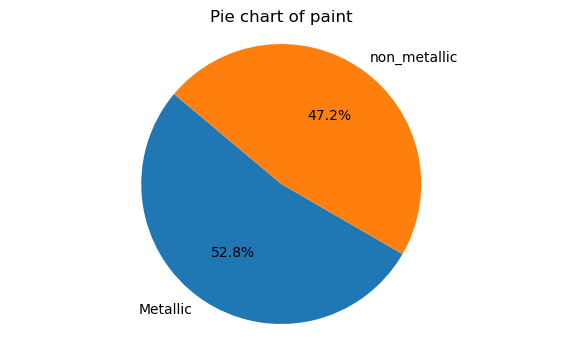

In [2716]:
pie_chart_column(df,'paint')

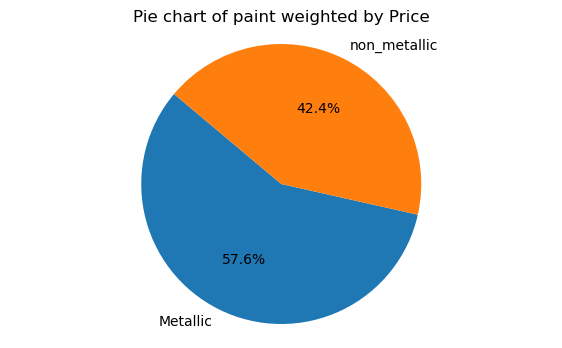

In [2717]:
pie_chart_with_price(df,'paint')

# 2.Color

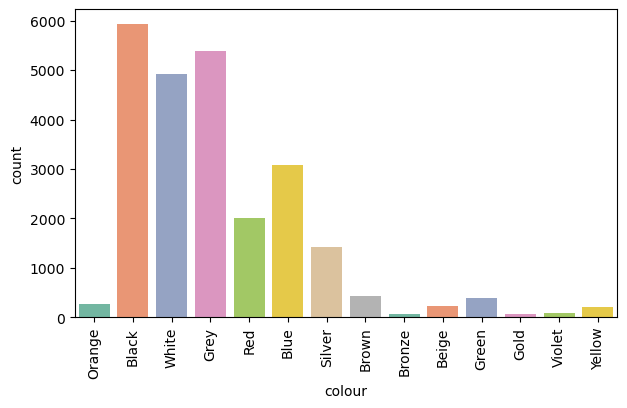

In [2719]:
count_plot_column(df,'colour')

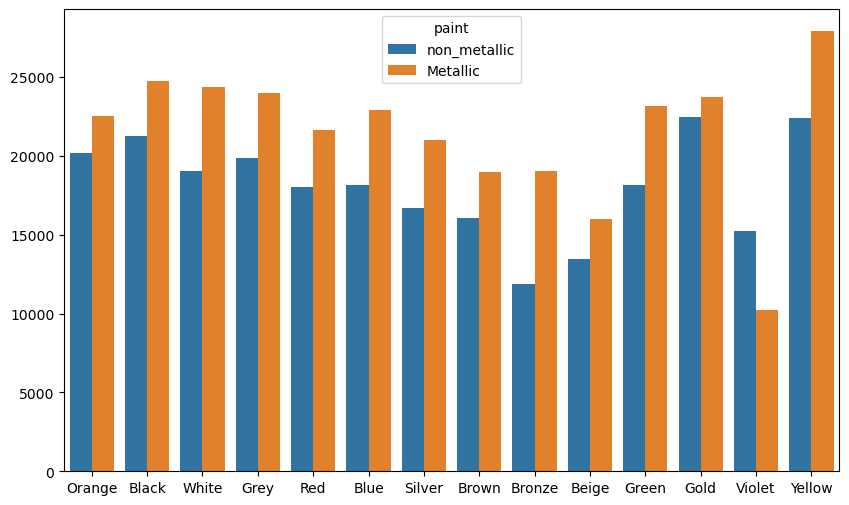

In [2720]:
barplot_column(df,'colour','price', hue_col ='paint')

# 3. Make Model

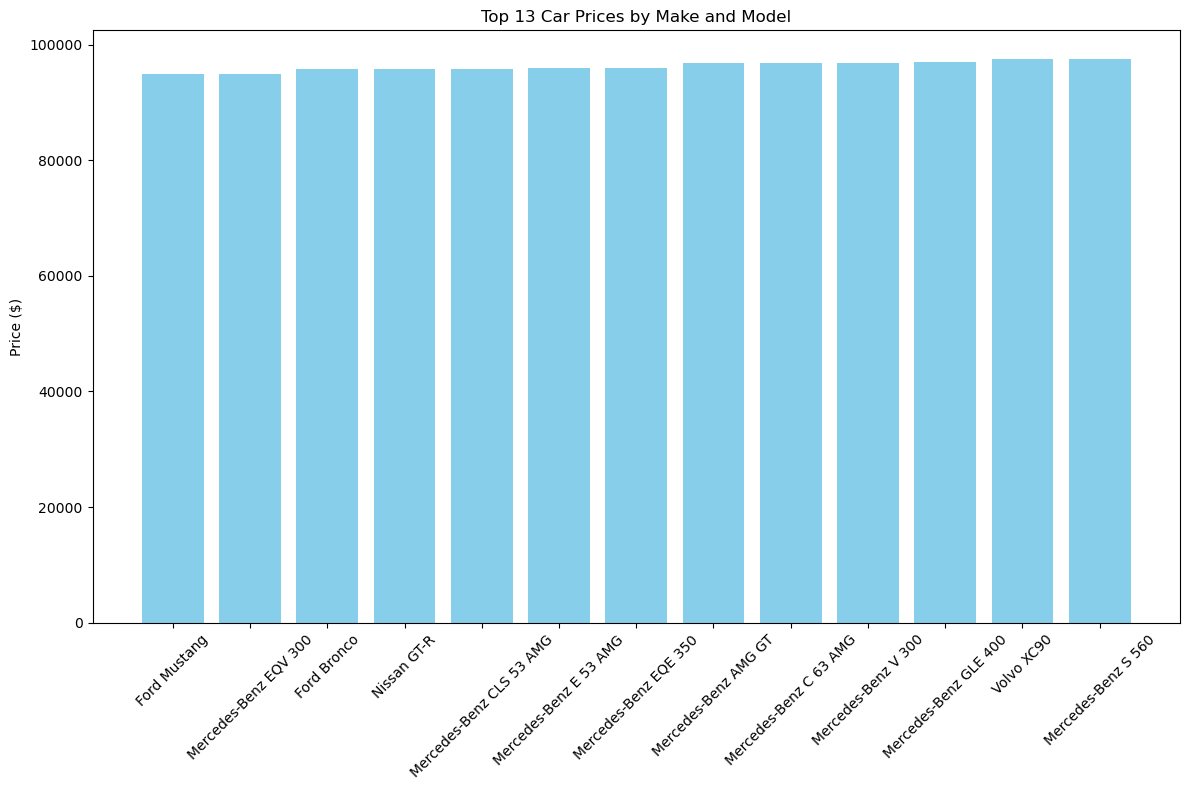

In [2722]:

# Group by 'make_model' and get the top 20 prices for each group
top_prices = df.groupby('make_model')['price'].nlargest(13).reset_index(level=0, drop=True)

# Since we want the top 13 prices overall, we need to reset the index and sort by price
top_prices_df = df.loc[top_prices.index].sort_values(by='price', ascending=False).head(20)

# Extracting the make/model names and prices for plotting
makes_models = top_prices_df['make_model']
prices = top_prices_df['price']

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(makes_models, prices, color='skyblue')
plt.ylabel('Price ($)')
plt.title('Top 13 Car Prices by Make and Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().invert_xaxis()  # Invert x-axis to have the highest price on the right
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# 4. Body Type

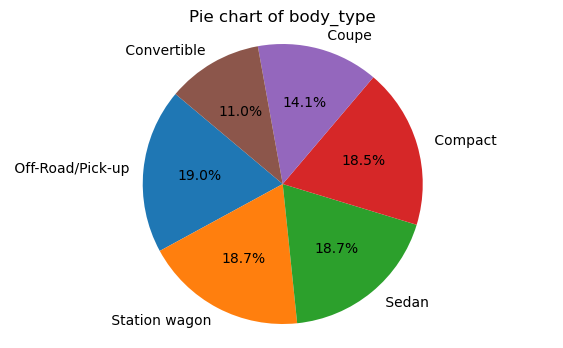

In [2724]:
pie_chart_column(df,'body_type')

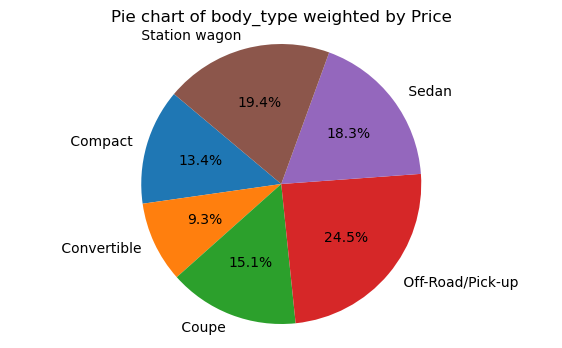

In [2725]:
pie_chart_with_price(df,'body_type')

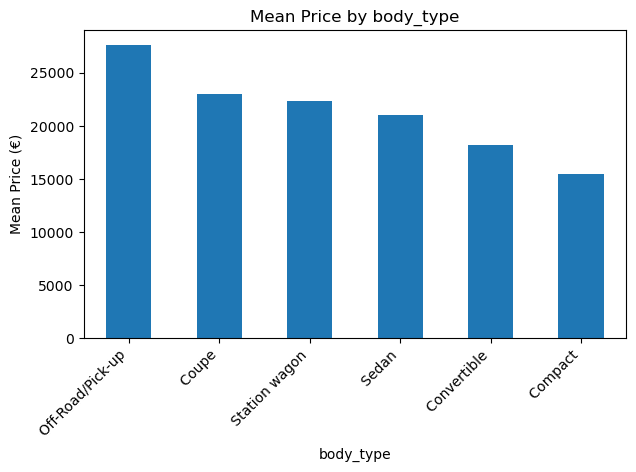

In [2726]:
barplot_column_by_price(df,'body_type')

# 5. Type

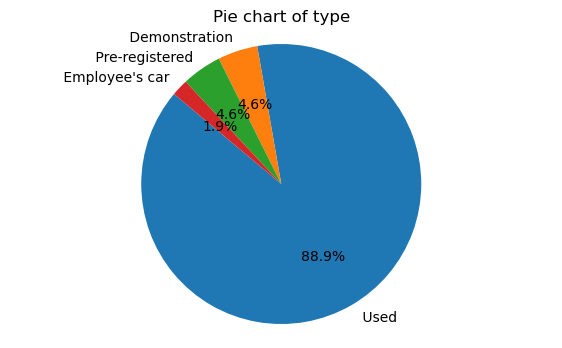

In [2728]:
pie_chart_column(df,'type')

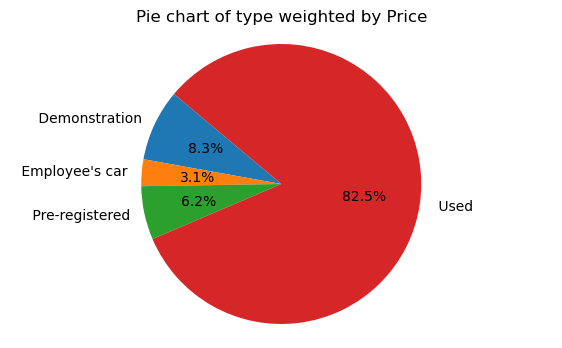

In [2729]:
pie_chart_with_price(df,'type')

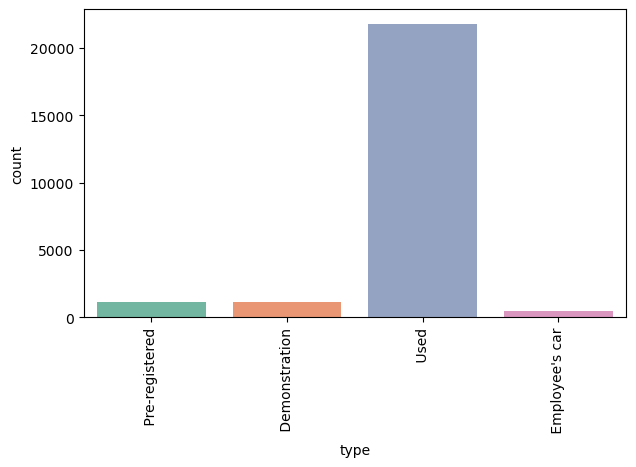

In [2730]:
count_plot_column(df,'type')

In [2731]:
def count_plot_with_price1(df_grouped, x):
    """
    Creates a count plot with the mean price represented by the height of the bars.

    Parameters:
    df_grouped (pd.Series): Grouped Series containing the mean price for each category
    x (str): The column name for the x-axis
    """
    # Convert the grouped Series to a DataFrame
    df_plot = df_grouped.reset_index()

    # Create the count plot
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=df_plot, x=x, palette='viridis')
    
    # Add mean price as text on top of each bar
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.xlabel(x.capitalize())
    plt.ylabel('Count')
    plt.title(f'Count Plot with Value Counts by {x.capitalize()}')
    plt.show()

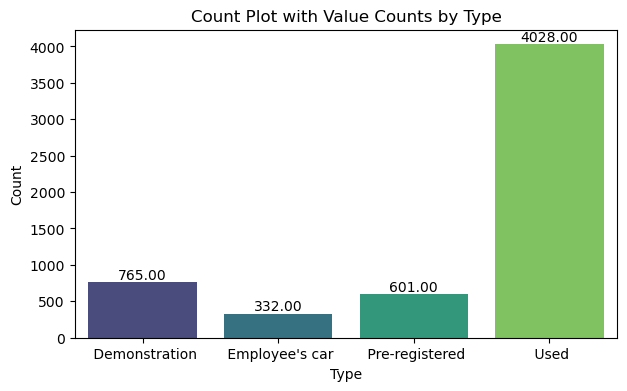

In [2732]:
    
 # Group by 'type' and calculate the mean price for each category
mean_prices_by_type = df.groupby('type')['price'].value_counts()

# Create the count plot with mean price
count_plot_with_price1(mean_prices_by_type, 'type')   

# 6. Warranty

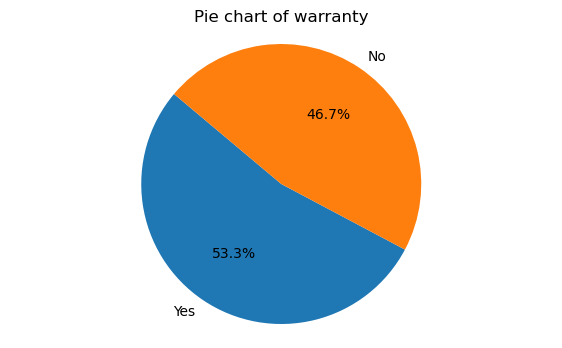

In [2734]:
pie_chart_column(df,'warranty')

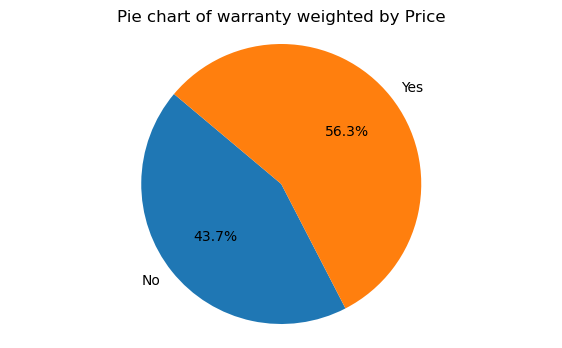

In [2735]:
pie_chart_with_price(df,'warranty')

# 7. Gearbox

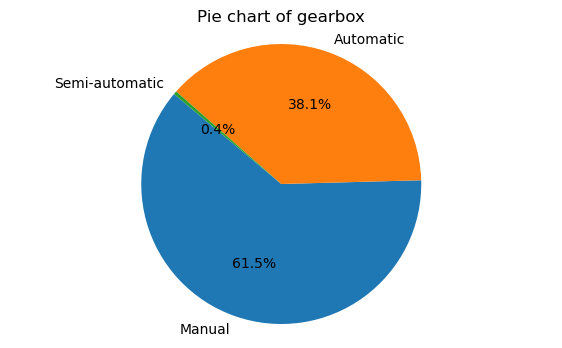

In [2737]:
pie_chart_column(df,'gearbox')

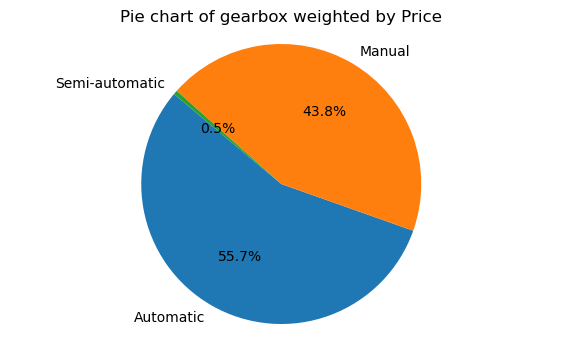

In [2738]:
pie_chart_with_price(df,'gearbox')

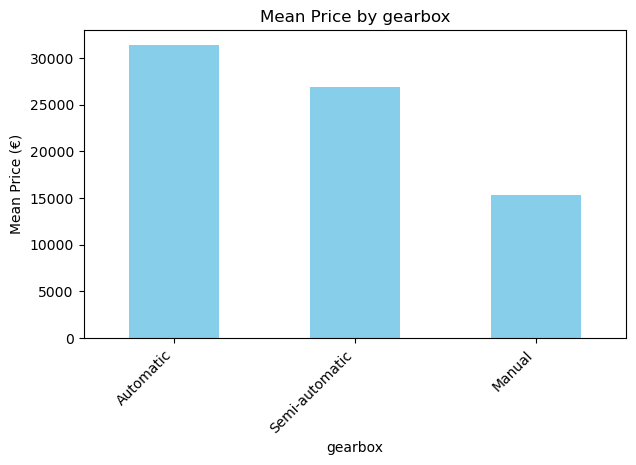

In [2739]:
plot_column_by_price(df,'gearbox')

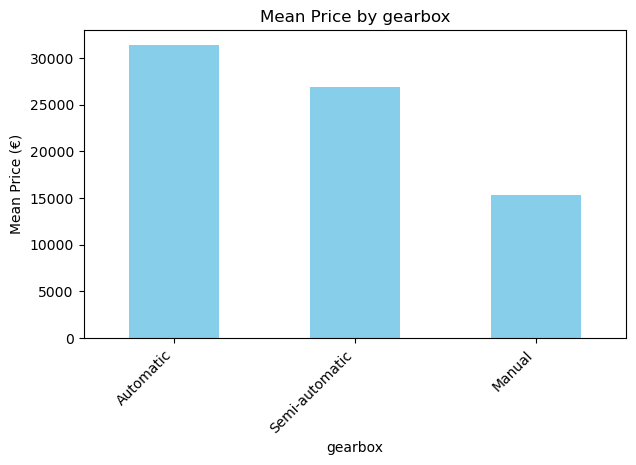

In [2740]:
plot_column_by_price(df,'gearbox')

# 8. Fuel Type

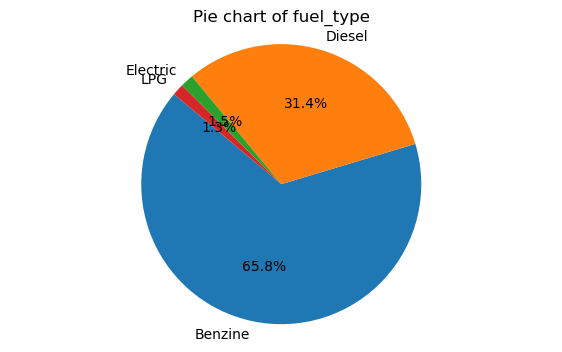

In [2742]:
pie_chart_column(df,'fuel_type')

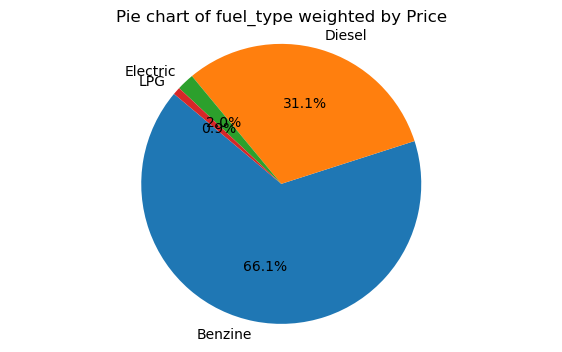

In [2743]:
pie_chart_with_price(df,'fuel_type')

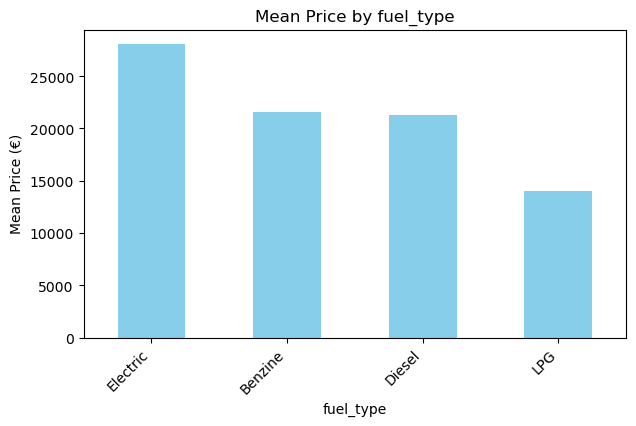

In [2744]:
plot_column_by_price(df,'fuel_type')

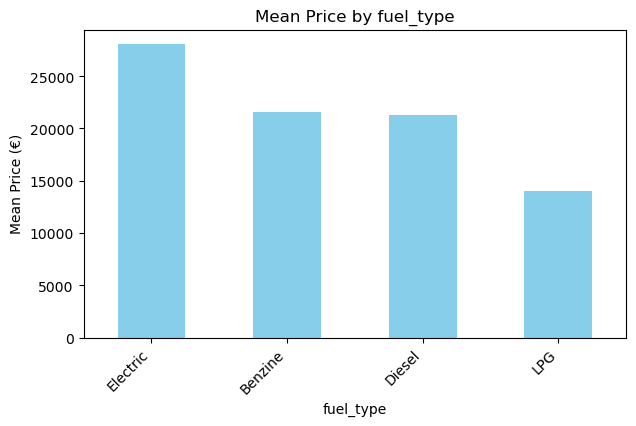

In [2745]:
plot_column_by_price(df,'fuel_type')

# 9. Seller

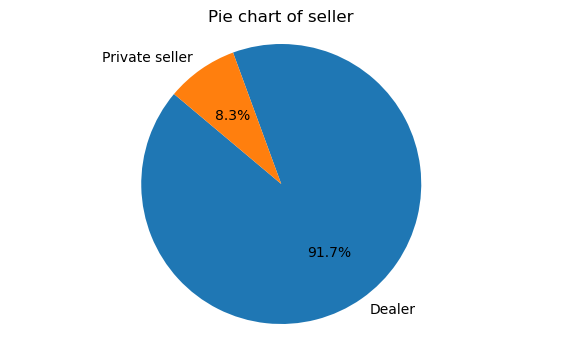

In [2747]:
pie_chart_column(df,'seller')

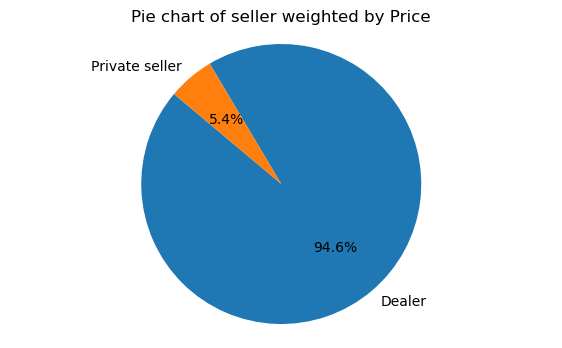

In [2748]:
pie_chart_with_price(df,'seller')

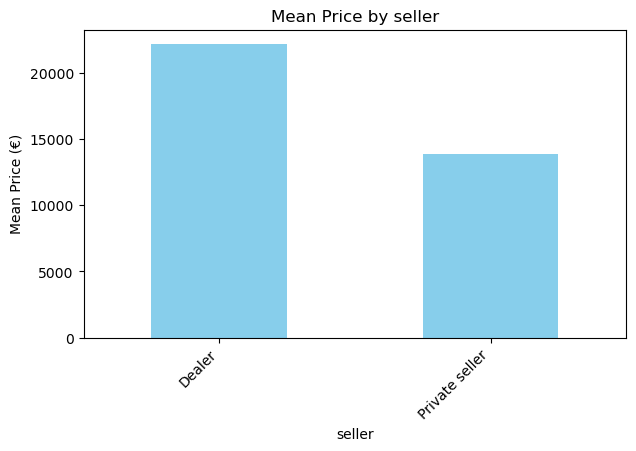

In [2749]:
plot_column_by_price(df,'seller')

# 10. Drive Train

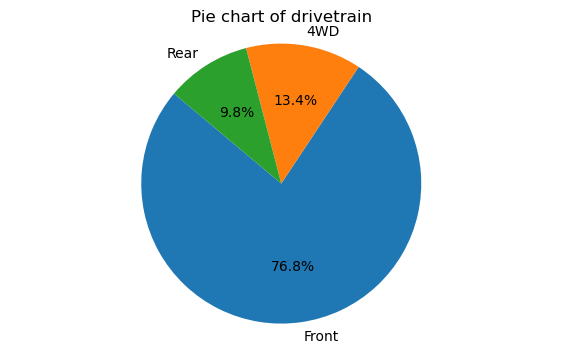

In [2751]:
pie_chart_column(df,'drivetrain')

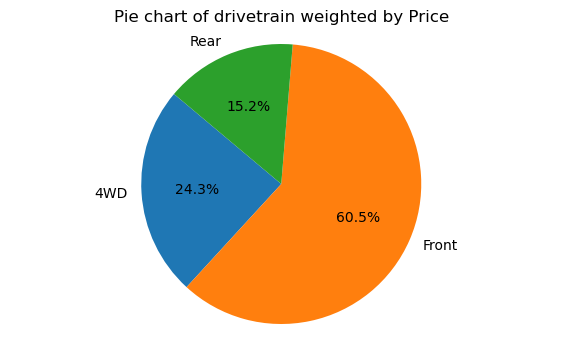

In [2752]:
pie_chart_with_price(df,'drivetrain')

# 11. Service History

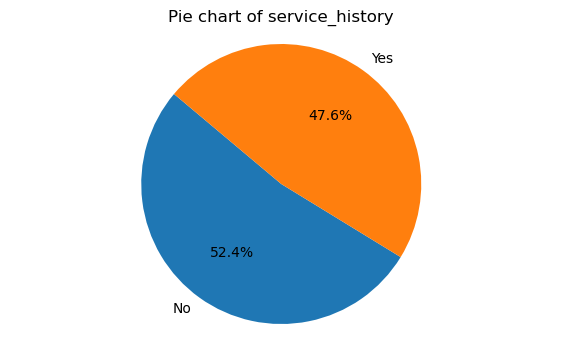

In [2754]:
pie_chart_column(df,'service_history')

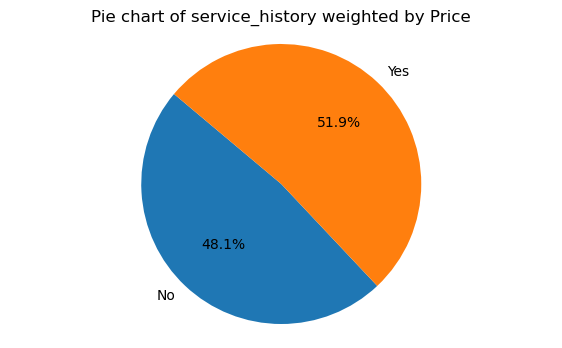

In [2755]:
pie_chart_with_price(df,'service_history')

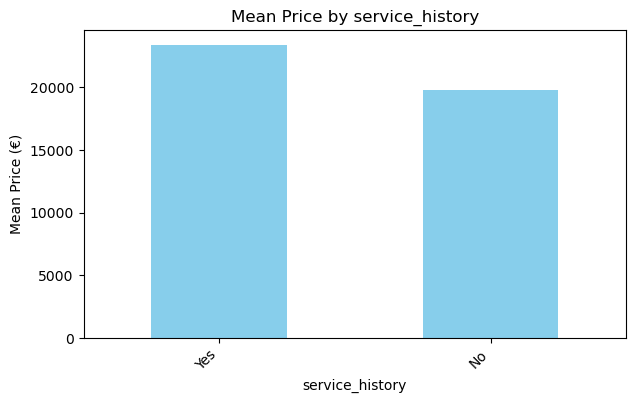

In [2756]:
plot_column_by_price(df,'service_history')

# 12. Non Smoker

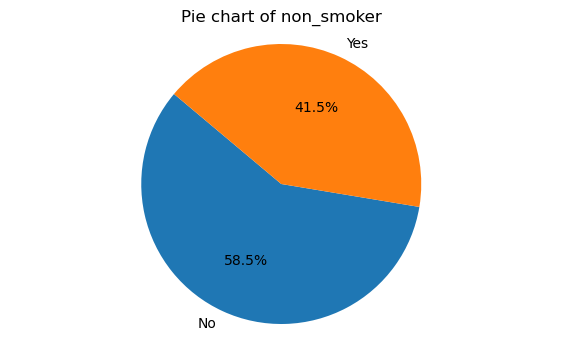

In [2758]:
pie_chart_column(df,'non_smoker')

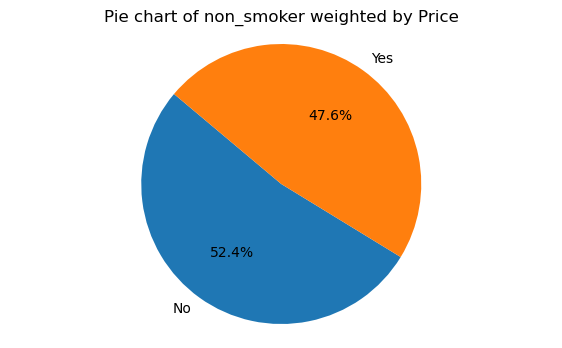

In [2759]:
pie_chart_with_price(df,'non_smoker')

# 13. Emission Sticker

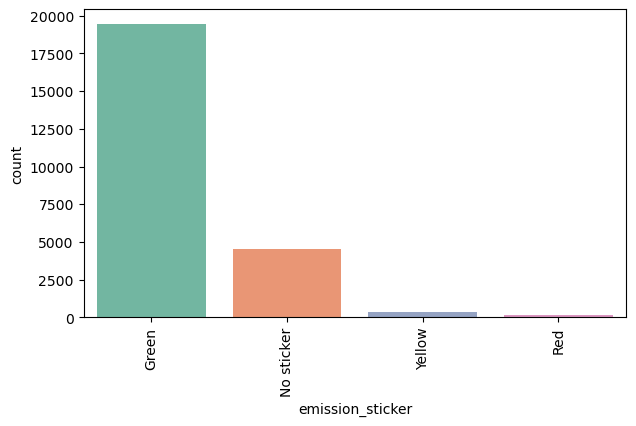

In [2761]:
count_plot_column(df,'emission_sticker')

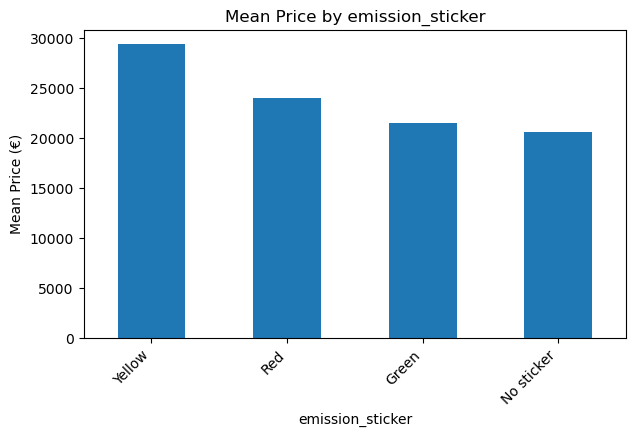

In [2893]:
barplot_column_by_price(df,'emission_sticker')

# 14. Upholstery_color

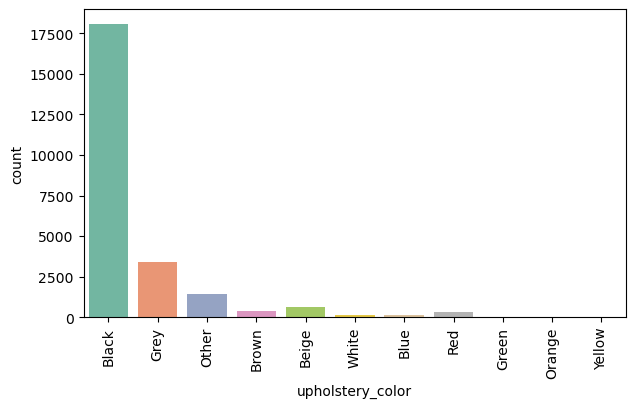

In [2895]:
count_plot_column(df,'upholstery_color')

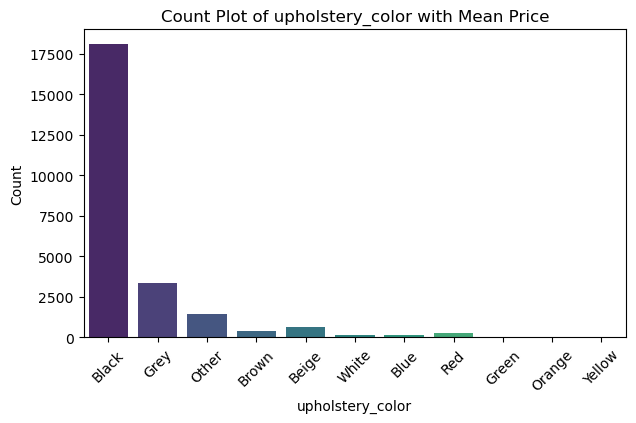

In [2896]:
count_plot_with_price(df,'upholstery_color')

# 15. Upholstery

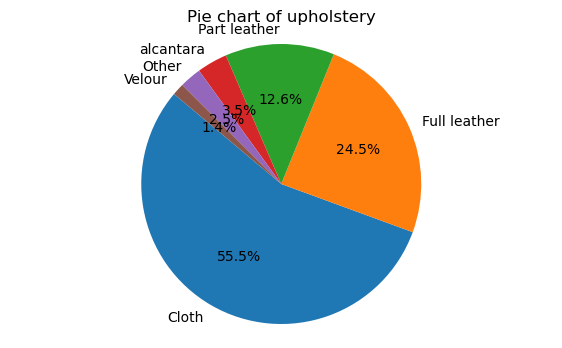

In [2898]:
pie_chart_column(df,'upholstery')

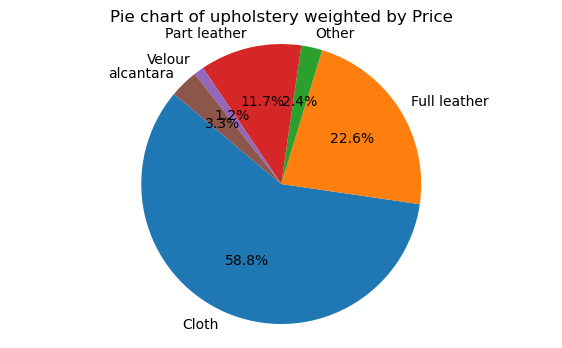

In [2899]:
pie_chart_with_price(df,'upholstery')

# 16. available

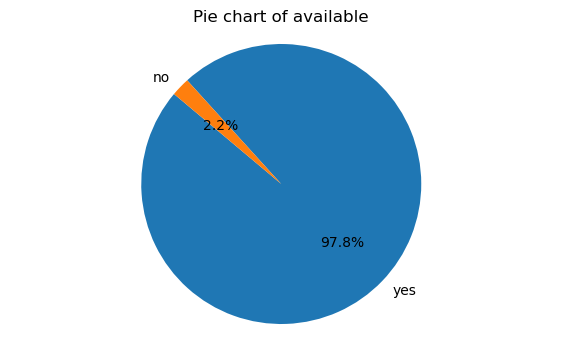

In [2901]:
pie_chart_column(df,'available')

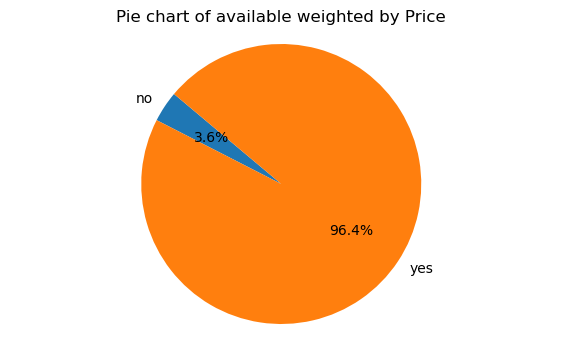

In [2902]:
pie_chart_with_price(df,'available')

# 17. taxi_rental

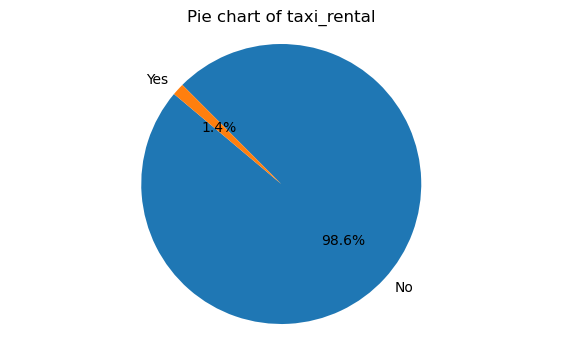

In [2904]:
pie_chart_column(df,'taxi_rental')

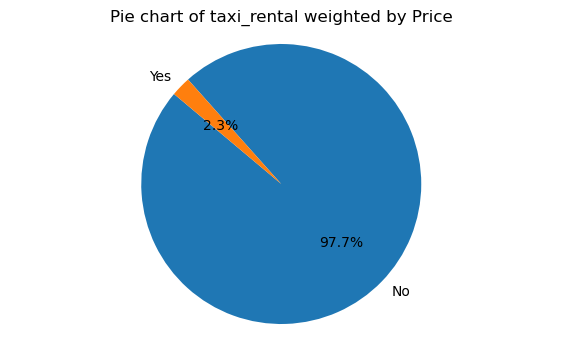

In [2905]:
pie_chart_with_price(df,'taxi_rental')

# 18. inspection_status

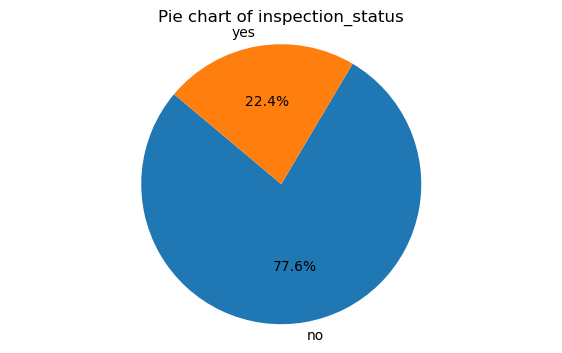

In [2907]:
pie_chart_column(df,'inspection_status')

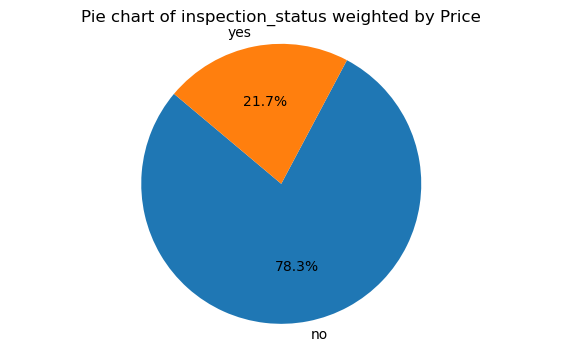

In [2908]:
pie_chart_with_price(df,'inspection_status')

# 19.  energy_efficiency_class

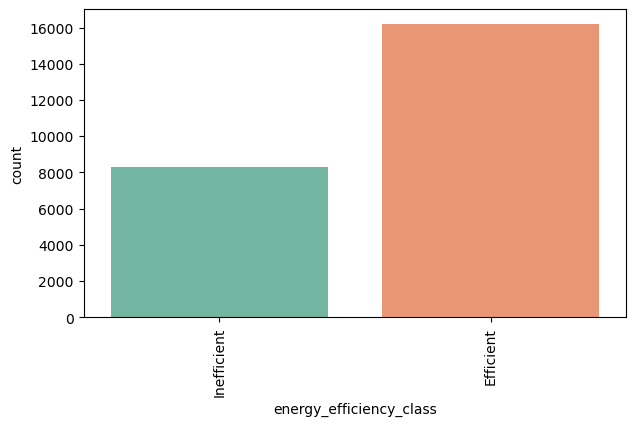

In [2910]:
count_plot_column(df,'energy_efficiency_class')

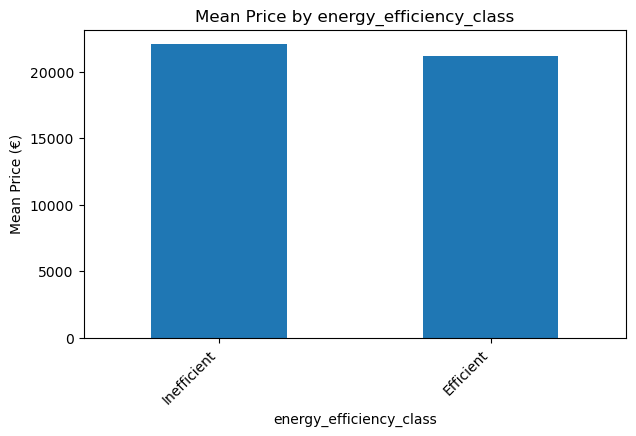

In [2911]:
barplot_column_by_price(df,'energy_efficiency_class')

# 20. safety_security_package

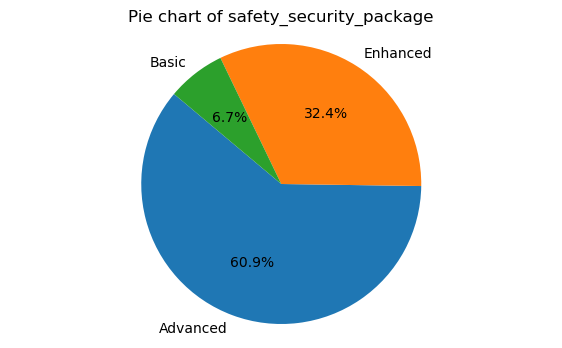

In [2913]:
pie_chart_column(df,'safety_security_package')

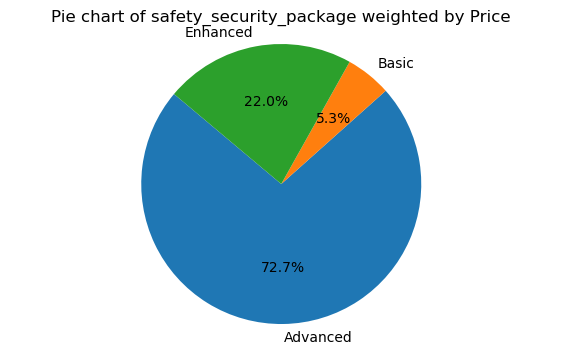

In [2914]:
pie_chart_with_price(df,'safety_security_package')

# 21. comfort_convenience_package

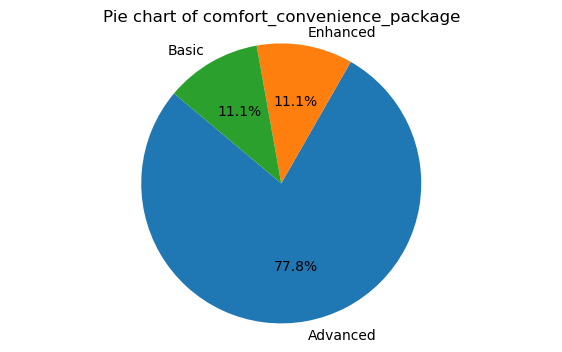

In [2916]:
pie_chart_column(df,'comfort_convenience_package')

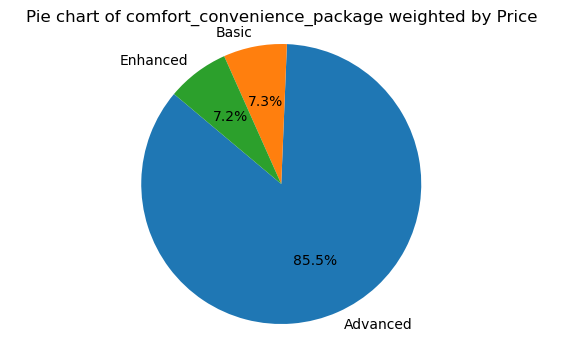

In [2917]:
pie_chart_with_price(df,'comfort_convenience_package')

# 22. ent_media_package

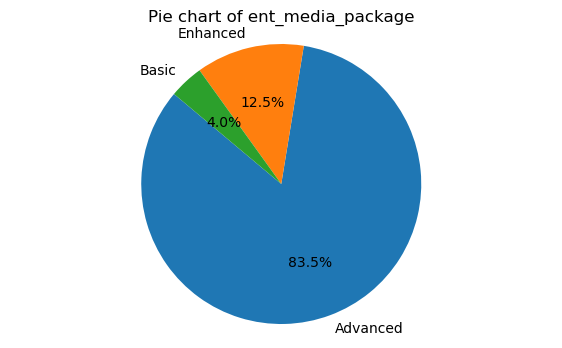

In [2919]:
pie_chart_column(df,'ent_media_package')

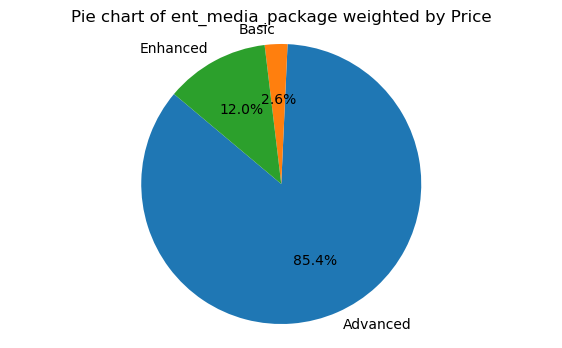

In [2920]:
pie_chart_with_price(df,'ent_media_package')

In [2921]:
df.select_dtypes(include=['object']).describe().T

count unique                top   freq
make_model                   24529    695     Renault Megane    838
body_type                    24529      6   Off-Road/Pick-up   4672
type                         24529      4               Used  21796
warranty                     24529      2                Yes  13086
gearbox                      24529      3             Manual  15095
fuel_type                    24529      4            Benzine  16129
colour                       24529     14              Black   5934
paint                        24529      2           Metallic  12943
seller                       24529      2             Dealer  22495
drivetrain                   24529      3              Front  18835
service_history              24529      2                 No  12845
non_smoker                   24529      2                 No  14347
emission_sticker             24529      4              Green  19453
upholstery_color             24529     11              Black  18086
upholstery                   24529      6              Cloth  13619
available                    24529      2                yes  23999
taxi_rental                  24529      2                 No  24185
inspection_status            24529      2                 no  19034
energy_efficiency_class      24529      2          Efficient  16205
safety_security_package      24529      3           Advanced  14933
comfort_convenience_package  24529      3           Advanced  19095
ent_media_package            24529      3           Advanced  20490

In [2922]:
df.select_dtypes(include=['float']).describe().T

count          mean           std         min  \
price                  24529.0  21472.768927  14969.043975  490.000000   
doors                  24529.0      4.148070      1.199488    2.000000   
mileage                24529.0  71935.296243  63410.531156    0.000000   
seats                  24529.0      4.710954      0.765220    1.000000   
engine_size            24529.0   1717.617066    734.311053  200.000000   
gears                  24529.0      5.881283      1.421980    1.000000   
co2_emissions          24529.0    132.256676    129.224188    0.000000   
empty_weight           24529.0   1399.360331    284.967171  347.000000   
power_kW               24529.0    115.594986     60.828968    4.000000   
fuel_consumption_comb  24529.0      6.040860      1.785706    3.217647   
age                    24529.0      6.737209      8.097498    0.000000   
num_of_extras          24529.0      4.809409      3.135203    2.000000   

                                25%           50%            75%       max  
price                  11890.000000  17900.000000   27250.000000   97590.0  
doors                      3.000000      5.000000       5.000000       5.0  
mileage                21500.000000  57100.000000  105990.000000  399900.0  
seats                      5.000000      5.000000       5.000000       9.0  
engine_size             1248.000000   1591.000000    1984.000000    6000.0  
gears                      5.000000      6.000000       6.000000      10.0  
co2_emissions            106.000000    125.000000     156.000000   15168.0  
empty_weight            1198.000000   1370.000000    1570.000000    2900.0  
power_kW                  78.000000     99.000000     133.000000     450.0  
fuel_consumption_comb      4.845736      5.542237       6.698559      12.9  
age                        2.000000      4.000000       8.000000      65.0  
num_of_extras              2.000000      4.000000       6.000000      26.0

In [2923]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24529 entries, 0 to 24528
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   24529 non-null  object 
 1   price                        24529 non-null  float64
 2   body_type                    24529 non-null  object 
 3   type                         24529 non-null  object 
 4   doors                        24529 non-null  float64
 5   warranty                     24529 non-null  object 
 6   mileage                      24529 non-null  float64
 7   gearbox                      24529 non-null  object 
 8   fuel_type                    24529 non-null  object 
 9   colour                       24529 non-null  object 
 10  paint                        24529 non-null  object 
 11  seller                       24529 non-null  object 
 12  seats                        24529 non-null  float64
 13  engine_size     

In [2924]:
df.drop(columns=['energy_efficiency_class', 'taxi_rental','available','inspection_status','paint',
                
                'type', 'seller','service_history','upholstery_color', 'doors', 'num_of_extras',
                'empty_weight'],inplace=True)

In [2925]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24529 entries, 0 to 24528
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   24529 non-null  object 
 1   price                        24529 non-null  float64
 2   body_type                    24529 non-null  object 
 3   warranty                     24529 non-null  object 
 4   mileage                      24529 non-null  float64
 5   gearbox                      24529 non-null  object 
 6   fuel_type                    24529 non-null  object 
 7   colour                       24529 non-null  object 
 8   seats                        24529 non-null  float64
 9   engine_size                  24529 non-null  float64
 10  gears                        24529 non-null  float64
 11  co2_emissions                24529 non-null  float64
 12  drivetrain                   24529 non-null  object 
 13  non_smoker      

In [2926]:
# df.to_csv('final_scout_not_dummy.csv',index=False)

In [2927]:
df['make_model_factorized'], unique_make_models = pd.factorize(df['make_model'])
print(unique_make_models)

Index(['Dacia Duster', 'Dacia Jogger', 'Dacia Lodgy', 'Dacia Logan',
       'Dacia Sandero', 'Dacia Spring', 'Fiat 500', 'Fiat 500C', 'Fiat 500L',
       'Fiat 500X',
       ...
       'Opel Commodore', 'Volvo P1800', 'Mercedes-Benz 350',
       'Fiat Cinquecento', 'Ford Mercury', 'Volvo Amazon', 'Fiat 600',
       'Peugeot 404', 'Ford  T-Bird', 'Ford Fairlane V8'],
      dtype='object', length=695)


In [2928]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24529 entries, 0 to 24528
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   24529 non-null  object 
 1   price                        24529 non-null  float64
 2   body_type                    24529 non-null  object 
 3   warranty                     24529 non-null  object 
 4   mileage                      24529 non-null  float64
 5   gearbox                      24529 non-null  object 
 6   fuel_type                    24529 non-null  object 
 7   colour                       24529 non-null  object 
 8   seats                        24529 non-null  float64
 9   engine_size                  24529 non-null  float64
 10  gears                        24529 non-null  float64
 11  co2_emissions                24529 non-null  float64
 12  drivetrain                   24529 non-null  object 
 13  non_smoker      

In [2929]:
df.drop(columns='make_model',inplace=True)

In [2930]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24529 entries, 0 to 24528
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        24529 non-null  float64
 1   body_type                    24529 non-null  object 
 2   warranty                     24529 non-null  object 
 3   mileage                      24529 non-null  float64
 4   gearbox                      24529 non-null  object 
 5   fuel_type                    24529 non-null  object 
 6   colour                       24529 non-null  object 
 7   seats                        24529 non-null  float64
 8   engine_size                  24529 non-null  float64
 9   gears                        24529 non-null  float64
 10  co2_emissions                24529 non-null  float64
 11  drivetrain                   24529 non-null  object 
 12  non_smoker                   24529 non-null  object 
 13  emission_sticker

In [2931]:
df['make_model_factorized']

0          0
1          0
2          0
3          0
4          0
        ... 
24524    694
24525    547
24526    689
24527    547
24528    673
Name: make_model_factorized, Length: 24529, dtype: int64

In [2932]:
categoric= df.select_dtypes(include=['object']).columns
categoric


Index(['body_type', 'warranty', 'gearbox', 'fuel_type', 'colour', 'drivetrain',
       'non_smoker', 'emission_sticker', 'upholstery',
       'safety_security_package', 'comfort_convenience_package',
       'ent_media_package'],
      dtype='object')

In [2933]:
df_numeric = pd.get_dummies(df, drop_first=True)
df_numeric = df_numeric.astype(int)
df_numeric.T

0      1      2      3      4      \
price                                 21000  21000  21150  25190  24222   
mileage                                1000   1000   4500   4018   8000   
seats                                     5      5      5      5      5   
engine_size                            1461   1461   1332   1332   1332   
gears                                     6      6      6      6      6   
co2_emissions                           106    106    131    153    121   
power_kW                                 85     85     96    110    110   
fuel_consumption_comb                     4      4      5      6      5   
age                                       0      0      0      0      0   
make_model_factorized                     0      0      0      0      0   
body_type_ Convertible                    0      0      0      0      0   
body_type_ Coupe                          0      0      0      0      0   
body_type_ Off-Road/Pick-up               1      1      1      1      1   
body_type_ Sedan                          0      0      0      0      0   
body_type_ Station wagon                  0      0      0      0      0   
warranty_Yes                              1      1      1      0      0   
gearbox_Manual                            1      1      1      1      0   
gearbox_Semi-automatic                    0      0      0      0      0   
fuel_type_Diesel                          1      1      0      0      0   
fuel_type_Electric                        0      0      0      0      0   
fuel_type_LPG                             0      0      0      0      0   
colour_Black                              0      0      1      1      1   
colour_Blue                               0      0      0      0      0   
colour_Bronze                             0      0      0      0      0   
colour_Brown                              0      0      0      0      0   
colour_Gold                               0      0      0      0      0   
colour_Green                              0      0      0      0      0   
colour_Grey                               0      0      0      0      0   
colour_Orange                             1      1      0      0      0   
colour_Red                                0      0      0      0      0   
colour_Silver                             0      0      0      0      0   
colour_Violet                             0      0      0      0      0   
colour_White                              0      0      0      0      0   
colour_Yellow                             0      0      0      0      0   
drivetrain_Front                          1      1      1      0      1   
drivetrain_Rear                           0      0      0      0      0   
non_smoker_Yes                            0      0      0      1      1   
emission_sticker_No sticker               0      0      0      0      1   
emission_sticker_Red                      0      0      0      0      0   
emission_sticker_Yellow                   0      0      0      0      0   
upholstery_Full leather                   0      0      0      0      0   
upholstery_Other                          1      0      0      0      1   
upholstery_Part leather                   0      0      0      0      0   
upholstery_Velour                         0      0      0      0      0   
upholstery_alcantara                      0      0      0      0      0   
safety_security_package_Basic             0      0      0      0      0   
safety_security_package_Enhanced          0      0      0      0      0   
comfort_convenience_package_Basic         0      0      0      0      0   
comfort_convenience_package_Enhanced      0      0      0      0      0   
ent_media_package_Basic                   0      0      0      0      0   
ent_media_package_Enhanced                0      0      0      0      0   

                                      5      6      7      8      9      ...  \
price                                 21990  23556  21990

In [2934]:
# df_numeric.to_csv("final_scout_dummy.csv", index=False)